### Deliverable 1: Preprocessing the Data for a Neural Network

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("Resources/charity_data.csv")
application_df.head()

EIN                                      NAME APPLICATION_TYPE  \
0  10520599              BLUE KNIGHTS MOTORCYCLE CLUB              T10   
1  10531628    AMERICAN CHESAPEAKE CLUB CHARITABLE TR               T3   
2  10547893        ST CLOUD PROFESSIONAL FIREFIGHTERS               T5   
3  10553066            SOUTHSIDE ATHLETIC ASSOCIATION               T3   
4  10556103  GENETIC RESEARCH INSTITUTE OF THE DESERT               T3   

        AFFILIATION CLASSIFICATION      USE_CASE  ORGANIZATION  STATUS  \
0       Independent          C1000    ProductDev   Association       1   
1       Independent          C2000  Preservation  Co-operative       1   
2  CompanySponsored          C3000    ProductDev   Association       1   
3  CompanySponsored          C2000  Preservation         Trust       1   
4       Independent          C1000     Heathcare         Trust       1   

      INCOME_AMT SPECIAL_CONSIDERATIONS  ASK_AMT  IS_SUCCESSFUL  
0              0                      N     5000              1  
1         1-9999                      N   108590              1  
2              0                      N     5000              0  
3    10000-24999                      N     6692              1  
4  100000-499999                      N   142590              1

In [2]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
#  YOUR CODE GOES HERE
application_df = application_df.drop(columns = ['EIN', 'NAME'], axis = 1)
application_df.head()

APPLICATION_TYPE       AFFILIATION CLASSIFICATION      USE_CASE  \
0              T10       Independent          C1000    ProductDev   
1               T3       Independent          C2000  Preservation   
2               T5  CompanySponsored          C3000    ProductDev   
3               T3  CompanySponsored          C2000  Preservation   
4               T3       Independent          C1000     Heathcare   

   ORGANIZATION  STATUS     INCOME_AMT SPECIAL_CONSIDERATIONS  ASK_AMT  \
0   Association       1              0                      N     5000   
1  Co-operative       1         1-9999                      N   108590   
2   Association       1              0                      N     5000   
3         Trust       1    10000-24999                      N     6692   
4         Trust       1  100000-499999                      N   142590   

   IS_SUCCESSFUL  
0              1  
1              1  
2              0  
3              1  
4              1

In [3]:
# Determine the number of unique values in each column.
#  YOUR CODE GOES HERE
application_df.nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [4]:
# Look at APPLICATION_TYPE value counts for binning
#  YOUR CODE GOES HERE
application_df.APPLICATION_TYPE.value_counts()

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

<AxesSubplot:ylabel='Density'>

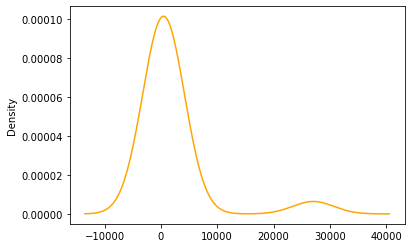

In [5]:
# Visualize the value counts of APPLICATION_TYPE
#  YOUR CODE GOES HERE
app_value_counts = application_df.APPLICATION_TYPE.value_counts()
app_value_counts.plot.density(color = 'orange')

In [6]:
# Determine which values to replace if counts are less than ...?
#  YOUR CODE GOES HERE
replace_application = list(app_value_counts[app_value_counts < 500].index)

# Replace in dataframe
for app in replace_application:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.APPLICATION_TYPE.value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [7]:
# Look at CLASSIFICATION value counts for binning
#  YOUR CODE GOES HERE
classification_value_counts = application_df.CLASSIFICATION.value_counts()
classification_value_counts

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

<AxesSubplot:ylabel='Density'>

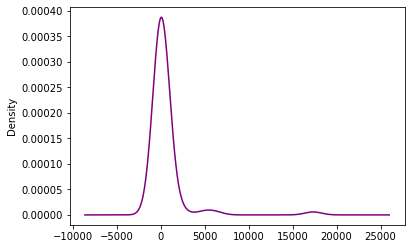

In [8]:
# Visualize the value counts of CLASSIFICATION
#  YOUR CODE GOES HERE
classification_value_counts.plot.density(color = 'purple')

In [9]:
# Determine which values to replace if counts are less than ..?
#  YOUR CODE GOES HERE
replace_class = list(classification_value_counts[classification_value_counts < 800].index)

# Replace in dataframe
for cls in replace_class:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [10]:
# Generate our categorical variable lists
#  YOUR CODE GOES HERE
application_cat = list(application_df.dtypes[application_df.dtypes == 'object'].index)
application_cat

['APPLICATION_TYPE',
 'AFFILIATION',
 'CLASSIFICATION',
 'USE_CASE',
 'ORGANIZATION',
 'INCOME_AMT',
 'SPECIAL_CONSIDERATIONS']

In [11]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
#  YOUR CODE GOES HERE
encode_df = pd.DataFrame(enc.fit_transform(application_df[application_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(application_cat)
encode_df.head()

APPLICATION_TYPE_Other  APPLICATION_TYPE_T10  APPLICATION_TYPE_T19  \
0                     0.0                   1.0                   0.0   
1                     0.0                   0.0                   0.0   
2                     0.0                   0.0                   0.0   
3                     0.0                   0.0                   0.0   
4                     0.0                   0.0                   0.0   

   APPLICATION_TYPE_T3  APPLICATION_TYPE_T4  APPLICATION_TYPE_T5  \
0                  0.0                  0.0                  0.0   
1                  1.0                  0.0                  0.0   
2                  0.0                  0.0                  1.0   
3                  1.0                  0.0                  0.0   
4                  1.0                  0.0                  0.0   

   APPLICATION_TYPE_T6  APPLICATION_TYPE_T7  APPLICATION_TYPE_T8  \
0                  0.0                  0.0                  0.0   
1                  0.0                  0.0                  0.0   
2                  0.0                  0.0                  0.0   
3                  0.0                  0.0                  0.0   
4                  0.0                  0.0                  0.0   

   AFFILIATION_CompanySponsored  ...  INCOME_AMT_1-9999  \
0                           0.0  ...                0.0   
1                           0.0  ...                1.0   
2                           1.0  ...                0.0   
3                           1.0  ...                0.0   
4                           0.0  ...                0.0   

   INCOME_AMT_10000-24999  INCOME_AMT_100000-499999  INCOME_AMT_10M-50M  \
0                     0.0                       0.0                 0.0   
1                     0.0                       0.0                 0.0   
2                     0.0                       0.0                 0.0   
3                     1.0                       0.0                 0.0   
4                     0.0                       1.0                 0.0   

   INCOME_AMT_1M-5M  INCOME_AMT_25000-99999  INCOME_AMT_50M+  \
0               0.0                     0.0              0.0   
1               0.0                     0.0              0.0   
2               0.0                     0.0              0.0   
3               0.0                     0.0              0.0   
4               0.0                     0.0              0.0   

   INCOME_AMT_5M-10M  SPECIAL_CONSIDERATIONS_N  SPECIAL_CONSIDERATIONS_Y  
0                0.0                       1.0                       0.0  
1                0.0                       1.0                       0.0  
2                0.0                       1.0                       0.0  
3                0.0                       1.0                       0.0  
4                0.0                       1.0                       0.0  

[5 rows x 41 columns]

In [12]:
# Merge one-hot encoded features and drop the originals
#  YOUR CODE GOES HERE
application_df = application_df.merge(encode_df, left_index = True, right_index = True)
application_df = application_df.drop(application_cat, 1)
application_df.head()

/Users/tiananicole/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  after removing the cwd from sys.path.


STATUS  ASK_AMT  IS_SUCCESSFUL  APPLICATION_TYPE_Other  \
0       1     5000              1                     0.0   
1       1   108590              1                     0.0   
2       1     5000              0                     0.0   
3       1     6692              1                     0.0   
4       1   142590              1                     0.0   

   APPLICATION_TYPE_T10  APPLICATION_TYPE_T19  APPLICATION_TYPE_T3  \
0                   1.0                   0.0                  0.0   
1                   0.0                   0.0                  1.0   
2                   0.0                   0.0                  0.0   
3                   0.0                   0.0                  1.0   
4                   0.0                   0.0                  1.0   

   APPLICATION_TYPE_T4  APPLICATION_TYPE_T5  APPLICATION_TYPE_T6  ...  \
0                  0.0                  0.0                  0.0  ...   
1                  0.0                  0.0                  0.0  ...   
2                  0.0                  1.0                  0.0  ...   
3                  0.0                  0.0                  0.0  ...   
4                  0.0                  0.0                  0.0  ...   

   INCOME_AMT_1-9999  INCOME_AMT_10000-24999  INCOME_AMT_100000-499999  \
0                0.0                     0.0                       0.0   
1                1.0                     0.0                       0.0   
2                0.0                     0.0                       0.0   
3                0.0                     1.0                       0.0   
4                0.0                     0.0                       1.0   

   INCOME_AMT_10M-50M  INCOME_AMT_1M-5M  INCOME_AMT_25000-99999  \
0                 0.0               0.0                     0.0   
1                 0.0               0.0                     0.0   
2                 0.0               0.0                     0.0   
3                 0.0               0.0                     0.0   
4                 0.0               0.0                     0.0   

   INCOME_AMT_50M+  INCOME_AMT_5M-10M  SPECIAL_CONSIDERATIONS_N  \
0              0.0                0.0                       1.0   
1              0.0                0.0                       1.0   
2              0.0                0.0                       1.0   
3              0.0                0.0                       1.0   
4              0.0                0.0                       1.0   

   SPECIAL_CONSIDERATIONS_Y  
0                       0.0  
1                       0.0  
2                       0.0  
3                       0.0  
4                       0.0  

[5 rows x 44 columns]

## D4: Remove Noisy Variables

In [19]:
application_df.columns.tolist()

['STATUS',
 'ASK_AMT',
 'IS_SUCCESSFUL',
 'APPLICATION_TYPE_Other',
 'APPLICATION_TYPE_T10',
 'APPLICATION_TYPE_T19',
 'APPLICATION_TYPE_T3',
 'APPLICATION_TYPE_T4',
 'APPLICATION_TYPE_T5',
 'APPLICATION_TYPE_T6',
 'APPLICATION_TYPE_T7',
 'APPLICATION_TYPE_T8',
 'AFFILIATION_CompanySponsored',
 'AFFILIATION_Family/Parent',
 'AFFILIATION_Independent',
 'AFFILIATION_National',
 'AFFILIATION_Other',
 'AFFILIATION_Regional',
 'CLASSIFICATION_C1000',
 'CLASSIFICATION_C1200',
 'CLASSIFICATION_C2000',
 'CLASSIFICATION_C2100',
 'CLASSIFICATION_C3000',
 'CLASSIFICATION_Other',
 'USE_CASE_CommunityServ',
 'USE_CASE_Heathcare',
 'USE_CASE_Other',
 'USE_CASE_Preservation',
 'USE_CASE_ProductDev',
 'ORGANIZATION_Association',
 'ORGANIZATION_Co-operative',
 'ORGANIZATION_Corporation',
 'ORGANIZATION_Trust',
 'INCOME_AMT_0',
 'INCOME_AMT_1-9999',
 'INCOME_AMT_10000-24999',
 'INCOME_AMT_100000-499999',
 'INCOME_AMT_10M-50M',
 'INCOME_AMT_1M-5M',
 'INCOME_AMT_25000-99999',
 'INCOME_AMT_50M+',
 'INCOME_

In [21]:
application_df.USE_CASE_Other[:50]

0     0.0
1     0.0
2     0.0
3     0.0
4     0.0
5     0.0
6     0.0
7     0.0
8     0.0
9     0.0
10    0.0
11    0.0
12    0.0
13    0.0
14    0.0
15    0.0
16    0.0
17    0.0
18    0.0
19    0.0
20    0.0
21    0.0
22    0.0
23    0.0
24    0.0
25    0.0
26    0.0
27    0.0
28    0.0
29    0.0
30    0.0
31    0.0
32    0.0
33    0.0
34    0.0
35    0.0
36    0.0
37    0.0
38    0.0
39    0.0
40    0.0
41    0.0
42    0.0
43    0.0
44    0.0
45    0.0
46    0.0
47    0.0
48    0.0
49    0.0
Name: USE_CASE_Other, dtype: float64

In [22]:
application_df.AFFILIATION_Other[:50]

0     0.0
1     0.0
2     0.0
3     0.0
4     0.0
5     0.0
6     0.0
7     0.0
8     0.0
9     0.0
10    0.0
11    0.0
12    0.0
13    0.0
14    0.0
15    0.0
16    0.0
17    0.0
18    0.0
19    0.0
20    0.0
21    0.0
22    0.0
23    0.0
24    0.0
25    0.0
26    0.0
27    0.0
28    0.0
29    0.0
30    0.0
31    0.0
32    0.0
33    0.0
34    0.0
35    0.0
36    0.0
37    0.0
38    0.0
39    0.0
40    0.0
41    0.0
42    0.0
43    0.0
44    0.0
45    0.0
46    0.0
47    0.0
48    0.0
49    0.0
Name: AFFILIATION_Other, dtype: float64

In [23]:
#D4.1
application_df = application_df.drop(columns = ['AFFILIATION_Other', 'USE_CASE_Other'], axis = 1)

In [39]:
#D4.2
application_df =  application_df.drop(columns = ['SPECIAL_CONSIDERATIONS_N','SPECIAL_CONSIDERATIONS_Y'], axis = 1)

In [59]:
#D4.3
application_df = application_df.drop(
    columns = ['ORGANIZATION_Association','ORGANIZATION_Co-operative','ORGANIZATION_Corporation','ORGANIZATION_Trust'],
    axis = 1)

In [ ]:
# Split our preprocessed data into our features and target arrays
#  YOUR CODE GOES HERE
y = application_df.IS_SUCCESSFUL.values
X = application_df.drop(columns = ['IS_SUCCESSFUL']).values

# Split the preprocessed data into a training and testing dataset
#  YOUR CODE GOES HERE
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)

In [ ]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

### Deliverable 2: Compile, Train and Evaluate the Model

## D4: Added additional neurons, hidden layers, and changed activation function

In [46]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
#  YOUR CODE GOES HERE
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 100
hidden_nodes_layer2 = 50
hidden_nodes_layer3 = 15

nn = tf.keras.models.Sequential()

# First hidden layer
#  YOUR CODE GOES HERE
nn.add(tf.keras.layers.Dense(units = hidden_nodes_layer1, activation = 'relu' , input_dim = number_input_features))

# Second hidden layer
#  YOUR CODE GOES HERE
nn.add(tf.keras.layers.Dense(units = hidden_nodes_layer2, activation = 'tanh'))

# Third hidde layer
nn.add(tf.keras.layers.Dense(units = hidden_nodes_layer3, activation = 'tanh'))

# Output layer
#  YOUR CODE GOES HERE
nn.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))

# Check the structure of the model
nn.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 100)               4000      
                                                                 
 dense_21 (Dense)            (None, 50)                5050      
                                                                 
 dense_22 (Dense)            (None, 15)                765       
                                                                 
 dense_23 (Dense)            (None, 1)                 16        
                                                                 
Total params: 9,831
Trainable params: 9,831
Non-trainable params: 0
_________________________________________________________________


## D4.2 Added additional neurons, hidden layers, and changed activation function

In [51]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
#  YOUR CODE GOES HERE
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 90
hidden_nodes_layer2 = 40
hidden_nodes_layer3 = 10

nn = tf.keras.models.Sequential()

# First hidden layer
#  YOUR CODE GOES HERE
nn.add(tf.keras.layers.Dense(units = hidden_nodes_layer1, activation = 'relu' , input_dim = number_input_features))

# Second hidden layer
#  YOUR CODE GOES HERE
nn.add(tf.keras.layers.Dense(units = hidden_nodes_layer2, activation = 'relu'))

# Third hidde layer
nn.add(tf.keras.layers.Dense(units = hidden_nodes_layer3, activation = 'sigmoid'))

# Output layer
#  YOUR CODE GOES HERE
nn.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))

# Check the structure of the model
nn.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 90)                3600      
                                                                 
 dense_25 (Dense)            (None, 40)                3640      
                                                                 
 dense_26 (Dense)            (None, 10)                410       
                                                                 
 dense_27 (Dense)            (None, 1)                 11        
                                                                 
Total params: 7,661
Trainable params: 7,661
Non-trainable params: 0
_________________________________________________________________


In [56]:
# Compile the model
#  YOUR CODE GOES HERE
nn.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [53]:
# Train the model
#  YOUR CODE GOES HERE
import os 
from tensorflow.keras.callbacks import ModelCheckpoint

os.makedirs('checkpoints/', exist_ok = True)
checkpoint_path = 'checkpoints/weights.{epoch:02d}.hdf5'

# Create a callback that saves the model's weights every epoch
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq= 5)

fit_model = nn.fit(X_train, y_train, epochs = 100, callbacks=[cp_callback])

Epoch 1/100
  1/804 [..............................] - ETA: 13:39 - loss: 0.7311 - accuracy: 0.5312
Epoch 1: saving model to checkpoints/weights.01.hdf5
  7/804 [..............................] - ETA: 6s - loss: 0.7087 - accuracy: 0.5312   
Epoch 1: saving model to checkpoints/weights.01.hdf5
 11/804 [..............................] - ETA: 8s - loss: 0.7085 - accuracy: 0.5284
Epoch 1: saving model to checkpoints/weights.01.hdf5
 15/804 [..............................] - ETA: 9s - loss: 0.7181 - accuracy: 0.5042
Epoch 1: saving model to checkpoints/weights.01.hdf5
 21/804 [..............................] - ETA: 8s - loss: 0.7130 - accuracy: 0.5134
Epoch 1: saving model to checkpoints/weights.01.hdf5
 27/804 [>.............................] - ETA: 8s - loss: 0.7145 - accuracy: 0.5069
Epoch 1: saving model to checkpoints/weights.01.hdf5
 32/804 [>.............................] - ETA: 7s - loss: 0.7138 - accuracy: 0.5068
Epoch 1: saving model to checkpoints/weights.01.hdf5
 35/804 [>......

300/804 [==========>...................] - ETA: 5s - loss: 0.6963 - accuracy: 0.5216
Epoch 1: saving model to checkpoints/weights.01.hdf5
308/804 [==========>...................] - ETA: 5s - loss: 0.6962 - accuracy: 0.5215
Epoch 1: saving model to checkpoints/weights.01.hdf5

Epoch 1: saving model to checkpoints/weights.01.hdf5
315/804 [==========>...................] - ETA: 5s - loss: 0.6961 - accuracy: 0.5217
Epoch 1: saving model to checkpoints/weights.01.hdf5
323/804 [===========>..................] - ETA: 5s - loss: 0.6960 - accuracy: 0.5223
Epoch 1: saving model to checkpoints/weights.01.hdf5

Epoch 1: saving model to checkpoints/weights.01.hdf5
330/804 [===========>..................] - ETA: 4s - loss: 0.6957 - accuracy: 0.5240
Epoch 1: saving model to checkpoints/weights.01.hdf5
338/804 [===========>..................] - ETA: 4s - loss: 0.6954 - accuracy: 0.5255
Epoch 1: saving model to checkpoints/weights.01.hdf5

Epoch 1: saving model to checkpoints/weights.01.hdf5
345/804 [=

627/804 [======================>.......] - ETA: 1s - loss: 0.6928 - accuracy: 0.5336
Epoch 1: saving model to checkpoints/weights.01.hdf5
630/804 [======================>.......] - ETA: 1s - loss: 0.6928 - accuracy: 0.5336
Epoch 1: saving model to checkpoints/weights.01.hdf5
635/804 [======================>.......] - ETA: 1s - loss: 0.6928 - accuracy: 0.5332
Epoch 1: saving model to checkpoints/weights.01.hdf5
640/804 [======================>.......] - ETA: 1s - loss: 0.6928 - accuracy: 0.5332
Epoch 1: saving model to checkpoints/weights.01.hdf5
645/804 [=======================>......] - ETA: 1s - loss: 0.6928 - accuracy: 0.5334
Epoch 1: saving model to checkpoints/weights.01.hdf5
652/804 [=======================>......] - ETA: 1s - loss: 0.6927 - accuracy: 0.5336
Epoch 1: saving model to checkpoints/weights.01.hdf5

Epoch 1: saving model to checkpoints/weights.01.hdf5
660/804 [=======================>......] - ETA: 1s - loss: 0.6926 - accuracy: 0.5339
Epoch 1: saving model to checkpoi

141/804 [====>.........................] - ETA: 6s - loss: 0.6911 - accuracy: 0.5330
Epoch 2: saving model to checkpoints/weights.02.hdf5
146/804 [====>.........................] - ETA: 6s - loss: 0.6911 - accuracy: 0.5334
Epoch 2: saving model to checkpoints/weights.02.hdf5
151/804 [====>.........................] - ETA: 6s - loss: 0.6911 - accuracy: 0.5333
Epoch 2: saving model to checkpoints/weights.02.hdf5
156/804 [====>.........................] - ETA: 6s - loss: 0.6910 - accuracy: 0.5339
Epoch 2: saving model to checkpoints/weights.02.hdf5
161/804 [=====>........................] - ETA: 6s - loss: 0.6907 - accuracy: 0.5359
Epoch 2: saving model to checkpoints/weights.02.hdf5
166/804 [=====>........................] - ETA: 6s - loss: 0.6903 - accuracy: 0.5388
Epoch 2: saving model to checkpoints/weights.02.hdf5
171/804 [=====>........................] - ETA: 6s - loss: 0.6902 - accuracy: 0.5389
Epoch 2: saving model to checkpoints/weights.02.hdf5
176/804 [=====>...................

436/804 [===============>..............] - ETA: 4s - loss: 0.6910 - accuracy: 0.5338
Epoch 2: saving model to checkpoints/weights.02.hdf5
441/804 [===============>..............] - ETA: 3s - loss: 0.6909 - accuracy: 0.5341
Epoch 2: saving model to checkpoints/weights.02.hdf5
446/804 [===============>..............] - ETA: 3s - loss: 0.6910 - accuracy: 0.5335
Epoch 2: saving model to checkpoints/weights.02.hdf5
451/804 [===============>..............] - ETA: 3s - loss: 0.6909 - accuracy: 0.5341
Epoch 2: saving model to checkpoints/weights.02.hdf5
456/804 [================>.............] - ETA: 3s - loss: 0.6909 - accuracy: 0.5343
Epoch 2: saving model to checkpoints/weights.02.hdf5
461/804 [================>.............] - ETA: 3s - loss: 0.6910 - accuracy: 0.5336
Epoch 2: saving model to checkpoints/weights.02.hdf5
468/804 [================>.............] - ETA: 3s - loss: 0.6910 - accuracy: 0.5337
Epoch 2: saving model to checkpoints/weights.02.hdf5
475/804 [================>........

736/804 [==========================>...] - ETA: 0s - loss: 0.6910 - accuracy: 0.5335
Epoch 2: saving model to checkpoints/weights.02.hdf5
741/804 [==========================>...] - ETA: 0s - loss: 0.6910 - accuracy: 0.5335
Epoch 2: saving model to checkpoints/weights.02.hdf5
746/804 [==========================>...] - ETA: 0s - loss: 0.6910 - accuracy: 0.5333
Epoch 2: saving model to checkpoints/weights.02.hdf5
751/804 [===========================>..] - ETA: 0s - loss: 0.6910 - accuracy: 0.5335
Epoch 2: saving model to checkpoints/weights.02.hdf5
756/804 [===========================>..] - ETA: 0s - loss: 0.6910 - accuracy: 0.5337
Epoch 2: saving model to checkpoints/weights.02.hdf5
761/804 [===========================>..] - ETA: 0s - loss: 0.6910 - accuracy: 0.5334
Epoch 2: saving model to checkpoints/weights.02.hdf5
767/804 [===========================>..] - ETA: 0s - loss: 0.6910 - accuracy: 0.5335
Epoch 2: saving model to checkpoints/weights.02.hdf5
774/804 [=========================

252/804 [========>.....................] - ETA: 5s - loss: 0.6913 - accuracy: 0.5320
Epoch 3: saving model to checkpoints/weights.03.hdf5
257/804 [========>.....................] - ETA: 5s - loss: 0.6913 - accuracy: 0.5319
Epoch 3: saving model to checkpoints/weights.03.hdf5
262/804 [========>.....................] - ETA: 5s - loss: 0.6913 - accuracy: 0.5316
Epoch 3: saving model to checkpoints/weights.03.hdf5
267/804 [========>.....................] - ETA: 5s - loss: 0.6912 - accuracy: 0.5323
Epoch 3: saving model to checkpoints/weights.03.hdf5
272/804 [=========>....................] - ETA: 5s - loss: 0.6912 - accuracy: 0.5327
Epoch 3: saving model to checkpoints/weights.03.hdf5
277/804 [=========>....................] - ETA: 5s - loss: 0.6913 - accuracy: 0.5322
Epoch 3: saving model to checkpoints/weights.03.hdf5
283/804 [=========>....................] - ETA: 5s - loss: 0.6914 - accuracy: 0.5310
Epoch 3: saving model to checkpoints/weights.03.hdf5
287/804 [=========>...............

548/804 [===================>..........] - ETA: 2s - loss: 0.6908 - accuracy: 0.5351
Epoch 3: saving model to checkpoints/weights.03.hdf5
552/804 [===================>..........] - ETA: 2s - loss: 0.6908 - accuracy: 0.5354
Epoch 3: saving model to checkpoints/weights.03.hdf5
557/804 [===================>..........] - ETA: 2s - loss: 0.6908 - accuracy: 0.5352
Epoch 3: saving model to checkpoints/weights.03.hdf5
562/804 [===================>..........] - ETA: 2s - loss: 0.6908 - accuracy: 0.5353
Epoch 3: saving model to checkpoints/weights.03.hdf5
567/804 [====================>.........] - ETA: 2s - loss: 0.6908 - accuracy: 0.5351
Epoch 3: saving model to checkpoints/weights.03.hdf5
572/804 [====================>.........] - ETA: 2s - loss: 0.6908 - accuracy: 0.5351
Epoch 3: saving model to checkpoints/weights.03.hdf5
578/804 [====================>.........] - ETA: 2s - loss: 0.6909 - accuracy: 0.5347
Epoch 3: saving model to checkpoints/weights.03.hdf5
583/804 [====================>....

 48/804 [>.............................] - ETA: 10s - loss: 0.6895 - accuracy: 0.5436
Epoch 4: saving model to checkpoints/weights.04.hdf5
 53/804 [>.............................] - ETA: 9s - loss: 0.6899 - accuracy: 0.5413 
Epoch 4: saving model to checkpoints/weights.04.hdf5
 58/804 [=>............................] - ETA: 10s - loss: 0.6901 - accuracy: 0.5399
Epoch 4: saving model to checkpoints/weights.04.hdf5
 63/804 [=>............................] - ETA: 10s - loss: 0.6896 - accuracy: 0.5432
Epoch 4: saving model to checkpoints/weights.04.hdf5
 69/804 [=>............................] - ETA: 9s - loss: 0.6897 - accuracy: 0.5421 
Epoch 4: saving model to checkpoints/weights.04.hdf5
 74/804 [=>............................] - ETA: 9s - loss: 0.6894 - accuracy: 0.5443
Epoch 4: saving model to checkpoints/weights.04.hdf5
 79/804 [=>............................] - ETA: 9s - loss: 0.6897 - accuracy: 0.5423
Epoch 4: saving model to checkpoints/weights.04.hdf5
 83/804 [==>.................

343/804 [===========>..................] - ETA: 5s - loss: 0.6912 - accuracy: 0.5321
Epoch 4: saving model to checkpoints/weights.04.hdf5
348/804 [===========>..................] - ETA: 5s - loss: 0.6911 - accuracy: 0.5325
Epoch 4: saving model to checkpoints/weights.04.hdf5
353/804 [============>.................] - ETA: 5s - loss: 0.6911 - accuracy: 0.5323
Epoch 4: saving model to checkpoints/weights.04.hdf5
358/804 [============>.................] - ETA: 5s - loss: 0.6912 - accuracy: 0.5322
Epoch 4: saving model to checkpoints/weights.04.hdf5
363/804 [============>.................] - ETA: 5s - loss: 0.6912 - accuracy: 0.5322
Epoch 4: saving model to checkpoints/weights.04.hdf5
368/804 [============>.................] - ETA: 5s - loss: 0.6913 - accuracy: 0.5314
Epoch 4: saving model to checkpoints/weights.04.hdf5
373/804 [============>.................] - ETA: 5s - loss: 0.6913 - accuracy: 0.5307
Epoch 4: saving model to checkpoints/weights.04.hdf5
378/804 [=============>...........

643/804 [======================>.......] - ETA: 1s - loss: 0.6915 - accuracy: 0.5299
Epoch 4: saving model to checkpoints/weights.04.hdf5
648/804 [=======================>......] - ETA: 1s - loss: 0.6914 - accuracy: 0.5302
Epoch 4: saving model to checkpoints/weights.04.hdf5
653/804 [=======================>......] - ETA: 1s - loss: 0.6914 - accuracy: 0.5303
Epoch 4: saving model to checkpoints/weights.04.hdf5
658/804 [=======================>......] - ETA: 1s - loss: 0.6914 - accuracy: 0.5306
Epoch 4: saving model to checkpoints/weights.04.hdf5
663/804 [=======================>......] - ETA: 1s - loss: 0.6914 - accuracy: 0.5302
Epoch 4: saving model to checkpoints/weights.04.hdf5
668/804 [=======================>......] - ETA: 1s - loss: 0.6914 - accuracy: 0.5304
Epoch 4: saving model to checkpoints/weights.04.hdf5
673/804 [========================>.....] - ETA: 1s - loss: 0.6914 - accuracy: 0.5308
Epoch 4: saving model to checkpoints/weights.04.hdf5
678/804 [========================>

129/804 [===>..........................] - ETA: 8s - loss: 0.6929 - accuracy: 0.5211
Epoch 5: saving model to checkpoints/weights.05.hdf5
134/804 [====>.........................] - ETA: 8s - loss: 0.6926 - accuracy: 0.5233
Epoch 5: saving model to checkpoints/weights.05.hdf5
139/804 [====>.........................] - ETA: 8s - loss: 0.6927 - accuracy: 0.5218
Epoch 5: saving model to checkpoints/weights.05.hdf5
144/804 [====>.........................] - ETA: 7s - loss: 0.6927 - accuracy: 0.5217
Epoch 5: saving model to checkpoints/weights.05.hdf5
149/804 [====>.........................] - ETA: 7s - loss: 0.6926 - accuracy: 0.5227
Epoch 5: saving model to checkpoints/weights.05.hdf5
154/804 [====>.........................] - ETA: 7s - loss: 0.6925 - accuracy: 0.5233
Epoch 5: saving model to checkpoints/weights.05.hdf5
159/804 [====>.........................] - ETA: 7s - loss: 0.6927 - accuracy: 0.5214
Epoch 5: saving model to checkpoints/weights.05.hdf5
164/804 [=====>...................

449/804 [===============>..............] - ETA: 3s - loss: 0.6919 - accuracy: 0.5267
Epoch 5: saving model to checkpoints/weights.05.hdf5
456/804 [================>.............] - ETA: 3s - loss: 0.6918 - accuracy: 0.5273
Epoch 5: saving model to checkpoints/weights.05.hdf5
459/804 [================>.............] - ETA: 3s - loss: 0.6918 - accuracy: 0.5274
Epoch 5: saving model to checkpoints/weights.05.hdf5
466/804 [================>.............] - ETA: 3s - loss: 0.6919 - accuracy: 0.5270
Epoch 5: saving model to checkpoints/weights.05.hdf5
472/804 [================>.............] - ETA: 3s - loss: 0.6917 - accuracy: 0.5282
Epoch 5: saving model to checkpoints/weights.05.hdf5

Epoch 5: saving model to checkpoints/weights.05.hdf5
479/804 [================>.............] - ETA: 3s - loss: 0.6916 - accuracy: 0.5288
Epoch 5: saving model to checkpoints/weights.05.hdf5
486/804 [=================>............] - ETA: 3s - loss: 0.6917 - accuracy: 0.5282
Epoch 5: saving model to checkpoi

754/804 [===========================>..] - ETA: 0s - loss: 0.6907 - accuracy: 0.5349
Epoch 5: saving model to checkpoints/weights.05.hdf5
759/804 [===========================>..] - ETA: 0s - loss: 0.6907 - accuracy: 0.5347
Epoch 5: saving model to checkpoints/weights.05.hdf5
764/804 [===========================>..] - ETA: 0s - loss: 0.6908 - accuracy: 0.5345
Epoch 5: saving model to checkpoints/weights.05.hdf5
769/804 [===========================>..] - ETA: 0s - loss: 0.6908 - accuracy: 0.5346
Epoch 5: saving model to checkpoints/weights.05.hdf5
774/804 [===========================>..] - ETA: 0s - loss: 0.6908 - accuracy: 0.5342
Epoch 5: saving model to checkpoints/weights.05.hdf5
779/804 [============================>.] - ETA: 0s - loss: 0.6909 - accuracy: 0.5341
Epoch 5: saving model to checkpoints/weights.05.hdf5
784/804 [============================>.] - ETA: 0s - loss: 0.6908 - accuracy: 0.5341
Epoch 5: saving model to checkpoints/weights.05.hdf5
789/804 [=========================

250/804 [========>.....................] - ETA: 6s - loss: 0.6910 - accuracy: 0.5336
Epoch 6: saving model to checkpoints/weights.06.hdf5
257/804 [========>.....................] - ETA: 5s - loss: 0.6908 - accuracy: 0.5350
Epoch 6: saving model to checkpoints/weights.06.hdf5

Epoch 6: saving model to checkpoints/weights.06.hdf5
265/804 [========>.....................] - ETA: 5s - loss: 0.6909 - accuracy: 0.5342
Epoch 6: saving model to checkpoints/weights.06.hdf5
270/804 [=========>....................] - ETA: 5s - loss: 0.6909 - accuracy: 0.5343
Epoch 6: saving model to checkpoints/weights.06.hdf5
276/804 [=========>....................] - ETA: 5s - loss: 0.6910 - accuracy: 0.5339
Epoch 6: saving model to checkpoints/weights.06.hdf5
284/804 [=========>....................] - ETA: 5s - loss: 0.6909 - accuracy: 0.5343
Epoch 6: saving model to checkpoints/weights.06.hdf5

Epoch 6: saving model to checkpoints/weights.06.hdf5
290/804 [=========>....................] - ETA: 5s - loss: 0.690

615/804 [=====================>........] - ETA: 1s - loss: 0.6910 - accuracy: 0.5337
Epoch 6: saving model to checkpoints/weights.06.hdf5
624/804 [======================>.......] - ETA: 1s - loss: 0.6910 - accuracy: 0.5335
Epoch 6: saving model to checkpoints/weights.06.hdf5

Epoch 6: saving model to checkpoints/weights.06.hdf5
630/804 [======================>.......] - ETA: 1s - loss: 0.6911 - accuracy: 0.5331
Epoch 6: saving model to checkpoints/weights.06.hdf5
639/804 [======================>.......] - ETA: 1s - loss: 0.6911 - accuracy: 0.5332
Epoch 6: saving model to checkpoints/weights.06.hdf5

Epoch 6: saving model to checkpoints/weights.06.hdf5
645/804 [=======================>......] - ETA: 1s - loss: 0.6911 - accuracy: 0.5329
Epoch 6: saving model to checkpoints/weights.06.hdf5
651/804 [=======================>......] - ETA: 1s - loss: 0.6910 - accuracy: 0.5335
Epoch 6: saving model to checkpoints/weights.06.hdf5
659/804 [=======================>......] - ETA: 1s - loss: 0.691

176/804 [=====>........................] - ETA: 5s - loss: 0.6917 - accuracy: 0.5288
Epoch 7: saving model to checkpoints/weights.07.hdf5
185/804 [=====>........................] - ETA: 5s - loss: 0.6915 - accuracy: 0.5301
Epoch 7: saving model to checkpoints/weights.07.hdf5

Epoch 7: saving model to checkpoints/weights.07.hdf5
191/804 [======>.......................] - ETA: 5s - loss: 0.6916 - accuracy: 0.5288
Epoch 7: saving model to checkpoints/weights.07.hdf5
198/804 [======>.......................] - ETA: 5s - loss: 0.6915 - accuracy: 0.5300
Epoch 7: saving model to checkpoints/weights.07.hdf5

Epoch 7: saving model to checkpoints/weights.07.hdf5
206/804 [======>.......................] - ETA: 4s - loss: 0.6915 - accuracy: 0.5297
Epoch 7: saving model to checkpoints/weights.07.hdf5

Epoch 7: saving model to checkpoints/weights.07.hdf5
216/804 [=======>......................] - ETA: 4s - loss: 0.6917 - accuracy: 0.5279
Epoch 7: saving model to checkpoints/weights.07.hdf5
224/804 [=

546/804 [===================>..........] - ETA: 2s - loss: 0.6913 - accuracy: 0.5308
Epoch 7: saving model to checkpoints/weights.07.hdf5
554/804 [===================>..........] - ETA: 2s - loss: 0.6913 - accuracy: 0.5309
Epoch 7: saving model to checkpoints/weights.07.hdf5

Epoch 7: saving model to checkpoints/weights.07.hdf5
561/804 [===================>..........] - ETA: 2s - loss: 0.6914 - accuracy: 0.5306
Epoch 7: saving model to checkpoints/weights.07.hdf5
570/804 [====================>.........] - ETA: 1s - loss: 0.6914 - accuracy: 0.5301
Epoch 7: saving model to checkpoints/weights.07.hdf5

Epoch 7: saving model to checkpoints/weights.07.hdf5
576/804 [====================>.........] - ETA: 1s - loss: 0.6914 - accuracy: 0.5308
Epoch 7: saving model to checkpoints/weights.07.hdf5
584/804 [====================>.........] - ETA: 1s - loss: 0.6914 - accuracy: 0.5303
Epoch 7: saving model to checkpoints/weights.07.hdf5

Epoch 7: saving model to checkpoints/weights.07.hdf5
591/804 [=

107/804 [==>...........................] - ETA: 6s - loss: 0.6906 - accuracy: 0.5362
Epoch 8: saving model to checkpoints/weights.08.hdf5
115/804 [===>..........................] - ETA: 5s - loss: 0.6911 - accuracy: 0.5329
Epoch 8: saving model to checkpoints/weights.08.hdf5

Epoch 8: saving model to checkpoints/weights.08.hdf5
122/804 [===>..........................] - ETA: 5s - loss: 0.6912 - accuracy: 0.5323
Epoch 8: saving model to checkpoints/weights.08.hdf5
131/804 [===>..........................] - ETA: 5s - loss: 0.6911 - accuracy: 0.5329
Epoch 8: saving model to checkpoints/weights.08.hdf5

Epoch 8: saving model to checkpoints/weights.08.hdf5
137/804 [====>.........................] - ETA: 5s - loss: 0.6909 - accuracy: 0.5342
Epoch 8: saving model to checkpoints/weights.08.hdf5
145/804 [====>.........................] - ETA: 5s - loss: 0.6915 - accuracy: 0.5302
Epoch 8: saving model to checkpoints/weights.08.hdf5

Epoch 8: saving model to checkpoints/weights.08.hdf5
152/804 [=

481/804 [================>.............] - ETA: 2s - loss: 0.6909 - accuracy: 0.5340
Epoch 8: saving model to checkpoints/weights.08.hdf5

Epoch 8: saving model to checkpoints/weights.08.hdf5
487/804 [=================>............] - ETA: 2s - loss: 0.6909 - accuracy: 0.5343
Epoch 8: saving model to checkpoints/weights.08.hdf5
495/804 [=================>............] - ETA: 2s - loss: 0.6907 - accuracy: 0.5352
Epoch 8: saving model to checkpoints/weights.08.hdf5

Epoch 8: saving model to checkpoints/weights.08.hdf5
502/804 [=================>............] - ETA: 2s - loss: 0.6908 - accuracy: 0.5347
Epoch 8: saving model to checkpoints/weights.08.hdf5
510/804 [==================>...........] - ETA: 2s - loss: 0.6908 - accuracy: 0.5346
Epoch 8: saving model to checkpoints/weights.08.hdf5

Epoch 8: saving model to checkpoints/weights.08.hdf5
517/804 [==================>...........] - ETA: 2s - loss: 0.6907 - accuracy: 0.5357
Epoch 8: saving model to checkpoints/weights.08.hdf5
523/804 [=


Epoch 9: saving model to checkpoints/weights.09.hdf5
 43/804 [>.............................] - ETA: 6s - loss: 0.6917 - accuracy: 0.5283
Epoch 9: saving model to checkpoints/weights.09.hdf5
 50/804 [>.............................] - ETA: 6s - loss: 0.6916 - accuracy: 0.5288
Epoch 9: saving model to checkpoints/weights.09.hdf5

Epoch 9: saving model to checkpoints/weights.09.hdf5
 58/804 [=>............................] - ETA: 6s - loss: 0.6911 - accuracy: 0.5334
Epoch 9: saving model to checkpoints/weights.09.hdf5
 66/804 [=>............................] - ETA: 6s - loss: 0.6916 - accuracy: 0.5289
Epoch 9: saving model to checkpoints/weights.09.hdf5

Epoch 9: saving model to checkpoints/weights.09.hdf5
 73/804 [=>............................] - ETA: 6s - loss: 0.6918 - accuracy: 0.5270
Epoch 9: saving model to checkpoints/weights.09.hdf5
 81/804 [==>...........................] - ETA: 6s - loss: 0.6918 - accuracy: 0.5274
Epoch 9: saving model to checkpoints/weights.09.hdf5

Epoch 9: 

410/804 [==============>...............] - ETA: 3s - loss: 0.6908 - accuracy: 0.5352
Epoch 9: saving model to checkpoints/weights.09.hdf5

Epoch 9: saving model to checkpoints/weights.09.hdf5
418/804 [==============>...............] - ETA: 3s - loss: 0.6910 - accuracy: 0.5342
Epoch 9: saving model to checkpoints/weights.09.hdf5
426/804 [==============>...............] - ETA: 3s - loss: 0.6910 - accuracy: 0.5337
Epoch 9: saving model to checkpoints/weights.09.hdf5

Epoch 9: saving model to checkpoints/weights.09.hdf5
433/804 [===============>..............] - ETA: 3s - loss: 0.6910 - accuracy: 0.5342
Epoch 9: saving model to checkpoints/weights.09.hdf5
442/804 [===============>..............] - ETA: 3s - loss: 0.6909 - accuracy: 0.5346
Epoch 9: saving model to checkpoints/weights.09.hdf5

Epoch 9: saving model to checkpoints/weights.09.hdf5
448/804 [===============>..............] - ETA: 3s - loss: 0.6909 - accuracy: 0.5347
Epoch 9: saving model to checkpoints/weights.09.hdf5
457/804 [=

781/804 [============================>.] - ETA: 0s - loss: 0.6911 - accuracy: 0.5324
Epoch 9: saving model to checkpoints/weights.09.hdf5

Epoch 9: saving model to checkpoints/weights.09.hdf5
788/804 [============================>.] - ETA: 0s - loss: 0.6911 - accuracy: 0.5324
Epoch 9: saving model to checkpoints/weights.09.hdf5
797/804 [============================>.] - ETA: 0s - loss: 0.6911 - accuracy: 0.5327
Epoch 9: saving model to checkpoints/weights.09.hdf5

Epoch 9: saving model to checkpoints/weights.09.hdf5
804/804 [==============================] - 7s 8ms/step - loss: 0.6910 - accuracy: 0.5335
Epoch 10/100
  1/804 [..............................] - ETA: 7s - loss: 0.7063 - accuracy: 0.4375
Epoch 10: saving model to checkpoints/weights.10.hdf5
  8/804 [..............................] - ETA: 5s - loss: 0.6921 - accuracy: 0.5273
Epoch 10: saving model to checkpoints/weights.10.hdf5

Epoch 10: saving model to checkpoints/weights.10.hdf5
 14/804 [..............................] - 

333/804 [===========>..................] - ETA: 4s - loss: 0.6917 - accuracy: 0.5292
Epoch 10: saving model to checkpoints/weights.10.hdf5

Epoch 10: saving model to checkpoints/weights.10.hdf5
339/804 [===========>..................] - ETA: 4s - loss: 0.6918 - accuracy: 0.5285
Epoch 10: saving model to checkpoints/weights.10.hdf5
346/804 [===========>..................] - ETA: 3s - loss: 0.6917 - accuracy: 0.5288
Epoch 10: saving model to checkpoints/weights.10.hdf5

Epoch 10: saving model to checkpoints/weights.10.hdf5
354/804 [============>.................] - ETA: 3s - loss: 0.6917 - accuracy: 0.5286
Epoch 10: saving model to checkpoints/weights.10.hdf5
362/804 [============>.................] - ETA: 3s - loss: 0.6917 - accuracy: 0.5290
Epoch 10: saving model to checkpoints/weights.10.hdf5

Epoch 10: saving model to checkpoints/weights.10.hdf5
369/804 [============>.................] - ETA: 3s - loss: 0.6917 - accuracy: 0.5292
Epoch 10: saving model to checkpoints/weights.10.hdf5
3

697/804 [=========================>....] - ETA: 0s - loss: 0.6915 - accuracy: 0.5301
Epoch 10: saving model to checkpoints/weights.10.hdf5

Epoch 10: saving model to checkpoints/weights.10.hdf5
704/804 [=========================>....] - ETA: 0s - loss: 0.6914 - accuracy: 0.5306
Epoch 10: saving model to checkpoints/weights.10.hdf5
712/804 [=========================>....] - ETA: 0s - loss: 0.6915 - accuracy: 0.5304
Epoch 10: saving model to checkpoints/weights.10.hdf5

Epoch 10: saving model to checkpoints/weights.10.hdf5
719/804 [=========================>....] - ETA: 0s - loss: 0.6914 - accuracy: 0.5309
Epoch 10: saving model to checkpoints/weights.10.hdf5
727/804 [==========================>...] - ETA: 0s - loss: 0.6913 - accuracy: 0.5312
Epoch 10: saving model to checkpoints/weights.10.hdf5

Epoch 10: saving model to checkpoints/weights.10.hdf5
734/804 [==========================>...] - ETA: 0s - loss: 0.6914 - accuracy: 0.5310
Epoch 10: saving model to checkpoints/weights.10.hdf5
7

248/804 [========>.....................] - ETA: 4s - loss: 0.6906 - accuracy: 0.5368
Epoch 11: saving model to checkpoints/weights.11.hdf5

Epoch 11: saving model to checkpoints/weights.11.hdf5
255/804 [========>.....................] - ETA: 4s - loss: 0.6905 - accuracy: 0.5379
Epoch 11: saving model to checkpoints/weights.11.hdf5
263/804 [========>.....................] - ETA: 4s - loss: 0.6904 - accuracy: 0.5383
Epoch 11: saving model to checkpoints/weights.11.hdf5

Epoch 11: saving model to checkpoints/weights.11.hdf5
270/804 [=========>....................] - ETA: 4s - loss: 0.6906 - accuracy: 0.5369
Epoch 11: saving model to checkpoints/weights.11.hdf5
279/804 [=========>....................] - ETA: 4s - loss: 0.6907 - accuracy: 0.5364
Epoch 11: saving model to checkpoints/weights.11.hdf5

Epoch 11: saving model to checkpoints/weights.11.hdf5
285/804 [=========>....................] - ETA: 4s - loss: 0.6907 - accuracy: 0.5360
Epoch 11: saving model to checkpoints/weights.11.hdf5
2


Epoch 11: saving model to checkpoints/weights.11.hdf5
610/804 [=====================>........] - ETA: 1s - loss: 0.6909 - accuracy: 0.5341
Epoch 11: saving model to checkpoints/weights.11.hdf5
618/804 [======================>.......] - ETA: 1s - loss: 0.6910 - accuracy: 0.5338
Epoch 11: saving model to checkpoints/weights.11.hdf5

Epoch 11: saving model to checkpoints/weights.11.hdf5
625/804 [======================>.......] - ETA: 1s - loss: 0.6910 - accuracy: 0.5336
Epoch 11: saving model to checkpoints/weights.11.hdf5
634/804 [======================>.......] - ETA: 1s - loss: 0.6910 - accuracy: 0.5334
Epoch 11: saving model to checkpoints/weights.11.hdf5

Epoch 11: saving model to checkpoints/weights.11.hdf5
640/804 [======================>.......] - ETA: 1s - loss: 0.6911 - accuracy: 0.5328
Epoch 11: saving model to checkpoints/weights.11.hdf5
646/804 [=======================>......] - ETA: 1s - loss: 0.6911 - accuracy: 0.5326
Epoch 11: saving model to checkpoints/weights.11.hdf5



170/804 [=====>........................] - ETA: 5s - loss: 0.6900 - accuracy: 0.5410
Epoch 12: saving model to checkpoints/weights.12.hdf5

Epoch 12: saving model to checkpoints/weights.12.hdf5
176/804 [=====>........................] - ETA: 5s - loss: 0.6900 - accuracy: 0.5408
Epoch 12: saving model to checkpoints/weights.12.hdf5

Epoch 12: saving model to checkpoints/weights.12.hdf5
186/804 [=====>........................] - ETA: 4s - loss: 0.6900 - accuracy: 0.5403
Epoch 12: saving model to checkpoints/weights.12.hdf5
195/804 [======>.......................] - ETA: 4s - loss: 0.6901 - accuracy: 0.5399
Epoch 12: saving model to checkpoints/weights.12.hdf5

Epoch 12: saving model to checkpoints/weights.12.hdf5
201/804 [======>.......................] - ETA: 4s - loss: 0.6902 - accuracy: 0.5390
Epoch 12: saving model to checkpoints/weights.12.hdf5
206/804 [======>.......................] - ETA: 4s - loss: 0.6903 - accuracy: 0.5388
Epoch 12: saving model to checkpoints/weights.12.hdf5
2

506/804 [=================>............] - ETA: 2s - loss: 0.6904 - accuracy: 0.5380
Epoch 12: saving model to checkpoints/weights.12.hdf5
514/804 [==================>...........] - ETA: 2s - loss: 0.6903 - accuracy: 0.5385
Epoch 12: saving model to checkpoints/weights.12.hdf5

Epoch 12: saving model to checkpoints/weights.12.hdf5
521/804 [==================>...........] - ETA: 2s - loss: 0.6903 - accuracy: 0.5384
Epoch 12: saving model to checkpoints/weights.12.hdf5
528/804 [==================>...........] - ETA: 2s - loss: 0.6903 - accuracy: 0.5384
Epoch 12: saving model to checkpoints/weights.12.hdf5

Epoch 12: saving model to checkpoints/weights.12.hdf5
536/804 [===================>..........] - ETA: 2s - loss: 0.6904 - accuracy: 0.5377
Epoch 12: saving model to checkpoints/weights.12.hdf5
541/804 [===================>..........] - ETA: 2s - loss: 0.6904 - accuracy: 0.5376
Epoch 12: saving model to checkpoints/weights.12.hdf5
547/804 [===================>..........] - ETA: 2s - los

 53/804 [>.............................] - ETA: 7s - loss: 0.6920 - accuracy: 0.5248
Epoch 13: saving model to checkpoints/weights.13.hdf5
 60/804 [=>............................] - ETA: 7s - loss: 0.6913 - accuracy: 0.5312
Epoch 13: saving model to checkpoints/weights.13.hdf5

Epoch 13: saving model to checkpoints/weights.13.hdf5
 67/804 [=>............................] - ETA: 7s - loss: 0.6913 - accuracy: 0.5312
Epoch 13: saving model to checkpoints/weights.13.hdf5
 72/804 [=>............................] - ETA: 7s - loss: 0.6916 - accuracy: 0.5291
Epoch 13: saving model to checkpoints/weights.13.hdf5
 80/804 [=>............................] - ETA: 6s - loss: 0.6918 - accuracy: 0.5270
Epoch 13: saving model to checkpoints/weights.13.hdf5
 86/804 [==>...........................] - ETA: 6s - loss: 0.6918 - accuracy: 0.5273
Epoch 13: saving model to checkpoints/weights.13.hdf5

Epoch 13: saving model to checkpoints/weights.13.hdf5
 92/804 [==>...........................] - ETA: 6s - los

412/804 [==============>...............] - ETA: 3s - loss: 0.6908 - accuracy: 0.5352
Epoch 13: saving model to checkpoints/weights.13.hdf5
420/804 [==============>...............] - ETA: 3s - loss: 0.6909 - accuracy: 0.5347
Epoch 13: saving model to checkpoints/weights.13.hdf5

Epoch 13: saving model to checkpoints/weights.13.hdf5
427/804 [==============>...............] - ETA: 3s - loss: 0.6909 - accuracy: 0.5343
Epoch 13: saving model to checkpoints/weights.13.hdf5
435/804 [===============>..............] - ETA: 3s - loss: 0.6909 - accuracy: 0.5342
Epoch 13: saving model to checkpoints/weights.13.hdf5

Epoch 13: saving model to checkpoints/weights.13.hdf5
442/804 [===============>..............] - ETA: 3s - loss: 0.6910 - accuracy: 0.5337
Epoch 13: saving model to checkpoints/weights.13.hdf5
450/804 [===============>..............] - ETA: 3s - loss: 0.6910 - accuracy: 0.5341
Epoch 13: saving model to checkpoints/weights.13.hdf5

Epoch 13: saving model to checkpoints/weights.13.hdf5
4


Epoch 13: saving model to checkpoints/weights.13.hdf5
782/804 [============================>.] - ETA: 0s - loss: 0.6910 - accuracy: 0.5338
Epoch 13: saving model to checkpoints/weights.13.hdf5
790/804 [============================>.] - ETA: 0s - loss: 0.6910 - accuracy: 0.5340
Epoch 13: saving model to checkpoints/weights.13.hdf5
792/804 [============================>.] - ETA: 0s - loss: 0.6910 - accuracy: 0.5340
Epoch 13: saving model to checkpoints/weights.13.hdf5
799/804 [============================>.] - ETA: 0s - loss: 0.6911 - accuracy: 0.5334
Epoch 13: saving model to checkpoints/weights.13.hdf5
804/804 [==============================] - 7s 9ms/step - loss: 0.6910 - accuracy: 0.5335
Epoch 14/100
  1/804 [..............................] - ETA: 6s - loss: 0.6960 - accuracy: 0.5000
Epoch 14: saving model to checkpoints/weights.14.hdf5
  4/804 [..............................] - ETA: 13s - loss: 0.6948 - accuracy: 0.5078
Epoch 14: saving model to checkpoints/weights.14.hdf5
 12/804 

337/804 [===========>..................] - ETA: 3s - loss: 0.6909 - accuracy: 0.5340
Epoch 14: saving model to checkpoints/weights.14.hdf5

Epoch 14: saving model to checkpoints/weights.14.hdf5
343/804 [===========>..................] - ETA: 3s - loss: 0.6909 - accuracy: 0.5337
Epoch 14: saving model to checkpoints/weights.14.hdf5
350/804 [============>.................] - ETA: 3s - loss: 0.6908 - accuracy: 0.5344
Epoch 14: saving model to checkpoints/weights.14.hdf5

Epoch 14: saving model to checkpoints/weights.14.hdf5
358/804 [============>.................] - ETA: 3s - loss: 0.6906 - accuracy: 0.5358
Epoch 14: saving model to checkpoints/weights.14.hdf5
367/804 [============>.................] - ETA: 3s - loss: 0.6905 - accuracy: 0.5365
Epoch 14: saving model to checkpoints/weights.14.hdf5

Epoch 14: saving model to checkpoints/weights.14.hdf5
373/804 [============>.................] - ETA: 3s - loss: 0.6904 - accuracy: 0.5370
Epoch 14: saving model to checkpoints/weights.14.hdf5
3

707/804 [=========================>....] - ETA: 0s - loss: 0.6911 - accuracy: 0.5325
Epoch 14: saving model to checkpoints/weights.14.hdf5

Epoch 14: saving model to checkpoints/weights.14.hdf5
713/804 [=========================>....] - ETA: 0s - loss: 0.6911 - accuracy: 0.5328
Epoch 14: saving model to checkpoints/weights.14.hdf5
722/804 [=========================>....] - ETA: 0s - loss: 0.6911 - accuracy: 0.5327
Epoch 14: saving model to checkpoints/weights.14.hdf5

Epoch 14: saving model to checkpoints/weights.14.hdf5
728/804 [==========================>...] - ETA: 0s - loss: 0.6911 - accuracy: 0.5328
Epoch 14: saving model to checkpoints/weights.14.hdf5
735/804 [==========================>...] - ETA: 0s - loss: 0.6911 - accuracy: 0.5329
Epoch 14: saving model to checkpoints/weights.14.hdf5
742/804 [==========================>...] - ETA: 0s - loss: 0.6911 - accuracy: 0.5330
Epoch 14: saving model to checkpoints/weights.14.hdf5

Epoch 14: saving model to checkpoints/weights.14.hdf5
7

264/804 [========>.....................] - ETA: 4s - loss: 0.6904 - accuracy: 0.5378
Epoch 15: saving model to checkpoints/weights.15.hdf5
272/804 [=========>....................] - ETA: 4s - loss: 0.6903 - accuracy: 0.5384
Epoch 15: saving model to checkpoints/weights.15.hdf5

Epoch 15: saving model to checkpoints/weights.15.hdf5
279/804 [=========>....................] - ETA: 4s - loss: 0.6907 - accuracy: 0.5361
Epoch 15: saving model to checkpoints/weights.15.hdf5
288/804 [=========>....................] - ETA: 4s - loss: 0.6905 - accuracy: 0.5377
Epoch 15: saving model to checkpoints/weights.15.hdf5

Epoch 15: saving model to checkpoints/weights.15.hdf5
294/804 [=========>....................] - ETA: 4s - loss: 0.6905 - accuracy: 0.5376
Epoch 15: saving model to checkpoints/weights.15.hdf5
302/804 [==========>...................] - ETA: 4s - loss: 0.6906 - accuracy: 0.5366
Epoch 15: saving model to checkpoints/weights.15.hdf5

Epoch 15: saving model to checkpoints/weights.15.hdf5
3

629/804 [======================>.......] - ETA: 1s - loss: 0.6907 - accuracy: 0.5361
Epoch 15: saving model to checkpoints/weights.15.hdf5

Epoch 15: saving model to checkpoints/weights.15.hdf5
639/804 [======================>.......] - ETA: 1s - loss: 0.6907 - accuracy: 0.5360
Epoch 15: saving model to checkpoints/weights.15.hdf5
648/804 [=======================>......] - ETA: 1s - loss: 0.6906 - accuracy: 0.5362
Epoch 15: saving model to checkpoints/weights.15.hdf5

Epoch 15: saving model to checkpoints/weights.15.hdf5
654/804 [=======================>......] - ETA: 1s - loss: 0.6906 - accuracy: 0.5364
Epoch 15: saving model to checkpoints/weights.15.hdf5
662/804 [=======================>......] - ETA: 1s - loss: 0.6906 - accuracy: 0.5363
Epoch 15: saving model to checkpoints/weights.15.hdf5

Epoch 15: saving model to checkpoints/weights.15.hdf5
669/804 [=======================>......] - ETA: 1s - loss: 0.6907 - accuracy: 0.5361
Epoch 15: saving model to checkpoints/weights.15.hdf5
6

189/804 [======>.......................] - ETA: 5s - loss: 0.6919 - accuracy: 0.5265
Epoch 16: saving model to checkpoints/weights.16.hdf5

Epoch 16: saving model to checkpoints/weights.16.hdf5
195/804 [======>.......................] - ETA: 5s - loss: 0.6918 - accuracy: 0.5269
Epoch 16: saving model to checkpoints/weights.16.hdf5
204/804 [======>.......................] - ETA: 4s - loss: 0.6916 - accuracy: 0.5285
Epoch 16: saving model to checkpoints/weights.16.hdf5

Epoch 16: saving model to checkpoints/weights.16.hdf5
210/804 [======>.......................] - ETA: 4s - loss: 0.6919 - accuracy: 0.5266
Epoch 16: saving model to checkpoints/weights.16.hdf5
217/804 [=======>......................] - ETA: 4s - loss: 0.6921 - accuracy: 0.5252
Epoch 16: saving model to checkpoints/weights.16.hdf5

Epoch 16: saving model to checkpoints/weights.16.hdf5
225/804 [=======>......................] - ETA: 4s - loss: 0.6922 - accuracy: 0.5243
Epoch 16: saving model to checkpoints/weights.16.hdf5



563/804 [====================>.........] - ETA: 1s - loss: 0.6913 - accuracy: 0.5310
Epoch 16: saving model to checkpoints/weights.16.hdf5

Epoch 16: saving model to checkpoints/weights.16.hdf5
570/804 [====================>.........] - ETA: 1s - loss: 0.6914 - accuracy: 0.5305
Epoch 16: saving model to checkpoints/weights.16.hdf5
578/804 [====================>.........] - ETA: 1s - loss: 0.6914 - accuracy: 0.5307
Epoch 16: saving model to checkpoints/weights.16.hdf5

Epoch 16: saving model to checkpoints/weights.16.hdf5
585/804 [====================>.........] - ETA: 1s - loss: 0.6914 - accuracy: 0.5306
Epoch 16: saving model to checkpoints/weights.16.hdf5
593/804 [=====================>........] - ETA: 1s - loss: 0.6914 - accuracy: 0.5307
Epoch 16: saving model to checkpoints/weights.16.hdf5

Epoch 16: saving model to checkpoints/weights.16.hdf5
600/804 [=====================>........] - ETA: 1s - loss: 0.6913 - accuracy: 0.5314
Epoch 16: saving model to checkpoints/weights.16.hdf5
6

120/804 [===>..........................] - ETA: 5s - loss: 0.6925 - accuracy: 0.5224
Epoch 17: saving model to checkpoints/weights.17.hdf5

Epoch 17: saving model to checkpoints/weights.17.hdf5
126/804 [===>..........................] - ETA: 5s - loss: 0.6926 - accuracy: 0.5216
Epoch 17: saving model to checkpoints/weights.17.hdf5
134/804 [====>.........................] - ETA: 5s - loss: 0.6926 - accuracy: 0.5208
Epoch 17: saving model to checkpoints/weights.17.hdf5

Epoch 17: saving model to checkpoints/weights.17.hdf5
141/804 [====>.........................] - ETA: 5s - loss: 0.6926 - accuracy: 0.5208
Epoch 17: saving model to checkpoints/weights.17.hdf5
150/804 [====>.........................] - ETA: 5s - loss: 0.6927 - accuracy: 0.5192
Epoch 17: saving model to checkpoints/weights.17.hdf5

Epoch 17: saving model to checkpoints/weights.17.hdf5
156/804 [====>.........................] - ETA: 5s - loss: 0.6927 - accuracy: 0.5198
Epoch 17: saving model to checkpoints/weights.17.hdf5
1

480/804 [================>.............] - ETA: 2s - loss: 0.6914 - accuracy: 0.5305
Epoch 17: saving model to checkpoints/weights.17.hdf5

Epoch 17: saving model to checkpoints/weights.17.hdf5
486/804 [=================>............] - ETA: 2s - loss: 0.6913 - accuracy: 0.5309
Epoch 17: saving model to checkpoints/weights.17.hdf5
494/804 [=================>............] - ETA: 2s - loss: 0.6912 - accuracy: 0.5316
Epoch 17: saving model to checkpoints/weights.17.hdf5

Epoch 17: saving model to checkpoints/weights.17.hdf5
501/804 [=================>............] - ETA: 2s - loss: 0.6912 - accuracy: 0.5317
Epoch 17: saving model to checkpoints/weights.17.hdf5
509/804 [=================>............] - ETA: 2s - loss: 0.6911 - accuracy: 0.5322
Epoch 17: saving model to checkpoints/weights.17.hdf5

Epoch 17: saving model to checkpoints/weights.17.hdf5
516/804 [==================>...........] - ETA: 2s - loss: 0.6912 - accuracy: 0.5316
Epoch 17: saving model to checkpoints/weights.17.hdf5
5

 36/804 [>.............................] - ETA: 6s - loss: 0.6909 - accuracy: 0.5347
Epoch 18: saving model to checkpoints/weights.18.hdf5

Epoch 18: saving model to checkpoints/weights.18.hdf5
 42/804 [>.............................] - ETA: 7s - loss: 0.6916 - accuracy: 0.5298
Epoch 18: saving model to checkpoints/weights.18.hdf5
 48/804 [>.............................] - ETA: 6s - loss: 0.6931 - accuracy: 0.5189
Epoch 18: saving model to checkpoints/weights.18.hdf5

Epoch 18: saving model to checkpoints/weights.18.hdf5
 57/804 [=>............................] - ETA: 6s - loss: 0.6927 - accuracy: 0.5219
Epoch 18: saving model to checkpoints/weights.18.hdf5
 66/804 [=>............................] - ETA: 6s - loss: 0.6924 - accuracy: 0.5241
Epoch 18: saving model to checkpoints/weights.18.hdf5

Epoch 18: saving model to checkpoints/weights.18.hdf5
 72/804 [=>............................] - ETA: 6s - loss: 0.6920 - accuracy: 0.5273
Epoch 18: saving model to checkpoints/weights.18.hdf5
 

397/804 [=============>................] - ETA: 3s - loss: 0.6913 - accuracy: 0.5312
Epoch 18: saving model to checkpoints/weights.18.hdf5
405/804 [==============>...............] - ETA: 3s - loss: 0.6914 - accuracy: 0.5306
Epoch 18: saving model to checkpoints/weights.18.hdf5

Epoch 18: saving model to checkpoints/weights.18.hdf5
412/804 [==============>...............] - ETA: 3s - loss: 0.6913 - accuracy: 0.5318
Epoch 18: saving model to checkpoints/weights.18.hdf5
419/804 [==============>...............] - ETA: 3s - loss: 0.6912 - accuracy: 0.5319
Epoch 18: saving model to checkpoints/weights.18.hdf5

Epoch 18: saving model to checkpoints/weights.18.hdf5
427/804 [==============>...............] - ETA: 3s - loss: 0.6912 - accuracy: 0.5319
Epoch 18: saving model to checkpoints/weights.18.hdf5
436/804 [===============>..............] - ETA: 3s - loss: 0.6914 - accuracy: 0.5310
Epoch 18: saving model to checkpoints/weights.18.hdf5

Epoch 18: saving model to checkpoints/weights.18.hdf5
4

758/804 [===========================>..] - ETA: 0s - loss: 0.6911 - accuracy: 0.5331
Epoch 18: saving model to checkpoints/weights.18.hdf5

Epoch 18: saving model to checkpoints/weights.18.hdf5
767/804 [===========================>..] - ETA: 0s - loss: 0.6912 - accuracy: 0.5324
Epoch 18: saving model to checkpoints/weights.18.hdf5
773/804 [===========================>..] - ETA: 0s - loss: 0.6912 - accuracy: 0.5323
Epoch 18: saving model to checkpoints/weights.18.hdf5
781/804 [============================>.] - ETA: 0s - loss: 0.6911 - accuracy: 0.5325
Epoch 18: saving model to checkpoints/weights.18.hdf5

Epoch 18: saving model to checkpoints/weights.18.hdf5
787/804 [============================>.] - ETA: 0s - loss: 0.6911 - accuracy: 0.5330
Epoch 18: saving model to checkpoints/weights.18.hdf5
793/804 [============================>.] - ETA: 0s - loss: 0.6911 - accuracy: 0.5327
Epoch 18: saving model to checkpoints/weights.18.hdf5

Epoch 18: saving model to checkpoints/weights.18.hdf5
8

310/804 [==========>...................] - ETA: 4s - loss: 0.6906 - accuracy: 0.5365
Epoch 19: saving model to checkpoints/weights.19.hdf5

Epoch 19: saving model to checkpoints/weights.19.hdf5
318/804 [==========>...................] - ETA: 4s - loss: 0.6907 - accuracy: 0.5356
Epoch 19: saving model to checkpoints/weights.19.hdf5

Epoch 19: saving model to checkpoints/weights.19.hdf5
328/804 [===========>..................] - ETA: 4s - loss: 0.6906 - accuracy: 0.5365
Epoch 19: saving model to checkpoints/weights.19.hdf5
336/804 [===========>..................] - ETA: 4s - loss: 0.6908 - accuracy: 0.5351
Epoch 19: saving model to checkpoints/weights.19.hdf5

Epoch 19: saving model to checkpoints/weights.19.hdf5
343/804 [===========>..................] - ETA: 3s - loss: 0.6906 - accuracy: 0.5365
Epoch 19: saving model to checkpoints/weights.19.hdf5
352/804 [============>.................] - ETA: 3s - loss: 0.6906 - accuracy: 0.5368
Epoch 19: saving model to checkpoints/weights.19.hdf5



673/804 [========================>.....] - ETA: 1s - loss: 0.6908 - accuracy: 0.5346
Epoch 19: saving model to checkpoints/weights.19.hdf5
682/804 [========================>.....] - ETA: 1s - loss: 0.6908 - accuracy: 0.5346
Epoch 19: saving model to checkpoints/weights.19.hdf5

Epoch 19: saving model to checkpoints/weights.19.hdf5
688/804 [========================>.....] - ETA: 0s - loss: 0.6908 - accuracy: 0.5349
Epoch 19: saving model to checkpoints/weights.19.hdf5
696/804 [========================>.....] - ETA: 0s - loss: 0.6909 - accuracy: 0.5341
Epoch 19: saving model to checkpoints/weights.19.hdf5

Epoch 19: saving model to checkpoints/weights.19.hdf5
703/804 [=========================>....] - ETA: 0s - loss: 0.6909 - accuracy: 0.5345
Epoch 19: saving model to checkpoints/weights.19.hdf5
709/804 [=========================>....] - ETA: 0s - loss: 0.6909 - accuracy: 0.5344
Epoch 19: saving model to checkpoints/weights.19.hdf5

Epoch 19: saving model to checkpoints/weights.19.hdf5
7

229/804 [=======>......................] - ETA: 4s - loss: 0.6900 - accuracy: 0.5415
Epoch 20: saving model to checkpoints/weights.20.hdf5

Epoch 20: saving model to checkpoints/weights.20.hdf5
239/804 [=======>......................] - ETA: 4s - loss: 0.6899 - accuracy: 0.5420
Epoch 20: saving model to checkpoints/weights.20.hdf5
248/804 [========>.....................] - ETA: 4s - loss: 0.6901 - accuracy: 0.5410
Epoch 20: saving model to checkpoints/weights.20.hdf5

Epoch 20: saving model to checkpoints/weights.20.hdf5
254/804 [========>.....................] - ETA: 4s - loss: 0.6901 - accuracy: 0.5404
Epoch 20: saving model to checkpoints/weights.20.hdf5
260/804 [========>.....................] - ETA: 4s - loss: 0.6900 - accuracy: 0.5411
Epoch 20: saving model to checkpoints/weights.20.hdf5
268/804 [=========>....................] - ETA: 4s - loss: 0.6899 - accuracy: 0.5416
Epoch 20: saving model to checkpoints/weights.20.hdf5

Epoch 20: saving model to checkpoints/weights.20.hdf5
2

599/804 [=====================>........] - ETA: 1s - loss: 0.6907 - accuracy: 0.5355
Epoch 20: saving model to checkpoints/weights.20.hdf5
604/804 [=====================>........] - ETA: 1s - loss: 0.6907 - accuracy: 0.5357
Epoch 20: saving model to checkpoints/weights.20.hdf5
611/804 [=====================>........] - ETA: 1s - loss: 0.6907 - accuracy: 0.5359
Epoch 20: saving model to checkpoints/weights.20.hdf5

Epoch 20: saving model to checkpoints/weights.20.hdf5
619/804 [======================>.......] - ETA: 1s - loss: 0.6907 - accuracy: 0.5358
Epoch 20: saving model to checkpoints/weights.20.hdf5
624/804 [======================>.......] - ETA: 1s - loss: 0.6907 - accuracy: 0.5356
Epoch 20: saving model to checkpoints/weights.20.hdf5
630/804 [======================>.......] - ETA: 1s - loss: 0.6908 - accuracy: 0.5351
Epoch 20: saving model to checkpoints/weights.20.hdf5
635/804 [======================>.......] - ETA: 1s - loss: 0.6908 - accuracy: 0.5348
Epoch 20: saving model to 

147/804 [====>.........................] - ETA: 5s - loss: 0.6900 - accuracy: 0.5410
Epoch 21: saving model to checkpoints/weights.21.hdf5

Epoch 21: saving model to checkpoints/weights.21.hdf5
155/804 [====>.........................] - ETA: 5s - loss: 0.6903 - accuracy: 0.5391
Epoch 21: saving model to checkpoints/weights.21.hdf5
164/804 [=====>........................] - ETA: 5s - loss: 0.6901 - accuracy: 0.5406
Epoch 21: saving model to checkpoints/weights.21.hdf5

Epoch 21: saving model to checkpoints/weights.21.hdf5
170/804 [=====>........................] - ETA: 5s - loss: 0.6901 - accuracy: 0.5404
Epoch 21: saving model to checkpoints/weights.21.hdf5
179/804 [=====>........................] - ETA: 5s - loss: 0.6905 - accuracy: 0.5374
Epoch 21: saving model to checkpoints/weights.21.hdf5

Epoch 21: saving model to checkpoints/weights.21.hdf5
185/804 [=====>........................] - ETA: 5s - loss: 0.6904 - accuracy: 0.5382
Epoch 21: saving model to checkpoints/weights.21.hdf5
1

517/804 [==================>...........] - ETA: 2s - loss: 0.6908 - accuracy: 0.5349
Epoch 21: saving model to checkpoints/weights.21.hdf5
520/804 [==================>...........] - ETA: 2s - loss: 0.6908 - accuracy: 0.5348
Epoch 21: saving model to checkpoints/weights.21.hdf5
525/804 [==================>...........] - ETA: 2s - loss: 0.6909 - accuracy: 0.5344
Epoch 21: saving model to checkpoints/weights.21.hdf5
533/804 [==================>...........] - ETA: 2s - loss: 0.6909 - accuracy: 0.5341
Epoch 21: saving model to checkpoints/weights.21.hdf5

Epoch 21: saving model to checkpoints/weights.21.hdf5
540/804 [===================>..........] - ETA: 2s - loss: 0.6909 - accuracy: 0.5341
Epoch 21: saving model to checkpoints/weights.21.hdf5
549/804 [===================>..........] - ETA: 2s - loss: 0.6910 - accuracy: 0.5339
Epoch 21: saving model to checkpoints/weights.21.hdf5

Epoch 21: saving model to checkpoints/weights.21.hdf5
555/804 [===================>..........] - ETA: 2s - los


Epoch 22: saving model to checkpoints/weights.22.hdf5
 71/804 [=>............................] - ETA: 6s - loss: 0.6907 - accuracy: 0.5361
Epoch 22: saving model to checkpoints/weights.22.hdf5
 78/804 [=>............................] - ETA: 6s - loss: 0.6909 - accuracy: 0.5345
Epoch 22: saving model to checkpoints/weights.22.hdf5

Epoch 22: saving model to checkpoints/weights.22.hdf5
 86/804 [==>...........................] - ETA: 5s - loss: 0.6912 - accuracy: 0.5327
Epoch 22: saving model to checkpoints/weights.22.hdf5
 93/804 [==>...........................] - ETA: 5s - loss: 0.6907 - accuracy: 0.5360
Epoch 22: saving model to checkpoints/weights.22.hdf5

Epoch 22: saving model to checkpoints/weights.22.hdf5
101/804 [==>...........................] - ETA: 5s - loss: 0.6907 - accuracy: 0.5356
Epoch 22: saving model to checkpoints/weights.22.hdf5
109/804 [===>..........................] - ETA: 5s - loss: 0.6912 - accuracy: 0.5327
Epoch 22: saving model to checkpoints/weights.22.hdf5



441/804 [===============>..............] - ETA: 2s - loss: 0.6914 - accuracy: 0.5307
Epoch 22: saving model to checkpoints/weights.22.hdf5
450/804 [===============>..............] - ETA: 2s - loss: 0.6915 - accuracy: 0.5302
Epoch 22: saving model to checkpoints/weights.22.hdf5

Epoch 22: saving model to checkpoints/weights.22.hdf5
456/804 [================>.............] - ETA: 2s - loss: 0.6915 - accuracy: 0.5302
Epoch 22: saving model to checkpoints/weights.22.hdf5
464/804 [================>.............] - ETA: 2s - loss: 0.6914 - accuracy: 0.5310
Epoch 22: saving model to checkpoints/weights.22.hdf5

Epoch 22: saving model to checkpoints/weights.22.hdf5
471/804 [================>.............] - ETA: 2s - loss: 0.6913 - accuracy: 0.5316
Epoch 22: saving model to checkpoints/weights.22.hdf5
479/804 [================>.............] - ETA: 2s - loss: 0.6913 - accuracy: 0.5317
Epoch 22: saving model to checkpoints/weights.22.hdf5

Epoch 22: saving model to checkpoints/weights.22.hdf5
4


Epoch 23: saving model to checkpoints/weights.23.hdf5
  7/804 [..............................] - ETA: 9s - loss: 0.6874 - accuracy: 0.5580
Epoch 23: saving model to checkpoints/weights.23.hdf5
 14/804 [..............................] - ETA: 7s - loss: 0.6861 - accuracy: 0.5647
Epoch 23: saving model to checkpoints/weights.23.hdf5

Epoch 23: saving model to checkpoints/weights.23.hdf5
 22/804 [..............................] - ETA: 7s - loss: 0.6864 - accuracy: 0.5625
Epoch 23: saving model to checkpoints/weights.23.hdf5
 31/804 [>.............................] - ETA: 6s - loss: 0.6847 - accuracy: 0.5706
Epoch 23: saving model to checkpoints/weights.23.hdf5

Epoch 23: saving model to checkpoints/weights.23.hdf5
 37/804 [>.............................] - ETA: 6s - loss: 0.6855 - accuracy: 0.5659
Epoch 23: saving model to checkpoints/weights.23.hdf5
 44/804 [>.............................] - ETA: 6s - loss: 0.6862 - accuracy: 0.5618
Epoch 23: saving model to checkpoints/weights.23.hdf5
 

369/804 [============>.................] - ETA: 3s - loss: 0.6907 - accuracy: 0.5362
Epoch 23: saving model to checkpoints/weights.23.hdf5

Epoch 23: saving model to checkpoints/weights.23.hdf5
377/804 [=============>................] - ETA: 3s - loss: 0.6907 - accuracy: 0.5362
Epoch 23: saving model to checkpoints/weights.23.hdf5
385/804 [=============>................] - ETA: 3s - loss: 0.6906 - accuracy: 0.5366
Epoch 23: saving model to checkpoints/weights.23.hdf5

Epoch 23: saving model to checkpoints/weights.23.hdf5
392/804 [=============>................] - ETA: 3s - loss: 0.6908 - accuracy: 0.5356
Epoch 23: saving model to checkpoints/weights.23.hdf5
400/804 [=============>................] - ETA: 3s - loss: 0.6907 - accuracy: 0.5360
Epoch 23: saving model to checkpoints/weights.23.hdf5

Epoch 23: saving model to checkpoints/weights.23.hdf5
407/804 [==============>...............] - ETA: 3s - loss: 0.6907 - accuracy: 0.5360
Epoch 23: saving model to checkpoints/weights.23.hdf5
4

732/804 [==========================>...] - ETA: 0s - loss: 0.6909 - accuracy: 0.5346
Epoch 23: saving model to checkpoints/weights.23.hdf5
741/804 [==========================>...] - ETA: 0s - loss: 0.6909 - accuracy: 0.5347
Epoch 23: saving model to checkpoints/weights.23.hdf5

Epoch 23: saving model to checkpoints/weights.23.hdf5
747/804 [==========================>...] - ETA: 0s - loss: 0.6909 - accuracy: 0.5345
Epoch 23: saving model to checkpoints/weights.23.hdf5
755/804 [===========================>..] - ETA: 0s - loss: 0.6909 - accuracy: 0.5342
Epoch 23: saving model to checkpoints/weights.23.hdf5

Epoch 23: saving model to checkpoints/weights.23.hdf5
762/804 [===========================>..] - ETA: 0s - loss: 0.6909 - accuracy: 0.5344
Epoch 23: saving model to checkpoints/weights.23.hdf5
771/804 [===========================>..] - ETA: 0s - loss: 0.6909 - accuracy: 0.5343
Epoch 23: saving model to checkpoints/weights.23.hdf5

Epoch 23: saving model to checkpoints/weights.23.hdf5
7

288/804 [=========>....................] - ETA: 4s - loss: 0.6911 - accuracy: 0.5336
Epoch 24: saving model to checkpoints/weights.24.hdf5
296/804 [==========>...................] - ETA: 4s - loss: 0.6910 - accuracy: 0.5342
Epoch 24: saving model to checkpoints/weights.24.hdf5

Epoch 24: saving model to checkpoints/weights.24.hdf5
303/804 [==========>...................] - ETA: 4s - loss: 0.6910 - accuracy: 0.5343
Epoch 24: saving model to checkpoints/weights.24.hdf5
311/804 [==========>...................] - ETA: 4s - loss: 0.6911 - accuracy: 0.5337
Epoch 24: saving model to checkpoints/weights.24.hdf5

Epoch 24: saving model to checkpoints/weights.24.hdf5
318/804 [==========>...................] - ETA: 4s - loss: 0.6911 - accuracy: 0.5337
Epoch 24: saving model to checkpoints/weights.24.hdf5
325/804 [===========>..................] - ETA: 4s - loss: 0.6910 - accuracy: 0.5342
Epoch 24: saving model to checkpoints/weights.24.hdf5

Epoch 24: saving model to checkpoints/weights.24.hdf5
3

648/804 [=======================>......] - ETA: 1s - loss: 0.6912 - accuracy: 0.5323
Epoch 24: saving model to checkpoints/weights.24.hdf5
656/804 [=======================>......] - ETA: 1s - loss: 0.6912 - accuracy: 0.5323
Epoch 24: saving model to checkpoints/weights.24.hdf5
662/804 [=======================>......] - ETA: 1s - loss: 0.6911 - accuracy: 0.5327
Epoch 24: saving model to checkpoints/weights.24.hdf5

Epoch 24: saving model to checkpoints/weights.24.hdf5
668/804 [=======================>......] - ETA: 1s - loss: 0.6911 - accuracy: 0.5332
Epoch 24: saving model to checkpoints/weights.24.hdf5
673/804 [========================>.....] - ETA: 1s - loss: 0.6911 - accuracy: 0.5331
Epoch 24: saving model to checkpoints/weights.24.hdf5
680/804 [========================>.....] - ETA: 1s - loss: 0.6911 - accuracy: 0.5330
Epoch 24: saving model to checkpoints/weights.24.hdf5
686/804 [========================>.....] - ETA: 0s - loss: 0.6911 - accuracy: 0.5331
Epoch 24: saving model to 

197/804 [======>.......................] - ETA: 5s - loss: 0.6918 - accuracy: 0.5282
Epoch 25: saving model to checkpoints/weights.25.hdf5

Epoch 25: saving model to checkpoints/weights.25.hdf5
204/804 [======>.......................] - ETA: 5s - loss: 0.6918 - accuracy: 0.5279
Epoch 25: saving model to checkpoints/weights.25.hdf5
212/804 [======>.......................] - ETA: 5s - loss: 0.6917 - accuracy: 0.5289
Epoch 25: saving model to checkpoints/weights.25.hdf5

Epoch 25: saving model to checkpoints/weights.25.hdf5
219/804 [=======>......................] - ETA: 5s - loss: 0.6918 - accuracy: 0.5280
Epoch 25: saving model to checkpoints/weights.25.hdf5
227/804 [=======>......................] - ETA: 5s - loss: 0.6917 - accuracy: 0.5292
Epoch 25: saving model to checkpoints/weights.25.hdf5

Epoch 25: saving model to checkpoints/weights.25.hdf5
234/804 [=======>......................] - ETA: 5s - loss: 0.6917 - accuracy: 0.5286
Epoch 25: saving model to checkpoints/weights.25.hdf5
2

559/804 [===================>..........] - ETA: 2s - loss: 0.6912 - accuracy: 0.5322
Epoch 25: saving model to checkpoints/weights.25.hdf5
567/804 [====================>.........] - ETA: 2s - loss: 0.6913 - accuracy: 0.5317
Epoch 25: saving model to checkpoints/weights.25.hdf5

Epoch 25: saving model to checkpoints/weights.25.hdf5
574/804 [====================>.........] - ETA: 1s - loss: 0.6913 - accuracy: 0.5315
Epoch 25: saving model to checkpoints/weights.25.hdf5
582/804 [====================>.........] - ETA: 1s - loss: 0.6913 - accuracy: 0.5314
Epoch 25: saving model to checkpoints/weights.25.hdf5

Epoch 25: saving model to checkpoints/weights.25.hdf5
589/804 [====================>.........] - ETA: 1s - loss: 0.6913 - accuracy: 0.5317
Epoch 25: saving model to checkpoints/weights.25.hdf5
598/804 [=====================>........] - ETA: 1s - loss: 0.6912 - accuracy: 0.5326
Epoch 25: saving model to checkpoints/weights.25.hdf5

Epoch 25: saving model to checkpoints/weights.25.hdf5
6

120/804 [===>..........................] - ETA: 5s - loss: 0.6915 - accuracy: 0.5299
Epoch 26: saving model to checkpoints/weights.26.hdf5
129/804 [===>..........................] - ETA: 5s - loss: 0.6915 - accuracy: 0.5300
Epoch 26: saving model to checkpoints/weights.26.hdf5

Epoch 26: saving model to checkpoints/weights.26.hdf5
135/804 [====>.........................] - ETA: 5s - loss: 0.6913 - accuracy: 0.5315
Epoch 26: saving model to checkpoints/weights.26.hdf5
143/804 [====>.........................] - ETA: 5s - loss: 0.6916 - accuracy: 0.5293
Epoch 26: saving model to checkpoints/weights.26.hdf5

Epoch 26: saving model to checkpoints/weights.26.hdf5
150/804 [====>.........................] - ETA: 5s - loss: 0.6915 - accuracy: 0.5300
Epoch 26: saving model to checkpoints/weights.26.hdf5
158/804 [====>.........................] - ETA: 5s - loss: 0.6918 - accuracy: 0.5269
Epoch 26: saving model to checkpoints/weights.26.hdf5

Epoch 26: saving model to checkpoints/weights.26.hdf5
1

485/804 [=================>............] - ETA: 2s - loss: 0.6916 - accuracy: 0.5288
Epoch 26: saving model to checkpoints/weights.26.hdf5
492/804 [=================>............] - ETA: 2s - loss: 0.6917 - accuracy: 0.5284
Epoch 26: saving model to checkpoints/weights.26.hdf5

Epoch 26: saving model to checkpoints/weights.26.hdf5
500/804 [=================>............] - ETA: 2s - loss: 0.6917 - accuracy: 0.5282
Epoch 26: saving model to checkpoints/weights.26.hdf5
508/804 [=================>............] - ETA: 2s - loss: 0.6916 - accuracy: 0.5290
Epoch 26: saving model to checkpoints/weights.26.hdf5

Epoch 26: saving model to checkpoints/weights.26.hdf5
515/804 [==================>...........] - ETA: 2s - loss: 0.6915 - accuracy: 0.5296
Epoch 26: saving model to checkpoints/weights.26.hdf5
524/804 [==================>...........] - ETA: 2s - loss: 0.6915 - accuracy: 0.5299
Epoch 26: saving model to checkpoints/weights.26.hdf5

Epoch 26: saving model to checkpoints/weights.26.hdf5
5

 46/804 [>.............................] - ETA: 6s - loss: 0.6885 - accuracy: 0.5496
Epoch 27: saving model to checkpoints/weights.27.hdf5
 53/804 [>.............................] - ETA: 6s - loss: 0.6894 - accuracy: 0.5448
Epoch 27: saving model to checkpoints/weights.27.hdf5

Epoch 27: saving model to checkpoints/weights.27.hdf5
 61/804 [=>............................] - ETA: 6s - loss: 0.6892 - accuracy: 0.5461
Epoch 27: saving model to checkpoints/weights.27.hdf5
 68/804 [=>............................] - ETA: 6s - loss: 0.6888 - accuracy: 0.5478
Epoch 27: saving model to checkpoints/weights.27.hdf5

Epoch 27: saving model to checkpoints/weights.27.hdf5
 76/804 [=>............................] - ETA: 6s - loss: 0.6888 - accuracy: 0.5477
Epoch 27: saving model to checkpoints/weights.27.hdf5
 85/804 [==>...........................] - ETA: 5s - loss: 0.6890 - accuracy: 0.5467
Epoch 27: saving model to checkpoints/weights.27.hdf5

Epoch 27: saving model to checkpoints/weights.27.hdf5
 

420/804 [==============>...............] - ETA: 3s - loss: 0.6906 - accuracy: 0.5361
Epoch 27: saving model to checkpoints/weights.27.hdf5

Epoch 27: saving model to checkpoints/weights.27.hdf5
426/804 [==============>...............] - ETA: 3s - loss: 0.6906 - accuracy: 0.5355
Epoch 27: saving model to checkpoints/weights.27.hdf5
432/804 [===============>..............] - ETA: 3s - loss: 0.6906 - accuracy: 0.5359
Epoch 27: saving model to checkpoints/weights.27.hdf5
440/804 [===============>..............] - ETA: 3s - loss: 0.6907 - accuracy: 0.5352
Epoch 27: saving model to checkpoints/weights.27.hdf5

Epoch 27: saving model to checkpoints/weights.27.hdf5
446/804 [===============>..............] - ETA: 2s - loss: 0.6907 - accuracy: 0.5349
Epoch 27: saving model to checkpoints/weights.27.hdf5
454/804 [===============>..............] - ETA: 2s - loss: 0.6907 - accuracy: 0.5348
Epoch 27: saving model to checkpoints/weights.27.hdf5

Epoch 27: saving model to checkpoints/weights.27.hdf5
4

779/804 [============================>.] - ETA: 0s - loss: 0.6910 - accuracy: 0.5333
Epoch 27: saving model to checkpoints/weights.27.hdf5
785/804 [============================>.] - ETA: 0s - loss: 0.6910 - accuracy: 0.5330
Epoch 27: saving model to checkpoints/weights.27.hdf5

Epoch 27: saving model to checkpoints/weights.27.hdf5
791/804 [============================>.] - ETA: 0s - loss: 0.6910 - accuracy: 0.5334
Epoch 27: saving model to checkpoints/weights.27.hdf5
799/804 [============================>.] - ETA: 0s - loss: 0.6910 - accuracy: 0.5336
Epoch 27: saving model to checkpoints/weights.27.hdf5
804/804 [==============================] - 7s 8ms/step - loss: 0.6910 - accuracy: 0.5335
Epoch 28/100
  1/804 [..............................] - ETA: 5s - loss: 0.6912 - accuracy: 0.5312
Epoch 28: saving model to checkpoints/weights.28.hdf5

Epoch 28: saving model to checkpoints/weights.28.hdf5
  7/804 [..............................] - ETA: 10s - loss: 0.6913 - accuracy: 0.5312
Epoch 2

324/804 [===========>..................] - ETA: 4s - loss: 0.6918 - accuracy: 0.5277
Epoch 28: saving model to checkpoints/weights.28.hdf5

Epoch 28: saving model to checkpoints/weights.28.hdf5
332/804 [===========>..................] - ETA: 4s - loss: 0.6919 - accuracy: 0.5268
Epoch 28: saving model to checkpoints/weights.28.hdf5
340/804 [===========>..................] - ETA: 4s - loss: 0.6920 - accuracy: 0.5255
Epoch 28: saving model to checkpoints/weights.28.hdf5

Epoch 28: saving model to checkpoints/weights.28.hdf5
347/804 [===========>..................] - ETA: 4s - loss: 0.6919 - accuracy: 0.5265
Epoch 28: saving model to checkpoints/weights.28.hdf5
355/804 [============>.................] - ETA: 3s - loss: 0.6920 - accuracy: 0.5259
Epoch 28: saving model to checkpoints/weights.28.hdf5

Epoch 28: saving model to checkpoints/weights.28.hdf5
362/804 [============>.................] - ETA: 3s - loss: 0.6919 - accuracy: 0.5260
Epoch 28: saving model to checkpoints/weights.28.hdf5
3

690/804 [========================>.....] - ETA: 0s - loss: 0.6909 - accuracy: 0.5338
Epoch 28: saving model to checkpoints/weights.28.hdf5

Epoch 28: saving model to checkpoints/weights.28.hdf5
697/804 [=========================>....] - ETA: 0s - loss: 0.6908 - accuracy: 0.5345
Epoch 28: saving model to checkpoints/weights.28.hdf5
705/804 [=========================>....] - ETA: 0s - loss: 0.6907 - accuracy: 0.5346
Epoch 28: saving model to checkpoints/weights.28.hdf5

Epoch 28: saving model to checkpoints/weights.28.hdf5
712/804 [=========================>....] - ETA: 0s - loss: 0.6907 - accuracy: 0.5349
Epoch 28: saving model to checkpoints/weights.28.hdf5
720/804 [=========================>....] - ETA: 0s - loss: 0.6906 - accuracy: 0.5352
Epoch 28: saving model to checkpoints/weights.28.hdf5

Epoch 28: saving model to checkpoints/weights.28.hdf5
727/804 [==========================>...] - ETA: 0s - loss: 0.6906 - accuracy: 0.5352
Epoch 28: saving model to checkpoints/weights.28.hdf5
7

252/804 [========>.....................] - ETA: 4s - loss: 0.6911 - accuracy: 0.5335
Epoch 29: saving model to checkpoints/weights.29.hdf5

Epoch 29: saving model to checkpoints/weights.29.hdf5
258/804 [========>.....................] - ETA: 4s - loss: 0.6912 - accuracy: 0.5331
Epoch 29: saving model to checkpoints/weights.29.hdf5
266/804 [========>.....................] - ETA: 4s - loss: 0.6912 - accuracy: 0.5329
Epoch 29: saving model to checkpoints/weights.29.hdf5

Epoch 29: saving model to checkpoints/weights.29.hdf5
273/804 [=========>....................] - ETA: 4s - loss: 0.6913 - accuracy: 0.5319
Epoch 29: saving model to checkpoints/weights.29.hdf5
282/804 [=========>....................] - ETA: 4s - loss: 0.6915 - accuracy: 0.5306
Epoch 29: saving model to checkpoints/weights.29.hdf5

Epoch 29: saving model to checkpoints/weights.29.hdf5
288/804 [=========>....................] - ETA: 4s - loss: 0.6915 - accuracy: 0.5306
Epoch 29: saving model to checkpoints/weights.29.hdf5
2

623/804 [======================>.......] - ETA: 1s - loss: 0.6908 - accuracy: 0.5355
Epoch 29: saving model to checkpoints/weights.29.hdf5
630/804 [======================>.......] - ETA: 1s - loss: 0.6908 - accuracy: 0.5357
Epoch 29: saving model to checkpoints/weights.29.hdf5

Epoch 29: saving model to checkpoints/weights.29.hdf5
638/804 [======================>.......] - ETA: 1s - loss: 0.6907 - accuracy: 0.5364
Epoch 29: saving model to checkpoints/weights.29.hdf5
647/804 [=======================>......] - ETA: 1s - loss: 0.6907 - accuracy: 0.5361
Epoch 29: saving model to checkpoints/weights.29.hdf5

Epoch 29: saving model to checkpoints/weights.29.hdf5
653/804 [=======================>......] - ETA: 1s - loss: 0.6907 - accuracy: 0.5359
Epoch 29: saving model to checkpoints/weights.29.hdf5
661/804 [=======================>......] - ETA: 1s - loss: 0.6908 - accuracy: 0.5356
Epoch 29: saving model to checkpoints/weights.29.hdf5

Epoch 29: saving model to checkpoints/weights.29.hdf5
6

176/804 [=====>........................] - ETA: 5s - loss: 0.6903 - accuracy: 0.5380
Epoch 30: saving model to checkpoints/weights.30.hdf5

Epoch 30: saving model to checkpoints/weights.30.hdf5
184/804 [=====>........................] - ETA: 5s - loss: 0.6903 - accuracy: 0.5377
Epoch 30: saving model to checkpoints/weights.30.hdf5
191/804 [======>.......................] - ETA: 5s - loss: 0.6905 - accuracy: 0.5365
Epoch 30: saving model to checkpoints/weights.30.hdf5

Epoch 30: saving model to checkpoints/weights.30.hdf5
199/804 [======>.......................] - ETA: 5s - loss: 0.6904 - accuracy: 0.5374
Epoch 30: saving model to checkpoints/weights.30.hdf5
207/804 [======>.......................] - ETA: 5s - loss: 0.6909 - accuracy: 0.5344
Epoch 30: saving model to checkpoints/weights.30.hdf5

Epoch 30: saving model to checkpoints/weights.30.hdf5
214/804 [======>.......................] - ETA: 5s - loss: 0.6911 - accuracy: 0.5330
Epoch 30: saving model to checkpoints/weights.30.hdf5
2


Epoch 30: saving model to checkpoints/weights.30.hdf5
544/804 [===================>..........] - ETA: 2s - loss: 0.6913 - accuracy: 0.5318
Epoch 30: saving model to checkpoints/weights.30.hdf5
553/804 [===================>..........] - ETA: 2s - loss: 0.6913 - accuracy: 0.5318
Epoch 30: saving model to checkpoints/weights.30.hdf5

Epoch 30: saving model to checkpoints/weights.30.hdf5
559/804 [===================>..........] - ETA: 2s - loss: 0.6912 - accuracy: 0.5323
Epoch 30: saving model to checkpoints/weights.30.hdf5
568/804 [====================>.........] - ETA: 1s - loss: 0.6913 - accuracy: 0.5319
Epoch 30: saving model to checkpoints/weights.30.hdf5

Epoch 30: saving model to checkpoints/weights.30.hdf5
574/804 [====================>.........] - ETA: 1s - loss: 0.6912 - accuracy: 0.5326
Epoch 30: saving model to checkpoints/weights.30.hdf5
582/804 [====================>.........] - ETA: 1s - loss: 0.6911 - accuracy: 0.5327
Epoch 30: saving model to checkpoints/weights.30.hdf5



104/804 [==>...........................] - ETA: 5s - loss: 0.6904 - accuracy: 0.5385
Epoch 31: saving model to checkpoints/weights.31.hdf5

Epoch 31: saving model to checkpoints/weights.31.hdf5
110/804 [===>..........................] - ETA: 5s - loss: 0.6902 - accuracy: 0.5398
Epoch 31: saving model to checkpoints/weights.31.hdf5
118/804 [===>..........................] - ETA: 5s - loss: 0.6895 - accuracy: 0.5437
Epoch 31: saving model to checkpoints/weights.31.hdf5

Epoch 31: saving model to checkpoints/weights.31.hdf5
125/804 [===>..........................] - ETA: 5s - loss: 0.6898 - accuracy: 0.5422
Epoch 31: saving model to checkpoints/weights.31.hdf5
132/804 [===>..........................] - ETA: 5s - loss: 0.6901 - accuracy: 0.5400
Epoch 31: saving model to checkpoints/weights.31.hdf5

Epoch 31: saving model to checkpoints/weights.31.hdf5
140/804 [====>.........................] - ETA: 5s - loss: 0.6906 - accuracy: 0.5373
Epoch 31: saving model to checkpoints/weights.31.hdf5
1

470/804 [================>.............] - ETA: 2s - loss: 0.6906 - accuracy: 0.5366
Epoch 31: saving model to checkpoints/weights.31.hdf5
478/804 [================>.............] - ETA: 2s - loss: 0.6906 - accuracy: 0.5372
Epoch 31: saving model to checkpoints/weights.31.hdf5
480/804 [================>.............] - ETA: 2s - loss: 0.6905 - accuracy: 0.5374
Epoch 31: saving model to checkpoints/weights.31.hdf5
488/804 [=================>............] - ETA: 2s - loss: 0.6907 - accuracy: 0.5361
Epoch 31: saving model to checkpoints/weights.31.hdf5

Epoch 31: saving model to checkpoints/weights.31.hdf5
495/804 [=================>............] - ETA: 2s - loss: 0.6907 - accuracy: 0.5360
Epoch 31: saving model to checkpoints/weights.31.hdf5
503/804 [=================>............] - ETA: 2s - loss: 0.6907 - accuracy: 0.5365
Epoch 31: saving model to checkpoints/weights.31.hdf5

Epoch 31: saving model to checkpoints/weights.31.hdf5
510/804 [==================>...........] - ETA: 2s - los

 31/804 [>.............................] - ETA: 6s - loss: 0.6926 - accuracy: 0.5202
Epoch 32: saving model to checkpoints/weights.32.hdf5
 38/804 [>.............................] - ETA: 6s - loss: 0.6916 - accuracy: 0.5296
Epoch 32: saving model to checkpoints/weights.32.hdf5

Epoch 32: saving model to checkpoints/weights.32.hdf5
 46/804 [>.............................] - ETA: 6s - loss: 0.6897 - accuracy: 0.5462
Epoch 32: saving model to checkpoints/weights.32.hdf5
 55/804 [=>............................] - ETA: 5s - loss: 0.6900 - accuracy: 0.5437
Epoch 32: saving model to checkpoints/weights.32.hdf5

Epoch 32: saving model to checkpoints/weights.32.hdf5
 61/804 [=>............................] - ETA: 6s - loss: 0.6905 - accuracy: 0.5394
Epoch 32: saving model to checkpoints/weights.32.hdf5

Epoch 32: saving model to checkpoints/weights.32.hdf5
 71/804 [=>............................] - ETA: 6s - loss: 0.6895 - accuracy: 0.5462
Epoch 32: saving model to checkpoints/weights.32.hdf5
 

396/804 [=============>................] - ETA: 3s - loss: 0.6914 - accuracy: 0.5310
Epoch 32: saving model to checkpoints/weights.32.hdf5
405/804 [==============>...............] - ETA: 3s - loss: 0.6914 - accuracy: 0.5314
Epoch 32: saving model to checkpoints/weights.32.hdf5

Epoch 32: saving model to checkpoints/weights.32.hdf5
411/804 [==============>...............] - ETA: 3s - loss: 0.6912 - accuracy: 0.5327
Epoch 32: saving model to checkpoints/weights.32.hdf5
420/804 [==============>...............] - ETA: 3s - loss: 0.6913 - accuracy: 0.5322
Epoch 32: saving model to checkpoints/weights.32.hdf5

Epoch 32: saving model to checkpoints/weights.32.hdf5
426/804 [==============>...............] - ETA: 3s - loss: 0.6912 - accuracy: 0.5326
Epoch 32: saving model to checkpoints/weights.32.hdf5
434/804 [===============>..............] - ETA: 3s - loss: 0.6912 - accuracy: 0.5326
Epoch 32: saving model to checkpoints/weights.32.hdf5

Epoch 32: saving model to checkpoints/weights.32.hdf5
4

761/804 [===========================>..] - ETA: 0s - loss: 0.6910 - accuracy: 0.5342
Epoch 32: saving model to checkpoints/weights.32.hdf5
767/804 [===========================>..] - ETA: 0s - loss: 0.6910 - accuracy: 0.5341
Epoch 32: saving model to checkpoints/weights.32.hdf5

Epoch 32: saving model to checkpoints/weights.32.hdf5
776/804 [===========================>..] - ETA: 0s - loss: 0.6910 - accuracy: 0.5339
Epoch 32: saving model to checkpoints/weights.32.hdf5
785/804 [============================>.] - ETA: 0s - loss: 0.6910 - accuracy: 0.5337
Epoch 32: saving model to checkpoints/weights.32.hdf5

Epoch 32: saving model to checkpoints/weights.32.hdf5
791/804 [============================>.] - ETA: 0s - loss: 0.6911 - accuracy: 0.5334
Epoch 32: saving model to checkpoints/weights.32.hdf5
800/804 [============================>.] - ETA: 0s - loss: 0.6910 - accuracy: 0.5337
Epoch 32: saving model to checkpoints/weights.32.hdf5
804/804 [==============================] - 7s 8ms/step -

312/804 [==========>...................] - ETA: 4s - loss: 0.6897 - accuracy: 0.5429
Epoch 33: saving model to checkpoints/weights.33.hdf5
321/804 [==========>...................] - ETA: 4s - loss: 0.6896 - accuracy: 0.5433
Epoch 33: saving model to checkpoints/weights.33.hdf5

Epoch 33: saving model to checkpoints/weights.33.hdf5
327/804 [===========>..................] - ETA: 4s - loss: 0.6896 - accuracy: 0.5434
Epoch 33: saving model to checkpoints/weights.33.hdf5
336/804 [===========>..................] - ETA: 4s - loss: 0.6898 - accuracy: 0.5420
Epoch 33: saving model to checkpoints/weights.33.hdf5

Epoch 33: saving model to checkpoints/weights.33.hdf5
342/804 [===========>..................] - ETA: 4s - loss: 0.6897 - accuracy: 0.5428
Epoch 33: saving model to checkpoints/weights.33.hdf5
350/804 [============>.................] - ETA: 3s - loss: 0.6897 - accuracy: 0.5423
Epoch 33: saving model to checkpoints/weights.33.hdf5

Epoch 33: saving model to checkpoints/weights.33.hdf5
3

637/804 [======================>.......] - ETA: 1s - loss: 0.6907 - accuracy: 0.5356
Epoch 33: saving model to checkpoints/weights.33.hdf5
642/804 [======================>.......] - ETA: 1s - loss: 0.6907 - accuracy: 0.5356
Epoch 33: saving model to checkpoints/weights.33.hdf5
647/804 [=======================>......] - ETA: 1s - loss: 0.6908 - accuracy: 0.5352
Epoch 33: saving model to checkpoints/weights.33.hdf5
652/804 [=======================>......] - ETA: 1s - loss: 0.6908 - accuracy: 0.5348
Epoch 33: saving model to checkpoints/weights.33.hdf5
657/804 [=======================>......] - ETA: 1s - loss: 0.6908 - accuracy: 0.5350
Epoch 33: saving model to checkpoints/weights.33.hdf5
662/804 [=======================>......] - ETA: 1s - loss: 0.6908 - accuracy: 0.5350
Epoch 33: saving model to checkpoints/weights.33.hdf5
668/804 [=======================>......] - ETA: 1s - loss: 0.6909 - accuracy: 0.5343
Epoch 33: saving model to checkpoints/weights.33.hdf5
674/804 [==================

128/804 [===>..........................] - ETA: 8s - loss: 0.6908 - accuracy: 0.5352
Epoch 34: saving model to checkpoints/weights.34.hdf5
133/804 [===>..........................] - ETA: 8s - loss: 0.6907 - accuracy: 0.5359
Epoch 34: saving model to checkpoints/weights.34.hdf5
138/804 [====>.........................] - ETA: 8s - loss: 0.6907 - accuracy: 0.5358
Epoch 34: saving model to checkpoints/weights.34.hdf5
143/804 [====>.........................] - ETA: 8s - loss: 0.6909 - accuracy: 0.5345
Epoch 34: saving model to checkpoints/weights.34.hdf5
148/804 [====>.........................] - ETA: 8s - loss: 0.6908 - accuracy: 0.5353
Epoch 34: saving model to checkpoints/weights.34.hdf5
153/804 [====>.........................] - ETA: 7s - loss: 0.6908 - accuracy: 0.5349
Epoch 34: saving model to checkpoints/weights.34.hdf5
158/804 [====>.........................] - ETA: 7s - loss: 0.6910 - accuracy: 0.5334
Epoch 34: saving model to checkpoints/weights.34.hdf5
163/804 [=====>............

423/804 [==============>...............] - ETA: 4s - loss: 0.6913 - accuracy: 0.5316
Epoch 34: saving model to checkpoints/weights.34.hdf5
428/804 [==============>...............] - ETA: 4s - loss: 0.6913 - accuracy: 0.5311
Epoch 34: saving model to checkpoints/weights.34.hdf5
433/804 [===============>..............] - ETA: 4s - loss: 0.6913 - accuracy: 0.5312
Epoch 34: saving model to checkpoints/weights.34.hdf5
438/804 [===============>..............] - ETA: 4s - loss: 0.6914 - accuracy: 0.5308
Epoch 34: saving model to checkpoints/weights.34.hdf5
443/804 [===============>..............] - ETA: 4s - loss: 0.6913 - accuracy: 0.5311
Epoch 34: saving model to checkpoints/weights.34.hdf5
448/804 [===============>..............] - ETA: 4s - loss: 0.6913 - accuracy: 0.5317
Epoch 34: saving model to checkpoints/weights.34.hdf5
453/804 [===============>..............] - ETA: 4s - loss: 0.6913 - accuracy: 0.5318
Epoch 34: saving model to checkpoints/weights.34.hdf5
458/804 [================>.

718/804 [=========================>....] - ETA: 1s - loss: 0.6910 - accuracy: 0.5342
Epoch 34: saving model to checkpoints/weights.34.hdf5
723/804 [=========================>....] - ETA: 0s - loss: 0.6910 - accuracy: 0.5337
Epoch 34: saving model to checkpoints/weights.34.hdf5
728/804 [==========================>...] - ETA: 0s - loss: 0.6910 - accuracy: 0.5338
Epoch 34: saving model to checkpoints/weights.34.hdf5
733/804 [==========================>...] - ETA: 0s - loss: 0.6910 - accuracy: 0.5339
Epoch 34: saving model to checkpoints/weights.34.hdf5
738/804 [==========================>...] - ETA: 0s - loss: 0.6909 - accuracy: 0.5343
Epoch 34: saving model to checkpoints/weights.34.hdf5
744/804 [==========================>...] - ETA: 0s - loss: 0.6909 - accuracy: 0.5344
Epoch 34: saving model to checkpoints/weights.34.hdf5
748/804 [==========================>...] - ETA: 0s - loss: 0.6909 - accuracy: 0.5343
Epoch 34: saving model to checkpoints/weights.34.hdf5
753/804 [==================

204/804 [======>.......................] - ETA: 7s - loss: 0.6915 - accuracy: 0.5306
Epoch 35: saving model to checkpoints/weights.35.hdf5
209/804 [======>.......................] - ETA: 7s - loss: 0.6913 - accuracy: 0.5321
Epoch 35: saving model to checkpoints/weights.35.hdf5
215/804 [=======>......................] - ETA: 7s - loss: 0.6913 - accuracy: 0.5323
Epoch 35: saving model to checkpoints/weights.35.hdf5
219/804 [=======>......................] - ETA: 7s - loss: 0.6911 - accuracy: 0.5334
Epoch 35: saving model to checkpoints/weights.35.hdf5
224/804 [=======>......................] - ETA: 7s - loss: 0.6912 - accuracy: 0.5324
Epoch 35: saving model to checkpoints/weights.35.hdf5
229/804 [=======>......................] - ETA: 7s - loss: 0.6912 - accuracy: 0.5330
Epoch 35: saving model to checkpoints/weights.35.hdf5
234/804 [=======>......................] - ETA: 6s - loss: 0.6913 - accuracy: 0.5322
Epoch 35: saving model to checkpoints/weights.35.hdf5
239/804 [=======>..........

532/804 [==================>...........] - ETA: 2s - loss: 0.6913 - accuracy: 0.5314
Epoch 35: saving model to checkpoints/weights.35.hdf5
538/804 [===================>..........] - ETA: 2s - loss: 0.6913 - accuracy: 0.5314
Epoch 35: saving model to checkpoints/weights.35.hdf5

Epoch 35: saving model to checkpoints/weights.35.hdf5
544/804 [===================>..........] - ETA: 2s - loss: 0.6914 - accuracy: 0.5311
Epoch 35: saving model to checkpoints/weights.35.hdf5
552/804 [===================>..........] - ETA: 2s - loss: 0.6913 - accuracy: 0.5316
Epoch 35: saving model to checkpoints/weights.35.hdf5

Epoch 35: saving model to checkpoints/weights.35.hdf5
559/804 [===================>..........] - ETA: 2s - loss: 0.6912 - accuracy: 0.5324
Epoch 35: saving model to checkpoints/weights.35.hdf5
567/804 [====================>.........] - ETA: 2s - loss: 0.6912 - accuracy: 0.5322
Epoch 35: saving model to checkpoints/weights.35.hdf5

Epoch 35: saving model to checkpoints/weights.35.hdf5
5

 78/804 [=>............................] - ETA: 6s - loss: 0.6918 - accuracy: 0.5272
Epoch 36: saving model to checkpoints/weights.36.hdf5

Epoch 36: saving model to checkpoints/weights.36.hdf5
 85/804 [==>...........................] - ETA: 6s - loss: 0.6917 - accuracy: 0.5279
Epoch 36: saving model to checkpoints/weights.36.hdf5
 94/804 [==>...........................] - ETA: 6s - loss: 0.6915 - accuracy: 0.5303
Epoch 36: saving model to checkpoints/weights.36.hdf5

Epoch 36: saving model to checkpoints/weights.36.hdf5
100/804 [==>...........................] - ETA: 6s - loss: 0.6912 - accuracy: 0.5328
Epoch 36: saving model to checkpoints/weights.36.hdf5
108/804 [===>..........................] - ETA: 5s - loss: 0.6904 - accuracy: 0.5388
Epoch 36: saving model to checkpoints/weights.36.hdf5

Epoch 36: saving model to checkpoints/weights.36.hdf5
115/804 [===>..........................] - ETA: 5s - loss: 0.6907 - accuracy: 0.5367
Epoch 36: saving model to checkpoints/weights.36.hdf5
1

435/804 [===============>..............] - ETA: 3s - loss: 0.6907 - accuracy: 0.5358
Epoch 36: saving model to checkpoints/weights.36.hdf5
444/804 [===============>..............] - ETA: 3s - loss: 0.6906 - accuracy: 0.5370
Epoch 36: saving model to checkpoints/weights.36.hdf5

Epoch 36: saving model to checkpoints/weights.36.hdf5
450/804 [===============>..............] - ETA: 3s - loss: 0.6905 - accuracy: 0.5375
Epoch 36: saving model to checkpoints/weights.36.hdf5
458/804 [================>.............] - ETA: 2s - loss: 0.6905 - accuracy: 0.5370
Epoch 36: saving model to checkpoints/weights.36.hdf5

Epoch 36: saving model to checkpoints/weights.36.hdf5
465/804 [================>.............] - ETA: 2s - loss: 0.6906 - accuracy: 0.5369
Epoch 36: saving model to checkpoints/weights.36.hdf5
474/804 [================>.............] - ETA: 2s - loss: 0.6905 - accuracy: 0.5371
Epoch 36: saving model to checkpoints/weights.36.hdf5

Epoch 36: saving model to checkpoints/weights.36.hdf5
4

804/804 [==============================] - 7s 9ms/step - loss: 0.6911 - accuracy: 0.5335
Epoch 37/100

Epoch 37: saving model to checkpoints/weights.37.hdf5
  1/804 [..............................] - ETA: 26s - loss: 0.7084 - accuracy: 0.4062
Epoch 37: saving model to checkpoints/weights.37.hdf5
  8/804 [..............................] - ETA: 5s - loss: 0.6891 - accuracy: 0.5469 
Epoch 37: saving model to checkpoints/weights.37.hdf5

Epoch 37: saving model to checkpoints/weights.37.hdf5
 16/804 [..............................] - ETA: 6s - loss: 0.6853 - accuracy: 0.5742
Epoch 37: saving model to checkpoints/weights.37.hdf5
 24/804 [..............................] - ETA: 5s - loss: 0.6875 - accuracy: 0.5586
Epoch 37: saving model to checkpoints/weights.37.hdf5

Epoch 37: saving model to checkpoints/weights.37.hdf5
 31/804 [>.............................] - ETA: 6s - loss: 0.6879 - accuracy: 0.5554
Epoch 37: saving model to checkpoints/weights.37.hdf5
 38/804 [>..........................

364/804 [============>.................] - ETA: 3s - loss: 0.6909 - accuracy: 0.5349
Epoch 37: saving model to checkpoints/weights.37.hdf5

Epoch 37: saving model to checkpoints/weights.37.hdf5
371/804 [============>.................] - ETA: 3s - loss: 0.6908 - accuracy: 0.5351
Epoch 37: saving model to checkpoints/weights.37.hdf5
379/804 [=============>................] - ETA: 3s - loss: 0.6906 - accuracy: 0.5363
Epoch 37: saving model to checkpoints/weights.37.hdf5

Epoch 37: saving model to checkpoints/weights.37.hdf5
386/804 [=============>................] - ETA: 3s - loss: 0.6906 - accuracy: 0.5367
Epoch 37: saving model to checkpoints/weights.37.hdf5
395/804 [=============>................] - ETA: 3s - loss: 0.6908 - accuracy: 0.5353
Epoch 37: saving model to checkpoints/weights.37.hdf5
400/804 [=============>................] - ETA: 3s - loss: 0.6907 - accuracy: 0.5359
Epoch 37: saving model to checkpoints/weights.37.hdf5

Epoch 37: saving model to checkpoints/weights.37.hdf5
4

716/804 [=========================>....] - ETA: 0s - loss: 0.6911 - accuracy: 0.5327
Epoch 37: saving model to checkpoints/weights.37.hdf5
723/804 [=========================>....] - ETA: 0s - loss: 0.6911 - accuracy: 0.5325
Epoch 37: saving model to checkpoints/weights.37.hdf5

Epoch 37: saving model to checkpoints/weights.37.hdf5
731/804 [==========================>...] - ETA: 0s - loss: 0.6911 - accuracy: 0.5325
Epoch 37: saving model to checkpoints/weights.37.hdf5
740/804 [==========================>...] - ETA: 0s - loss: 0.6911 - accuracy: 0.5326
Epoch 37: saving model to checkpoints/weights.37.hdf5

Epoch 37: saving model to checkpoints/weights.37.hdf5
746/804 [==========================>...] - ETA: 0s - loss: 0.6911 - accuracy: 0.5325
Epoch 37: saving model to checkpoints/weights.37.hdf5
754/804 [===========================>..] - ETA: 0s - loss: 0.6911 - accuracy: 0.5328
Epoch 37: saving model to checkpoints/weights.37.hdf5

Epoch 37: saving model to checkpoints/weights.37.hdf5
7

267/804 [========>.....................] - ETA: 4s - loss: 0.6902 - accuracy: 0.5393
Epoch 38: saving model to checkpoints/weights.38.hdf5
273/804 [=========>....................] - ETA: 4s - loss: 0.6903 - accuracy: 0.5383
Epoch 38: saving model to checkpoints/weights.38.hdf5
281/804 [=========>....................] - ETA: 4s - loss: 0.6903 - accuracy: 0.5384
Epoch 38: saving model to checkpoints/weights.38.hdf5
286/804 [=========>....................] - ETA: 4s - loss: 0.6903 - accuracy: 0.5389
Epoch 38: saving model to checkpoints/weights.38.hdf5
289/804 [=========>....................] - ETA: 4s - loss: 0.6903 - accuracy: 0.5386
Epoch 38: saving model to checkpoints/weights.38.hdf5
292/804 [=========>....................] - ETA: 4s - loss: 0.6903 - accuracy: 0.5382
Epoch 38: saving model to checkpoints/weights.38.hdf5
297/804 [==========>...................] - ETA: 4s - loss: 0.6905 - accuracy: 0.5372
Epoch 38: saving model to checkpoints/weights.38.hdf5
304/804 [==========>.......

582/804 [====================>.........] - ETA: 2s - loss: 0.6907 - accuracy: 0.5361
Epoch 38: saving model to checkpoints/weights.38.hdf5
587/804 [====================>.........] - ETA: 2s - loss: 0.6907 - accuracy: 0.5360
Epoch 38: saving model to checkpoints/weights.38.hdf5
592/804 [=====================>........] - ETA: 2s - loss: 0.6907 - accuracy: 0.5358
Epoch 38: saving model to checkpoints/weights.38.hdf5
597/804 [=====================>........] - ETA: 2s - loss: 0.6907 - accuracy: 0.5357
Epoch 38: saving model to checkpoints/weights.38.hdf5
602/804 [=====================>........] - ETA: 1s - loss: 0.6908 - accuracy: 0.5352
Epoch 38: saving model to checkpoints/weights.38.hdf5
607/804 [=====================>........] - ETA: 1s - loss: 0.6908 - accuracy: 0.5349
Epoch 38: saving model to checkpoints/weights.38.hdf5
612/804 [=====================>........] - ETA: 1s - loss: 0.6908 - accuracy: 0.5348
Epoch 38: saving model to checkpoints/weights.38.hdf5
617/804 [==================

 71/804 [=>............................] - ETA: 8s - loss: 0.6913 - accuracy: 0.5317
Epoch 39: saving model to checkpoints/weights.39.hdf5

Epoch 39: saving model to checkpoints/weights.39.hdf5
 78/804 [=>............................] - ETA: 8s - loss: 0.6914 - accuracy: 0.5304
Epoch 39: saving model to checkpoints/weights.39.hdf5
 84/804 [==>...........................] - ETA: 8s - loss: 0.6917 - accuracy: 0.5279
Epoch 39: saving model to checkpoints/weights.39.hdf5
 88/804 [==>...........................] - ETA: 8s - loss: 0.6915 - accuracy: 0.5291
Epoch 39: saving model to checkpoints/weights.39.hdf5
 93/804 [==>...........................] - ETA: 8s - loss: 0.6917 - accuracy: 0.5279
Epoch 39: saving model to checkpoints/weights.39.hdf5
 98/804 [==>...........................] - ETA: 8s - loss: 0.6918 - accuracy: 0.5271
Epoch 39: saving model to checkpoints/weights.39.hdf5
103/804 [==>...........................] - ETA: 8s - loss: 0.6914 - accuracy: 0.5300
Epoch 39: saving model to 

363/804 [============>.................] - ETA: 5s - loss: 0.6912 - accuracy: 0.5327
Epoch 39: saving model to checkpoints/weights.39.hdf5
368/804 [============>.................] - ETA: 5s - loss: 0.6913 - accuracy: 0.5321
Epoch 39: saving model to checkpoints/weights.39.hdf5
374/804 [============>.................] - ETA: 5s - loss: 0.6911 - accuracy: 0.5331
Epoch 39: saving model to checkpoints/weights.39.hdf5
378/804 [=============>................] - ETA: 5s - loss: 0.6911 - accuracy: 0.5332
Epoch 39: saving model to checkpoints/weights.39.hdf5
383/804 [=============>................] - ETA: 5s - loss: 0.6910 - accuracy: 0.5337
Epoch 39: saving model to checkpoints/weights.39.hdf5
388/804 [=============>................] - ETA: 5s - loss: 0.6911 - accuracy: 0.5332
Epoch 39: saving model to checkpoints/weights.39.hdf5
394/804 [=============>................] - ETA: 4s - loss: 0.6911 - accuracy: 0.5332
Epoch 39: saving model to checkpoints/weights.39.hdf5
400/804 [=============>....

659/804 [=======================>......] - ETA: 1s - loss: 0.6912 - accuracy: 0.5326
Epoch 39: saving model to checkpoints/weights.39.hdf5
663/804 [=======================>......] - ETA: 1s - loss: 0.6912 - accuracy: 0.5325
Epoch 39: saving model to checkpoints/weights.39.hdf5
668/804 [=======================>......] - ETA: 1s - loss: 0.6912 - accuracy: 0.5322
Epoch 39: saving model to checkpoints/weights.39.hdf5
673/804 [========================>.....] - ETA: 1s - loss: 0.6912 - accuracy: 0.5323
Epoch 39: saving model to checkpoints/weights.39.hdf5
678/804 [========================>.....] - ETA: 1s - loss: 0.6912 - accuracy: 0.5326
Epoch 39: saving model to checkpoints/weights.39.hdf5
683/804 [========================>.....] - ETA: 1s - loss: 0.6911 - accuracy: 0.5329
Epoch 39: saving model to checkpoints/weights.39.hdf5
688/804 [========================>.....] - ETA: 1s - loss: 0.6911 - accuracy: 0.5329
Epoch 39: saving model to checkpoints/weights.39.hdf5
695/804 [==================

149/804 [====>.........................] - ETA: 8s - loss: 0.6910 - accuracy: 0.5340
Epoch 40: saving model to checkpoints/weights.40.hdf5
155/804 [====>.........................] - ETA: 8s - loss: 0.6910 - accuracy: 0.5339
Epoch 40: saving model to checkpoints/weights.40.hdf5
162/804 [=====>........................] - ETA: 8s - loss: 0.6907 - accuracy: 0.5357
Epoch 40: saving model to checkpoints/weights.40.hdf5
168/804 [=====>........................] - ETA: 7s - loss: 0.6908 - accuracy: 0.5352
Epoch 40: saving model to checkpoints/weights.40.hdf5
170/804 [=====>........................] - ETA: 8s - loss: 0.6910 - accuracy: 0.5340
Epoch 40: saving model to checkpoints/weights.40.hdf5
174/804 [=====>........................] - ETA: 8s - loss: 0.6909 - accuracy: 0.5347
Epoch 40: saving model to checkpoints/weights.40.hdf5
179/804 [=====>........................] - ETA: 7s - loss: 0.6908 - accuracy: 0.5349
Epoch 40: saving model to checkpoints/weights.40.hdf5
184/804 [=====>............

444/804 [===============>..............] - ETA: 4s - loss: 0.6906 - accuracy: 0.5365
Epoch 40: saving model to checkpoints/weights.40.hdf5
449/804 [===============>..............] - ETA: 4s - loss: 0.6906 - accuracy: 0.5362
Epoch 40: saving model to checkpoints/weights.40.hdf5
454/804 [===============>..............] - ETA: 4s - loss: 0.6906 - accuracy: 0.5361
Epoch 40: saving model to checkpoints/weights.40.hdf5
459/804 [================>.............] - ETA: 4s - loss: 0.6907 - accuracy: 0.5359
Epoch 40: saving model to checkpoints/weights.40.hdf5
466/804 [================>.............] - ETA: 4s - loss: 0.6908 - accuracy: 0.5353
Epoch 40: saving model to checkpoints/weights.40.hdf5
473/804 [================>.............] - ETA: 4s - loss: 0.6909 - accuracy: 0.5346
Epoch 40: saving model to checkpoints/weights.40.hdf5

Epoch 40: saving model to checkpoints/weights.40.hdf5
479/804 [================>.............] - ETA: 4s - loss: 0.6909 - accuracy: 0.5346
Epoch 40: saving model to 

744/804 [==========================>...] - ETA: 0s - loss: 0.6909 - accuracy: 0.5343
Epoch 40: saving model to checkpoints/weights.40.hdf5
749/804 [==========================>...] - ETA: 0s - loss: 0.6909 - accuracy: 0.5345
Epoch 40: saving model to checkpoints/weights.40.hdf5
754/804 [===========================>..] - ETA: 0s - loss: 0.6909 - accuracy: 0.5344
Epoch 40: saving model to checkpoints/weights.40.hdf5
759/804 [===========================>..] - ETA: 0s - loss: 0.6909 - accuracy: 0.5345
Epoch 40: saving model to checkpoints/weights.40.hdf5
764/804 [===========================>..] - ETA: 0s - loss: 0.6909 - accuracy: 0.5346
Epoch 40: saving model to checkpoints/weights.40.hdf5
769/804 [===========================>..] - ETA: 0s - loss: 0.6908 - accuracy: 0.5349
Epoch 40: saving model to checkpoints/weights.40.hdf5
774/804 [===========================>..] - ETA: 0s - loss: 0.6909 - accuracy: 0.5347
Epoch 40: saving model to checkpoints/weights.40.hdf5
779/804 [==================

235/804 [=======>......................] - ETA: 6s - loss: 0.6900 - accuracy: 0.5418
Epoch 41: saving model to checkpoints/weights.41.hdf5
240/804 [=======>......................] - ETA: 6s - loss: 0.6900 - accuracy: 0.5415
Epoch 41: saving model to checkpoints/weights.41.hdf5
246/804 [========>.....................] - ETA: 6s - loss: 0.6902 - accuracy: 0.5400
Epoch 41: saving model to checkpoints/weights.41.hdf5
250/804 [========>.....................] - ETA: 6s - loss: 0.6902 - accuracy: 0.5397
Epoch 41: saving model to checkpoints/weights.41.hdf5
255/804 [========>.....................] - ETA: 6s - loss: 0.6901 - accuracy: 0.5407
Epoch 41: saving model to checkpoints/weights.41.hdf5
260/804 [========>.....................] - ETA: 6s - loss: 0.6901 - accuracy: 0.5404
Epoch 41: saving model to checkpoints/weights.41.hdf5
265/804 [========>.....................] - ETA: 6s - loss: 0.6902 - accuracy: 0.5402
Epoch 41: saving model to checkpoints/weights.41.hdf5
270/804 [=========>........

532/804 [==================>...........] - ETA: 3s - loss: 0.6904 - accuracy: 0.5382
Epoch 41: saving model to checkpoints/weights.41.hdf5
539/804 [===================>..........] - ETA: 3s - loss: 0.6904 - accuracy: 0.5380
Epoch 41: saving model to checkpoints/weights.41.hdf5
544/804 [===================>..........] - ETA: 2s - loss: 0.6904 - accuracy: 0.5381
Epoch 41: saving model to checkpoints/weights.41.hdf5
549/804 [===================>..........] - ETA: 2s - loss: 0.6903 - accuracy: 0.5386
Epoch 41: saving model to checkpoints/weights.41.hdf5
553/804 [===================>..........] - ETA: 2s - loss: 0.6902 - accuracy: 0.5391
Epoch 41: saving model to checkpoints/weights.41.hdf5
556/804 [===================>..........] - ETA: 2s - loss: 0.6903 - accuracy: 0.5391
Epoch 41: saving model to checkpoints/weights.41.hdf5
560/804 [===================>..........] - ETA: 2s - loss: 0.6902 - accuracy: 0.5396
Epoch 41: saving model to checkpoints/weights.41.hdf5
565/804 [==================

 24/804 [..............................] - ETA: 7s - loss: 0.6879 - accuracy: 0.5729
Epoch 42: saving model to checkpoints/weights.42.hdf5
 28/804 [>.............................] - ETA: 8s - loss: 0.6879 - accuracy: 0.5714
Epoch 42: saving model to checkpoints/weights.42.hdf5
 34/804 [>.............................] - ETA: 7s - loss: 0.6891 - accuracy: 0.5588
Epoch 42: saving model to checkpoints/weights.42.hdf5

Epoch 42: saving model to checkpoints/weights.42.hdf5
 41/804 [>.............................] - ETA: 7s - loss: 0.6889 - accuracy: 0.5587
Epoch 42: saving model to checkpoints/weights.42.hdf5
 48/804 [>.............................] - ETA: 7s - loss: 0.6891 - accuracy: 0.5560
Epoch 42: saving model to checkpoints/weights.42.hdf5

Epoch 42: saving model to checkpoints/weights.42.hdf5
 56/804 [=>............................] - ETA: 7s - loss: 0.6898 - accuracy: 0.5491
Epoch 42: saving model to checkpoints/weights.42.hdf5
 63/804 [=>............................] - ETA: 7s - los

378/804 [=============>................] - ETA: 3s - loss: 0.6917 - accuracy: 0.5286
Epoch 42: saving model to checkpoints/weights.42.hdf5

Epoch 42: saving model to checkpoints/weights.42.hdf5
386/804 [=============>................] - ETA: 3s - loss: 0.6917 - accuracy: 0.5281
Epoch 42: saving model to checkpoints/weights.42.hdf5
392/804 [=============>................] - ETA: 3s - loss: 0.6917 - accuracy: 0.5276
Epoch 42: saving model to checkpoints/weights.42.hdf5

Epoch 42: saving model to checkpoints/weights.42.hdf5
401/804 [=============>................] - ETA: 3s - loss: 0.6916 - accuracy: 0.5295
Epoch 42: saving model to checkpoints/weights.42.hdf5
408/804 [==============>...............] - ETA: 3s - loss: 0.6916 - accuracy: 0.5296
Epoch 42: saving model to checkpoints/weights.42.hdf5

Epoch 42: saving model to checkpoints/weights.42.hdf5
416/804 [==============>...............] - ETA: 3s - loss: 0.6915 - accuracy: 0.5301
Epoch 42: saving model to checkpoints/weights.42.hdf5
4

739/804 [==========================>...] - ETA: 0s - loss: 0.6909 - accuracy: 0.5344
Epoch 42: saving model to checkpoints/weights.42.hdf5

Epoch 42: saving model to checkpoints/weights.42.hdf5
746/804 [==========================>...] - ETA: 0s - loss: 0.6910 - accuracy: 0.5339
Epoch 42: saving model to checkpoints/weights.42.hdf5
755/804 [===========================>..] - ETA: 0s - loss: 0.6910 - accuracy: 0.5336
Epoch 42: saving model to checkpoints/weights.42.hdf5

Epoch 42: saving model to checkpoints/weights.42.hdf5
761/804 [===========================>..] - ETA: 0s - loss: 0.6911 - accuracy: 0.5333
Epoch 42: saving model to checkpoints/weights.42.hdf5
769/804 [===========================>..] - ETA: 0s - loss: 0.6911 - accuracy: 0.5331
Epoch 42: saving model to checkpoints/weights.42.hdf5

Epoch 42: saving model to checkpoints/weights.42.hdf5
776/804 [===========================>..] - ETA: 0s - loss: 0.6911 - accuracy: 0.5333
Epoch 42: saving model to checkpoints/weights.42.hdf5
7


Epoch 43: saving model to checkpoints/weights.43.hdf5
292/804 [=========>....................] - ETA: 4s - loss: 0.6914 - accuracy: 0.5305
Epoch 43: saving model to checkpoints/weights.43.hdf5
301/804 [==========>...................] - ETA: 4s - loss: 0.6913 - accuracy: 0.5309
Epoch 43: saving model to checkpoints/weights.43.hdf5

Epoch 43: saving model to checkpoints/weights.43.hdf5
307/804 [==========>...................] - ETA: 4s - loss: 0.6912 - accuracy: 0.5318
Epoch 43: saving model to checkpoints/weights.43.hdf5
315/804 [==========>...................] - ETA: 4s - loss: 0.6912 - accuracy: 0.5319
Epoch 43: saving model to checkpoints/weights.43.hdf5

Epoch 43: saving model to checkpoints/weights.43.hdf5
322/804 [===========>..................] - ETA: 4s - loss: 0.6914 - accuracy: 0.5303
Epoch 43: saving model to checkpoints/weights.43.hdf5
328/804 [===========>..................] - ETA: 4s - loss: 0.6914 - accuracy: 0.5303
Epoch 43: saving model to checkpoints/weights.43.hdf5
3

657/804 [=======================>......] - ETA: 1s - loss: 0.6913 - accuracy: 0.5314
Epoch 43: saving model to checkpoints/weights.43.hdf5
665/804 [=======================>......] - ETA: 1s - loss: 0.6913 - accuracy: 0.5313
Epoch 43: saving model to checkpoints/weights.43.hdf5

Epoch 43: saving model to checkpoints/weights.43.hdf5
672/804 [========================>.....] - ETA: 1s - loss: 0.6913 - accuracy: 0.5316
Epoch 43: saving model to checkpoints/weights.43.hdf5
679/804 [========================>.....] - ETA: 1s - loss: 0.6912 - accuracy: 0.5320
Epoch 43: saving model to checkpoints/weights.43.hdf5

Epoch 43: saving model to checkpoints/weights.43.hdf5
687/804 [========================>.....] - ETA: 0s - loss: 0.6912 - accuracy: 0.5323
Epoch 43: saving model to checkpoints/weights.43.hdf5
695/804 [========================>.....] - ETA: 0s - loss: 0.6912 - accuracy: 0.5325
Epoch 43: saving model to checkpoints/weights.43.hdf5

Epoch 43: saving model to checkpoints/weights.43.hdf5
7

216/804 [=======>......................] - ETA: 5s - loss: 0.6908 - accuracy: 0.5352
Epoch 44: saving model to checkpoints/weights.44.hdf5

Epoch 44: saving model to checkpoints/weights.44.hdf5
223/804 [=======>......................] - ETA: 5s - loss: 0.6910 - accuracy: 0.5341
Epoch 44: saving model to checkpoints/weights.44.hdf5
231/804 [=======>......................] - ETA: 4s - loss: 0.6911 - accuracy: 0.5326
Epoch 44: saving model to checkpoints/weights.44.hdf5

Epoch 44: saving model to checkpoints/weights.44.hdf5
238/804 [=======>......................] - ETA: 4s - loss: 0.6910 - accuracy: 0.5335
Epoch 44: saving model to checkpoints/weights.44.hdf5
246/804 [========>.....................] - ETA: 4s - loss: 0.6910 - accuracy: 0.5340
Epoch 44: saving model to checkpoints/weights.44.hdf5

Epoch 44: saving model to checkpoints/weights.44.hdf5
253/804 [========>.....................] - ETA: 4s - loss: 0.6910 - accuracy: 0.5341
Epoch 44: saving model to checkpoints/weights.44.hdf5
2

581/804 [====================>.........] - ETA: 1s - loss: 0.6910 - accuracy: 0.5337
Epoch 44: saving model to checkpoints/weights.44.hdf5

Epoch 44: saving model to checkpoints/weights.44.hdf5
588/804 [====================>.........] - ETA: 1s - loss: 0.6910 - accuracy: 0.5343
Epoch 44: saving model to checkpoints/weights.44.hdf5
595/804 [=====================>........] - ETA: 1s - loss: 0.6910 - accuracy: 0.5339
Epoch 44: saving model to checkpoints/weights.44.hdf5

Epoch 44: saving model to checkpoints/weights.44.hdf5
603/804 [=====================>........] - ETA: 1s - loss: 0.6910 - accuracy: 0.5338
Epoch 44: saving model to checkpoints/weights.44.hdf5
611/804 [=====================>........] - ETA: 1s - loss: 0.6909 - accuracy: 0.5346
Epoch 44: saving model to checkpoints/weights.44.hdf5

Epoch 44: saving model to checkpoints/weights.44.hdf5
618/804 [======================>.......] - ETA: 1s - loss: 0.6910 - accuracy: 0.5339
Epoch 44: saving model to checkpoints/weights.44.hdf5
6


Epoch 45: saving model to checkpoints/weights.45.hdf5
134/804 [====>.........................] - ETA: 6s - loss: 0.6906 - accuracy: 0.5364
Epoch 45: saving model to checkpoints/weights.45.hdf5
142/804 [====>.........................] - ETA: 5s - loss: 0.6902 - accuracy: 0.5392
Epoch 45: saving model to checkpoints/weights.45.hdf5

Epoch 45: saving model to checkpoints/weights.45.hdf5
149/804 [====>.........................] - ETA: 5s - loss: 0.6905 - accuracy: 0.5373
Epoch 45: saving model to checkpoints/weights.45.hdf5
158/804 [====>.........................] - ETA: 5s - loss: 0.6906 - accuracy: 0.5366
Epoch 45: saving model to checkpoints/weights.45.hdf5

Epoch 45: saving model to checkpoints/weights.45.hdf5
164/804 [=====>........................] - ETA: 5s - loss: 0.6902 - accuracy: 0.5394
Epoch 45: saving model to checkpoints/weights.45.hdf5
173/804 [=====>........................] - ETA: 5s - loss: 0.6905 - accuracy: 0.5370
Epoch 45: saving model to checkpoints/weights.45.hdf5



503/804 [=================>............] - ETA: 2s - loss: 0.6914 - accuracy: 0.5300
Epoch 45: saving model to checkpoints/weights.45.hdf5

Epoch 45: saving model to checkpoints/weights.45.hdf5
509/804 [=================>............] - ETA: 2s - loss: 0.6915 - accuracy: 0.5298
Epoch 45: saving model to checkpoints/weights.45.hdf5
517/804 [==================>...........] - ETA: 2s - loss: 0.6914 - accuracy: 0.5303
Epoch 45: saving model to checkpoints/weights.45.hdf5

Epoch 45: saving model to checkpoints/weights.45.hdf5
524/804 [==================>...........] - ETA: 2s - loss: 0.6914 - accuracy: 0.5299
Epoch 45: saving model to checkpoints/weights.45.hdf5
533/804 [==================>...........] - ETA: 2s - loss: 0.6915 - accuracy: 0.5293
Epoch 45: saving model to checkpoints/weights.45.hdf5

Epoch 45: saving model to checkpoints/weights.45.hdf5
539/804 [===================>..........] - ETA: 2s - loss: 0.6915 - accuracy: 0.5295
Epoch 45: saving model to checkpoints/weights.45.hdf5
5

 55/804 [=>............................] - ETA: 6s - loss: 0.6911 - accuracy: 0.5352
Epoch 46: saving model to checkpoints/weights.46.hdf5
 64/804 [=>............................] - ETA: 6s - loss: 0.6912 - accuracy: 0.5347
Epoch 46: saving model to checkpoints/weights.46.hdf5

Epoch 46: saving model to checkpoints/weights.46.hdf5
 70/804 [=>............................] - ETA: 6s - loss: 0.6916 - accuracy: 0.5321
Epoch 46: saving model to checkpoints/weights.46.hdf5
 78/804 [=>............................] - ETA: 6s - loss: 0.6914 - accuracy: 0.5329
Epoch 46: saving model to checkpoints/weights.46.hdf5

Epoch 46: saving model to checkpoints/weights.46.hdf5
 85/804 [==>...........................] - ETA: 6s - loss: 0.6917 - accuracy: 0.5309
Epoch 46: saving model to checkpoints/weights.46.hdf5
 93/804 [==>...........................] - ETA: 6s - loss: 0.6916 - accuracy: 0.5316
Epoch 46: saving model to checkpoints/weights.46.hdf5

Epoch 46: saving model to checkpoints/weights.46.hdf5
1

425/804 [==============>...............] - ETA: 3s - loss: 0.6910 - accuracy: 0.5343
Epoch 46: saving model to checkpoints/weights.46.hdf5
432/804 [===============>..............] - ETA: 3s - loss: 0.6909 - accuracy: 0.5346
Epoch 46: saving model to checkpoints/weights.46.hdf5

Epoch 46: saving model to checkpoints/weights.46.hdf5
440/804 [===============>..............] - ETA: 3s - loss: 0.6909 - accuracy: 0.5348
Epoch 46: saving model to checkpoints/weights.46.hdf5
448/804 [===============>..............] - ETA: 2s - loss: 0.6909 - accuracy: 0.5345
Epoch 46: saving model to checkpoints/weights.46.hdf5

Epoch 46: saving model to checkpoints/weights.46.hdf5
455/804 [===============>..............] - ETA: 2s - loss: 0.6909 - accuracy: 0.5350
Epoch 46: saving model to checkpoints/weights.46.hdf5
461/804 [================>.............] - ETA: 2s - loss: 0.6909 - accuracy: 0.5348
Epoch 46: saving model to checkpoints/weights.46.hdf5
469/804 [================>.............] - ETA: 2s - los

793/804 [============================>.] - ETA: 0s - loss: 0.6910 - accuracy: 0.5336
Epoch 46: saving model to checkpoints/weights.46.hdf5

Epoch 46: saving model to checkpoints/weights.46.hdf5
804/804 [==============================] - 7s 8ms/step - loss: 0.6910 - accuracy: 0.5335
Epoch 47/100

Epoch 47: saving model to checkpoints/weights.47.hdf5
  1/804 [..............................] - ETA: 29s - loss: 0.6813 - accuracy: 0.5938
Epoch 47: saving model to checkpoints/weights.47.hdf5
  9/804 [..............................] - ETA: 5s - loss: 0.6892 - accuracy: 0.5451 
Epoch 47: saving model to checkpoints/weights.47.hdf5

Epoch 47: saving model to checkpoints/weights.47.hdf5
 16/804 [..............................] - ETA: 6s - loss: 0.6889 - accuracy: 0.5469
Epoch 47: saving model to checkpoints/weights.47.hdf5
 25/804 [..............................] - ETA: 5s - loss: 0.6937 - accuracy: 0.5163
Epoch 47: saving model to checkpoints/weights.47.hdf5

Epoch 47: saving model to checkpoin

348/804 [===========>..................] - ETA: 3s - loss: 0.6914 - accuracy: 0.5309
Epoch 47: saving model to checkpoints/weights.47.hdf5
354/804 [============>.................] - ETA: 3s - loss: 0.6914 - accuracy: 0.5306
Epoch 47: saving model to checkpoints/weights.47.hdf5

Epoch 47: saving model to checkpoints/weights.47.hdf5
361/804 [============>.................] - ETA: 3s - loss: 0.6915 - accuracy: 0.5302
Epoch 47: saving model to checkpoints/weights.47.hdf5
369/804 [============>.................] - ETA: 3s - loss: 0.6914 - accuracy: 0.5309
Epoch 47: saving model to checkpoints/weights.47.hdf5

Epoch 47: saving model to checkpoints/weights.47.hdf5
376/804 [=============>................] - ETA: 3s - loss: 0.6913 - accuracy: 0.5314
Epoch 47: saving model to checkpoints/weights.47.hdf5

Epoch 47: saving model to checkpoints/weights.47.hdf5
386/804 [=============>................] - ETA: 3s - loss: 0.6913 - accuracy: 0.5318
Epoch 47: saving model to checkpoints/weights.47.hdf5
3

714/804 [=========================>....] - ETA: 0s - loss: 0.6910 - accuracy: 0.5340
Epoch 47: saving model to checkpoints/weights.47.hdf5

Epoch 47: saving model to checkpoints/weights.47.hdf5
721/804 [=========================>....] - ETA: 0s - loss: 0.6910 - accuracy: 0.5339
Epoch 47: saving model to checkpoints/weights.47.hdf5
729/804 [==========================>...] - ETA: 0s - loss: 0.6909 - accuracy: 0.5344
Epoch 47: saving model to checkpoints/weights.47.hdf5

Epoch 47: saving model to checkpoints/weights.47.hdf5
736/804 [==========================>...] - ETA: 0s - loss: 0.6908 - accuracy: 0.5351
Epoch 47: saving model to checkpoints/weights.47.hdf5
744/804 [==========================>...] - ETA: 0s - loss: 0.6909 - accuracy: 0.5345
Epoch 47: saving model to checkpoints/weights.47.hdf5

Epoch 47: saving model to checkpoints/weights.47.hdf5
751/804 [===========================>..] - ETA: 0s - loss: 0.6909 - accuracy: 0.5345
Epoch 47: saving model to checkpoints/weights.47.hdf5
7

262/804 [========>.....................] - ETA: 4s - loss: 0.6915 - accuracy: 0.5297
Epoch 48: saving model to checkpoints/weights.48.hdf5
270/804 [=========>....................] - ETA: 4s - loss: 0.6916 - accuracy: 0.5289
Epoch 48: saving model to checkpoints/weights.48.hdf5

Epoch 48: saving model to checkpoints/weights.48.hdf5
277/804 [=========>....................] - ETA: 4s - loss: 0.6917 - accuracy: 0.5276
Epoch 48: saving model to checkpoints/weights.48.hdf5
285/804 [=========>....................] - ETA: 4s - loss: 0.6917 - accuracy: 0.5275
Epoch 48: saving model to checkpoints/weights.48.hdf5

Epoch 48: saving model to checkpoints/weights.48.hdf5
292/804 [=========>....................] - ETA: 4s - loss: 0.6918 - accuracy: 0.5265
Epoch 48: saving model to checkpoints/weights.48.hdf5
300/804 [==========>...................] - ETA: 4s - loss: 0.6919 - accuracy: 0.5257
Epoch 48: saving model to checkpoints/weights.48.hdf5

Epoch 48: saving model to checkpoints/weights.48.hdf5
3

629/804 [======================>.......] - ETA: 1s - loss: 0.6912 - accuracy: 0.5315
Epoch 48: saving model to checkpoints/weights.48.hdf5

Epoch 48: saving model to checkpoints/weights.48.hdf5
637/804 [======================>.......] - ETA: 1s - loss: 0.6911 - accuracy: 0.5325
Epoch 48: saving model to checkpoints/weights.48.hdf5
646/804 [=======================>......] - ETA: 1s - loss: 0.6911 - accuracy: 0.5325
Epoch 48: saving model to checkpoints/weights.48.hdf5

Epoch 48: saving model to checkpoints/weights.48.hdf5
652/804 [=======================>......] - ETA: 1s - loss: 0.6911 - accuracy: 0.5326
Epoch 48: saving model to checkpoints/weights.48.hdf5
660/804 [=======================>......] - ETA: 1s - loss: 0.6912 - accuracy: 0.5318
Epoch 48: saving model to checkpoints/weights.48.hdf5

Epoch 48: saving model to checkpoints/weights.48.hdf5
667/804 [=======================>......] - ETA: 1s - loss: 0.6911 - accuracy: 0.5323
Epoch 48: saving model to checkpoints/weights.48.hdf5
6

183/804 [=====>........................] - ETA: 5s - loss: 0.6902 - accuracy: 0.5394
Epoch 49: saving model to checkpoints/weights.49.hdf5
192/804 [======>.......................] - ETA: 5s - loss: 0.6900 - accuracy: 0.5405
Epoch 49: saving model to checkpoints/weights.49.hdf5

Epoch 49: saving model to checkpoints/weights.49.hdf5
198/804 [======>.......................] - ETA: 5s - loss: 0.6907 - accuracy: 0.5371
Epoch 49: saving model to checkpoints/weights.49.hdf5
206/804 [======>.......................] - ETA: 5s - loss: 0.6909 - accuracy: 0.5358
Epoch 49: saving model to checkpoints/weights.49.hdf5

Epoch 49: saving model to checkpoints/weights.49.hdf5
213/804 [======>.......................] - ETA: 5s - loss: 0.6909 - accuracy: 0.5358
Epoch 49: saving model to checkpoints/weights.49.hdf5
221/804 [=======>......................] - ETA: 5s - loss: 0.6909 - accuracy: 0.5354
Epoch 49: saving model to checkpoints/weights.49.hdf5

Epoch 49: saving model to checkpoints/weights.49.hdf5
2

551/804 [===================>..........] - ETA: 2s - loss: 0.6909 - accuracy: 0.5349
Epoch 49: saving model to checkpoints/weights.49.hdf5

Epoch 49: saving model to checkpoints/weights.49.hdf5
558/804 [===================>..........] - ETA: 2s - loss: 0.6908 - accuracy: 0.5351
Epoch 49: saving model to checkpoints/weights.49.hdf5
564/804 [====================>.........] - ETA: 2s - loss: 0.6908 - accuracy: 0.5355
Epoch 49: saving model to checkpoints/weights.49.hdf5
572/804 [====================>.........] - ETA: 1s - loss: 0.6908 - accuracy: 0.5355
Epoch 49: saving model to checkpoints/weights.49.hdf5

Epoch 49: saving model to checkpoints/weights.49.hdf5
578/804 [====================>.........] - ETA: 1s - loss: 0.6908 - accuracy: 0.5354
Epoch 49: saving model to checkpoints/weights.49.hdf5
586/804 [====================>.........] - ETA: 1s - loss: 0.6909 - accuracy: 0.5350
Epoch 49: saving model to checkpoints/weights.49.hdf5

Epoch 49: saving model to checkpoints/weights.49.hdf5
5

109/804 [===>..........................] - ETA: 5s - loss: 0.6915 - accuracy: 0.5298
Epoch 50: saving model to checkpoints/weights.50.hdf5
117/804 [===>..........................] - ETA: 5s - loss: 0.6914 - accuracy: 0.5307
Epoch 50: saving model to checkpoints/weights.50.hdf5
122/804 [===>..........................] - ETA: 5s - loss: 0.6915 - accuracy: 0.5302
Epoch 50: saving model to checkpoints/weights.50.hdf5

Epoch 50: saving model to checkpoints/weights.50.hdf5
129/804 [===>..........................] - ETA: 5s - loss: 0.6917 - accuracy: 0.5283
Epoch 50: saving model to checkpoints/weights.50.hdf5
138/804 [====>.........................] - ETA: 5s - loss: 0.6914 - accuracy: 0.5308
Epoch 50: saving model to checkpoints/weights.50.hdf5

Epoch 50: saving model to checkpoints/weights.50.hdf5
144/804 [====>.........................] - ETA: 5s - loss: 0.6916 - accuracy: 0.5291
Epoch 50: saving model to checkpoints/weights.50.hdf5
153/804 [====>.........................] - ETA: 5s - los

474/804 [================>.............] - ETA: 2s - loss: 0.6909 - accuracy: 0.5343
Epoch 50: saving model to checkpoints/weights.50.hdf5
480/804 [================>.............] - ETA: 2s - loss: 0.6908 - accuracy: 0.5350
Epoch 50: saving model to checkpoints/weights.50.hdf5
487/804 [=================>............] - ETA: 2s - loss: 0.6908 - accuracy: 0.5353
Epoch 50: saving model to checkpoints/weights.50.hdf5

Epoch 50: saving model to checkpoints/weights.50.hdf5
494/804 [=================>............] - ETA: 2s - loss: 0.6907 - accuracy: 0.5356
Epoch 50: saving model to checkpoints/weights.50.hdf5
500/804 [=================>............] - ETA: 2s - loss: 0.6908 - accuracy: 0.5353
Epoch 50: saving model to checkpoints/weights.50.hdf5
508/804 [=================>............] - ETA: 2s - loss: 0.6907 - accuracy: 0.5356
Epoch 50: saving model to checkpoints/weights.50.hdf5

Epoch 50: saving model to checkpoints/weights.50.hdf5
514/804 [==================>...........] - ETA: 2s - los


Epoch 51: saving model to checkpoints/weights.51.hdf5
 30/804 [>.............................] - ETA: 6s - loss: 0.6930 - accuracy: 0.5156
Epoch 51: saving model to checkpoints/weights.51.hdf5
 38/804 [>.............................] - ETA: 6s - loss: 0.6937 - accuracy: 0.5090
Epoch 51: saving model to checkpoints/weights.51.hdf5

Epoch 51: saving model to checkpoints/weights.51.hdf5
 45/804 [>.............................] - ETA: 6s - loss: 0.6935 - accuracy: 0.5097
Epoch 51: saving model to checkpoints/weights.51.hdf5
 54/804 [=>............................] - ETA: 6s - loss: 0.6931 - accuracy: 0.5145
Epoch 51: saving model to checkpoints/weights.51.hdf5

Epoch 51: saving model to checkpoints/weights.51.hdf5
 60/804 [=>............................] - ETA: 6s - loss: 0.6927 - accuracy: 0.5188
Epoch 51: saving model to checkpoints/weights.51.hdf5
 68/804 [=>............................] - ETA: 6s - loss: 0.6920 - accuracy: 0.5262
Epoch 51: saving model to checkpoints/weights.51.hdf5



390/804 [=============>................] - ETA: 3s - loss: 0.6910 - accuracy: 0.5339
Epoch 51: saving model to checkpoints/weights.51.hdf5
398/804 [=============>................] - ETA: 3s - loss: 0.6910 - accuracy: 0.5334
Epoch 51: saving model to checkpoints/weights.51.hdf5
404/804 [==============>...............] - ETA: 3s - loss: 0.6911 - accuracy: 0.5333
Epoch 51: saving model to checkpoints/weights.51.hdf5

Epoch 51: saving model to checkpoints/weights.51.hdf5
410/804 [==============>...............] - ETA: 3s - loss: 0.6911 - accuracy: 0.5332
Epoch 51: saving model to checkpoints/weights.51.hdf5
418/804 [==============>...............] - ETA: 3s - loss: 0.6911 - accuracy: 0.5330
Epoch 51: saving model to checkpoints/weights.51.hdf5

Epoch 51: saving model to checkpoints/weights.51.hdf5
425/804 [==============>...............] - ETA: 3s - loss: 0.6911 - accuracy: 0.5329
Epoch 51: saving model to checkpoints/weights.51.hdf5
432/804 [===============>..............] - ETA: 3s - los

755/804 [===========================>..] - ETA: 0s - loss: 0.6911 - accuracy: 0.5327
Epoch 51: saving model to checkpoints/weights.51.hdf5
763/804 [===========================>..] - ETA: 0s - loss: 0.6911 - accuracy: 0.5330
Epoch 51: saving model to checkpoints/weights.51.hdf5

Epoch 51: saving model to checkpoints/weights.51.hdf5
770/804 [===========================>..] - ETA: 0s - loss: 0.6910 - accuracy: 0.5334
Epoch 51: saving model to checkpoints/weights.51.hdf5
778/804 [============================>.] - ETA: 0s - loss: 0.6910 - accuracy: 0.5335
Epoch 51: saving model to checkpoints/weights.51.hdf5

Epoch 51: saving model to checkpoints/weights.51.hdf5
785/804 [============================>.] - ETA: 0s - loss: 0.6911 - accuracy: 0.5329
Epoch 51: saving model to checkpoints/weights.51.hdf5
793/804 [============================>.] - ETA: 0s - loss: 0.6911 - accuracy: 0.5333
Epoch 51: saving model to checkpoints/weights.51.hdf5

Epoch 51: saving model to checkpoints/weights.51.hdf5
8

306/804 [==========>...................] - ETA: 4s - loss: 0.6904 - accuracy: 0.5378
Epoch 52: saving model to checkpoints/weights.52.hdf5
313/804 [==========>...................] - ETA: 4s - loss: 0.6905 - accuracy: 0.5371
Epoch 52: saving model to checkpoints/weights.52.hdf5
319/804 [==========>...................] - ETA: 4s - loss: 0.6905 - accuracy: 0.5367
Epoch 52: saving model to checkpoints/weights.52.hdf5

Epoch 52: saving model to checkpoints/weights.52.hdf5
326/804 [===========>..................] - ETA: 4s - loss: 0.6905 - accuracy: 0.5373
Epoch 52: saving model to checkpoints/weights.52.hdf5
334/804 [===========>..................] - ETA: 3s - loss: 0.6905 - accuracy: 0.5369
Epoch 52: saving model to checkpoints/weights.52.hdf5

Epoch 52: saving model to checkpoints/weights.52.hdf5
341/804 [===========>..................] - ETA: 3s - loss: 0.6907 - accuracy: 0.5357
Epoch 52: saving model to checkpoints/weights.52.hdf5
349/804 [============>.................] - ETA: 3s - los

671/804 [========================>.....] - ETA: 1s - loss: 0.6911 - accuracy: 0.5330
Epoch 52: saving model to checkpoints/weights.52.hdf5
676/804 [========================>.....] - ETA: 1s - loss: 0.6911 - accuracy: 0.5329
Epoch 52: saving model to checkpoints/weights.52.hdf5
681/804 [========================>.....] - ETA: 1s - loss: 0.6910 - accuracy: 0.5331
Epoch 52: saving model to checkpoints/weights.52.hdf5
689/804 [========================>.....] - ETA: 0s - loss: 0.6911 - accuracy: 0.5330
Epoch 52: saving model to checkpoints/weights.52.hdf5

Epoch 52: saving model to checkpoints/weights.52.hdf5
696/804 [========================>.....] - ETA: 0s - loss: 0.6911 - accuracy: 0.5330
Epoch 52: saving model to checkpoints/weights.52.hdf5
703/804 [=========================>....] - ETA: 0s - loss: 0.6911 - accuracy: 0.5327
Epoch 52: saving model to checkpoints/weights.52.hdf5
706/804 [=========================>....] - ETA: 0s - loss: 0.6911 - accuracy: 0.5329
Epoch 52: saving model to 

169/804 [=====>........................] - ETA: 7s - loss: 0.6899 - accuracy: 0.5414
Epoch 53: saving model to checkpoints/weights.53.hdf5
172/804 [=====>........................] - ETA: 7s - loss: 0.6899 - accuracy: 0.5418
Epoch 53: saving model to checkpoints/weights.53.hdf5
177/804 [=====>........................] - ETA: 7s - loss: 0.6900 - accuracy: 0.5410
Epoch 53: saving model to checkpoints/weights.53.hdf5
182/804 [=====>........................] - ETA: 7s - loss: 0.6900 - accuracy: 0.5407
Epoch 53: saving model to checkpoints/weights.53.hdf5
187/804 [=====>........................] - ETA: 7s - loss: 0.6902 - accuracy: 0.5396
Epoch 53: saving model to checkpoints/weights.53.hdf5
192/804 [======>.......................] - ETA: 7s - loss: 0.6902 - accuracy: 0.5396
Epoch 53: saving model to checkpoints/weights.53.hdf5
197/804 [======>.......................] - ETA: 7s - loss: 0.6903 - accuracy: 0.5387
Epoch 53: saving model to checkpoints/weights.53.hdf5
202/804 [======>...........

462/804 [================>.............] - ETA: 4s - loss: 0.6909 - accuracy: 0.5340
Epoch 53: saving model to checkpoints/weights.53.hdf5
467/804 [================>.............] - ETA: 3s - loss: 0.6909 - accuracy: 0.5339
Epoch 53: saving model to checkpoints/weights.53.hdf5
472/804 [================>.............] - ETA: 3s - loss: 0.6909 - accuracy: 0.5342
Epoch 53: saving model to checkpoints/weights.53.hdf5
477/804 [================>.............] - ETA: 3s - loss: 0.6909 - accuracy: 0.5339
Epoch 53: saving model to checkpoints/weights.53.hdf5
482/804 [================>.............] - ETA: 3s - loss: 0.6908 - accuracy: 0.5347
Epoch 53: saving model to checkpoints/weights.53.hdf5
487/804 [=================>............] - ETA: 3s - loss: 0.6909 - accuracy: 0.5343
Epoch 53: saving model to checkpoints/weights.53.hdf5
492/804 [=================>............] - ETA: 3s - loss: 0.6910 - accuracy: 0.5337
Epoch 53: saving model to checkpoints/weights.53.hdf5
497/804 [=================>

757/804 [===========================>..] - ETA: 0s - loss: 0.6910 - accuracy: 0.5332
Epoch 53: saving model to checkpoints/weights.53.hdf5
762/804 [===========================>..] - ETA: 0s - loss: 0.6910 - accuracy: 0.5336
Epoch 53: saving model to checkpoints/weights.53.hdf5
767/804 [===========================>..] - ETA: 0s - loss: 0.6909 - accuracy: 0.5338
Epoch 53: saving model to checkpoints/weights.53.hdf5
773/804 [===========================>..] - ETA: 0s - loss: 0.6910 - accuracy: 0.5337
Epoch 53: saving model to checkpoints/weights.53.hdf5
780/804 [============================>.] - ETA: 0s - loss: 0.6910 - accuracy: 0.5337
Epoch 53: saving model to checkpoints/weights.53.hdf5

Epoch 53: saving model to checkpoints/weights.53.hdf5
787/804 [============================>.] - ETA: 0s - loss: 0.6910 - accuracy: 0.5338
Epoch 53: saving model to checkpoints/weights.53.hdf5
795/804 [============================>.] - ETA: 0s - loss: 0.6910 - accuracy: 0.5336
Epoch 53: saving model to 


Epoch 54: saving model to checkpoints/weights.54.hdf5
298/804 [==========>...................] - ETA: 4s - loss: 0.6905 - accuracy: 0.5361
Epoch 54: saving model to checkpoints/weights.54.hdf5
305/804 [==========>...................] - ETA: 4s - loss: 0.6907 - accuracy: 0.5353
Epoch 54: saving model to checkpoints/weights.54.hdf5
310/804 [==========>...................] - ETA: 4s - loss: 0.6907 - accuracy: 0.5350
Epoch 54: saving model to checkpoints/weights.54.hdf5
313/804 [==========>...................] - ETA: 4s - loss: 0.6907 - accuracy: 0.5349
Epoch 54: saving model to checkpoints/weights.54.hdf5
322/804 [===========>..................] - ETA: 4s - loss: 0.6908 - accuracy: 0.5348
Epoch 54: saving model to checkpoints/weights.54.hdf5

Epoch 54: saving model to checkpoints/weights.54.hdf5
328/804 [===========>..................] - ETA: 4s - loss: 0.6908 - accuracy: 0.5347
Epoch 54: saving model to checkpoints/weights.54.hdf5
337/804 [===========>..................] - ETA: 4s - los

623/804 [======================>.......] - ETA: 1s - loss: 0.6911 - accuracy: 0.5327
Epoch 54: saving model to checkpoints/weights.54.hdf5
628/804 [======================>.......] - ETA: 1s - loss: 0.6912 - accuracy: 0.5324
Epoch 54: saving model to checkpoints/weights.54.hdf5
633/804 [======================>.......] - ETA: 1s - loss: 0.6911 - accuracy: 0.5326
Epoch 54: saving model to checkpoints/weights.54.hdf5
638/804 [======================>.......] - ETA: 1s - loss: 0.6912 - accuracy: 0.5319
Epoch 54: saving model to checkpoints/weights.54.hdf5
643/804 [======================>.......] - ETA: 1s - loss: 0.6912 - accuracy: 0.5324
Epoch 54: saving model to checkpoints/weights.54.hdf5
648/804 [=======================>......] - ETA: 1s - loss: 0.6912 - accuracy: 0.5321
Epoch 54: saving model to checkpoints/weights.54.hdf5
653/804 [=======================>......] - ETA: 1s - loss: 0.6912 - accuracy: 0.5321
Epoch 54: saving model to checkpoints/weights.54.hdf5
658/804 [==================

122/804 [===>..........................] - ETA: 9s - loss: 0.6910 - accuracy: 0.5338
Epoch 55: saving model to checkpoints/weights.55.hdf5

Epoch 55: saving model to checkpoints/weights.55.hdf5
129/804 [===>..........................] - ETA: 9s - loss: 0.6907 - accuracy: 0.5356
Epoch 55: saving model to checkpoints/weights.55.hdf5
134/804 [====>.........................] - ETA: 9s - loss: 0.6908 - accuracy: 0.5352
Epoch 55: saving model to checkpoints/weights.55.hdf5
139/804 [====>.........................] - ETA: 8s - loss: 0.6910 - accuracy: 0.5339
Epoch 55: saving model to checkpoints/weights.55.hdf5
146/804 [====>.........................] - ETA: 8s - loss: 0.6911 - accuracy: 0.5330
Epoch 55: saving model to checkpoints/weights.55.hdf5
149/804 [====>.........................] - ETA: 8s - loss: 0.6909 - accuracy: 0.5344
Epoch 55: saving model to checkpoints/weights.55.hdf5
154/804 [====>.........................] - ETA: 8s - loss: 0.6908 - accuracy: 0.5353
Epoch 55: saving model to 

432/804 [===============>..............] - ETA: 4s - loss: 0.6908 - accuracy: 0.5352
Epoch 55: saving model to checkpoints/weights.55.hdf5
434/804 [===============>..............] - ETA: 4s - loss: 0.6908 - accuracy: 0.5352
Epoch 55: saving model to checkpoints/weights.55.hdf5
439/804 [===============>..............] - ETA: 4s - loss: 0.6908 - accuracy: 0.5352
Epoch 55: saving model to checkpoints/weights.55.hdf5
444/804 [===============>..............] - ETA: 4s - loss: 0.6908 - accuracy: 0.5348
Epoch 55: saving model to checkpoints/weights.55.hdf5
452/804 [===============>..............] - ETA: 4s - loss: 0.6908 - accuracy: 0.5351
Epoch 55: saving model to checkpoints/weights.55.hdf5

Epoch 55: saving model to checkpoints/weights.55.hdf5
459/804 [================>.............] - ETA: 4s - loss: 0.6908 - accuracy: 0.5349
Epoch 55: saving model to checkpoints/weights.55.hdf5
464/804 [================>.............] - ETA: 3s - loss: 0.6908 - accuracy: 0.5348
Epoch 55: saving model to 

756/804 [===========================>..] - ETA: 0s - loss: 0.6909 - accuracy: 0.5346
Epoch 55: saving model to checkpoints/weights.55.hdf5
760/804 [===========================>..] - ETA: 0s - loss: 0.6910 - accuracy: 0.5340
Epoch 55: saving model to checkpoints/weights.55.hdf5
766/804 [===========================>..] - ETA: 0s - loss: 0.6909 - accuracy: 0.5340
Epoch 55: saving model to checkpoints/weights.55.hdf5
769/804 [===========================>..] - ETA: 0s - loss: 0.6909 - accuracy: 0.5342
Epoch 55: saving model to checkpoints/weights.55.hdf5
774/804 [===========================>..] - ETA: 0s - loss: 0.6910 - accuracy: 0.5339
Epoch 55: saving model to checkpoints/weights.55.hdf5
779/804 [============================>.] - ETA: 0s - loss: 0.6910 - accuracy: 0.5339
Epoch 55: saving model to checkpoints/weights.55.hdf5
784/804 [============================>.] - ETA: 0s - loss: 0.6910 - accuracy: 0.5338
Epoch 55: saving model to checkpoints/weights.55.hdf5
789/804 [==================

253/804 [========>.....................] - ETA: 5s - loss: 0.6905 - accuracy: 0.5372
Epoch 56: saving model to checkpoints/weights.56.hdf5
256/804 [========>.....................] - ETA: 5s - loss: 0.6906 - accuracy: 0.5369
Epoch 56: saving model to checkpoints/weights.56.hdf5
263/804 [========>.....................] - ETA: 5s - loss: 0.6904 - accuracy: 0.5377
Epoch 56: saving model to checkpoints/weights.56.hdf5

Epoch 56: saving model to checkpoints/weights.56.hdf5
270/804 [=========>....................] - ETA: 5s - loss: 0.6904 - accuracy: 0.5380
Epoch 56: saving model to checkpoints/weights.56.hdf5
276/804 [=========>....................] - ETA: 5s - loss: 0.6903 - accuracy: 0.5383
Epoch 56: saving model to checkpoints/weights.56.hdf5
283/804 [=========>....................] - ETA: 5s - loss: 0.6903 - accuracy: 0.5383
Epoch 56: saving model to checkpoints/weights.56.hdf5
289/804 [=========>....................] - ETA: 5s - loss: 0.6903 - accuracy: 0.5386
Epoch 56: saving model to 

KeyboardInterrupt: 

In [ ]:
# Train the model
#  YOUR CODE GOES HERE
import os 
from tensorflow.keras.callbacks import ModelCheckpoint

os.makedirs('checkpoints/', exist_ok = True)
checkpoint_path = 'checkpoints/weights.{epoch:02d}.hdf5'

# Create a callback that saves the model's weights every epoch
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq= 5)

fit_model = nn.fit(X_train, y_train, epochs = 100, callbacks=[cp_callback])

## D4.3 Added additional neurons, hidden layers, and changed activation function

In [54]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
#  YOUR CODE GOES HERE
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 80
hidden_nodes_layer2 = 30
hidden_nodes_layer3 = 15

nn = tf.keras.models.Sequential()

# First hidden layer
#  YOUR CODE GOES HERE
nn.add(tf.keras.layers.Dense(units = hidden_nodes_layer1, activation = 'relu' , input_dim = number_input_features))

# Second hidden layer
#  YOUR CODE GOES HERE
nn.add(tf.keras.layers.Dense(units = hidden_nodes_layer2, activation = 'relu'))

# Third hidde layer
nn.add(tf.keras.layers.Dense(units = hidden_nodes_layer3, activation = 'sigmoid'))

# Output layer
#  YOUR CODE GOES HERE
nn.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))

# Check the structure of the model
nn.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_28 (Dense)            (None, 80)                3200      
                                                                 
 dense_29 (Dense)            (None, 30)                2430      
                                                                 
 dense_30 (Dense)            (None, 15)                465       
                                                                 
 dense_31 (Dense)            (None, 1)                 16        
                                                                 
Total params: 6,111
Trainable params: 6,111
Non-trainable params: 0
_________________________________________________________________


In [57]:
# Train the model
#  YOUR CODE GOES HERE
import os 
from tensorflow.keras.callbacks import ModelCheckpoint

os.makedirs('checkpoints/', exist_ok = True)
checkpoint_path = 'checkpoints/weights.{epoch:02d}.hdf5'

# Create a callback that saves the model's weights every epoch
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq= 5)

fit_model = nn.fit(X_train, y_train, epochs = 100, callbacks=[cp_callback])

Epoch 1/100
  1/804 [..............................] - ETA: 8:48 - loss: 0.7531 - accuracy: 0.5938
Epoch 1: saving model to checkpoints/weights.01.hdf5
  8/804 [..............................] - ETA: 5s - loss: 0.7664 - accuracy: 0.5781  
Epoch 1: saving model to checkpoints/weights.01.hdf5
 14/804 [..............................] - ETA: 6s - loss: 0.7590 - accuracy: 0.5804
Epoch 1: saving model to checkpoints/weights.01.hdf5

Epoch 1: saving model to checkpoints/weights.01.hdf5
 20/804 [..............................] - ETA: 7s - loss: 0.7825 - accuracy: 0.5547
Epoch 1: saving model to checkpoints/weights.01.hdf5
 25/804 [..............................] - ETA: 7s - loss: 0.7874 - accuracy: 0.5462
Epoch 1: saving model to checkpoints/weights.01.hdf5
 31/804 [>.............................] - ETA: 7s - loss: 0.7669 - accuracy: 0.5625
Epoch 1: saving model to checkpoints/weights.01.hdf5
 35/804 [>.............................] - ETA: 7s - loss: 0.7590 - accuracy: 0.5679
Epoch 1: saving m

301/804 [==========>...................] - ETA: 5s - loss: 0.7096 - accuracy: 0.5393
Epoch 1: saving model to checkpoints/weights.01.hdf5
309/804 [==========>...................] - ETA: 5s - loss: 0.7093 - accuracy: 0.5381
Epoch 1: saving model to checkpoints/weights.01.hdf5

Epoch 1: saving model to checkpoints/weights.01.hdf5
315/804 [==========>...................] - ETA: 5s - loss: 0.7089 - accuracy: 0.5384
Epoch 1: saving model to checkpoints/weights.01.hdf5
323/804 [===========>..................] - ETA: 5s - loss: 0.7084 - accuracy: 0.5385
Epoch 1: saving model to checkpoints/weights.01.hdf5

Epoch 1: saving model to checkpoints/weights.01.hdf5
330/804 [===========>..................] - ETA: 5s - loss: 0.7079 - accuracy: 0.5391
Epoch 1: saving model to checkpoints/weights.01.hdf5
336/804 [===========>..................] - ETA: 5s - loss: 0.7077 - accuracy: 0.5387
Epoch 1: saving model to checkpoints/weights.01.hdf5
344/804 [===========>..................] - ETA: 5s - loss: 0.707

640/804 [======================>.......] - ETA: 1s - loss: 0.6998 - accuracy: 0.5361
Epoch 1: saving model to checkpoints/weights.01.hdf5
648/804 [=======================>......] - ETA: 1s - loss: 0.6997 - accuracy: 0.5355
Epoch 1: saving model to checkpoints/weights.01.hdf5

Epoch 1: saving model to checkpoints/weights.01.hdf5
655/804 [=======================>......] - ETA: 1s - loss: 0.6997 - accuracy: 0.5352
Epoch 1: saving model to checkpoints/weights.01.hdf5
663/804 [=======================>......] - ETA: 1s - loss: 0.6996 - accuracy: 0.5352
Epoch 1: saving model to checkpoints/weights.01.hdf5

Epoch 1: saving model to checkpoints/weights.01.hdf5
670/804 [========================>.....] - ETA: 1s - loss: 0.6995 - accuracy: 0.5351
Epoch 1: saving model to checkpoints/weights.01.hdf5
678/804 [========================>.....] - ETA: 1s - loss: 0.6994 - accuracy: 0.5352
Epoch 1: saving model to checkpoints/weights.01.hdf5

Epoch 1: saving model to checkpoints/weights.01.hdf5
685/804 [=

163/804 [=====>........................] - ETA: 6s - loss: 0.6920 - accuracy: 0.5272
Epoch 2: saving model to checkpoints/weights.02.hdf5
166/804 [=====>........................] - ETA: 6s - loss: 0.6919 - accuracy: 0.5284
Epoch 2: saving model to checkpoints/weights.02.hdf5
171/804 [=====>........................] - ETA: 6s - loss: 0.6920 - accuracy: 0.5278
Epoch 2: saving model to checkpoints/weights.02.hdf5
176/804 [=====>........................] - ETA: 6s - loss: 0.6918 - accuracy: 0.5288
Epoch 2: saving model to checkpoints/weights.02.hdf5
181/804 [=====>........................] - ETA: 6s - loss: 0.6917 - accuracy: 0.5295
Epoch 2: saving model to checkpoints/weights.02.hdf5
186/804 [=====>........................] - ETA: 6s - loss: 0.6919 - accuracy: 0.5284
Epoch 2: saving model to checkpoints/weights.02.hdf5
191/804 [======>.......................] - ETA: 6s - loss: 0.6920 - accuracy: 0.5275
Epoch 2: saving model to checkpoints/weights.02.hdf5
199/804 [======>..................

476/804 [================>.............] - ETA: 3s - loss: 0.6913 - accuracy: 0.5311
Epoch 2: saving model to checkpoints/weights.02.hdf5
484/804 [=================>............] - ETA: 3s - loss: 0.6914 - accuracy: 0.5307
Epoch 2: saving model to checkpoints/weights.02.hdf5

Epoch 2: saving model to checkpoints/weights.02.hdf5
491/804 [=================>............] - ETA: 3s - loss: 0.6911 - accuracy: 0.5321
Epoch 2: saving model to checkpoints/weights.02.hdf5

Epoch 2: saving model to checkpoints/weights.02.hdf5
501/804 [=================>............] - ETA: 3s - loss: 0.6912 - accuracy: 0.5319
Epoch 2: saving model to checkpoints/weights.02.hdf5
510/804 [==================>...........] - ETA: 3s - loss: 0.6911 - accuracy: 0.5322
Epoch 2: saving model to checkpoints/weights.02.hdf5

Epoch 2: saving model to checkpoints/weights.02.hdf5
516/804 [==================>...........] - ETA: 3s - loss: 0.6911 - accuracy: 0.5324
Epoch 2: saving model to checkpoints/weights.02.hdf5
524/804 [=

 45/804 [>.............................] - ETA: 6s - loss: 0.6910 - accuracy: 0.5347
Epoch 3: saving model to checkpoints/weights.03.hdf5

Epoch 3: saving model to checkpoints/weights.03.hdf5
 52/804 [>.............................] - ETA: 6s - loss: 0.6902 - accuracy: 0.5397
Epoch 3: saving model to checkpoints/weights.03.hdf5
 61/804 [=>............................] - ETA: 6s - loss: 0.6902 - accuracy: 0.5400
Epoch 3: saving model to checkpoints/weights.03.hdf5

Epoch 3: saving model to checkpoints/weights.03.hdf5
 67/804 [=>............................] - ETA: 6s - loss: 0.6896 - accuracy: 0.5434
Epoch 3: saving model to checkpoints/weights.03.hdf5
 75/804 [=>............................] - ETA: 5s - loss: 0.6899 - accuracy: 0.5417
Epoch 3: saving model to checkpoints/weights.03.hdf5

Epoch 3: saving model to checkpoints/weights.03.hdf5
 82/804 [==>...........................] - ETA: 6s - loss: 0.6899 - accuracy: 0.5415
Epoch 3: saving model to checkpoints/weights.03.hdf5
 91/804 [=

420/804 [==============>...............] - ETA: 3s - loss: 0.6913 - accuracy: 0.5322
Epoch 3: saving model to checkpoints/weights.03.hdf5

Epoch 3: saving model to checkpoints/weights.03.hdf5
427/804 [==============>...............] - ETA: 3s - loss: 0.6913 - accuracy: 0.5323
Epoch 3: saving model to checkpoints/weights.03.hdf5
436/804 [===============>..............] - ETA: 2s - loss: 0.6914 - accuracy: 0.5312
Epoch 3: saving model to checkpoints/weights.03.hdf5

Epoch 3: saving model to checkpoints/weights.03.hdf5
442/804 [===============>..............] - ETA: 2s - loss: 0.6915 - accuracy: 0.5304
Epoch 3: saving model to checkpoints/weights.03.hdf5
451/804 [===============>..............] - ETA: 2s - loss: 0.6914 - accuracy: 0.5313
Epoch 3: saving model to checkpoints/weights.03.hdf5

Epoch 3: saving model to checkpoints/weights.03.hdf5
457/804 [================>.............] - ETA: 2s - loss: 0.6914 - accuracy: 0.5314
Epoch 3: saving model to checkpoints/weights.03.hdf5
466/804 [=

787/804 [============================>.] - ETA: 0s - loss: 0.6912 - accuracy: 0.5328
Epoch 3: saving model to checkpoints/weights.03.hdf5
795/804 [============================>.] - ETA: 0s - loss: 0.6912 - accuracy: 0.5332
Epoch 3: saving model to checkpoints/weights.03.hdf5

Epoch 3: saving model to checkpoints/weights.03.hdf5
804/804 [==============================] - 7s 8ms/step - loss: 0.6911 - accuracy: 0.5335
Epoch 4/100
  1/804 [..............................] - ETA: 3s - loss: 0.6856 - accuracy: 0.5625
Epoch 4: saving model to checkpoints/weights.04.hdf5

Epoch 4: saving model to checkpoints/weights.04.hdf5
  8/804 [..............................] - ETA: 8s - loss: 0.6848 - accuracy: 0.5664
Epoch 4: saving model to checkpoints/weights.04.hdf5
 16/804 [..............................] - ETA: 6s - loss: 0.6930 - accuracy: 0.5273
Epoch 4: saving model to checkpoints/weights.04.hdf5

Epoch 4: saving model to checkpoints/weights.04.hdf5
 23/804 [..............................] - ETA:

358/804 [============>.................] - ETA: 3s - loss: 0.6911 - accuracy: 0.5334
Epoch 4: saving model to checkpoints/weights.04.hdf5
367/804 [============>.................] - ETA: 3s - loss: 0.6913 - accuracy: 0.5312
Epoch 4: saving model to checkpoints/weights.04.hdf5

Epoch 4: saving model to checkpoints/weights.04.hdf5
373/804 [============>.................] - ETA: 3s - loss: 0.6913 - accuracy: 0.5311
Epoch 4: saving model to checkpoints/weights.04.hdf5
381/804 [=============>................] - ETA: 3s - loss: 0.6913 - accuracy: 0.5296
Epoch 4: saving model to checkpoints/weights.04.hdf5

Epoch 4: saving model to checkpoints/weights.04.hdf5
388/804 [=============>................] - ETA: 3s - loss: 0.6914 - accuracy: 0.5289
Epoch 4: saving model to checkpoints/weights.04.hdf5
397/804 [=============>................] - ETA: 3s - loss: 0.6914 - accuracy: 0.5290
Epoch 4: saving model to checkpoints/weights.04.hdf5

Epoch 4: saving model to checkpoints/weights.04.hdf5
403/804 [=

731/804 [==========================>...] - ETA: 0s - loss: 0.6912 - accuracy: 0.5310
Epoch 4: saving model to checkpoints/weights.04.hdf5

Epoch 4: saving model to checkpoints/weights.04.hdf5
738/804 [==========================>...] - ETA: 0s - loss: 0.6912 - accuracy: 0.5310
Epoch 4: saving model to checkpoints/weights.04.hdf5
747/804 [==========================>...] - ETA: 0s - loss: 0.6913 - accuracy: 0.5307
Epoch 4: saving model to checkpoints/weights.04.hdf5

Epoch 4: saving model to checkpoints/weights.04.hdf5
753/804 [===========================>..] - ETA: 0s - loss: 0.6912 - accuracy: 0.5308
Epoch 4: saving model to checkpoints/weights.04.hdf5

Epoch 4: saving model to checkpoints/weights.04.hdf5
763/804 [===========================>..] - ETA: 0s - loss: 0.6911 - accuracy: 0.5315
Epoch 4: saving model to checkpoints/weights.04.hdf5
772/804 [===========================>..] - ETA: 0s - loss: 0.6910 - accuracy: 0.5320
Epoch 4: saving model to checkpoints/weights.04.hdf5

Epoch 4: 


Epoch 5: saving model to checkpoints/weights.05.hdf5
294/804 [=========>....................] - ETA: 4s - loss: 0.6915 - accuracy: 0.5307
Epoch 5: saving model to checkpoints/weights.05.hdf5
300/804 [==========>...................] - ETA: 4s - loss: 0.6916 - accuracy: 0.5296
Epoch 5: saving model to checkpoints/weights.05.hdf5

Epoch 5: saving model to checkpoints/weights.05.hdf5
309/804 [==========>...................] - ETA: 4s - loss: 0.6917 - accuracy: 0.5287
Epoch 5: saving model to checkpoints/weights.05.hdf5
317/804 [==========>...................] - ETA: 3s - loss: 0.6917 - accuracy: 0.5287
Epoch 5: saving model to checkpoints/weights.05.hdf5

Epoch 5: saving model to checkpoints/weights.05.hdf5
324/804 [===========>..................] - ETA: 3s - loss: 0.6917 - accuracy: 0.5284
Epoch 5: saving model to checkpoints/weights.05.hdf5
332/804 [===========>..................] - ETA: 3s - loss: 0.6917 - accuracy: 0.5280
Epoch 5: saving model to checkpoints/weights.05.hdf5

Epoch 5: 

667/804 [=======================>......] - ETA: 1s - loss: 0.6913 - accuracy: 0.5318
Epoch 5: saving model to checkpoints/weights.05.hdf5

Epoch 5: saving model to checkpoints/weights.05.hdf5
674/804 [========================>.....] - ETA: 1s - loss: 0.6913 - accuracy: 0.5316
Epoch 5: saving model to checkpoints/weights.05.hdf5
682/804 [========================>.....] - ETA: 1s - loss: 0.6913 - accuracy: 0.5318
Epoch 5: saving model to checkpoints/weights.05.hdf5

Epoch 5: saving model to checkpoints/weights.05.hdf5
689/804 [========================>.....] - ETA: 0s - loss: 0.6912 - accuracy: 0.5320
Epoch 5: saving model to checkpoints/weights.05.hdf5
698/804 [=========================>....] - ETA: 0s - loss: 0.6913 - accuracy: 0.5316
Epoch 5: saving model to checkpoints/weights.05.hdf5

Epoch 5: saving model to checkpoints/weights.05.hdf5
704/804 [=========================>....] - ETA: 0s - loss: 0.6913 - accuracy: 0.5314
Epoch 5: saving model to checkpoints/weights.05.hdf5
713/804 [=

229/804 [=======>......................] - ETA: 4s - loss: 0.6890 - accuracy: 0.5474
Epoch 6: saving model to checkpoints/weights.06.hdf5

Epoch 6: saving model to checkpoints/weights.06.hdf5
235/804 [=======>......................] - ETA: 4s - loss: 0.6889 - accuracy: 0.5477
Epoch 6: saving model to checkpoints/weights.06.hdf5
244/804 [========>.....................] - ETA: 4s - loss: 0.6888 - accuracy: 0.5482
Epoch 6: saving model to checkpoints/weights.06.hdf5

Epoch 6: saving model to checkpoints/weights.06.hdf5
250/804 [========>.....................] - ETA: 4s - loss: 0.6891 - accuracy: 0.5470
Epoch 6: saving model to checkpoints/weights.06.hdf5
258/804 [========>.....................] - ETA: 4s - loss: 0.6891 - accuracy: 0.5469
Epoch 6: saving model to checkpoints/weights.06.hdf5

Epoch 6: saving model to checkpoints/weights.06.hdf5
265/804 [========>.....................] - ETA: 4s - loss: 0.6891 - accuracy: 0.5471
Epoch 6: saving model to checkpoints/weights.06.hdf5
273/804 [=

599/804 [=====================>........] - ETA: 1s - loss: 0.6907 - accuracy: 0.5357
Epoch 6: saving model to checkpoints/weights.06.hdf5

Epoch 6: saving model to checkpoints/weights.06.hdf5
605/804 [=====================>........] - ETA: 1s - loss: 0.6907 - accuracy: 0.5354
Epoch 6: saving model to checkpoints/weights.06.hdf5
612/804 [=====================>........] - ETA: 1s - loss: 0.6908 - accuracy: 0.5346
Epoch 6: saving model to checkpoints/weights.06.hdf5

Epoch 6: saving model to checkpoints/weights.06.hdf5
620/804 [======================>.......] - ETA: 1s - loss: 0.6908 - accuracy: 0.5346
Epoch 6: saving model to checkpoints/weights.06.hdf5

Epoch 6: saving model to checkpoints/weights.06.hdf5
630/804 [======================>.......] - ETA: 1s - loss: 0.6909 - accuracy: 0.5341
Epoch 6: saving model to checkpoints/weights.06.hdf5
639/804 [======================>.......] - ETA: 1s - loss: 0.6909 - accuracy: 0.5342
Epoch 6: saving model to checkpoints/weights.06.hdf5

Epoch 6: 


Epoch 7: saving model to checkpoints/weights.07.hdf5
166/804 [=====>........................] - ETA: 5s - loss: 0.6905 - accuracy: 0.5373
Epoch 7: saving model to checkpoints/weights.07.hdf5
174/804 [=====>........................] - ETA: 5s - loss: 0.6907 - accuracy: 0.5363
Epoch 7: saving model to checkpoints/weights.07.hdf5

Epoch 7: saving model to checkpoints/weights.07.hdf5
181/804 [=====>........................] - ETA: 5s - loss: 0.6908 - accuracy: 0.5356
Epoch 7: saving model to checkpoints/weights.07.hdf5
189/804 [======>.......................] - ETA: 5s - loss: 0.6907 - accuracy: 0.5359
Epoch 7: saving model to checkpoints/weights.07.hdf5

Epoch 7: saving model to checkpoints/weights.07.hdf5
196/804 [======>.......................] - ETA: 5s - loss: 0.6908 - accuracy: 0.5351
Epoch 7: saving model to checkpoints/weights.07.hdf5
204/804 [======>.......................] - ETA: 5s - loss: 0.6903 - accuracy: 0.5384
Epoch 7: saving model to checkpoints/weights.07.hdf5

Epoch 7: 

541/804 [===================>..........] - ETA: 2s - loss: 0.6909 - accuracy: 0.5354
Epoch 7: saving model to checkpoints/weights.07.hdf5
550/804 [===================>..........] - ETA: 2s - loss: 0.6909 - accuracy: 0.5353
Epoch 7: saving model to checkpoints/weights.07.hdf5

Epoch 7: saving model to checkpoints/weights.07.hdf5
556/804 [===================>..........] - ETA: 2s - loss: 0.6908 - accuracy: 0.5360
Epoch 7: saving model to checkpoints/weights.07.hdf5
563/804 [====================>.........] - ETA: 1s - loss: 0.6908 - accuracy: 0.5362
Epoch 7: saving model to checkpoints/weights.07.hdf5

Epoch 7: saving model to checkpoints/weights.07.hdf5
571/804 [====================>.........] - ETA: 1s - loss: 0.6907 - accuracy: 0.5364
Epoch 7: saving model to checkpoints/weights.07.hdf5
580/804 [====================>.........] - ETA: 1s - loss: 0.6908 - accuracy: 0.5364
Epoch 7: saving model to checkpoints/weights.07.hdf5

Epoch 7: saving model to checkpoints/weights.07.hdf5
586/804 [=


Epoch 8: saving model to checkpoints/weights.08.hdf5
112/804 [===>..........................] - ETA: 5s - loss: 0.6896 - accuracy: 0.5466
Epoch 8: saving model to checkpoints/weights.08.hdf5
121/804 [===>..........................] - ETA: 5s - loss: 0.6902 - accuracy: 0.5431
Epoch 8: saving model to checkpoints/weights.08.hdf5

Epoch 8: saving model to checkpoints/weights.08.hdf5
127/804 [===>..........................] - ETA: 5s - loss: 0.6903 - accuracy: 0.5428
Epoch 8: saving model to checkpoints/weights.08.hdf5
134/804 [====>.........................] - ETA: 5s - loss: 0.6900 - accuracy: 0.5443
Epoch 8: saving model to checkpoints/weights.08.hdf5

Epoch 8: saving model to checkpoints/weights.08.hdf5
142/804 [====>.........................] - ETA: 5s - loss: 0.6898 - accuracy: 0.5458
Epoch 8: saving model to checkpoints/weights.08.hdf5
147/804 [====>.........................] - ETA: 5s - loss: 0.6901 - accuracy: 0.5436
Epoch 8: saving model to checkpoints/weights.08.hdf5
152/804 [=


Epoch 8: saving model to checkpoints/weights.08.hdf5
482/804 [================>.............] - ETA: 2s - loss: 0.6908 - accuracy: 0.5375
Epoch 8: saving model to checkpoints/weights.08.hdf5
490/804 [=================>............] - ETA: 2s - loss: 0.6908 - accuracy: 0.5377
Epoch 8: saving model to checkpoints/weights.08.hdf5

Epoch 8: saving model to checkpoints/weights.08.hdf5
497/804 [=================>............] - ETA: 2s - loss: 0.6909 - accuracy: 0.5370
Epoch 8: saving model to checkpoints/weights.08.hdf5
506/804 [=================>............] - ETA: 2s - loss: 0.6909 - accuracy: 0.5369
Epoch 8: saving model to checkpoints/weights.08.hdf5

Epoch 8: saving model to checkpoints/weights.08.hdf5
512/804 [==================>...........] - ETA: 2s - loss: 0.6909 - accuracy: 0.5367
Epoch 8: saving model to checkpoints/weights.08.hdf5
519/804 [==================>...........] - ETA: 2s - loss: 0.6910 - accuracy: 0.5362
Epoch 8: saving model to checkpoints/weights.08.hdf5

Epoch 8: 

 47/804 [>.............................] - ETA: 6s - loss: 0.6910 - accuracy: 0.5366
Epoch 9: saving model to checkpoints/weights.09.hdf5

Epoch 9: saving model to checkpoints/weights.09.hdf5
 53/804 [>.............................] - ETA: 6s - loss: 0.6920 - accuracy: 0.5283
Epoch 9: saving model to checkpoints/weights.09.hdf5
 60/804 [=>............................] - ETA: 6s - loss: 0.6920 - accuracy: 0.5276
Epoch 9: saving model to checkpoints/weights.09.hdf5

Epoch 9: saving model to checkpoints/weights.09.hdf5
 68/804 [=>............................] - ETA: 6s - loss: 0.6923 - accuracy: 0.5239
Epoch 9: saving model to checkpoints/weights.09.hdf5

Epoch 9: saving model to checkpoints/weights.09.hdf5
 78/804 [=>............................] - ETA: 6s - loss: 0.6922 - accuracy: 0.5252
Epoch 9: saving model to checkpoints/weights.09.hdf5

Epoch 9: saving model to checkpoints/weights.09.hdf5
 88/804 [==>...........................] - ETA: 5s - loss: 0.6921 - accuracy: 0.5270
Epoch 9: 

415/804 [==============>...............] - ETA: 3s - loss: 0.6918 - accuracy: 0.5281
Epoch 9: saving model to checkpoints/weights.09.hdf5

Epoch 9: saving model to checkpoints/weights.09.hdf5
423/804 [==============>...............] - ETA: 3s - loss: 0.6919 - accuracy: 0.5280
Epoch 9: saving model to checkpoints/weights.09.hdf5
431/804 [===============>..............] - ETA: 3s - loss: 0.6919 - accuracy: 0.5278
Epoch 9: saving model to checkpoints/weights.09.hdf5

Epoch 9: saving model to checkpoints/weights.09.hdf5
438/804 [===============>..............] - ETA: 2s - loss: 0.6918 - accuracy: 0.5285
Epoch 9: saving model to checkpoints/weights.09.hdf5

Epoch 9: saving model to checkpoints/weights.09.hdf5
448/804 [===============>..............] - ETA: 2s - loss: 0.6916 - accuracy: 0.5299
Epoch 9: saving model to checkpoints/weights.09.hdf5
456/804 [================>.............] - ETA: 2s - loss: 0.6916 - accuracy: 0.5300
Epoch 9: saving model to checkpoints/weights.09.hdf5

Epoch 9: 

792/804 [============================>.] - ETA: 0s - loss: 0.6911 - accuracy: 0.5337
Epoch 9: saving model to checkpoints/weights.09.hdf5

Epoch 9: saving model to checkpoints/weights.09.hdf5
798/804 [============================>.] - ETA: 0s - loss: 0.6911 - accuracy: 0.5338
Epoch 9: saving model to checkpoints/weights.09.hdf5
804/804 [==============================] - 6s 8ms/step - loss: 0.6911 - accuracy: 0.5335
Epoch 10/100
  1/804 [..............................] - ETA: 7s - loss: 0.7004 - accuracy: 0.4688
Epoch 10: saving model to checkpoints/weights.10.hdf5
  7/804 [..............................] - ETA: 6s - loss: 0.6908 - accuracy: 0.5357
Epoch 10: saving model to checkpoints/weights.10.hdf5

Epoch 10: saving model to checkpoints/weights.10.hdf5
 14/804 [..............................] - ETA: 7s - loss: 0.6927 - accuracy: 0.5201
Epoch 10: saving model to checkpoints/weights.10.hdf5
 22/804 [..............................] - ETA: 6s - loss: 0.6940 - accuracy: 0.5071
Epoch 10: s

351/804 [============>.................] - ETA: 3s - loss: 0.6916 - accuracy: 0.5299
Epoch 10: saving model to checkpoints/weights.10.hdf5

Epoch 10: saving model to checkpoints/weights.10.hdf5
359/804 [============>.................] - ETA: 3s - loss: 0.6913 - accuracy: 0.5320
Epoch 10: saving model to checkpoints/weights.10.hdf5
367/804 [============>.................] - ETA: 3s - loss: 0.6914 - accuracy: 0.5316
Epoch 10: saving model to checkpoints/weights.10.hdf5

Epoch 10: saving model to checkpoints/weights.10.hdf5
374/804 [============>.................] - ETA: 3s - loss: 0.6912 - accuracy: 0.5323
Epoch 10: saving model to checkpoints/weights.10.hdf5
382/804 [=============>................] - ETA: 3s - loss: 0.6911 - accuracy: 0.5331
Epoch 10: saving model to checkpoints/weights.10.hdf5

Epoch 10: saving model to checkpoints/weights.10.hdf5
389/804 [=============>................] - ETA: 3s - loss: 0.6911 - accuracy: 0.5330
Epoch 10: saving model to checkpoints/weights.10.hdf5
3

718/804 [=========================>....] - ETA: 0s - loss: 0.6912 - accuracy: 0.5331
Epoch 10: saving model to checkpoints/weights.10.hdf5

Epoch 10: saving model to checkpoints/weights.10.hdf5
724/804 [==========================>...] - ETA: 0s - loss: 0.6912 - accuracy: 0.5328
Epoch 10: saving model to checkpoints/weights.10.hdf5
732/804 [==========================>...] - ETA: 0s - loss: 0.6912 - accuracy: 0.5326
Epoch 10: saving model to checkpoints/weights.10.hdf5

Epoch 10: saving model to checkpoints/weights.10.hdf5
739/804 [==========================>...] - ETA: 0s - loss: 0.6912 - accuracy: 0.5330
Epoch 10: saving model to checkpoints/weights.10.hdf5
748/804 [==========================>...] - ETA: 0s - loss: 0.6912 - accuracy: 0.5331
Epoch 10: saving model to checkpoints/weights.10.hdf5

Epoch 10: saving model to checkpoints/weights.10.hdf5
754/804 [===========================>..] - ETA: 0s - loss: 0.6911 - accuracy: 0.5333
Epoch 10: saving model to checkpoints/weights.10.hdf5
7

273/804 [=========>....................] - ETA: 4s - loss: 0.6893 - accuracy: 0.5454
Epoch 11: saving model to checkpoints/weights.11.hdf5

Epoch 11: saving model to checkpoints/weights.11.hdf5
280/804 [=========>....................] - ETA: 4s - loss: 0.6893 - accuracy: 0.5451
Epoch 11: saving model to checkpoints/weights.11.hdf5
288/804 [=========>....................] - ETA: 4s - loss: 0.6895 - accuracy: 0.5441
Epoch 11: saving model to checkpoints/weights.11.hdf5

Epoch 11: saving model to checkpoints/weights.11.hdf5
295/804 [==========>...................] - ETA: 4s - loss: 0.6895 - accuracy: 0.5436
Epoch 11: saving model to checkpoints/weights.11.hdf5
303/804 [==========>...................] - ETA: 4s - loss: 0.6897 - accuracy: 0.5419
Epoch 11: saving model to checkpoints/weights.11.hdf5

Epoch 11: saving model to checkpoints/weights.11.hdf5
310/804 [==========>...................] - ETA: 4s - loss: 0.6897 - accuracy: 0.5421
Epoch 11: saving model to checkpoints/weights.11.hdf5
3

640/804 [======================>.......] - ETA: 1s - loss: 0.6906 - accuracy: 0.5365
Epoch 11: saving model to checkpoints/weights.11.hdf5
647/804 [=======================>......] - ETA: 1s - loss: 0.6907 - accuracy: 0.5358
Epoch 11: saving model to checkpoints/weights.11.hdf5
654/804 [=======================>......] - ETA: 1s - loss: 0.6907 - accuracy: 0.5358
Epoch 11: saving model to checkpoints/weights.11.hdf5

Epoch 11: saving model to checkpoints/weights.11.hdf5
660/804 [=======================>......] - ETA: 1s - loss: 0.6906 - accuracy: 0.5362
Epoch 11: saving model to checkpoints/weights.11.hdf5
669/804 [=======================>......] - ETA: 1s - loss: 0.6907 - accuracy: 0.5359
Epoch 11: saving model to checkpoints/weights.11.hdf5

Epoch 11: saving model to checkpoints/weights.11.hdf5
675/804 [========================>.....] - ETA: 1s - loss: 0.6907 - accuracy: 0.5358
Epoch 11: saving model to checkpoints/weights.11.hdf5
684/804 [========================>.....] - ETA: 0s - los

209/804 [======>.......................] - ETA: 4s - loss: 0.6916 - accuracy: 0.5323
Epoch 12: saving model to checkpoints/weights.12.hdf5
215/804 [=======>......................] - ETA: 4s - loss: 0.6917 - accuracy: 0.5318
Epoch 12: saving model to checkpoints/weights.12.hdf5

Epoch 12: saving model to checkpoints/weights.12.hdf5
221/804 [=======>......................] - ETA: 4s - loss: 0.6916 - accuracy: 0.5320
Epoch 12: saving model to checkpoints/weights.12.hdf5
230/804 [=======>......................] - ETA: 4s - loss: 0.6915 - accuracy: 0.5327
Epoch 12: saving model to checkpoints/weights.12.hdf5

Epoch 12: saving model to checkpoints/weights.12.hdf5
236/804 [=======>......................] - ETA: 4s - loss: 0.6915 - accuracy: 0.5331
Epoch 12: saving model to checkpoints/weights.12.hdf5
245/804 [========>.....................] - ETA: 4s - loss: 0.6915 - accuracy: 0.5327
Epoch 12: saving model to checkpoints/weights.12.hdf5

Epoch 12: saving model to checkpoints/weights.12.hdf5
2

576/804 [====================>.........] - ETA: 1s - loss: 0.6915 - accuracy: 0.5320
Epoch 12: saving model to checkpoints/weights.12.hdf5
583/804 [====================>.........] - ETA: 1s - loss: 0.6914 - accuracy: 0.5324
Epoch 12: saving model to checkpoints/weights.12.hdf5

Epoch 12: saving model to checkpoints/weights.12.hdf5
591/804 [=====================>........] - ETA: 1s - loss: 0.6914 - accuracy: 0.5326
Epoch 12: saving model to checkpoints/weights.12.hdf5
600/804 [=====================>........] - ETA: 1s - loss: 0.6914 - accuracy: 0.5325
Epoch 12: saving model to checkpoints/weights.12.hdf5

Epoch 12: saving model to checkpoints/weights.12.hdf5
606/804 [=====================>........] - ETA: 1s - loss: 0.6914 - accuracy: 0.5323
Epoch 12: saving model to checkpoints/weights.12.hdf5
615/804 [=====================>........] - ETA: 1s - loss: 0.6914 - accuracy: 0.5326
Epoch 12: saving model to checkpoints/weights.12.hdf5

Epoch 12: saving model to checkpoints/weights.12.hdf5
6

140/804 [====>.........................] - ETA: 5s - loss: 0.6903 - accuracy: 0.5384
Epoch 13: saving model to checkpoints/weights.13.hdf5

Epoch 13: saving model to checkpoints/weights.13.hdf5
147/804 [====>.........................] - ETA: 5s - loss: 0.6902 - accuracy: 0.5391
Epoch 13: saving model to checkpoints/weights.13.hdf5
156/804 [====>.........................] - ETA: 5s - loss: 0.6904 - accuracy: 0.5381
Epoch 13: saving model to checkpoints/weights.13.hdf5

Epoch 13: saving model to checkpoints/weights.13.hdf5
162/804 [=====>........................] - ETA: 5s - loss: 0.6905 - accuracy: 0.5374
Epoch 13: saving model to checkpoints/weights.13.hdf5

Epoch 13: saving model to checkpoints/weights.13.hdf5
172/804 [=====>........................] - ETA: 5s - loss: 0.6901 - accuracy: 0.5394
Epoch 13: saving model to checkpoints/weights.13.hdf5
180/804 [=====>........................] - ETA: 5s - loss: 0.6905 - accuracy: 0.5372
Epoch 13: saving model to checkpoints/weights.13.hdf5



516/804 [==================>...........] - ETA: 2s - loss: 0.6908 - accuracy: 0.5353
Epoch 13: saving model to checkpoints/weights.13.hdf5

Epoch 13: saving model to checkpoints/weights.13.hdf5
522/804 [==================>...........] - ETA: 2s - loss: 0.6909 - accuracy: 0.5348
Epoch 13: saving model to checkpoints/weights.13.hdf5
529/804 [==================>...........] - ETA: 2s - loss: 0.6909 - accuracy: 0.5349
Epoch 13: saving model to checkpoints/weights.13.hdf5

Epoch 13: saving model to checkpoints/weights.13.hdf5
537/804 [===================>..........] - ETA: 2s - loss: 0.6908 - accuracy: 0.5351
Epoch 13: saving model to checkpoints/weights.13.hdf5
546/804 [===================>..........] - ETA: 2s - loss: 0.6908 - accuracy: 0.5356
Epoch 13: saving model to checkpoints/weights.13.hdf5

Epoch 13: saving model to checkpoints/weights.13.hdf5
552/804 [===================>..........] - ETA: 2s - loss: 0.6907 - accuracy: 0.5358
Epoch 13: saving model to checkpoints/weights.13.hdf5
5

 73/804 [=>............................] - ETA: 6s - loss: 0.6933 - accuracy: 0.5137
Epoch 14: saving model to checkpoints/weights.14.hdf5
 81/804 [==>...........................] - ETA: 6s - loss: 0.6930 - accuracy: 0.5162
Epoch 14: saving model to checkpoints/weights.14.hdf5

Epoch 14: saving model to checkpoints/weights.14.hdf5
 88/804 [==>...........................] - ETA: 6s - loss: 0.6932 - accuracy: 0.5135
Epoch 14: saving model to checkpoints/weights.14.hdf5
 97/804 [==>...........................] - ETA: 6s - loss: 0.6931 - accuracy: 0.5148
Epoch 14: saving model to checkpoints/weights.14.hdf5

Epoch 14: saving model to checkpoints/weights.14.hdf5
103/804 [==>...........................] - ETA: 6s - loss: 0.6931 - accuracy: 0.5140
Epoch 14: saving model to checkpoints/weights.14.hdf5
111/804 [===>..........................] - ETA: 6s - loss: 0.6931 - accuracy: 0.5135
Epoch 14: saving model to checkpoints/weights.14.hdf5

Epoch 14: saving model to checkpoints/weights.14.hdf5
1

443/804 [===============>..............] - ETA: 3s - loss: 0.6906 - accuracy: 0.5349
Epoch 14: saving model to checkpoints/weights.14.hdf5
452/804 [===============>..............] - ETA: 2s - loss: 0.6906 - accuracy: 0.5353
Epoch 14: saving model to checkpoints/weights.14.hdf5

Epoch 14: saving model to checkpoints/weights.14.hdf5
458/804 [================>.............] - ETA: 2s - loss: 0.6906 - accuracy: 0.5360
Epoch 14: saving model to checkpoints/weights.14.hdf5
466/804 [================>.............] - ETA: 2s - loss: 0.6906 - accuracy: 0.5358
Epoch 14: saving model to checkpoints/weights.14.hdf5

Epoch 14: saving model to checkpoints/weights.14.hdf5
473/804 [================>.............] - ETA: 2s - loss: 0.6906 - accuracy: 0.5357
Epoch 14: saving model to checkpoints/weights.14.hdf5
482/804 [================>.............] - ETA: 2s - loss: 0.6906 - accuracy: 0.5354
Epoch 14: saving model to checkpoints/weights.14.hdf5

Epoch 14: saving model to checkpoints/weights.14.hdf5
4

  6/804 [..............................] - ETA: 8s - loss: 0.6925 - accuracy: 0.5208
Epoch 15: saving model to checkpoints/weights.15.hdf5

Epoch 15: saving model to checkpoints/weights.15.hdf5
 14/804 [..............................] - ETA: 7s - loss: 0.6912 - accuracy: 0.5312
Epoch 15: saving model to checkpoints/weights.15.hdf5
 21/804 [..............................] - ETA: 6s - loss: 0.6930 - accuracy: 0.5179
Epoch 15: saving model to checkpoints/weights.15.hdf5

Epoch 15: saving model to checkpoints/weights.15.hdf5
 29/804 [>.............................] - ETA: 6s - loss: 0.6924 - accuracy: 0.5226
Epoch 15: saving model to checkpoints/weights.15.hdf5
 37/804 [>.............................] - ETA: 6s - loss: 0.6909 - accuracy: 0.5346
Epoch 15: saving model to checkpoints/weights.15.hdf5

Epoch 15: saving model to checkpoints/weights.15.hdf5
 44/804 [>.............................] - ETA: 6s - loss: 0.6902 - accuracy: 0.5398
Epoch 15: saving model to checkpoints/weights.15.hdf5
 


Epoch 15: saving model to checkpoints/weights.15.hdf5
384/804 [=============>................] - ETA: 3s - loss: 0.6915 - accuracy: 0.5316
Epoch 15: saving model to checkpoints/weights.15.hdf5
393/804 [=============>................] - ETA: 3s - loss: 0.6915 - accuracy: 0.5316
Epoch 15: saving model to checkpoints/weights.15.hdf5

Epoch 15: saving model to checkpoints/weights.15.hdf5
399/804 [=============>................] - ETA: 3s - loss: 0.6915 - accuracy: 0.5317
Epoch 15: saving model to checkpoints/weights.15.hdf5
407/804 [==============>...............] - ETA: 3s - loss: 0.6915 - accuracy: 0.5317
Epoch 15: saving model to checkpoints/weights.15.hdf5

Epoch 15: saving model to checkpoints/weights.15.hdf5
414/804 [==============>...............] - ETA: 3s - loss: 0.6913 - accuracy: 0.5326
Epoch 15: saving model to checkpoints/weights.15.hdf5
423/804 [==============>...............] - ETA: 3s - loss: 0.6913 - accuracy: 0.5326
Epoch 15: saving model to checkpoints/weights.15.hdf5



744/804 [==========================>...] - ETA: 0s - loss: 0.6910 - accuracy: 0.5342
Epoch 15: saving model to checkpoints/weights.15.hdf5
753/804 [===========================>..] - ETA: 0s - loss: 0.6911 - accuracy: 0.5339
Epoch 15: saving model to checkpoints/weights.15.hdf5

Epoch 15: saving model to checkpoints/weights.15.hdf5
759/804 [===========================>..] - ETA: 0s - loss: 0.6911 - accuracy: 0.5339
Epoch 15: saving model to checkpoints/weights.15.hdf5

Epoch 15: saving model to checkpoints/weights.15.hdf5
769/804 [===========================>..] - ETA: 0s - loss: 0.6911 - accuracy: 0.5338
Epoch 15: saving model to checkpoints/weights.15.hdf5

Epoch 15: saving model to checkpoints/weights.15.hdf5
779/804 [============================>.] - ETA: 0s - loss: 0.6911 - accuracy: 0.5336
Epoch 15: saving model to checkpoints/weights.15.hdf5
786/804 [============================>.] - ETA: 0s - loss: 0.6912 - accuracy: 0.5334
Epoch 15: saving model to checkpoints/weights.15.hdf5
7

287/804 [=========>....................] - ETA: 4s - loss: 0.6913 - accuracy: 0.5326
Epoch 16: saving model to checkpoints/weights.16.hdf5

Epoch 16: saving model to checkpoints/weights.16.hdf5
295/804 [==========>...................] - ETA: 4s - loss: 0.6911 - accuracy: 0.5338
Epoch 16: saving model to checkpoints/weights.16.hdf5

Epoch 16: saving model to checkpoints/weights.16.hdf5
305/804 [==========>...................] - ETA: 4s - loss: 0.6910 - accuracy: 0.5347
Epoch 16: saving model to checkpoints/weights.16.hdf5
314/804 [==========>...................] - ETA: 4s - loss: 0.6908 - accuracy: 0.5359
Epoch 16: saving model to checkpoints/weights.16.hdf5

Epoch 16: saving model to checkpoints/weights.16.hdf5
320/804 [==========>...................] - ETA: 4s - loss: 0.6908 - accuracy: 0.5359
Epoch 16: saving model to checkpoints/weights.16.hdf5
329/804 [===========>..................] - ETA: 4s - loss: 0.6909 - accuracy: 0.5353
Epoch 16: saving model to checkpoints/weights.16.hdf5



659/804 [=======================>......] - ETA: 1s - loss: 0.6910 - accuracy: 0.5342
Epoch 16: saving model to checkpoints/weights.16.hdf5

Epoch 16: saving model to checkpoints/weights.16.hdf5
665/804 [=======================>......] - ETA: 1s - loss: 0.6910 - accuracy: 0.5341
Epoch 16: saving model to checkpoints/weights.16.hdf5
673/804 [========================>.....] - ETA: 1s - loss: 0.6911 - accuracy: 0.5338
Epoch 16: saving model to checkpoints/weights.16.hdf5

Epoch 16: saving model to checkpoints/weights.16.hdf5
680/804 [========================>.....] - ETA: 1s - loss: 0.6911 - accuracy: 0.5335
Epoch 16: saving model to checkpoints/weights.16.hdf5
689/804 [========================>.....] - ETA: 0s - loss: 0.6911 - accuracy: 0.5336
Epoch 16: saving model to checkpoints/weights.16.hdf5

Epoch 16: saving model to checkpoints/weights.16.hdf5
695/804 [========================>.....] - ETA: 0s - loss: 0.6911 - accuracy: 0.5339
Epoch 16: saving model to checkpoints/weights.16.hdf5
7


Epoch 17: saving model to checkpoints/weights.17.hdf5
221/804 [=======>......................] - ETA: 4s - loss: 0.6898 - accuracy: 0.5419
Epoch 17: saving model to checkpoints/weights.17.hdf5
229/804 [=======>......................] - ETA: 4s - loss: 0.6902 - accuracy: 0.5398
Epoch 17: saving model to checkpoints/weights.17.hdf5

Epoch 17: saving model to checkpoints/weights.17.hdf5
236/804 [=======>......................] - ETA: 4s - loss: 0.6900 - accuracy: 0.5410
Epoch 17: saving model to checkpoints/weights.17.hdf5
245/804 [========>.....................] - ETA: 4s - loss: 0.6905 - accuracy: 0.5378
Epoch 17: saving model to checkpoints/weights.17.hdf5

Epoch 17: saving model to checkpoints/weights.17.hdf5
251/804 [========>.....................] - ETA: 4s - loss: 0.6908 - accuracy: 0.5357
Epoch 17: saving model to checkpoints/weights.17.hdf5
258/804 [========>.....................] - ETA: 4s - loss: 0.6909 - accuracy: 0.5348
Epoch 17: saving model to checkpoints/weights.17.hdf5




Epoch 17: saving model to checkpoints/weights.17.hdf5
596/804 [=====================>........] - ETA: 1s - loss: 0.6912 - accuracy: 0.5337
Epoch 17: saving model to checkpoints/weights.17.hdf5
604/804 [=====================>........] - ETA: 1s - loss: 0.6911 - accuracy: 0.5338
Epoch 17: saving model to checkpoints/weights.17.hdf5

Epoch 17: saving model to checkpoints/weights.17.hdf5
611/804 [=====================>........] - ETA: 1s - loss: 0.6912 - accuracy: 0.5336
Epoch 17: saving model to checkpoints/weights.17.hdf5
620/804 [======================>.......] - ETA: 1s - loss: 0.6912 - accuracy: 0.5336
Epoch 17: saving model to checkpoints/weights.17.hdf5

Epoch 17: saving model to checkpoints/weights.17.hdf5
626/804 [======================>.......] - ETA: 1s - loss: 0.6911 - accuracy: 0.5338
Epoch 17: saving model to checkpoints/weights.17.hdf5
631/804 [======================>.......] - ETA: 1s - loss: 0.6911 - accuracy: 0.5340
Epoch 17: saving model to checkpoints/weights.17.hdf5
6

152/804 [====>.........................] - ETA: 5s - loss: 0.6919 - accuracy: 0.5282
Epoch 18: saving model to checkpoints/weights.18.hdf5
161/804 [=====>........................] - ETA: 5s - loss: 0.6919 - accuracy: 0.5278
Epoch 18: saving model to checkpoints/weights.18.hdf5

Epoch 18: saving model to checkpoints/weights.18.hdf5
167/804 [=====>........................] - ETA: 5s - loss: 0.6919 - accuracy: 0.5288
Epoch 18: saving model to checkpoints/weights.18.hdf5
175/804 [=====>........................] - ETA: 5s - loss: 0.6919 - accuracy: 0.5291
Epoch 18: saving model to checkpoints/weights.18.hdf5

Epoch 18: saving model to checkpoints/weights.18.hdf5
182/804 [=====>........................] - ETA: 5s - loss: 0.6918 - accuracy: 0.5302
Epoch 18: saving model to checkpoints/weights.18.hdf5
191/804 [======>.......................] - ETA: 5s - loss: 0.6920 - accuracy: 0.5281
Epoch 18: saving model to checkpoints/weights.18.hdf5

Epoch 18: saving model to checkpoints/weights.18.hdf5
1

522/804 [==================>...........] - ETA: 2s - loss: 0.6912 - accuracy: 0.5320
Epoch 18: saving model to checkpoints/weights.18.hdf5
529/804 [==================>...........] - ETA: 2s - loss: 0.6913 - accuracy: 0.5318
Epoch 18: saving model to checkpoints/weights.18.hdf5

Epoch 18: saving model to checkpoints/weights.18.hdf5
537/804 [===================>..........] - ETA: 2s - loss: 0.6912 - accuracy: 0.5323
Epoch 18: saving model to checkpoints/weights.18.hdf5
545/804 [===================>..........] - ETA: 2s - loss: 0.6911 - accuracy: 0.5327
Epoch 18: saving model to checkpoints/weights.18.hdf5

Epoch 18: saving model to checkpoints/weights.18.hdf5
552/804 [===================>..........] - ETA: 2s - loss: 0.6911 - accuracy: 0.5328
Epoch 18: saving model to checkpoints/weights.18.hdf5
560/804 [===================>..........] - ETA: 2s - loss: 0.6911 - accuracy: 0.5327
Epoch 18: saving model to checkpoints/weights.18.hdf5

Epoch 18: saving model to checkpoints/weights.18.hdf5
5

 82/804 [==>...........................] - ETA: 5s - loss: 0.6921 - accuracy: 0.5255
Epoch 19: saving model to checkpoints/weights.19.hdf5

Epoch 19: saving model to checkpoints/weights.19.hdf5
 88/804 [==>...........................] - ETA: 6s - loss: 0.6917 - accuracy: 0.5288
Epoch 19: saving model to checkpoints/weights.19.hdf5
 96/804 [==>...........................] - ETA: 5s - loss: 0.6917 - accuracy: 0.5286
Epoch 19: saving model to checkpoints/weights.19.hdf5

Epoch 19: saving model to checkpoints/weights.19.hdf5
103/804 [==>...........................] - ETA: 5s - loss: 0.6923 - accuracy: 0.5237
Epoch 19: saving model to checkpoints/weights.19.hdf5
112/804 [===>..........................] - ETA: 5s - loss: 0.6921 - accuracy: 0.5257
Epoch 19: saving model to checkpoints/weights.19.hdf5

Epoch 19: saving model to checkpoints/weights.19.hdf5
118/804 [===>..........................] - ETA: 5s - loss: 0.6919 - accuracy: 0.5275
Epoch 19: saving model to checkpoints/weights.19.hdf5
1

446/804 [===============>..............] - ETA: 2s - loss: 0.6915 - accuracy: 0.5309
Epoch 19: saving model to checkpoints/weights.19.hdf5

Epoch 19: saving model to checkpoints/weights.19.hdf5
453/804 [===============>..............] - ETA: 2s - loss: 0.6915 - accuracy: 0.5306
Epoch 19: saving model to checkpoints/weights.19.hdf5
462/804 [================>.............] - ETA: 2s - loss: 0.6915 - accuracy: 0.5304
Epoch 19: saving model to checkpoints/weights.19.hdf5

Epoch 19: saving model to checkpoints/weights.19.hdf5
468/804 [================>.............] - ETA: 2s - loss: 0.6915 - accuracy: 0.5302
Epoch 19: saving model to checkpoints/weights.19.hdf5
476/804 [================>.............] - ETA: 2s - loss: 0.6915 - accuracy: 0.5299
Epoch 19: saving model to checkpoints/weights.19.hdf5

Epoch 19: saving model to checkpoints/weights.19.hdf5
483/804 [=================>............] - ETA: 2s - loss: 0.6915 - accuracy: 0.5304
Epoch 19: saving model to checkpoints/weights.19.hdf5
4

  1/804 [..............................] - ETA: 6s - loss: 0.6799 - accuracy: 0.5938
Epoch 20: saving model to checkpoints/weights.20.hdf5
  7/804 [..............................] - ETA: 6s - loss: 0.6901 - accuracy: 0.5402
Epoch 20: saving model to checkpoints/weights.20.hdf5

Epoch 20: saving model to checkpoints/weights.20.hdf5
 14/804 [..............................] - ETA: 7s - loss: 0.6931 - accuracy: 0.5246
Epoch 20: saving model to checkpoints/weights.20.hdf5
 22/804 [..............................] - ETA: 6s - loss: 0.6913 - accuracy: 0.5341
Epoch 20: saving model to checkpoints/weights.20.hdf5

Epoch 20: saving model to checkpoints/weights.20.hdf5
 29/804 [>.............................] - ETA: 6s - loss: 0.6923 - accuracy: 0.5280
Epoch 20: saving model to checkpoints/weights.20.hdf5
 36/804 [>.............................] - ETA: 6s - loss: 0.6907 - accuracy: 0.5373
Epoch 20: saving model to checkpoints/weights.20.hdf5

Epoch 20: saving model to checkpoints/weights.20.hdf5
 

364/804 [============>.................] - ETA: 3s - loss: 0.6911 - accuracy: 0.5339
Epoch 20: saving model to checkpoints/weights.20.hdf5
372/804 [============>.................] - ETA: 3s - loss: 0.6912 - accuracy: 0.5334
Epoch 20: saving model to checkpoints/weights.20.hdf5

Epoch 20: saving model to checkpoints/weights.20.hdf5
379/804 [=============>................] - ETA: 3s - loss: 0.6911 - accuracy: 0.5337
Epoch 20: saving model to checkpoints/weights.20.hdf5
387/804 [=============>................] - ETA: 3s - loss: 0.6911 - accuracy: 0.5338
Epoch 20: saving model to checkpoints/weights.20.hdf5

Epoch 20: saving model to checkpoints/weights.20.hdf5
394/804 [=============>................] - ETA: 3s - loss: 0.6912 - accuracy: 0.5335
Epoch 20: saving model to checkpoints/weights.20.hdf5
402/804 [==============>...............] - ETA: 3s - loss: 0.6912 - accuracy: 0.5334
Epoch 20: saving model to checkpoints/weights.20.hdf5

Epoch 20: saving model to checkpoints/weights.20.hdf5
4

734/804 [==========================>...] - ETA: 0s - loss: 0.6911 - accuracy: 0.5333
Epoch 20: saving model to checkpoints/weights.20.hdf5
742/804 [==========================>...] - ETA: 0s - loss: 0.6911 - accuracy: 0.5334
Epoch 20: saving model to checkpoints/weights.20.hdf5

Epoch 20: saving model to checkpoints/weights.20.hdf5
749/804 [==========================>...] - ETA: 0s - loss: 0.6911 - accuracy: 0.5334
Epoch 20: saving model to checkpoints/weights.20.hdf5
758/804 [===========================>..] - ETA: 0s - loss: 0.6911 - accuracy: 0.5334
Epoch 20: saving model to checkpoints/weights.20.hdf5

Epoch 20: saving model to checkpoints/weights.20.hdf5
764/804 [===========================>..] - ETA: 0s - loss: 0.6911 - accuracy: 0.5333
Epoch 20: saving model to checkpoints/weights.20.hdf5
773/804 [===========================>..] - ETA: 0s - loss: 0.6911 - accuracy: 0.5332
Epoch 20: saving model to checkpoints/weights.20.hdf5

Epoch 20: saving model to checkpoints/weights.20.hdf5
7

288/804 [=========>....................] - ETA: 4s - loss: 0.6916 - accuracy: 0.5296
Epoch 21: saving model to checkpoints/weights.21.hdf5

Epoch 21: saving model to checkpoints/weights.21.hdf5
295/804 [==========>...................] - ETA: 4s - loss: 0.6917 - accuracy: 0.5282
Epoch 21: saving model to checkpoints/weights.21.hdf5
302/804 [==========>...................] - ETA: 4s - loss: 0.6918 - accuracy: 0.5274
Epoch 21: saving model to checkpoints/weights.21.hdf5

Epoch 21: saving model to checkpoints/weights.21.hdf5
310/804 [==========>...................] - ETA: 4s - loss: 0.6918 - accuracy: 0.5275
Epoch 21: saving model to checkpoints/weights.21.hdf5

Epoch 21: saving model to checkpoints/weights.21.hdf5
320/804 [==========>...................] - ETA: 4s - loss: 0.6918 - accuracy: 0.5276
Epoch 21: saving model to checkpoints/weights.21.hdf5
329/804 [===========>..................] - ETA: 3s - loss: 0.6917 - accuracy: 0.5290
Epoch 21: saving model to checkpoints/weights.21.hdf5



659/804 [=======================>......] - ETA: 1s - loss: 0.6910 - accuracy: 0.5331
Epoch 21: saving model to checkpoints/weights.21.hdf5

Epoch 21: saving model to checkpoints/weights.21.hdf5
665/804 [=======================>......] - ETA: 1s - loss: 0.6911 - accuracy: 0.5326
Epoch 21: saving model to checkpoints/weights.21.hdf5
673/804 [========================>.....] - ETA: 1s - loss: 0.6912 - accuracy: 0.5320
Epoch 21: saving model to checkpoints/weights.21.hdf5

Epoch 21: saving model to checkpoints/weights.21.hdf5
680/804 [========================>.....] - ETA: 1s - loss: 0.6912 - accuracy: 0.5322
Epoch 21: saving model to checkpoints/weights.21.hdf5
685/804 [========================>.....] - ETA: 0s - loss: 0.6912 - accuracy: 0.5321
Epoch 21: saving model to checkpoints/weights.21.hdf5
692/804 [========================>.....] - ETA: 0s - loss: 0.6912 - accuracy: 0.5323
Epoch 21: saving model to checkpoints/weights.21.hdf5
699/804 [=========================>....] - ETA: 0s - los

215/804 [=======>......................] - ETA: 4s - loss: 0.6903 - accuracy: 0.5398
Epoch 22: saving model to checkpoints/weights.22.hdf5

Epoch 22: saving model to checkpoints/weights.22.hdf5
221/804 [=======>......................] - ETA: 4s - loss: 0.6903 - accuracy: 0.5399
Epoch 22: saving model to checkpoints/weights.22.hdf5
228/804 [=======>......................] - ETA: 4s - loss: 0.6905 - accuracy: 0.5384
Epoch 22: saving model to checkpoints/weights.22.hdf5

Epoch 22: saving model to checkpoints/weights.22.hdf5
236/804 [=======>......................] - ETA: 4s - loss: 0.6904 - accuracy: 0.5392
Epoch 22: saving model to checkpoints/weights.22.hdf5
245/804 [========>.....................] - ETA: 4s - loss: 0.6902 - accuracy: 0.5403
Epoch 22: saving model to checkpoints/weights.22.hdf5

Epoch 22: saving model to checkpoints/weights.22.hdf5
251/804 [========>.....................] - ETA: 4s - loss: 0.6905 - accuracy: 0.5383
Epoch 22: saving model to checkpoints/weights.22.hdf5
2

586/804 [====================>.........] - ETA: 1s - loss: 0.6909 - accuracy: 0.5349
Epoch 22: saving model to checkpoints/weights.22.hdf5
594/804 [=====================>........] - ETA: 1s - loss: 0.6909 - accuracy: 0.5354
Epoch 22: saving model to checkpoints/weights.22.hdf5

Epoch 22: saving model to checkpoints/weights.22.hdf5
601/804 [=====================>........] - ETA: 1s - loss: 0.6909 - accuracy: 0.5351
Epoch 22: saving model to checkpoints/weights.22.hdf5
610/804 [=====================>........] - ETA: 1s - loss: 0.6908 - accuracy: 0.5358
Epoch 22: saving model to checkpoints/weights.22.hdf5

Epoch 22: saving model to checkpoints/weights.22.hdf5
616/804 [=====================>........] - ETA: 1s - loss: 0.6908 - accuracy: 0.5362
Epoch 22: saving model to checkpoints/weights.22.hdf5
625/804 [======================>.......] - ETA: 1s - loss: 0.6908 - accuracy: 0.5363
Epoch 22: saving model to checkpoints/weights.22.hdf5

Epoch 22: saving model to checkpoints/weights.22.hdf5
6

152/804 [====>.........................] - ETA: 5s - loss: 0.6919 - accuracy: 0.5278
Epoch 23: saving model to checkpoints/weights.23.hdf5
157/804 [====>.........................] - ETA: 5s - loss: 0.6917 - accuracy: 0.5293
Epoch 23: saving model to checkpoints/weights.23.hdf5
165/804 [=====>........................] - ETA: 5s - loss: 0.6916 - accuracy: 0.5301
Epoch 23: saving model to checkpoints/weights.23.hdf5

Epoch 23: saving model to checkpoints/weights.23.hdf5
172/804 [=====>........................] - ETA: 5s - loss: 0.6914 - accuracy: 0.5316
Epoch 23: saving model to checkpoints/weights.23.hdf5
180/804 [=====>........................] - ETA: 5s - loss: 0.6909 - accuracy: 0.5345
Epoch 23: saving model to checkpoints/weights.23.hdf5

Epoch 23: saving model to checkpoints/weights.23.hdf5
187/804 [=====>........................] - ETA: 5s - loss: 0.6910 - accuracy: 0.5341
Epoch 23: saving model to checkpoints/weights.23.hdf5
194/804 [======>.......................] - ETA: 5s - los

514/804 [==================>...........] - ETA: 2s - loss: 0.6910 - accuracy: 0.5345
Epoch 23: saving model to checkpoints/weights.23.hdf5

Epoch 23: saving model to checkpoints/weights.23.hdf5
522/804 [==================>...........] - ETA: 2s - loss: 0.6912 - accuracy: 0.5334
Epoch 23: saving model to checkpoints/weights.23.hdf5
531/804 [==================>...........] - ETA: 2s - loss: 0.6911 - accuracy: 0.5335
Epoch 23: saving model to checkpoints/weights.23.hdf5

Epoch 23: saving model to checkpoints/weights.23.hdf5
537/804 [===================>..........] - ETA: 2s - loss: 0.6912 - accuracy: 0.5333
Epoch 23: saving model to checkpoints/weights.23.hdf5
546/804 [===================>..........] - ETA: 2s - loss: 0.6913 - accuracy: 0.5323
Epoch 23: saving model to checkpoints/weights.23.hdf5

Epoch 23: saving model to checkpoints/weights.23.hdf5
552/804 [===================>..........] - ETA: 2s - loss: 0.6913 - accuracy: 0.5325
Epoch 23: saving model to checkpoints/weights.23.hdf5
5

 71/804 [=>............................] - ETA: 6s - loss: 0.6908 - accuracy: 0.5383
Epoch 24: saving model to checkpoints/weights.24.hdf5

Epoch 24: saving model to checkpoints/weights.24.hdf5
 78/804 [=>............................] - ETA: 6s - loss: 0.6916 - accuracy: 0.5329
Epoch 24: saving model to checkpoints/weights.24.hdf5
 87/804 [==>...........................] - ETA: 6s - loss: 0.6913 - accuracy: 0.5345
Epoch 24: saving model to checkpoints/weights.24.hdf5

Epoch 24: saving model to checkpoints/weights.24.hdf5
 93/804 [==>...........................] - ETA: 6s - loss: 0.6914 - accuracy: 0.5333
Epoch 24: saving model to checkpoints/weights.24.hdf5
100/804 [==>...........................] - ETA: 5s - loss: 0.6917 - accuracy: 0.5309
Epoch 24: saving model to checkpoints/weights.24.hdf5

Epoch 24: saving model to checkpoints/weights.24.hdf5
108/804 [===>..........................] - ETA: 5s - loss: 0.6916 - accuracy: 0.5315
Epoch 24: saving model to checkpoints/weights.24.hdf5
1

438/804 [===============>..............] - ETA: 3s - loss: 0.6911 - accuracy: 0.5340
Epoch 24: saving model to checkpoints/weights.24.hdf5
446/804 [===============>..............] - ETA: 2s - loss: 0.6909 - accuracy: 0.5348
Epoch 24: saving model to checkpoints/weights.24.hdf5

Epoch 24: saving model to checkpoints/weights.24.hdf5
453/804 [===============>..............] - ETA: 2s - loss: 0.6910 - accuracy: 0.5341
Epoch 24: saving model to checkpoints/weights.24.hdf5
462/804 [================>.............] - ETA: 2s - loss: 0.6909 - accuracy: 0.5351
Epoch 24: saving model to checkpoints/weights.24.hdf5

Epoch 24: saving model to checkpoints/weights.24.hdf5
468/804 [================>.............] - ETA: 2s - loss: 0.6909 - accuracy: 0.5352
Epoch 24: saving model to checkpoints/weights.24.hdf5
473/804 [================>.............] - ETA: 2s - loss: 0.6909 - accuracy: 0.5352
Epoch 24: saving model to checkpoints/weights.24.hdf5
481/804 [================>.............] - ETA: 2s - los


Epoch 24: saving model to checkpoints/weights.24.hdf5
804/804 [==============================] - 7s 8ms/step - loss: 0.6911 - accuracy: 0.5335
Epoch 25/100
  1/804 [..............................] - ETA: 6s - loss: 0.6863 - accuracy: 0.5938
Epoch 25: saving model to checkpoints/weights.25.hdf5
  6/804 [..............................] - ETA: 7s - loss: 0.6947 - accuracy: 0.4896
Epoch 25: saving model to checkpoints/weights.25.hdf5

Epoch 25: saving model to checkpoints/weights.25.hdf5
 14/804 [..............................] - ETA: 7s - loss: 0.6921 - accuracy: 0.5268
Epoch 25: saving model to checkpoints/weights.25.hdf5
 22/804 [..............................] - ETA: 6s - loss: 0.6905 - accuracy: 0.5455
Epoch 25: saving model to checkpoints/weights.25.hdf5

Epoch 25: saving model to checkpoints/weights.25.hdf5
 29/804 [>.............................] - ETA: 7s - loss: 0.6889 - accuracy: 0.5593
Epoch 25: saving model to checkpoints/weights.25.hdf5
 37/804 [>............................

363/804 [============>.................] - ETA: 3s - loss: 0.6915 - accuracy: 0.5304
Epoch 25: saving model to checkpoints/weights.25.hdf5

Epoch 25: saving model to checkpoints/weights.25.hdf5
369/804 [============>.................] - ETA: 3s - loss: 0.6914 - accuracy: 0.5310
Epoch 25: saving model to checkpoints/weights.25.hdf5
377/804 [=============>................] - ETA: 3s - loss: 0.6914 - accuracy: 0.5308
Epoch 25: saving model to checkpoints/weights.25.hdf5

Epoch 25: saving model to checkpoints/weights.25.hdf5
384/804 [=============>................] - ETA: 3s - loss: 0.6914 - accuracy: 0.5312
Epoch 25: saving model to checkpoints/weights.25.hdf5
390/804 [=============>................] - ETA: 3s - loss: 0.6911 - accuracy: 0.5325
Epoch 25: saving model to checkpoints/weights.25.hdf5
395/804 [=============>................] - ETA: 3s - loss: 0.6912 - accuracy: 0.5324
Epoch 25: saving model to checkpoints/weights.25.hdf5
403/804 [==============>...............] - ETA: 3s - los

724/804 [==========================>...] - ETA: 0s - loss: 0.6914 - accuracy: 0.5322
Epoch 25: saving model to checkpoints/weights.25.hdf5
731/804 [==========================>...] - ETA: 0s - loss: 0.6912 - accuracy: 0.5330
Epoch 25: saving model to checkpoints/weights.25.hdf5

Epoch 25: saving model to checkpoints/weights.25.hdf5
739/804 [==========================>...] - ETA: 0s - loss: 0.6913 - accuracy: 0.5326
Epoch 25: saving model to checkpoints/weights.25.hdf5
746/804 [==========================>...] - ETA: 0s - loss: 0.6914 - accuracy: 0.5322
Epoch 25: saving model to checkpoints/weights.25.hdf5

Epoch 25: saving model to checkpoints/weights.25.hdf5
754/804 [===========================>..] - ETA: 0s - loss: 0.6913 - accuracy: 0.5325
Epoch 25: saving model to checkpoints/weights.25.hdf5
762/804 [===========================>..] - ETA: 0s - loss: 0.6913 - accuracy: 0.5328
Epoch 25: saving model to checkpoints/weights.25.hdf5

Epoch 25: saving model to checkpoints/weights.25.hdf5
7

282/804 [=========>....................] - ETA: 4s - loss: 0.6916 - accuracy: 0.5295
Epoch 26: saving model to checkpoints/weights.26.hdf5

Epoch 26: saving model to checkpoints/weights.26.hdf5
290/804 [=========>....................] - ETA: 4s - loss: 0.6914 - accuracy: 0.5310
Epoch 26: saving model to checkpoints/weights.26.hdf5
298/804 [==========>...................] - ETA: 4s - loss: 0.6914 - accuracy: 0.5309
Epoch 26: saving model to checkpoints/weights.26.hdf5

Epoch 26: saving model to checkpoints/weights.26.hdf5
305/804 [==========>...................] - ETA: 4s - loss: 0.6914 - accuracy: 0.5306
Epoch 26: saving model to checkpoints/weights.26.hdf5

Epoch 26: saving model to checkpoints/weights.26.hdf5
315/804 [==========>...................] - ETA: 4s - loss: 0.6915 - accuracy: 0.5302
Epoch 26: saving model to checkpoints/weights.26.hdf5
324/804 [===========>..................] - ETA: 3s - loss: 0.6916 - accuracy: 0.5296
Epoch 26: saving model to checkpoints/weights.26.hdf5



650/804 [=======================>......] - ETA: 1s - loss: 0.6915 - accuracy: 0.5310
Epoch 26: saving model to checkpoints/weights.26.hdf5
655/804 [=======================>......] - ETA: 1s - loss: 0.6913 - accuracy: 0.5317
Epoch 26: saving model to checkpoints/weights.26.hdf5
663/804 [=======================>......] - ETA: 1s - loss: 0.6914 - accuracy: 0.5314
Epoch 26: saving model to checkpoints/weights.26.hdf5

Epoch 26: saving model to checkpoints/weights.26.hdf5
670/804 [========================>.....] - ETA: 1s - loss: 0.6914 - accuracy: 0.5313
Epoch 26: saving model to checkpoints/weights.26.hdf5
678/804 [========================>.....] - ETA: 1s - loss: 0.6915 - accuracy: 0.5305
Epoch 26: saving model to checkpoints/weights.26.hdf5

Epoch 26: saving model to checkpoints/weights.26.hdf5
685/804 [========================>.....] - ETA: 1s - loss: 0.6916 - accuracy: 0.5303
Epoch 26: saving model to checkpoints/weights.26.hdf5
692/804 [========================>.....] - ETA: 0s - los

215/804 [=======>......................] - ETA: 4s - loss: 0.6915 - accuracy: 0.5323
Epoch 27: saving model to checkpoints/weights.27.hdf5

Epoch 27: saving model to checkpoints/weights.27.hdf5
221/804 [=======>......................] - ETA: 4s - loss: 0.6914 - accuracy: 0.5331
Epoch 27: saving model to checkpoints/weights.27.hdf5
230/804 [=======>......................] - ETA: 4s - loss: 0.6913 - accuracy: 0.5332
Epoch 27: saving model to checkpoints/weights.27.hdf5

Epoch 27: saving model to checkpoints/weights.27.hdf5
236/804 [=======>......................] - ETA: 4s - loss: 0.6913 - accuracy: 0.5332
Epoch 27: saving model to checkpoints/weights.27.hdf5
245/804 [========>.....................] - ETA: 4s - loss: 0.6912 - accuracy: 0.5342
Epoch 27: saving model to checkpoints/weights.27.hdf5

Epoch 27: saving model to checkpoints/weights.27.hdf5
251/804 [========>.....................] - ETA: 4s - loss: 0.6913 - accuracy: 0.5331
Epoch 27: saving model to checkpoints/weights.27.hdf5
2

586/804 [====================>.........] - ETA: 1s - loss: 0.6916 - accuracy: 0.5306
Epoch 27: saving model to checkpoints/weights.27.hdf5
595/804 [=====================>........] - ETA: 1s - loss: 0.6916 - accuracy: 0.5308
Epoch 27: saving model to checkpoints/weights.27.hdf5

Epoch 27: saving model to checkpoints/weights.27.hdf5
601/804 [=====================>........] - ETA: 1s - loss: 0.6916 - accuracy: 0.5304
Epoch 27: saving model to checkpoints/weights.27.hdf5
610/804 [=====================>........] - ETA: 1s - loss: 0.6916 - accuracy: 0.5307
Epoch 27: saving model to checkpoints/weights.27.hdf5

Epoch 27: saving model to checkpoints/weights.27.hdf5
616/804 [=====================>........] - ETA: 1s - loss: 0.6915 - accuracy: 0.5313
Epoch 27: saving model to checkpoints/weights.27.hdf5
624/804 [======================>.......] - ETA: 1s - loss: 0.6916 - accuracy: 0.5308
Epoch 27: saving model to checkpoints/weights.27.hdf5

Epoch 27: saving model to checkpoints/weights.27.hdf5
6

 99/804 [==>...........................] - ETA: 8s - loss: 0.6912 - accuracy: 0.5331
Epoch 28: saving model to checkpoints/weights.28.hdf5
102/804 [==>...........................] - ETA: 8s - loss: 0.6913 - accuracy: 0.5322
Epoch 28: saving model to checkpoints/weights.28.hdf5
107/804 [==>...........................] - ETA: 8s - loss: 0.6914 - accuracy: 0.5315
Epoch 28: saving model to checkpoints/weights.28.hdf5
112/804 [===>..........................] - ETA: 8s - loss: 0.6910 - accuracy: 0.5349
Epoch 28: saving model to checkpoints/weights.28.hdf5
117/804 [===>..........................] - ETA: 8s - loss: 0.6912 - accuracy: 0.5334
Epoch 28: saving model to checkpoints/weights.28.hdf5
122/804 [===>..........................] - ETA: 8s - loss: 0.6909 - accuracy: 0.5359
Epoch 28: saving model to checkpoints/weights.28.hdf5
127/804 [===>..........................] - ETA: 8s - loss: 0.6910 - accuracy: 0.5344
Epoch 28: saving model to checkpoints/weights.28.hdf5
134/804 [====>.............

392/804 [=============>................] - ETA: 4s - loss: 0.6915 - accuracy: 0.5307
Epoch 28: saving model to checkpoints/weights.28.hdf5
397/804 [=============>................] - ETA: 4s - loss: 0.6915 - accuracy: 0.5309
Epoch 28: saving model to checkpoints/weights.28.hdf5
402/804 [==============>...............] - ETA: 4s - loss: 0.6914 - accuracy: 0.5321
Epoch 28: saving model to checkpoints/weights.28.hdf5
407/804 [==============>...............] - ETA: 4s - loss: 0.6914 - accuracy: 0.5319
Epoch 28: saving model to checkpoints/weights.28.hdf5
412/804 [==============>...............] - ETA: 4s - loss: 0.6914 - accuracy: 0.5319
Epoch 28: saving model to checkpoints/weights.28.hdf5
417/804 [==============>...............] - ETA: 4s - loss: 0.6914 - accuracy: 0.5317
Epoch 28: saving model to checkpoints/weights.28.hdf5
422/804 [==============>...............] - ETA: 4s - loss: 0.6914 - accuracy: 0.5321
Epoch 28: saving model to checkpoints/weights.28.hdf5
428/804 [==============>...

687/804 [========================>.....] - ETA: 1s - loss: 0.6910 - accuracy: 0.5340
Epoch 28: saving model to checkpoints/weights.28.hdf5
692/804 [========================>.....] - ETA: 1s - loss: 0.6911 - accuracy: 0.5337
Epoch 28: saving model to checkpoints/weights.28.hdf5
697/804 [=========================>....] - ETA: 1s - loss: 0.6911 - accuracy: 0.5334
Epoch 28: saving model to checkpoints/weights.28.hdf5
702/804 [=========================>....] - ETA: 1s - loss: 0.6911 - accuracy: 0.5331
Epoch 28: saving model to checkpoints/weights.28.hdf5
707/804 [=========================>....] - ETA: 1s - loss: 0.6911 - accuracy: 0.5335
Epoch 28: saving model to checkpoints/weights.28.hdf5
712/804 [=========================>....] - ETA: 1s - loss: 0.6911 - accuracy: 0.5337
Epoch 28: saving model to checkpoints/weights.28.hdf5
717/804 [=========================>....] - ETA: 1s - loss: 0.6911 - accuracy: 0.5334
Epoch 28: saving model to checkpoints/weights.28.hdf5

Epoch 28: saving model to 

193/804 [======>.......................] - ETA: 7s - loss: 0.6908 - accuracy: 0.5358
Epoch 29: saving model to checkpoints/weights.29.hdf5
198/804 [======>.......................] - ETA: 7s - loss: 0.6909 - accuracy: 0.5354
Epoch 29: saving model to checkpoints/weights.29.hdf5
203/804 [======>.......................] - ETA: 7s - loss: 0.6909 - accuracy: 0.5351
Epoch 29: saving model to checkpoints/weights.29.hdf5
208/804 [======>.......................] - ETA: 6s - loss: 0.6910 - accuracy: 0.5344
Epoch 29: saving model to checkpoints/weights.29.hdf5
214/804 [======>.......................] - ETA: 6s - loss: 0.6909 - accuracy: 0.5352
Epoch 29: saving model to checkpoints/weights.29.hdf5
221/804 [=======>......................] - ETA: 6s - loss: 0.6909 - accuracy: 0.5355
Epoch 29: saving model to checkpoints/weights.29.hdf5

Epoch 29: saving model to checkpoints/weights.29.hdf5
228/804 [=======>......................] - ETA: 6s - loss: 0.6910 - accuracy: 0.5345
Epoch 29: saving model to 

488/804 [=================>............] - ETA: 3s - loss: 0.6909 - accuracy: 0.5350
Epoch 29: saving model to checkpoints/weights.29.hdf5
493/804 [=================>............] - ETA: 3s - loss: 0.6909 - accuracy: 0.5349
Epoch 29: saving model to checkpoints/weights.29.hdf5
498/804 [=================>............] - ETA: 3s - loss: 0.6909 - accuracy: 0.5351
Epoch 29: saving model to checkpoints/weights.29.hdf5
503/804 [=================>............] - ETA: 3s - loss: 0.6909 - accuracy: 0.5351
Epoch 29: saving model to checkpoints/weights.29.hdf5
509/804 [=================>............] - ETA: 3s - loss: 0.6910 - accuracy: 0.5346
Epoch 29: saving model to checkpoints/weights.29.hdf5
513/804 [==================>...........] - ETA: 3s - loss: 0.6910 - accuracy: 0.5342
Epoch 29: saving model to checkpoints/weights.29.hdf5
518/804 [==================>...........] - ETA: 3s - loss: 0.6911 - accuracy: 0.5338
Epoch 29: saving model to checkpoints/weights.29.hdf5
523/804 [==================

783/804 [============================>.] - ETA: 0s - loss: 0.6911 - accuracy: 0.5338
Epoch 29: saving model to checkpoints/weights.29.hdf5
788/804 [============================>.] - ETA: 0s - loss: 0.6911 - accuracy: 0.5336
Epoch 29: saving model to checkpoints/weights.29.hdf5
793/804 [============================>.] - ETA: 0s - loss: 0.6911 - accuracy: 0.5335
Epoch 29: saving model to checkpoints/weights.29.hdf5
798/804 [============================>.] - ETA: 0s - loss: 0.6911 - accuracy: 0.5338
Epoch 29: saving model to checkpoints/weights.29.hdf5
804/804 [==============================] - 9s 12ms/step - loss: 0.6911 - accuracy: 0.5335
Epoch 30/100
  1/804 [..............................] - ETA: 9s - loss: 0.6885 - accuracy: 0.5625
Epoch 30: saving model to checkpoints/weights.30.hdf5
  4/804 [..............................] - ETA: 14s - loss: 0.6948 - accuracy: 0.4922
Epoch 30: saving model to checkpoints/weights.30.hdf5
  9/804 [..............................] - ETA: 11s - loss: 0.

283/804 [=========>....................] - ETA: 5s - loss: 0.6908 - accuracy: 0.5367
Epoch 30: saving model to checkpoints/weights.30.hdf5

Epoch 30: saving model to checkpoints/weights.30.hdf5
289/804 [=========>....................] - ETA: 5s - loss: 0.6908 - accuracy: 0.5361
Epoch 30: saving model to checkpoints/weights.30.hdf5
295/804 [==========>...................] - ETA: 5s - loss: 0.6908 - accuracy: 0.5364
Epoch 30: saving model to checkpoints/weights.30.hdf5
299/804 [==========>...................] - ETA: 5s - loss: 0.6909 - accuracy: 0.5358
Epoch 30: saving model to checkpoints/weights.30.hdf5
304/804 [==========>...................] - ETA: 5s - loss: 0.6908 - accuracy: 0.5361
Epoch 30: saving model to checkpoints/weights.30.hdf5
309/804 [==========>...................] - ETA: 5s - loss: 0.6907 - accuracy: 0.5371
Epoch 30: saving model to checkpoints/weights.30.hdf5
314/804 [==========>...................] - ETA: 5s - loss: 0.6908 - accuracy: 0.5363
Epoch 30: saving model to 

609/804 [=====================>........] - ETA: 2s - loss: 0.6910 - accuracy: 0.5349
Epoch 30: saving model to checkpoints/weights.30.hdf5
614/804 [=====================>........] - ETA: 1s - loss: 0.6909 - accuracy: 0.5352
Epoch 30: saving model to checkpoints/weights.30.hdf5
619/804 [======================>.......] - ETA: 1s - loss: 0.6910 - accuracy: 0.5349
Epoch 30: saving model to checkpoints/weights.30.hdf5
624/804 [======================>.......] - ETA: 1s - loss: 0.6910 - accuracy: 0.5351
Epoch 30: saving model to checkpoints/weights.30.hdf5
629/804 [======================>.......] - ETA: 1s - loss: 0.6910 - accuracy: 0.5348
Epoch 30: saving model to checkpoints/weights.30.hdf5
635/804 [======================>.......] - ETA: 1s - loss: 0.6909 - accuracy: 0.5354
Epoch 30: saving model to checkpoints/weights.30.hdf5
640/804 [======================>.......] - ETA: 1s - loss: 0.6909 - accuracy: 0.5356
Epoch 30: saving model to checkpoints/weights.30.hdf5

Epoch 30: saving model to 

160/804 [====>.........................] - ETA: 5s - loss: 0.6917 - accuracy: 0.5287
Epoch 31: saving model to checkpoints/weights.31.hdf5
168/804 [=====>........................] - ETA: 5s - loss: 0.6915 - accuracy: 0.5307
Epoch 31: saving model to checkpoints/weights.31.hdf5

Epoch 31: saving model to checkpoints/weights.31.hdf5
175/804 [=====>........................] - ETA: 5s - loss: 0.6917 - accuracy: 0.5288
Epoch 31: saving model to checkpoints/weights.31.hdf5
183/804 [=====>........................] - ETA: 5s - loss: 0.6916 - accuracy: 0.5290
Epoch 31: saving model to checkpoints/weights.31.hdf5

Epoch 31: saving model to checkpoints/weights.31.hdf5
190/804 [======>.......................] - ETA: 5s - loss: 0.6917 - accuracy: 0.5283
Epoch 31: saving model to checkpoints/weights.31.hdf5
198/804 [======>.......................] - ETA: 4s - loss: 0.6918 - accuracy: 0.5271
Epoch 31: saving model to checkpoints/weights.31.hdf5
204/804 [======>.......................] - ETA: 4s - los

485/804 [=================>............] - ETA: 3s - loss: 0.6913 - accuracy: 0.5325
Epoch 31: saving model to checkpoints/weights.31.hdf5
490/804 [=================>............] - ETA: 3s - loss: 0.6913 - accuracy: 0.5323
Epoch 31: saving model to checkpoints/weights.31.hdf5
495/804 [=================>............] - ETA: 2s - loss: 0.6915 - accuracy: 0.5314
Epoch 31: saving model to checkpoints/weights.31.hdf5
500/804 [=================>............] - ETA: 2s - loss: 0.6915 - accuracy: 0.5314
Epoch 31: saving model to checkpoints/weights.31.hdf5
505/804 [=================>............] - ETA: 2s - loss: 0.6915 - accuracy: 0.5312
Epoch 31: saving model to checkpoints/weights.31.hdf5
510/804 [==================>...........] - ETA: 2s - loss: 0.6916 - accuracy: 0.5312
Epoch 31: saving model to checkpoints/weights.31.hdf5
515/804 [==================>...........] - ETA: 2s - loss: 0.6915 - accuracy: 0.5319
Epoch 31: saving model to checkpoints/weights.31.hdf5
520/804 [==================

790/804 [============================>.] - ETA: 0s - loss: 0.6912 - accuracy: 0.5332
Epoch 31: saving model to checkpoints/weights.31.hdf5
795/804 [============================>.] - ETA: 0s - loss: 0.6913 - accuracy: 0.5330
Epoch 31: saving model to checkpoints/weights.31.hdf5
804/804 [==============================] - 8s 10ms/step - loss: 0.6912 - accuracy: 0.5335
Epoch 32/100

Epoch 32: saving model to checkpoints/weights.32.hdf5
  1/804 [..............................] - ETA: 38s - loss: 0.6958 - accuracy: 0.5000
Epoch 32: saving model to checkpoints/weights.32.hdf5
  6/804 [..............................] - ETA: 8s - loss: 0.6889 - accuracy: 0.5469 
Epoch 32: saving model to checkpoints/weights.32.hdf5
 11/804 [..............................] - ETA: 8s - loss: 0.6904 - accuracy: 0.5369
Epoch 32: saving model to checkpoints/weights.32.hdf5
 16/804 [..............................] - ETA: 8s - loss: 0.6970 - accuracy: 0.4941
Epoch 32: saving model to checkpoints/weights.32.hdf5
 21/80

308/804 [==========>...................] - ETA: 5s - loss: 0.6917 - accuracy: 0.5299
Epoch 32: saving model to checkpoints/weights.32.hdf5
312/804 [==========>...................] - ETA: 5s - loss: 0.6917 - accuracy: 0.5298
Epoch 32: saving model to checkpoints/weights.32.hdf5
316/804 [==========>...................] - ETA: 5s - loss: 0.6918 - accuracy: 0.5288
Epoch 32: saving model to checkpoints/weights.32.hdf5
321/804 [==========>...................] - ETA: 4s - loss: 0.6918 - accuracy: 0.5290
Epoch 32: saving model to checkpoints/weights.32.hdf5
326/804 [===========>..................] - ETA: 4s - loss: 0.6919 - accuracy: 0.5282
Epoch 32: saving model to checkpoints/weights.32.hdf5
332/804 [===========>..................] - ETA: 4s - loss: 0.6919 - accuracy: 0.5280
Epoch 32: saving model to checkpoints/weights.32.hdf5
339/804 [===========>..................] - ETA: 4s - loss: 0.6919 - accuracy: 0.5279
Epoch 32: saving model to checkpoints/weights.32.hdf5
344/804 [===========>......

614/804 [=====================>........] - ETA: 2s - loss: 0.6914 - accuracy: 0.5326
Epoch 32: saving model to checkpoints/weights.32.hdf5

Epoch 32: saving model to checkpoints/weights.32.hdf5
621/804 [======================>.......] - ETA: 2s - loss: 0.6914 - accuracy: 0.5325
Epoch 32: saving model to checkpoints/weights.32.hdf5
627/804 [======================>.......] - ETA: 2s - loss: 0.6914 - accuracy: 0.5325
Epoch 32: saving model to checkpoints/weights.32.hdf5
632/804 [======================>.......] - ETA: 1s - loss: 0.6913 - accuracy: 0.5330
Epoch 32: saving model to checkpoints/weights.32.hdf5
639/804 [======================>.......] - ETA: 1s - loss: 0.6914 - accuracy: 0.5325
Epoch 32: saving model to checkpoints/weights.32.hdf5

Epoch 32: saving model to checkpoints/weights.32.hdf5
646/804 [=======================>......] - ETA: 1s - loss: 0.6914 - accuracy: 0.5324
Epoch 32: saving model to checkpoints/weights.32.hdf5
653/804 [=======================>......] - ETA: 1s - los

132/804 [===>..........................] - ETA: 7s - loss: 0.6909 - accuracy: 0.5350
Epoch 33: saving model to checkpoints/weights.33.hdf5
137/804 [====>.........................] - ETA: 7s - loss: 0.6908 - accuracy: 0.5356
Epoch 33: saving model to checkpoints/weights.33.hdf5
142/804 [====>.........................] - ETA: 7s - loss: 0.6905 - accuracy: 0.5385
Epoch 33: saving model to checkpoints/weights.33.hdf5
147/804 [====>.........................] - ETA: 7s - loss: 0.6906 - accuracy: 0.5376
Epoch 33: saving model to checkpoints/weights.33.hdf5
152/804 [====>.........................] - ETA: 7s - loss: 0.6903 - accuracy: 0.5393
Epoch 33: saving model to checkpoints/weights.33.hdf5
157/804 [====>.........................] - ETA: 7s - loss: 0.6902 - accuracy: 0.5400
Epoch 33: saving model to checkpoints/weights.33.hdf5
162/804 [=====>........................] - ETA: 6s - loss: 0.6904 - accuracy: 0.5390
Epoch 33: saving model to checkpoints/weights.33.hdf5
167/804 [=====>............

477/804 [================>.............] - ETA: 3s - loss: 0.6909 - accuracy: 0.5353
Epoch 33: saving model to checkpoints/weights.33.hdf5
486/804 [=================>............] - ETA: 2s - loss: 0.6910 - accuracy: 0.5348
Epoch 33: saving model to checkpoints/weights.33.hdf5

Epoch 33: saving model to checkpoints/weights.33.hdf5
492/804 [=================>............] - ETA: 2s - loss: 0.6910 - accuracy: 0.5351
Epoch 33: saving model to checkpoints/weights.33.hdf5
500/804 [=================>............] - ETA: 2s - loss: 0.6909 - accuracy: 0.5354
Epoch 33: saving model to checkpoints/weights.33.hdf5

Epoch 33: saving model to checkpoints/weights.33.hdf5
507/804 [=================>............] - ETA: 2s - loss: 0.6909 - accuracy: 0.5354
Epoch 33: saving model to checkpoints/weights.33.hdf5

Epoch 33: saving model to checkpoints/weights.33.hdf5
517/804 [==================>...........] - ETA: 2s - loss: 0.6909 - accuracy: 0.5352
Epoch 33: saving model to checkpoints/weights.33.hdf5
5

 38/804 [>.............................] - ETA: 6s - loss: 0.6885 - accuracy: 0.5510
Epoch 34: saving model to checkpoints/weights.34.hdf5
 47/804 [>.............................] - ETA: 6s - loss: 0.6883 - accuracy: 0.5512
Epoch 34: saving model to checkpoints/weights.34.hdf5
 52/804 [>.............................] - ETA: 6s - loss: 0.6877 - accuracy: 0.5541
Epoch 34: saving model to checkpoints/weights.34.hdf5

Epoch 34: saving model to checkpoints/weights.34.hdf5
 58/804 [=>............................] - ETA: 6s - loss: 0.6884 - accuracy: 0.5506
Epoch 34: saving model to checkpoints/weights.34.hdf5
 67/804 [=>............................] - ETA: 6s - loss: 0.6887 - accuracy: 0.5490
Epoch 34: saving model to checkpoints/weights.34.hdf5

Epoch 34: saving model to checkpoints/weights.34.hdf5
 73/804 [=>............................] - ETA: 6s - loss: 0.6890 - accuracy: 0.5471
Epoch 34: saving model to checkpoints/weights.34.hdf5
 81/804 [==>...........................] - ETA: 6s - los

373/804 [============>.................] - ETA: 4s - loss: 0.6903 - accuracy: 0.5390
Epoch 34: saving model to checkpoints/weights.34.hdf5
382/804 [=============>................] - ETA: 4s - loss: 0.6903 - accuracy: 0.5391
Epoch 34: saving model to checkpoints/weights.34.hdf5

Epoch 34: saving model to checkpoints/weights.34.hdf5
388/804 [=============>................] - ETA: 3s - loss: 0.6904 - accuracy: 0.5385
Epoch 34: saving model to checkpoints/weights.34.hdf5
396/804 [=============>................] - ETA: 3s - loss: 0.6905 - accuracy: 0.5380
Epoch 34: saving model to checkpoints/weights.34.hdf5

Epoch 34: saving model to checkpoints/weights.34.hdf5
403/804 [==============>...............] - ETA: 3s - loss: 0.6905 - accuracy: 0.5375
Epoch 34: saving model to checkpoints/weights.34.hdf5
409/804 [==============>...............] - ETA: 3s - loss: 0.6905 - accuracy: 0.5374
Epoch 34: saving model to checkpoints/weights.34.hdf5

Epoch 34: saving model to checkpoints/weights.34.hdf5
4

708/804 [=========================>....] - ETA: 0s - loss: 0.6910 - accuracy: 0.5338
Epoch 34: saving model to checkpoints/weights.34.hdf5
713/804 [=========================>....] - ETA: 0s - loss: 0.6911 - accuracy: 0.5335
Epoch 34: saving model to checkpoints/weights.34.hdf5
718/804 [=========================>....] - ETA: 0s - loss: 0.6911 - accuracy: 0.5333
Epoch 34: saving model to checkpoints/weights.34.hdf5
723/804 [=========================>....] - ETA: 0s - loss: 0.6911 - accuracy: 0.5333
Epoch 34: saving model to checkpoints/weights.34.hdf5
728/804 [==========================>...] - ETA: 0s - loss: 0.6911 - accuracy: 0.5334
Epoch 34: saving model to checkpoints/weights.34.hdf5
733/804 [==========================>...] - ETA: 0s - loss: 0.6911 - accuracy: 0.5332
Epoch 34: saving model to checkpoints/weights.34.hdf5
738/804 [==========================>...] - ETA: 0s - loss: 0.6911 - accuracy: 0.5333
Epoch 34: saving model to checkpoints/weights.34.hdf5
743/804 [==================

226/804 [=======>......................] - ETA: 5s - loss: 0.6911 - accuracy: 0.5339
Epoch 35: saving model to checkpoints/weights.35.hdf5
232/804 [=======>......................] - ETA: 5s - loss: 0.6913 - accuracy: 0.5326
Epoch 35: saving model to checkpoints/weights.35.hdf5

Epoch 35: saving model to checkpoints/weights.35.hdf5
239/804 [=======>......................] - ETA: 5s - loss: 0.6910 - accuracy: 0.5345
Epoch 35: saving model to checkpoints/weights.35.hdf5
244/804 [========>.....................] - ETA: 5s - loss: 0.6912 - accuracy: 0.5334
Epoch 35: saving model to checkpoints/weights.35.hdf5
249/804 [========>.....................] - ETA: 5s - loss: 0.6910 - accuracy: 0.5346
Epoch 35: saving model to checkpoints/weights.35.hdf5
254/804 [========>.....................] - ETA: 5s - loss: 0.6911 - accuracy: 0.5340
Epoch 35: saving model to checkpoints/weights.35.hdf5
259/804 [========>.....................] - ETA: 5s - loss: 0.6911 - accuracy: 0.5339
Epoch 35: saving model to 


Epoch 35: saving model to checkpoints/weights.35.hdf5
564/804 [====================>.........] - ETA: 2s - loss: 0.6908 - accuracy: 0.5355
Epoch 35: saving model to checkpoints/weights.35.hdf5
572/804 [====================>.........] - ETA: 2s - loss: 0.6909 - accuracy: 0.5349
Epoch 35: saving model to checkpoints/weights.35.hdf5
578/804 [====================>.........] - ETA: 2s - loss: 0.6910 - accuracy: 0.5347
Epoch 35: saving model to checkpoints/weights.35.hdf5

Epoch 35: saving model to checkpoints/weights.35.hdf5
584/804 [====================>.........] - ETA: 2s - loss: 0.6909 - accuracy: 0.5350
Epoch 35: saving model to checkpoints/weights.35.hdf5
592/804 [=====================>........] - ETA: 2s - loss: 0.6909 - accuracy: 0.5351
Epoch 35: saving model to checkpoints/weights.35.hdf5

Epoch 35: saving model to checkpoints/weights.35.hdf5
599/804 [=====================>........] - ETA: 1s - loss: 0.6908 - accuracy: 0.5358
Epoch 35: saving model to checkpoints/weights.35.hdf5
6

 63/804 [=>............................] - ETA: 8s - loss: 0.6924 - accuracy: 0.5223
Epoch 36: saving model to checkpoints/weights.36.hdf5
 66/804 [=>............................] - ETA: 8s - loss: 0.6927 - accuracy: 0.5185
Epoch 36: saving model to checkpoints/weights.36.hdf5
 74/804 [=>............................] - ETA: 8s - loss: 0.6925 - accuracy: 0.5211
Epoch 36: saving model to checkpoints/weights.36.hdf5

Epoch 36: saving model to checkpoints/weights.36.hdf5
 80/804 [=>............................] - ETA: 8s - loss: 0.6925 - accuracy: 0.5207
Epoch 36: saving model to checkpoints/weights.36.hdf5
 88/804 [==>...........................] - ETA: 7s - loss: 0.6924 - accuracy: 0.5217
Epoch 36: saving model to checkpoints/weights.36.hdf5

Epoch 36: saving model to checkpoints/weights.36.hdf5
 95/804 [==>...........................] - ETA: 7s - loss: 0.6925 - accuracy: 0.5204
Epoch 36: saving model to checkpoints/weights.36.hdf5
102/804 [==>...........................] - ETA: 7s - los

428/804 [==============>...............] - ETA: 3s - loss: 0.6918 - accuracy: 0.5272
Epoch 36: saving model to checkpoints/weights.36.hdf5

Epoch 36: saving model to checkpoints/weights.36.hdf5
435/804 [===============>..............] - ETA: 3s - loss: 0.6917 - accuracy: 0.5280
Epoch 36: saving model to checkpoints/weights.36.hdf5
444/804 [===============>..............] - ETA: 3s - loss: 0.6916 - accuracy: 0.5286
Epoch 36: saving model to checkpoints/weights.36.hdf5

Epoch 36: saving model to checkpoints/weights.36.hdf5
450/804 [===============>..............] - ETA: 3s - loss: 0.6915 - accuracy: 0.5291
Epoch 36: saving model to checkpoints/weights.36.hdf5

Epoch 36: saving model to checkpoints/weights.36.hdf5
460/804 [================>.............] - ETA: 2s - loss: 0.6914 - accuracy: 0.5300
Epoch 36: saving model to checkpoints/weights.36.hdf5
469/804 [================>.............] - ETA: 2s - loss: 0.6913 - accuracy: 0.5305
Epoch 36: saving model to checkpoints/weights.36.hdf5



780/804 [============================>.] - ETA: 0s - loss: 0.6911 - accuracy: 0.5324
Epoch 36: saving model to checkpoints/weights.36.hdf5
788/804 [============================>.] - ETA: 0s - loss: 0.6910 - accuracy: 0.5332
Epoch 36: saving model to checkpoints/weights.36.hdf5

Epoch 36: saving model to checkpoints/weights.36.hdf5
795/804 [============================>.] - ETA: 0s - loss: 0.6910 - accuracy: 0.5331
Epoch 36: saving model to checkpoints/weights.36.hdf5
804/804 [==============================] - 7s 9ms/step - loss: 0.6910 - accuracy: 0.5335
Epoch 37/100

Epoch 37: saving model to checkpoints/weights.37.hdf5
  1/804 [..............................] - ETA: 30s - loss: 0.7218 - accuracy: 0.3750
Epoch 37: saving model to checkpoints/weights.37.hdf5
 10/804 [..............................] - ETA: 4s - loss: 0.7005 - accuracy: 0.4844 
Epoch 37: saving model to checkpoints/weights.37.hdf5

Epoch 37: saving model to checkpoints/weights.37.hdf5
 16/804 [...........................

302/804 [==========>...................] - ETA: 5s - loss: 0.6917 - accuracy: 0.5311
Epoch 37: saving model to checkpoints/weights.37.hdf5
306/804 [==========>...................] - ETA: 5s - loss: 0.6918 - accuracy: 0.5299
Epoch 37: saving model to checkpoints/weights.37.hdf5
313/804 [==========>...................] - ETA: 4s - loss: 0.6917 - accuracy: 0.5303
Epoch 37: saving model to checkpoints/weights.37.hdf5

Epoch 37: saving model to checkpoints/weights.37.hdf5
321/804 [==========>...................] - ETA: 4s - loss: 0.6917 - accuracy: 0.5302
Epoch 37: saving model to checkpoints/weights.37.hdf5
330/804 [===========>..................] - ETA: 4s - loss: 0.6917 - accuracy: 0.5303
Epoch 37: saving model to checkpoints/weights.37.hdf5

Epoch 37: saving model to checkpoints/weights.37.hdf5
336/804 [===========>..................] - ETA: 4s - loss: 0.6917 - accuracy: 0.5301
Epoch 37: saving model to checkpoints/weights.37.hdf5
343/804 [===========>..................] - ETA: 4s - los


Epoch 37: saving model to checkpoints/weights.37.hdf5
671/804 [========================>.....] - ETA: 1s - loss: 0.6912 - accuracy: 0.5342
Epoch 37: saving model to checkpoints/weights.37.hdf5
680/804 [========================>.....] - ETA: 1s - loss: 0.6911 - accuracy: 0.5348
Epoch 37: saving model to checkpoints/weights.37.hdf5

Epoch 37: saving model to checkpoints/weights.37.hdf5
686/804 [========================>.....] - ETA: 1s - loss: 0.6910 - accuracy: 0.5352
Epoch 37: saving model to checkpoints/weights.37.hdf5
695/804 [========================>.....] - ETA: 0s - loss: 0.6910 - accuracy: 0.5354
Epoch 37: saving model to checkpoints/weights.37.hdf5

Epoch 37: saving model to checkpoints/weights.37.hdf5
701/804 [=========================>....] - ETA: 0s - loss: 0.6911 - accuracy: 0.5349
Epoch 37: saving model to checkpoints/weights.37.hdf5
710/804 [=========================>....] - ETA: 0s - loss: 0.6911 - accuracy: 0.5346
Epoch 37: saving model to checkpoints/weights.37.hdf5




Epoch 38: saving model to checkpoints/weights.38.hdf5
237/804 [=======>......................] - ETA: 4s - loss: 0.6900 - accuracy: 0.5409
Epoch 38: saving model to checkpoints/weights.38.hdf5
246/804 [========>.....................] - ETA: 4s - loss: 0.6904 - accuracy: 0.5389
Epoch 38: saving model to checkpoints/weights.38.hdf5

Epoch 38: saving model to checkpoints/weights.38.hdf5
252/804 [========>.....................] - ETA: 4s - loss: 0.6904 - accuracy: 0.5384
Epoch 38: saving model to checkpoints/weights.38.hdf5

Epoch 38: saving model to checkpoints/weights.38.hdf5
262/804 [========>.....................] - ETA: 4s - loss: 0.6904 - accuracy: 0.5384
Epoch 38: saving model to checkpoints/weights.38.hdf5
268/804 [=========>....................] - ETA: 4s - loss: 0.6905 - accuracy: 0.5380
Epoch 38: saving model to checkpoints/weights.38.hdf5

Epoch 38: saving model to checkpoints/weights.38.hdf5
277/804 [=========>....................] - ETA: 4s - loss: 0.6905 - accuracy: 0.5379


597/804 [=====================>........] - ETA: 1s - loss: 0.6910 - accuracy: 0.5340
Epoch 38: saving model to checkpoints/weights.38.hdf5
605/804 [=====================>........] - ETA: 1s - loss: 0.6910 - accuracy: 0.5339
Epoch 38: saving model to checkpoints/weights.38.hdf5

Epoch 38: saving model to checkpoints/weights.38.hdf5
612/804 [=====================>........] - ETA: 1s - loss: 0.6910 - accuracy: 0.5342
Epoch 38: saving model to checkpoints/weights.38.hdf5
620/804 [======================>.......] - ETA: 1s - loss: 0.6910 - accuracy: 0.5344
Epoch 38: saving model to checkpoints/weights.38.hdf5

Epoch 38: saving model to checkpoints/weights.38.hdf5
627/804 [======================>.......] - ETA: 1s - loss: 0.6909 - accuracy: 0.5352
Epoch 38: saving model to checkpoints/weights.38.hdf5
636/804 [======================>.......] - ETA: 1s - loss: 0.6909 - accuracy: 0.5349
Epoch 38: saving model to checkpoints/weights.38.hdf5

Epoch 38: saving model to checkpoints/weights.38.hdf5
6

128/804 [===>..........................] - ETA: 7s - loss: 0.6904 - accuracy: 0.5386
Epoch 39: saving model to checkpoints/weights.39.hdf5
134/804 [====>.........................] - ETA: 7s - loss: 0.6902 - accuracy: 0.5401
Epoch 39: saving model to checkpoints/weights.39.hdf5
138/804 [====>.........................] - ETA: 7s - loss: 0.6901 - accuracy: 0.5405
Epoch 39: saving model to checkpoints/weights.39.hdf5
145/804 [====>.........................] - ETA: 7s - loss: 0.6904 - accuracy: 0.5388
Epoch 39: saving model to checkpoints/weights.39.hdf5
151/804 [====>.........................] - ETA: 7s - loss: 0.6905 - accuracy: 0.5377
Epoch 39: saving model to checkpoints/weights.39.hdf5

Epoch 39: saving model to checkpoints/weights.39.hdf5
158/804 [====>.........................] - ETA: 7s - loss: 0.6907 - accuracy: 0.5362
Epoch 39: saving model to checkpoints/weights.39.hdf5
163/804 [=====>........................] - ETA: 7s - loss: 0.6908 - accuracy: 0.5353
Epoch 39: saving model to 


Epoch 39: saving model to checkpoints/weights.39.hdf5
443/804 [===============>..............] - ETA: 3s - loss: 0.6914 - accuracy: 0.5323
Epoch 39: saving model to checkpoints/weights.39.hdf5
448/804 [===============>..............] - ETA: 3s - loss: 0.6913 - accuracy: 0.5326
Epoch 39: saving model to checkpoints/weights.39.hdf5
454/804 [===============>..............] - ETA: 3s - loss: 0.6912 - accuracy: 0.5331
Epoch 39: saving model to checkpoints/weights.39.hdf5
461/804 [================>.............] - ETA: 3s - loss: 0.6912 - accuracy: 0.5335
Epoch 39: saving model to checkpoints/weights.39.hdf5

Epoch 39: saving model to checkpoints/weights.39.hdf5
468/804 [================>.............] - ETA: 3s - loss: 0.6912 - accuracy: 0.5336
Epoch 39: saving model to checkpoints/weights.39.hdf5
475/804 [================>.............] - ETA: 3s - loss: 0.6913 - accuracy: 0.5327
Epoch 39: saving model to checkpoints/weights.39.hdf5

Epoch 39: saving model to checkpoints/weights.39.hdf5
4


Epoch 39: saving model to checkpoints/weights.39.hdf5
763/804 [===========================>..] - ETA: 0s - loss: 0.6911 - accuracy: 0.5337
Epoch 39: saving model to checkpoints/weights.39.hdf5
772/804 [===========================>..] - ETA: 0s - loss: 0.6911 - accuracy: 0.5337
Epoch 39: saving model to checkpoints/weights.39.hdf5

Epoch 39: saving model to checkpoints/weights.39.hdf5
778/804 [============================>.] - ETA: 0s - loss: 0.6911 - accuracy: 0.5341
Epoch 39: saving model to checkpoints/weights.39.hdf5
787/804 [============================>.] - ETA: 0s - loss: 0.6911 - accuracy: 0.5342
Epoch 39: saving model to checkpoints/weights.39.hdf5

Epoch 39: saving model to checkpoints/weights.39.hdf5
793/804 [============================>.] - ETA: 0s - loss: 0.6911 - accuracy: 0.5340
Epoch 39: saving model to checkpoints/weights.39.hdf5
800/804 [============================>.] - ETA: 0s - loss: 0.6912 - accuracy: 0.5337
Epoch 39: saving model to checkpoints/weights.39.hdf5
8

264/804 [========>.....................] - ETA: 6s - loss: 0.6907 - accuracy: 0.5371
Epoch 40: saving model to checkpoints/weights.40.hdf5
269/804 [=========>....................] - ETA: 6s - loss: 0.6909 - accuracy: 0.5354
Epoch 40: saving model to checkpoints/weights.40.hdf5
274/804 [=========>....................] - ETA: 6s - loss: 0.6908 - accuracy: 0.5359
Epoch 40: saving model to checkpoints/weights.40.hdf5
279/804 [=========>....................] - ETA: 6s - loss: 0.6910 - accuracy: 0.5344
Epoch 40: saving model to checkpoints/weights.40.hdf5
284/804 [=========>....................] - ETA: 6s - loss: 0.6909 - accuracy: 0.5352
Epoch 40: saving model to checkpoints/weights.40.hdf5
289/804 [=========>....................] - ETA: 6s - loss: 0.6910 - accuracy: 0.5341
Epoch 40: saving model to checkpoints/weights.40.hdf5
294/804 [=========>....................] - ETA: 5s - loss: 0.6910 - accuracy: 0.5342
Epoch 40: saving model to checkpoints/weights.40.hdf5
299/804 [==========>.......

564/804 [====================>.........] - ETA: 2s - loss: 0.6914 - accuracy: 0.5303
Epoch 40: saving model to checkpoints/weights.40.hdf5
569/804 [====================>.........] - ETA: 2s - loss: 0.6915 - accuracy: 0.5301
Epoch 40: saving model to checkpoints/weights.40.hdf5
574/804 [====================>.........] - ETA: 2s - loss: 0.6914 - accuracy: 0.5304
Epoch 40: saving model to checkpoints/weights.40.hdf5
579/804 [====================>.........] - ETA: 2s - loss: 0.6913 - accuracy: 0.5310
Epoch 40: saving model to checkpoints/weights.40.hdf5
584/804 [====================>.........] - ETA: 2s - loss: 0.6913 - accuracy: 0.5310
Epoch 40: saving model to checkpoints/weights.40.hdf5
589/804 [====================>.........] - ETA: 2s - loss: 0.6912 - accuracy: 0.5317
Epoch 40: saving model to checkpoints/weights.40.hdf5
594/804 [=====================>........] - ETA: 2s - loss: 0.6912 - accuracy: 0.5317
Epoch 40: saving model to checkpoints/weights.40.hdf5
599/804 [==================

110/804 [===>..........................] - ETA: 5s - loss: 0.6914 - accuracy: 0.5324
Epoch 41: saving model to checkpoints/weights.41.hdf5
116/804 [===>..........................] - ETA: 5s - loss: 0.6918 - accuracy: 0.5296
Epoch 41: saving model to checkpoints/weights.41.hdf5
120/804 [===>..........................] - ETA: 5s - loss: 0.6914 - accuracy: 0.5323
Epoch 41: saving model to checkpoints/weights.41.hdf5
125/804 [===>..........................] - ETA: 5s - loss: 0.6915 - accuracy: 0.5312
Epoch 41: saving model to checkpoints/weights.41.hdf5
130/804 [===>..........................] - ETA: 5s - loss: 0.6915 - accuracy: 0.5310
Epoch 41: saving model to checkpoints/weights.41.hdf5
135/804 [====>.........................] - ETA: 5s - loss: 0.6912 - accuracy: 0.5338
Epoch 41: saving model to checkpoints/weights.41.hdf5
140/804 [====>.........................] - ETA: 6s - loss: 0.6910 - accuracy: 0.5350
Epoch 41: saving model to checkpoints/weights.41.hdf5
145/804 [====>.............

430/804 [===============>..............] - ETA: 3s - loss: 0.6914 - accuracy: 0.5315
Epoch 41: saving model to checkpoints/weights.41.hdf5
437/804 [===============>..............] - ETA: 3s - loss: 0.6914 - accuracy: 0.5316
Epoch 41: saving model to checkpoints/weights.41.hdf5

Epoch 41: saving model to checkpoints/weights.41.hdf5
445/804 [===============>..............] - ETA: 3s - loss: 0.6915 - accuracy: 0.5309
Epoch 41: saving model to checkpoints/weights.41.hdf5
451/804 [===============>..............] - ETA: 3s - loss: 0.6915 - accuracy: 0.5306
Epoch 41: saving model to checkpoints/weights.41.hdf5
457/804 [================>.............] - ETA: 3s - loss: 0.6915 - accuracy: 0.5304
Epoch 41: saving model to checkpoints/weights.41.hdf5
460/804 [================>.............] - ETA: 3s - loss: 0.6916 - accuracy: 0.5303
Epoch 41: saving model to checkpoints/weights.41.hdf5
465/804 [================>.............] - ETA: 3s - loss: 0.6915 - accuracy: 0.5311
Epoch 41: saving model to 

749/804 [==========================>...] - ETA: 0s - loss: 0.6913 - accuracy: 0.5329
Epoch 41: saving model to checkpoints/weights.41.hdf5

Epoch 41: saving model to checkpoints/weights.41.hdf5
755/804 [===========================>..] - ETA: 0s - loss: 0.6913 - accuracy: 0.5330
Epoch 41: saving model to checkpoints/weights.41.hdf5
761/804 [===========================>..] - ETA: 0s - loss: 0.6912 - accuracy: 0.5333
Epoch 41: saving model to checkpoints/weights.41.hdf5
769/804 [===========================>..] - ETA: 0s - loss: 0.6913 - accuracy: 0.5328
Epoch 41: saving model to checkpoints/weights.41.hdf5

Epoch 41: saving model to checkpoints/weights.41.hdf5
775/804 [===========================>..] - ETA: 0s - loss: 0.6912 - accuracy: 0.5335
Epoch 41: saving model to checkpoints/weights.41.hdf5
781/804 [============================>.] - ETA: 0s - loss: 0.6912 - accuracy: 0.5335
Epoch 41: saving model to checkpoints/weights.41.hdf5
788/804 [============================>.] - ETA: 0s - los

276/804 [=========>....................] - ETA: 5s - loss: 0.6926 - accuracy: 0.5212
Epoch 42: saving model to checkpoints/weights.42.hdf5
281/804 [=========>....................] - ETA: 5s - loss: 0.6926 - accuracy: 0.5211
Epoch 42: saving model to checkpoints/weights.42.hdf5
286/804 [=========>....................] - ETA: 5s - loss: 0.6925 - accuracy: 0.5220
Epoch 42: saving model to checkpoints/weights.42.hdf5
291/804 [=========>....................] - ETA: 5s - loss: 0.6924 - accuracy: 0.5227
Epoch 42: saving model to checkpoints/weights.42.hdf5
296/804 [==========>...................] - ETA: 5s - loss: 0.6924 - accuracy: 0.5227
Epoch 42: saving model to checkpoints/weights.42.hdf5
301/804 [==========>...................] - ETA: 5s - loss: 0.6924 - accuracy: 0.5230
Epoch 42: saving model to checkpoints/weights.42.hdf5
306/804 [==========>...................] - ETA: 4s - loss: 0.6922 - accuracy: 0.5241
Epoch 42: saving model to checkpoints/weights.42.hdf5
311/804 [==========>.......

571/804 [====================>.........] - ETA: 2s - loss: 0.6913 - accuracy: 0.5311
Epoch 42: saving model to checkpoints/weights.42.hdf5
576/804 [====================>.........] - ETA: 2s - loss: 0.6913 - accuracy: 0.5312
Epoch 42: saving model to checkpoints/weights.42.hdf5
581/804 [====================>.........] - ETA: 2s - loss: 0.6913 - accuracy: 0.5314
Epoch 42: saving model to checkpoints/weights.42.hdf5
586/804 [====================>.........] - ETA: 2s - loss: 0.6913 - accuracy: 0.5312
Epoch 42: saving model to checkpoints/weights.42.hdf5
591/804 [=====================>........] - ETA: 2s - loss: 0.6914 - accuracy: 0.5307
Epoch 42: saving model to checkpoints/weights.42.hdf5
596/804 [=====================>........] - ETA: 2s - loss: 0.6913 - accuracy: 0.5310
Epoch 42: saving model to checkpoints/weights.42.hdf5
601/804 [=====================>........] - ETA: 2s - loss: 0.6913 - accuracy: 0.5312
Epoch 42: saving model to checkpoints/weights.42.hdf5
606/804 [==================

 82/804 [==>...........................] - ETA: 7s - loss: 0.6896 - accuracy: 0.5446
Epoch 43: saving model to checkpoints/weights.43.hdf5
 91/804 [==>...........................] - ETA: 6s - loss: 0.6900 - accuracy: 0.5426
Epoch 43: saving model to checkpoints/weights.43.hdf5
 92/804 [==>...........................] - ETA: 7s - loss: 0.6900 - accuracy: 0.5425
Epoch 43: saving model to checkpoints/weights.43.hdf5
 97/804 [==>...........................] - ETA: 7s - loss: 0.6899 - accuracy: 0.5425
Epoch 43: saving model to checkpoints/weights.43.hdf5
104/804 [==>...........................] - ETA: 7s - loss: 0.6901 - accuracy: 0.5418
Epoch 43: saving model to checkpoints/weights.43.hdf5
111/804 [===>..........................] - ETA: 6s - loss: 0.6904 - accuracy: 0.5394
Epoch 43: saving model to checkpoints/weights.43.hdf5

Epoch 43: saving model to checkpoints/weights.43.hdf5
117/804 [===>..........................] - ETA: 6s - loss: 0.6902 - accuracy: 0.5409
Epoch 43: saving model to 

407/804 [==============>...............] - ETA: 3s - loss: 0.6914 - accuracy: 0.5316
Epoch 43: saving model to checkpoints/weights.43.hdf5
412/804 [==============>...............] - ETA: 3s - loss: 0.6913 - accuracy: 0.5318
Epoch 43: saving model to checkpoints/weights.43.hdf5
417/804 [==============>...............] - ETA: 3s - loss: 0.6914 - accuracy: 0.5316
Epoch 43: saving model to checkpoints/weights.43.hdf5
422/804 [==============>...............] - ETA: 3s - loss: 0.6914 - accuracy: 0.5311
Epoch 43: saving model to checkpoints/weights.43.hdf5
427/804 [==============>...............] - ETA: 3s - loss: 0.6914 - accuracy: 0.5313
Epoch 43: saving model to checkpoints/weights.43.hdf5
432/804 [===============>..............] - ETA: 3s - loss: 0.6914 - accuracy: 0.5311
Epoch 43: saving model to checkpoints/weights.43.hdf5
437/804 [===============>..............] - ETA: 3s - loss: 0.6915 - accuracy: 0.5310
Epoch 43: saving model to checkpoints/weights.43.hdf5
442/804 [===============>..

702/804 [=========================>....] - ETA: 1s - loss: 0.6912 - accuracy: 0.5330
Epoch 43: saving model to checkpoints/weights.43.hdf5
707/804 [=========================>....] - ETA: 1s - loss: 0.6912 - accuracy: 0.5328
Epoch 43: saving model to checkpoints/weights.43.hdf5
712/804 [=========================>....] - ETA: 0s - loss: 0.6912 - accuracy: 0.5331
Epoch 43: saving model to checkpoints/weights.43.hdf5
717/804 [=========================>....] - ETA: 0s - loss: 0.6912 - accuracy: 0.5327
Epoch 43: saving model to checkpoints/weights.43.hdf5
722/804 [=========================>....] - ETA: 0s - loss: 0.6913 - accuracy: 0.5325
Epoch 43: saving model to checkpoints/weights.43.hdf5
727/804 [==========================>...] - ETA: 0s - loss: 0.6912 - accuracy: 0.5327
Epoch 43: saving model to checkpoints/weights.43.hdf5
732/804 [==========================>...] - ETA: 0s - loss: 0.6913 - accuracy: 0.5326
Epoch 43: saving model to checkpoints/weights.43.hdf5
737/804 [==================

193/804 [======>.......................] - ETA: 7s - loss: 0.6918 - accuracy: 0.5282
Epoch 44: saving model to checkpoints/weights.44.hdf5
198/804 [======>.......................] - ETA: 7s - loss: 0.6917 - accuracy: 0.5290
Epoch 44: saving model to checkpoints/weights.44.hdf5
203/804 [======>.......................] - ETA: 7s - loss: 0.6915 - accuracy: 0.5305
Epoch 44: saving model to checkpoints/weights.44.hdf5
208/804 [======>.......................] - ETA: 7s - loss: 0.6912 - accuracy: 0.5320
Epoch 44: saving model to checkpoints/weights.44.hdf5
214/804 [======>.......................] - ETA: 7s - loss: 0.6912 - accuracy: 0.5324
Epoch 44: saving model to checkpoints/weights.44.hdf5
222/804 [=======>......................] - ETA: 7s - loss: 0.6911 - accuracy: 0.5325
Epoch 44: saving model to checkpoints/weights.44.hdf5

Epoch 44: saving model to checkpoints/weights.44.hdf5
228/804 [=======>......................] - ETA: 7s - loss: 0.6909 - accuracy: 0.5337
Epoch 44: saving model to 

508/804 [=================>............] - ETA: 3s - loss: 0.6909 - accuracy: 0.5345
Epoch 44: saving model to checkpoints/weights.44.hdf5
516/804 [==================>...........] - ETA: 3s - loss: 0.6910 - accuracy: 0.5343
Epoch 44: saving model to checkpoints/weights.44.hdf5
522/804 [==================>...........] - ETA: 3s - loss: 0.6910 - accuracy: 0.5338
Epoch 44: saving model to checkpoints/weights.44.hdf5

Epoch 44: saving model to checkpoints/weights.44.hdf5
528/804 [==================>...........] - ETA: 3s - loss: 0.6910 - accuracy: 0.5340
Epoch 44: saving model to checkpoints/weights.44.hdf5
537/804 [===================>..........] - ETA: 3s - loss: 0.6910 - accuracy: 0.5345
Epoch 44: saving model to checkpoints/weights.44.hdf5

Epoch 44: saving model to checkpoints/weights.44.hdf5
543/804 [===================>..........] - ETA: 2s - loss: 0.6909 - accuracy: 0.5346
Epoch 44: saving model to checkpoints/weights.44.hdf5
550/804 [===================>..........] - ETA: 2s - los

 29/804 [>.............................] - ETA: 7s - loss: 0.6903 - accuracy: 0.5388
Epoch 45: saving model to checkpoints/weights.45.hdf5
 34/804 [>.............................] - ETA: 8s - loss: 0.6912 - accuracy: 0.5312
Epoch 45: saving model to checkpoints/weights.45.hdf5
 39/804 [>.............................] - ETA: 8s - loss: 0.6913 - accuracy: 0.5312
Epoch 45: saving model to checkpoints/weights.45.hdf5
 44/804 [>.............................] - ETA: 8s - loss: 0.6914 - accuracy: 0.5298
Epoch 45: saving model to checkpoints/weights.45.hdf5
 49/804 [>.............................] - ETA: 8s - loss: 0.6910 - accuracy: 0.5332
Epoch 45: saving model to checkpoints/weights.45.hdf5
 54/804 [=>............................] - ETA: 8s - loss: 0.6914 - accuracy: 0.5301
Epoch 45: saving model to checkpoints/weights.45.hdf5
 59/804 [=>............................] - ETA: 8s - loss: 0.6911 - accuracy: 0.5323
Epoch 45: saving model to checkpoints/weights.45.hdf5
 64/804 [=>................

354/804 [============>.................] - ETA: 4s - loss: 0.6907 - accuracy: 0.5361
Epoch 45: saving model to checkpoints/weights.45.hdf5
362/804 [============>.................] - ETA: 4s - loss: 0.6907 - accuracy: 0.5357
Epoch 45: saving model to checkpoints/weights.45.hdf5

Epoch 45: saving model to checkpoints/weights.45.hdf5
369/804 [============>.................] - ETA: 4s - loss: 0.6908 - accuracy: 0.5346
Epoch 45: saving model to checkpoints/weights.45.hdf5

Epoch 45: saving model to checkpoints/weights.45.hdf5
379/804 [=============>................] - ETA: 4s - loss: 0.6908 - accuracy: 0.5352
Epoch 45: saving model to checkpoints/weights.45.hdf5
388/804 [=============>................] - ETA: 4s - loss: 0.6909 - accuracy: 0.5348
Epoch 45: saving model to checkpoints/weights.45.hdf5

Epoch 45: saving model to checkpoints/weights.45.hdf5
394/804 [=============>................] - ETA: 4s - loss: 0.6909 - accuracy: 0.5343
Epoch 45: saving model to checkpoints/weights.45.hdf5
4

695/804 [========================>.....] - ETA: 1s - loss: 0.6907 - accuracy: 0.5358
Epoch 45: saving model to checkpoints/weights.45.hdf5
699/804 [=========================>....] - ETA: 1s - loss: 0.6908 - accuracy: 0.5354
Epoch 45: saving model to checkpoints/weights.45.hdf5
704/804 [=========================>....] - ETA: 0s - loss: 0.6908 - accuracy: 0.5354
Epoch 45: saving model to checkpoints/weights.45.hdf5
709/804 [=========================>....] - ETA: 0s - loss: 0.6908 - accuracy: 0.5353
Epoch 45: saving model to checkpoints/weights.45.hdf5
714/804 [=========================>....] - ETA: 0s - loss: 0.6908 - accuracy: 0.5353
Epoch 45: saving model to checkpoints/weights.45.hdf5
719/804 [=========================>....] - ETA: 0s - loss: 0.6909 - accuracy: 0.5347
Epoch 45: saving model to checkpoints/weights.45.hdf5
724/804 [==========================>...] - ETA: 0s - loss: 0.6909 - accuracy: 0.5348
Epoch 45: saving model to checkpoints/weights.45.hdf5
729/804 [==================

195/804 [======>.......................] - ETA: 6s - loss: 0.6920 - accuracy: 0.5261
Epoch 46: saving model to checkpoints/weights.46.hdf5
200/804 [======>.......................] - ETA: 6s - loss: 0.6922 - accuracy: 0.5241
Epoch 46: saving model to checkpoints/weights.46.hdf5
205/804 [======>.......................] - ETA: 6s - loss: 0.6922 - accuracy: 0.5242
Epoch 46: saving model to checkpoints/weights.46.hdf5
210/804 [======>.......................] - ETA: 6s - loss: 0.6923 - accuracy: 0.5225
Epoch 46: saving model to checkpoints/weights.46.hdf5
215/804 [=======>......................] - ETA: 6s - loss: 0.6922 - accuracy: 0.5234
Epoch 46: saving model to checkpoints/weights.46.hdf5
220/804 [=======>......................] - ETA: 6s - loss: 0.6922 - accuracy: 0.5247
Epoch 46: saving model to checkpoints/weights.46.hdf5
225/804 [=======>......................] - ETA: 6s - loss: 0.6922 - accuracy: 0.5243
Epoch 46: saving model to checkpoints/weights.46.hdf5
230/804 [=======>..........

505/804 [=================>............] - ETA: 3s - loss: 0.6911 - accuracy: 0.5332
Epoch 46: saving model to checkpoints/weights.46.hdf5
511/804 [==================>...........] - ETA: 3s - loss: 0.6912 - accuracy: 0.5330
Epoch 46: saving model to checkpoints/weights.46.hdf5
516/804 [==================>...........] - ETA: 3s - loss: 0.6911 - accuracy: 0.5334
Epoch 46: saving model to checkpoints/weights.46.hdf5
520/804 [==================>...........] - ETA: 3s - loss: 0.6911 - accuracy: 0.5333
Epoch 46: saving model to checkpoints/weights.46.hdf5
525/804 [==================>...........] - ETA: 3s - loss: 0.6911 - accuracy: 0.5335
Epoch 46: saving model to checkpoints/weights.46.hdf5
530/804 [==================>...........] - ETA: 3s - loss: 0.6911 - accuracy: 0.5332
Epoch 46: saving model to checkpoints/weights.46.hdf5
535/804 [==================>...........] - ETA: 3s - loss: 0.6911 - accuracy: 0.5332
Epoch 46: saving model to checkpoints/weights.46.hdf5
540/804 [==================

 31/804 [>.............................] - ETA: 7s - loss: 0.6919 - accuracy: 0.5262
Epoch 47: saving model to checkpoints/weights.47.hdf5
 38/804 [>.............................] - ETA: 6s - loss: 0.6911 - accuracy: 0.5329
Epoch 47: saving model to checkpoints/weights.47.hdf5

Epoch 47: saving model to checkpoints/weights.47.hdf5
 46/804 [>.............................] - ETA: 6s - loss: 0.6909 - accuracy: 0.5346
Epoch 47: saving model to checkpoints/weights.47.hdf5
 52/804 [>.............................] - ETA: 6s - loss: 0.6913 - accuracy: 0.5312
Epoch 47: saving model to checkpoints/weights.47.hdf5
 59/804 [=>............................] - ETA: 6s - loss: 0.6906 - accuracy: 0.5371
Epoch 47: saving model to checkpoints/weights.47.hdf5

Epoch 47: saving model to checkpoints/weights.47.hdf5
 66/804 [=>............................] - ETA: 6s - loss: 0.6900 - accuracy: 0.5412
Epoch 47: saving model to checkpoints/weights.47.hdf5
 74/804 [=>............................] - ETA: 6s - los

356/804 [============>.................] - ETA: 4s - loss: 0.6909 - accuracy: 0.5357
Epoch 47: saving model to checkpoints/weights.47.hdf5
361/804 [============>.................] - ETA: 4s - loss: 0.6909 - accuracy: 0.5358
Epoch 47: saving model to checkpoints/weights.47.hdf5
366/804 [============>.................] - ETA: 4s - loss: 0.6910 - accuracy: 0.5351
Epoch 47: saving model to checkpoints/weights.47.hdf5
373/804 [============>.................] - ETA: 4s - loss: 0.6911 - accuracy: 0.5349
Epoch 47: saving model to checkpoints/weights.47.hdf5
379/804 [=============>................] - ETA: 4s - loss: 0.6908 - accuracy: 0.5362
Epoch 47: saving model to checkpoints/weights.47.hdf5

Epoch 47: saving model to checkpoints/weights.47.hdf5
386/804 [=============>................] - ETA: 4s - loss: 0.6910 - accuracy: 0.5353
Epoch 47: saving model to checkpoints/weights.47.hdf5
395/804 [=============>................] - ETA: 4s - loss: 0.6911 - accuracy: 0.5344
Epoch 47: saving model to 

668/804 [=======================>......] - ETA: 1s - loss: 0.6910 - accuracy: 0.5350
Epoch 47: saving model to checkpoints/weights.47.hdf5
671/804 [========================>.....] - ETA: 1s - loss: 0.6910 - accuracy: 0.5350
Epoch 47: saving model to checkpoints/weights.47.hdf5
676/804 [========================>.....] - ETA: 1s - loss: 0.6910 - accuracy: 0.5347
Epoch 47: saving model to checkpoints/weights.47.hdf5
681/804 [========================>.....] - ETA: 1s - loss: 0.6910 - accuracy: 0.5352
Epoch 47: saving model to checkpoints/weights.47.hdf5
688/804 [========================>.....] - ETA: 1s - loss: 0.6909 - accuracy: 0.5354
Epoch 47: saving model to checkpoints/weights.47.hdf5
694/804 [========================>.....] - ETA: 1s - loss: 0.6910 - accuracy: 0.5348
Epoch 47: saving model to checkpoints/weights.47.hdf5

Epoch 47: saving model to checkpoints/weights.47.hdf5
701/804 [=========================>....] - ETA: 1s - loss: 0.6911 - accuracy: 0.5343
Epoch 47: saving model to 

196/804 [======>.......................] - ETA: 5s - loss: 0.6902 - accuracy: 0.5410
Epoch 48: saving model to checkpoints/weights.48.hdf5

Epoch 48: saving model to checkpoints/weights.48.hdf5
202/804 [======>.......................] - ETA: 5s - loss: 0.6901 - accuracy: 0.5412
Epoch 48: saving model to checkpoints/weights.48.hdf5
207/804 [======>.......................] - ETA: 5s - loss: 0.6901 - accuracy: 0.5415
Epoch 48: saving model to checkpoints/weights.48.hdf5
212/804 [======>.......................] - ETA: 5s - loss: 0.6902 - accuracy: 0.5407
Epoch 48: saving model to checkpoints/weights.48.hdf5
217/804 [=======>......................] - ETA: 5s - loss: 0.6900 - accuracy: 0.5419
Epoch 48: saving model to checkpoints/weights.48.hdf5
222/804 [=======>......................] - ETA: 5s - loss: 0.6899 - accuracy: 0.5422
Epoch 48: saving model to checkpoints/weights.48.hdf5
230/804 [=======>......................] - ETA: 5s - loss: 0.6899 - accuracy: 0.5421
Epoch 48: saving model to 

502/804 [=================>............] - ETA: 3s - loss: 0.6909 - accuracy: 0.5355
Epoch 48: saving model to checkpoints/weights.48.hdf5
507/804 [=================>............] - ETA: 3s - loss: 0.6909 - accuracy: 0.5356
Epoch 48: saving model to checkpoints/weights.48.hdf5
512/804 [==================>...........] - ETA: 3s - loss: 0.6909 - accuracy: 0.5357
Epoch 48: saving model to checkpoints/weights.48.hdf5
517/804 [==================>...........] - ETA: 3s - loss: 0.6909 - accuracy: 0.5356
Epoch 48: saving model to checkpoints/weights.48.hdf5
522/804 [==================>...........] - ETA: 3s - loss: 0.6910 - accuracy: 0.5347
Epoch 48: saving model to checkpoints/weights.48.hdf5
529/804 [==================>...........] - ETA: 2s - loss: 0.6910 - accuracy: 0.5344
Epoch 48: saving model to checkpoints/weights.48.hdf5

Epoch 48: saving model to checkpoints/weights.48.hdf5
537/804 [===================>..........] - ETA: 2s - loss: 0.6911 - accuracy: 0.5333
Epoch 48: saving model to 

 10/804 [..............................] - ETA: 22s - loss: 0.6930 - accuracy: 0.5156
Epoch 49: saving model to checkpoints/weights.49.hdf5
 13/804 [..............................] - ETA: 21s - loss: 0.6915 - accuracy: 0.5288
Epoch 49: saving model to checkpoints/weights.49.hdf5
 20/804 [..............................] - ETA: 15s - loss: 0.6916 - accuracy: 0.5281
Epoch 49: saving model to checkpoints/weights.49.hdf5
 23/804 [..............................] - ETA: 17s - loss: 0.6914 - accuracy: 0.5299
Epoch 49: saving model to checkpoints/weights.49.hdf5
 29/804 [>.............................] - ETA: 15s - loss: 0.6914 - accuracy: 0.5302
Epoch 49: saving model to checkpoints/weights.49.hdf5
 33/804 [>.............................] - ETA: 14s - loss: 0.6908 - accuracy: 0.5350
Epoch 49: saving model to checkpoints/weights.49.hdf5
 38/804 [>.............................] - ETA: 13s - loss: 0.6904 - accuracy: 0.5387
Epoch 49: saving model to checkpoints/weights.49.hdf5
 43/804 [>..........

313/804 [==========>...................] - ETA: 6s - loss: 0.6906 - accuracy: 0.5370
Epoch 49: saving model to checkpoints/weights.49.hdf5
318/804 [==========>...................] - ETA: 5s - loss: 0.6905 - accuracy: 0.5377
Epoch 49: saving model to checkpoints/weights.49.hdf5
323/804 [===========>..................] - ETA: 5s - loss: 0.6905 - accuracy: 0.5383
Epoch 49: saving model to checkpoints/weights.49.hdf5
329/804 [===========>..................] - ETA: 5s - loss: 0.6905 - accuracy: 0.5384
Epoch 49: saving model to checkpoints/weights.49.hdf5
337/804 [===========>..................] - ETA: 5s - loss: 0.6905 - accuracy: 0.5376
Epoch 49: saving model to checkpoints/weights.49.hdf5

Epoch 49: saving model to checkpoints/weights.49.hdf5
343/804 [===========>..................] - ETA: 5s - loss: 0.6906 - accuracy: 0.5369
Epoch 49: saving model to checkpoints/weights.49.hdf5
350/804 [============>.................] - ETA: 5s - loss: 0.6906 - accuracy: 0.5377
Epoch 49: saving model to 

657/804 [=======================>......] - ETA: 1s - loss: 0.6911 - accuracy: 0.5346
Epoch 49: saving model to checkpoints/weights.49.hdf5
660/804 [=======================>......] - ETA: 1s - loss: 0.6911 - accuracy: 0.5345
Epoch 49: saving model to checkpoints/weights.49.hdf5

Epoch 49: saving model to checkpoints/weights.49.hdf5
668/804 [=======================>......] - ETA: 1s - loss: 0.6911 - accuracy: 0.5342
Epoch 49: saving model to checkpoints/weights.49.hdf5
677/804 [========================>.....] - ETA: 1s - loss: 0.6911 - accuracy: 0.5342
Epoch 49: saving model to checkpoints/weights.49.hdf5

Epoch 49: saving model to checkpoints/weights.49.hdf5
683/804 [========================>.....] - ETA: 1s - loss: 0.6910 - accuracy: 0.5346
Epoch 49: saving model to checkpoints/weights.49.hdf5
689/804 [========================>.....] - ETA: 1s - loss: 0.6911 - accuracy: 0.5344
Epoch 49: saving model to checkpoints/weights.49.hdf5
693/804 [========================>.....] - ETA: 1s - los

165/804 [=====>........................] - ETA: 6s - loss: 0.6913 - accuracy: 0.5330
Epoch 50: saving model to checkpoints/weights.50.hdf5
169/804 [=====>........................] - ETA: 6s - loss: 0.6913 - accuracy: 0.5329
Epoch 50: saving model to checkpoints/weights.50.hdf5
178/804 [=====>........................] - ETA: 6s - loss: 0.6910 - accuracy: 0.5349
Epoch 50: saving model to checkpoints/weights.50.hdf5

Epoch 50: saving model to checkpoints/weights.50.hdf5
184/804 [=====>........................] - ETA: 6s - loss: 0.6908 - accuracy: 0.5363
Epoch 50: saving model to checkpoints/weights.50.hdf5
192/804 [======>.......................] - ETA: 6s - loss: 0.6909 - accuracy: 0.5358
Epoch 50: saving model to checkpoints/weights.50.hdf5

Epoch 50: saving model to checkpoints/weights.50.hdf5
199/804 [======>.......................] - ETA: 5s - loss: 0.6908 - accuracy: 0.5360
Epoch 50: saving model to checkpoints/weights.50.hdf5
205/804 [======>.......................] - ETA: 5s - los

524/804 [==================>...........] - ETA: 2s - loss: 0.6913 - accuracy: 0.5319
Epoch 50: saving model to checkpoints/weights.50.hdf5
533/804 [==================>...........] - ETA: 2s - loss: 0.6914 - accuracy: 0.5312
Epoch 50: saving model to checkpoints/weights.50.hdf5

Epoch 50: saving model to checkpoints/weights.50.hdf5
539/804 [===================>..........] - ETA: 2s - loss: 0.6915 - accuracy: 0.5309
Epoch 50: saving model to checkpoints/weights.50.hdf5
546/804 [===================>..........] - ETA: 2s - loss: 0.6914 - accuracy: 0.5312
Epoch 50: saving model to checkpoints/weights.50.hdf5

Epoch 50: saving model to checkpoints/weights.50.hdf5
554/804 [===================>..........] - ETA: 2s - loss: 0.6914 - accuracy: 0.5314
Epoch 50: saving model to checkpoints/weights.50.hdf5
560/804 [===================>..........] - ETA: 2s - loss: 0.6915 - accuracy: 0.5307
Epoch 50: saving model to checkpoints/weights.50.hdf5
567/804 [====================>.........] - ETA: 2s - los

 79/804 [=>............................] - ETA: 6s - loss: 0.6910 - accuracy: 0.5340
Epoch 51: saving model to checkpoints/weights.51.hdf5

Epoch 51: saving model to checkpoints/weights.51.hdf5
 85/804 [==>...........................] - ETA: 6s - loss: 0.6910 - accuracy: 0.5346
Epoch 51: saving model to checkpoints/weights.51.hdf5
 91/804 [==>...........................] - ETA: 6s - loss: 0.6910 - accuracy: 0.5340
Epoch 51: saving model to checkpoints/weights.51.hdf5
 99/804 [==>...........................] - ETA: 5s - loss: 0.6910 - accuracy: 0.5338
Epoch 51: saving model to checkpoints/weights.51.hdf5

Epoch 51: saving model to checkpoints/weights.51.hdf5
105/804 [==>...........................] - ETA: 6s - loss: 0.6904 - accuracy: 0.5387
Epoch 51: saving model to checkpoints/weights.51.hdf5
113/804 [===>..........................] - ETA: 5s - loss: 0.6901 - accuracy: 0.5407
Epoch 51: saving model to checkpoints/weights.51.hdf5
118/804 [===>..........................] - ETA: 5s - los

433/804 [===============>..............] - ETA: 3s - loss: 0.6908 - accuracy: 0.5372
Epoch 51: saving model to checkpoints/weights.51.hdf5

Epoch 51: saving model to checkpoints/weights.51.hdf5
440/804 [===============>..............] - ETA: 3s - loss: 0.6908 - accuracy: 0.5369
Epoch 51: saving model to checkpoints/weights.51.hdf5
448/804 [===============>..............] - ETA: 3s - loss: 0.6908 - accuracy: 0.5372
Epoch 51: saving model to checkpoints/weights.51.hdf5

Epoch 51: saving model to checkpoints/weights.51.hdf5
455/804 [===============>..............] - ETA: 3s - loss: 0.6908 - accuracy: 0.5370
Epoch 51: saving model to checkpoints/weights.51.hdf5
463/804 [================>.............] - ETA: 2s - loss: 0.6909 - accuracy: 0.5363
Epoch 51: saving model to checkpoints/weights.51.hdf5

Epoch 51: saving model to checkpoints/weights.51.hdf5
470/804 [================>.............] - ETA: 2s - loss: 0.6908 - accuracy: 0.5367
Epoch 51: saving model to checkpoints/weights.51.hdf5
4


Epoch 51: saving model to checkpoints/weights.51.hdf5
795/804 [============================>.] - ETA: 0s - loss: 0.6912 - accuracy: 0.5342
Epoch 51: saving model to checkpoints/weights.51.hdf5
804/804 [==============================] - 7s 9ms/step - loss: 0.6912 - accuracy: 0.5335
Epoch 52/100

Epoch 52: saving model to checkpoints/weights.52.hdf5
  1/804 [..............................] - ETA: 35s - loss: 0.6981 - accuracy: 0.4688
Epoch 52: saving model to checkpoints/weights.52.hdf5
 10/804 [..............................] - ETA: 4s - loss: 0.6922 - accuracy: 0.5219 
Epoch 52: saving model to checkpoints/weights.52.hdf5

Epoch 52: saving model to checkpoints/weights.52.hdf5
 16/804 [..............................] - ETA: 6s - loss: 0.6916 - accuracy: 0.5293
Epoch 52: saving model to checkpoints/weights.52.hdf5
 24/804 [..............................] - ETA: 5s - loss: 0.6928 - accuracy: 0.5156
Epoch 52: saving model to checkpoints/weights.52.hdf5

Epoch 52: saving model to checkpoin

354/804 [============>.................] - ETA: 3s - loss: 0.6905 - accuracy: 0.5373
Epoch 52: saving model to checkpoints/weights.52.hdf5
360/804 [============>.................] - ETA: 3s - loss: 0.6906 - accuracy: 0.5365
Epoch 52: saving model to checkpoints/weights.52.hdf5

Epoch 52: saving model to checkpoints/weights.52.hdf5
366/804 [============>.................] - ETA: 3s - loss: 0.6907 - accuracy: 0.5361
Epoch 52: saving model to checkpoints/weights.52.hdf5
373/804 [============>.................] - ETA: 3s - loss: 0.6907 - accuracy: 0.5359
Epoch 52: saving model to checkpoints/weights.52.hdf5

Epoch 52: saving model to checkpoints/weights.52.hdf5
381/804 [=============>................] - ETA: 3s - loss: 0.6907 - accuracy: 0.5359
Epoch 52: saving model to checkpoints/weights.52.hdf5
390/804 [=============>................] - ETA: 3s - loss: 0.6908 - accuracy: 0.5346
Epoch 52: saving model to checkpoints/weights.52.hdf5

Epoch 52: saving model to checkpoints/weights.52.hdf5
3

724/804 [==========================>...] - ETA: 0s - loss: 0.6913 - accuracy: 0.5312
Epoch 52: saving model to checkpoints/weights.52.hdf5

Epoch 52: saving model to checkpoints/weights.52.hdf5
731/804 [==========================>...] - ETA: 0s - loss: 0.6913 - accuracy: 0.5315
Epoch 52: saving model to checkpoints/weights.52.hdf5
739/804 [==========================>...] - ETA: 0s - loss: 0.6913 - accuracy: 0.5314
Epoch 52: saving model to checkpoints/weights.52.hdf5

Epoch 52: saving model to checkpoints/weights.52.hdf5
746/804 [==========================>...] - ETA: 0s - loss: 0.6912 - accuracy: 0.5317
Epoch 52: saving model to checkpoints/weights.52.hdf5

Epoch 52: saving model to checkpoints/weights.52.hdf5
756/804 [===========================>..] - ETA: 0s - loss: 0.6912 - accuracy: 0.5317
Epoch 52: saving model to checkpoints/weights.52.hdf5
765/804 [===========================>..] - ETA: 0s - loss: 0.6911 - accuracy: 0.5324
Epoch 52: saving model to checkpoints/weights.52.hdf5




Epoch 53: saving model to checkpoints/weights.53.hdf5
287/804 [=========>....................] - ETA: 4s - loss: 0.6921 - accuracy: 0.5271
Epoch 53: saving model to checkpoints/weights.53.hdf5
295/804 [==========>...................] - ETA: 4s - loss: 0.6919 - accuracy: 0.5293
Epoch 53: saving model to checkpoints/weights.53.hdf5

Epoch 53: saving model to checkpoints/weights.53.hdf5
302/804 [==========>...................] - ETA: 4s - loss: 0.6920 - accuracy: 0.5288
Epoch 53: saving model to checkpoints/weights.53.hdf5
308/804 [==========>...................] - ETA: 4s - loss: 0.6920 - accuracy: 0.5286
Epoch 53: saving model to checkpoints/weights.53.hdf5
316/804 [==========>...................] - ETA: 4s - loss: 0.6918 - accuracy: 0.5297
Epoch 53: saving model to checkpoints/weights.53.hdf5

Epoch 53: saving model to checkpoints/weights.53.hdf5
322/804 [===========>..................] - ETA: 4s - loss: 0.6918 - accuracy: 0.5295
Epoch 53: saving model to checkpoints/weights.53.hdf5
3

647/804 [=======================>......] - ETA: 1s - loss: 0.6911 - accuracy: 0.5337
Epoch 53: saving model to checkpoints/weights.53.hdf5
655/804 [=======================>......] - ETA: 1s - loss: 0.6911 - accuracy: 0.5339
Epoch 53: saving model to checkpoints/weights.53.hdf5

Epoch 53: saving model to checkpoints/weights.53.hdf5
662/804 [=======================>......] - ETA: 1s - loss: 0.6912 - accuracy: 0.5337
Epoch 53: saving model to checkpoints/weights.53.hdf5
669/804 [=======================>......] - ETA: 1s - loss: 0.6911 - accuracy: 0.5338
Epoch 53: saving model to checkpoints/weights.53.hdf5

Epoch 53: saving model to checkpoints/weights.53.hdf5
677/804 [========================>.....] - ETA: 1s - loss: 0.6912 - accuracy: 0.5337
Epoch 53: saving model to checkpoints/weights.53.hdf5
685/804 [========================>.....] - ETA: 0s - loss: 0.6912 - accuracy: 0.5335
Epoch 53: saving model to checkpoints/weights.53.hdf5

Epoch 53: saving model to checkpoints/weights.53.hdf5
6

178/804 [=====>........................] - ETA: 6s - loss: 0.6923 - accuracy: 0.5235
Epoch 54: saving model to checkpoints/weights.54.hdf5
183/804 [=====>........................] - ETA: 6s - loss: 0.6923 - accuracy: 0.5232
Epoch 54: saving model to checkpoints/weights.54.hdf5
188/804 [======>.......................] - ETA: 6s - loss: 0.6923 - accuracy: 0.5239
Epoch 54: saving model to checkpoints/weights.54.hdf5
195/804 [======>.......................] - ETA: 6s - loss: 0.6923 - accuracy: 0.5240
Epoch 54: saving model to checkpoints/weights.54.hdf5

Epoch 54: saving model to checkpoints/weights.54.hdf5
203/804 [======>.......................] - ETA: 6s - loss: 0.6923 - accuracy: 0.5240
Epoch 54: saving model to checkpoints/weights.54.hdf5

Epoch 54: saving model to checkpoints/weights.54.hdf5
213/804 [======>.......................] - ETA: 5s - loss: 0.6923 - accuracy: 0.5233
Epoch 54: saving model to checkpoints/weights.54.hdf5
221/804 [=======>......................] - ETA: 5s - los


Epoch 54: saving model to checkpoints/weights.54.hdf5
528/804 [==================>...........] - ETA: 2s - loss: 0.6914 - accuracy: 0.5309
Epoch 54: saving model to checkpoints/weights.54.hdf5
536/804 [===================>..........] - ETA: 2s - loss: 0.6915 - accuracy: 0.5304
Epoch 54: saving model to checkpoints/weights.54.hdf5

Epoch 54: saving model to checkpoints/weights.54.hdf5
543/804 [===================>..........] - ETA: 2s - loss: 0.6914 - accuracy: 0.5308
Epoch 54: saving model to checkpoints/weights.54.hdf5
549/804 [===================>..........] - ETA: 2s - loss: 0.6914 - accuracy: 0.5309
Epoch 54: saving model to checkpoints/weights.54.hdf5
557/804 [===================>..........] - ETA: 2s - loss: 0.6915 - accuracy: 0.5305
Epoch 54: saving model to checkpoints/weights.54.hdf5

Epoch 54: saving model to checkpoints/weights.54.hdf5
563/804 [====================>.........] - ETA: 2s - loss: 0.6915 - accuracy: 0.5303
Epoch 54: saving model to checkpoints/weights.54.hdf5
5

 74/804 [=>............................] - ETA: 5s - loss: 0.6922 - accuracy: 0.5300
Epoch 55: saving model to checkpoints/weights.55.hdf5
 83/804 [==>...........................] - ETA: 5s - loss: 0.6926 - accuracy: 0.5264
Epoch 55: saving model to checkpoints/weights.55.hdf5

Epoch 55: saving model to checkpoints/weights.55.hdf5
 89/804 [==>...........................] - ETA: 5s - loss: 0.6926 - accuracy: 0.5263
Epoch 55: saving model to checkpoints/weights.55.hdf5

Epoch 55: saving model to checkpoints/weights.55.hdf5
 99/804 [==>...........................] - ETA: 5s - loss: 0.6921 - accuracy: 0.5300
Epoch 55: saving model to checkpoints/weights.55.hdf5
107/804 [==>...........................] - ETA: 5s - loss: 0.6918 - accuracy: 0.5321
Epoch 55: saving model to checkpoints/weights.55.hdf5

Epoch 55: saving model to checkpoints/weights.55.hdf5
114/804 [===>..........................] - ETA: 5s - loss: 0.6919 - accuracy: 0.5312
Epoch 55: saving model to checkpoints/weights.55.hdf5



430/804 [===============>..............] - ETA: 3s - loss: 0.6913 - accuracy: 0.5335
Epoch 55: saving model to checkpoints/weights.55.hdf5
435/804 [===============>..............] - ETA: 3s - loss: 0.6913 - accuracy: 0.5337
Epoch 55: saving model to checkpoints/weights.55.hdf5
440/804 [===============>..............] - ETA: 3s - loss: 0.6912 - accuracy: 0.5341
Epoch 55: saving model to checkpoints/weights.55.hdf5
445/804 [===============>..............] - ETA: 3s - loss: 0.6913 - accuracy: 0.5338
Epoch 55: saving model to checkpoints/weights.55.hdf5
453/804 [===============>..............] - ETA: 3s - loss: 0.6913 - accuracy: 0.5336
Epoch 55: saving model to checkpoints/weights.55.hdf5

Epoch 55: saving model to checkpoints/weights.55.hdf5
459/804 [================>.............] - ETA: 3s - loss: 0.6913 - accuracy: 0.5337
Epoch 55: saving model to checkpoints/weights.55.hdf5
464/804 [================>.............] - ETA: 3s - loss: 0.6913 - accuracy: 0.5336
Epoch 55: saving model to 


Epoch 55: saving model to checkpoints/weights.55.hdf5
759/804 [===========================>..] - ETA: 0s - loss: 0.6913 - accuracy: 0.5333
Epoch 55: saving model to checkpoints/weights.55.hdf5
764/804 [===========================>..] - ETA: 0s - loss: 0.6913 - accuracy: 0.5329
Epoch 55: saving model to checkpoints/weights.55.hdf5
771/804 [===========================>..] - ETA: 0s - loss: 0.6913 - accuracy: 0.5332
Epoch 55: saving model to checkpoints/weights.55.hdf5
778/804 [============================>.] - ETA: 0s - loss: 0.6913 - accuracy: 0.5333
Epoch 55: saving model to checkpoints/weights.55.hdf5

Epoch 55: saving model to checkpoints/weights.55.hdf5
784/804 [============================>.] - ETA: 0s - loss: 0.6913 - accuracy: 0.5332
Epoch 55: saving model to checkpoints/weights.55.hdf5
790/804 [============================>.] - ETA: 0s - loss: 0.6913 - accuracy: 0.5334
Epoch 55: saving model to checkpoints/weights.55.hdf5
797/804 [============================>.] - ETA: 0s - los

285/804 [=========>....................] - ETA: 4s - loss: 0.6908 - accuracy: 0.5357
Epoch 56: saving model to checkpoints/weights.56.hdf5
293/804 [=========>....................] - ETA: 4s - loss: 0.6908 - accuracy: 0.5358
Epoch 56: saving model to checkpoints/weights.56.hdf5

Epoch 56: saving model to checkpoints/weights.56.hdf5
300/804 [==========>...................] - ETA: 4s - loss: 0.6908 - accuracy: 0.5364
Epoch 56: saving model to checkpoints/weights.56.hdf5
306/804 [==========>...................] - ETA: 4s - loss: 0.6908 - accuracy: 0.5367
Epoch 56: saving model to checkpoints/weights.56.hdf5
314/804 [==========>...................] - ETA: 4s - loss: 0.6908 - accuracy: 0.5364
Epoch 56: saving model to checkpoints/weights.56.hdf5

Epoch 56: saving model to checkpoints/weights.56.hdf5
320/804 [==========>...................] - ETA: 4s - loss: 0.6907 - accuracy: 0.5370
Epoch 56: saving model to checkpoints/weights.56.hdf5
329/804 [===========>..................] - ETA: 4s - los

630/804 [======================>.......] - ETA: 1s - loss: 0.6909 - accuracy: 0.5356
Epoch 56: saving model to checkpoints/weights.56.hdf5
637/804 [======================>.......] - ETA: 1s - loss: 0.6908 - accuracy: 0.5358
Epoch 56: saving model to checkpoints/weights.56.hdf5

Epoch 56: saving model to checkpoints/weights.56.hdf5
645/804 [=======================>......] - ETA: 1s - loss: 0.6909 - accuracy: 0.5354
Epoch 56: saving model to checkpoints/weights.56.hdf5
653/804 [=======================>......] - ETA: 1s - loss: 0.6909 - accuracy: 0.5354
Epoch 56: saving model to checkpoints/weights.56.hdf5

Epoch 56: saving model to checkpoints/weights.56.hdf5
660/804 [=======================>......] - ETA: 1s - loss: 0.6909 - accuracy: 0.5352
Epoch 56: saving model to checkpoints/weights.56.hdf5
668/804 [=======================>......] - ETA: 1s - loss: 0.6910 - accuracy: 0.5348
Epoch 56: saving model to checkpoints/weights.56.hdf5

Epoch 56: saving model to checkpoints/weights.56.hdf5
6


Epoch 57: saving model to checkpoints/weights.57.hdf5
196/804 [======>.......................] - ETA: 4s - loss: 0.6908 - accuracy: 0.5351
Epoch 57: saving model to checkpoints/weights.57.hdf5
204/804 [======>.......................] - ETA: 4s - loss: 0.6909 - accuracy: 0.5335
Epoch 57: saving model to checkpoints/weights.57.hdf5

Epoch 57: saving model to checkpoints/weights.57.hdf5
211/804 [======>.......................] - ETA: 4s - loss: 0.6908 - accuracy: 0.5354
Epoch 57: saving model to checkpoints/weights.57.hdf5
220/804 [=======>......................] - ETA: 4s - loss: 0.6907 - accuracy: 0.5371
Epoch 57: saving model to checkpoints/weights.57.hdf5

Epoch 57: saving model to checkpoints/weights.57.hdf5
226/804 [=======>......................] - ETA: 4s - loss: 0.6906 - accuracy: 0.5379
Epoch 57: saving model to checkpoints/weights.57.hdf5

Epoch 57: saving model to checkpoints/weights.57.hdf5
236/804 [=======>......................] - ETA: 4s - loss: 0.6909 - accuracy: 0.5359


570/804 [====================>.........] - ETA: 1s - loss: 0.6914 - accuracy: 0.5316
Epoch 57: saving model to checkpoints/weights.57.hdf5

Epoch 57: saving model to checkpoints/weights.57.hdf5
576/804 [====================>.........] - ETA: 1s - loss: 0.6913 - accuracy: 0.5320
Epoch 57: saving model to checkpoints/weights.57.hdf5

Epoch 57: saving model to checkpoints/weights.57.hdf5
586/804 [====================>.........] - ETA: 1s - loss: 0.6913 - accuracy: 0.5321
Epoch 57: saving model to checkpoints/weights.57.hdf5
593/804 [=====================>........] - ETA: 1s - loss: 0.6914 - accuracy: 0.5316
Epoch 57: saving model to checkpoints/weights.57.hdf5
600/804 [=====================>........] - ETA: 1s - loss: 0.6914 - accuracy: 0.5310
Epoch 57: saving model to checkpoints/weights.57.hdf5

Epoch 57: saving model to checkpoints/weights.57.hdf5
606/804 [=====================>........] - ETA: 1s - loss: 0.6915 - accuracy: 0.5308
Epoch 57: saving model to checkpoints/weights.57.hdf5
6

131/804 [===>..........................] - ETA: 5s - loss: 0.6916 - accuracy: 0.5298
Epoch 58: saving model to checkpoints/weights.58.hdf5

Epoch 58: saving model to checkpoints/weights.58.hdf5
137/804 [====>.........................] - ETA: 5s - loss: 0.6916 - accuracy: 0.5299
Epoch 58: saving model to checkpoints/weights.58.hdf5
143/804 [====>.........................] - ETA: 5s - loss: 0.6918 - accuracy: 0.5282
Epoch 58: saving model to checkpoints/weights.58.hdf5
151/804 [====>.........................] - ETA: 5s - loss: 0.6915 - accuracy: 0.5308
Epoch 58: saving model to checkpoints/weights.58.hdf5

Epoch 58: saving model to checkpoints/weights.58.hdf5
157/804 [====>.........................] - ETA: 5s - loss: 0.6914 - accuracy: 0.5316
Epoch 58: saving model to checkpoints/weights.58.hdf5

Epoch 58: saving model to checkpoints/weights.58.hdf5
167/804 [=====>........................] - ETA: 5s - loss: 0.6913 - accuracy: 0.5322
Epoch 58: saving model to checkpoints/weights.58.hdf5
1

462/804 [================>.............] - ETA: 3s - loss: 0.6913 - accuracy: 0.5312
Epoch 58: saving model to checkpoints/weights.58.hdf5
467/804 [================>.............] - ETA: 3s - loss: 0.6913 - accuracy: 0.5312
Epoch 58: saving model to checkpoints/weights.58.hdf5
472/804 [================>.............] - ETA: 3s - loss: 0.6914 - accuracy: 0.5311
Epoch 58: saving model to checkpoints/weights.58.hdf5
477/804 [================>.............] - ETA: 3s - loss: 0.6914 - accuracy: 0.5309
Epoch 58: saving model to checkpoints/weights.58.hdf5
482/804 [================>.............] - ETA: 3s - loss: 0.6914 - accuracy: 0.5311
Epoch 58: saving model to checkpoints/weights.58.hdf5
488/804 [=================>............] - ETA: 2s - loss: 0.6913 - accuracy: 0.5320
Epoch 58: saving model to checkpoints/weights.58.hdf5
492/804 [=================>............] - ETA: 2s - loss: 0.6913 - accuracy: 0.5318
Epoch 58: saving model to checkpoints/weights.58.hdf5
497/804 [=================>

762/804 [===========================>..] - ETA: 0s - loss: 0.6910 - accuracy: 0.5343
Epoch 58: saving model to checkpoints/weights.58.hdf5
767/804 [===========================>..] - ETA: 0s - loss: 0.6910 - accuracy: 0.5344
Epoch 58: saving model to checkpoints/weights.58.hdf5
772/804 [===========================>..] - ETA: 0s - loss: 0.6910 - accuracy: 0.5342
Epoch 58: saving model to checkpoints/weights.58.hdf5
777/804 [===========================>..] - ETA: 0s - loss: 0.6910 - accuracy: 0.5344
Epoch 58: saving model to checkpoints/weights.58.hdf5
782/804 [============================>.] - ETA: 0s - loss: 0.6910 - accuracy: 0.5340
Epoch 58: saving model to checkpoints/weights.58.hdf5
787/804 [============================>.] - ETA: 0s - loss: 0.6910 - accuracy: 0.5340
Epoch 58: saving model to checkpoints/weights.58.hdf5
792/804 [============================>.] - ETA: 0s - loss: 0.6911 - accuracy: 0.5337
Epoch 58: saving model to checkpoints/weights.58.hdf5
797/804 [==================

300/804 [==========>...................] - ETA: 4s - loss: 0.6921 - accuracy: 0.5249
Epoch 59: saving model to checkpoints/weights.59.hdf5
305/804 [==========>...................] - ETA: 4s - loss: 0.6921 - accuracy: 0.5247
Epoch 59: saving model to checkpoints/weights.59.hdf5
310/804 [==========>...................] - ETA: 4s - loss: 0.6920 - accuracy: 0.5257
Epoch 59: saving model to checkpoints/weights.59.hdf5
316/804 [==========>...................] - ETA: 4s - loss: 0.6920 - accuracy: 0.5259
Epoch 59: saving model to checkpoints/weights.59.hdf5
320/804 [==========>...................] - ETA: 4s - loss: 0.6920 - accuracy: 0.5259
Epoch 59: saving model to checkpoints/weights.59.hdf5
325/804 [===========>..................] - ETA: 4s - loss: 0.6921 - accuracy: 0.5248
Epoch 59: saving model to checkpoints/weights.59.hdf5
329/804 [===========>..................] - ETA: 4s - loss: 0.6922 - accuracy: 0.5247
Epoch 59: saving model to checkpoints/weights.59.hdf5
333/804 [===========>......

623/804 [======================>.......] - ETA: 1s - loss: 0.6912 - accuracy: 0.5323
Epoch 59: saving model to checkpoints/weights.59.hdf5

Epoch 59: saving model to checkpoints/weights.59.hdf5
633/804 [======================>.......] - ETA: 1s - loss: 0.6912 - accuracy: 0.5321
Epoch 59: saving model to checkpoints/weights.59.hdf5
640/804 [======================>.......] - ETA: 1s - loss: 0.6912 - accuracy: 0.5319
Epoch 59: saving model to checkpoints/weights.59.hdf5

Epoch 59: saving model to checkpoints/weights.59.hdf5
648/804 [=======================>......] - ETA: 1s - loss: 0.6912 - accuracy: 0.5318
Epoch 59: saving model to checkpoints/weights.59.hdf5
657/804 [=======================>......] - ETA: 1s - loss: 0.6911 - accuracy: 0.5326
Epoch 59: saving model to checkpoints/weights.59.hdf5
662/804 [=======================>......] - ETA: 1s - loss: 0.6911 - accuracy: 0.5326
Epoch 59: saving model to checkpoints/weights.59.hdf5
664/804 [=======================>......] - ETA: 1s - los

124/804 [===>..........................] - ETA: 7s - loss: 0.6918 - accuracy: 0.5282
Epoch 60: saving model to checkpoints/weights.60.hdf5
129/804 [===>..........................] - ETA: 7s - loss: 0.6916 - accuracy: 0.5300
Epoch 60: saving model to checkpoints/weights.60.hdf5
134/804 [====>.........................] - ETA: 7s - loss: 0.6915 - accuracy: 0.5315
Epoch 60: saving model to checkpoints/weights.60.hdf5
140/804 [====>.........................] - ETA: 7s - loss: 0.6914 - accuracy: 0.5324
Epoch 60: saving model to checkpoints/weights.60.hdf5
145/804 [====>.........................] - ETA: 7s - loss: 0.6914 - accuracy: 0.5319
Epoch 60: saving model to checkpoints/weights.60.hdf5
150/804 [====>.........................] - ETA: 7s - loss: 0.6914 - accuracy: 0.5325
Epoch 60: saving model to checkpoints/weights.60.hdf5
155/804 [====>.........................] - ETA: 7s - loss: 0.6912 - accuracy: 0.5337
Epoch 60: saving model to checkpoints/weights.60.hdf5
161/804 [=====>............

421/804 [==============>...............] - ETA: 4s - loss: 0.6912 - accuracy: 0.5340
Epoch 60: saving model to checkpoints/weights.60.hdf5
427/804 [==============>...............] - ETA: 4s - loss: 0.6912 - accuracy: 0.5338
Epoch 60: saving model to checkpoints/weights.60.hdf5
431/804 [===============>..............] - ETA: 4s - loss: 0.6912 - accuracy: 0.5337
Epoch 60: saving model to checkpoints/weights.60.hdf5
436/804 [===============>..............] - ETA: 3s - loss: 0.6912 - accuracy: 0.5338
Epoch 60: saving model to checkpoints/weights.60.hdf5
439/804 [===============>..............] - ETA: 3s - loss: 0.6912 - accuracy: 0.5336
Epoch 60: saving model to checkpoints/weights.60.hdf5
444/804 [===============>..............] - ETA: 3s - loss: 0.6912 - accuracy: 0.5339
Epoch 60: saving model to checkpoints/weights.60.hdf5
449/804 [===============>..............] - ETA: 3s - loss: 0.6912 - accuracy: 0.5338
Epoch 60: saving model to checkpoints/weights.60.hdf5
454/804 [===============>..

717/804 [=========================>....] - ETA: 0s - loss: 0.6912 - accuracy: 0.5332
Epoch 60: saving model to checkpoints/weights.60.hdf5

Epoch 60: saving model to checkpoints/weights.60.hdf5
724/804 [==========================>...] - ETA: 0s - loss: 0.6912 - accuracy: 0.5338
Epoch 60: saving model to checkpoints/weights.60.hdf5
733/804 [==========================>...] - ETA: 0s - loss: 0.6910 - accuracy: 0.5346
Epoch 60: saving model to checkpoints/weights.60.hdf5
738/804 [==========================>...] - ETA: 0s - loss: 0.6910 - accuracy: 0.5347
Epoch 60: saving model to checkpoints/weights.60.hdf5

Epoch 60: saving model to checkpoints/weights.60.hdf5
744/804 [==========================>...] - ETA: 0s - loss: 0.6910 - accuracy: 0.5347
Epoch 60: saving model to checkpoints/weights.60.hdf5
749/804 [==========================>...] - ETA: 0s - loss: 0.6910 - accuracy: 0.5348
Epoch 60: saving model to checkpoints/weights.60.hdf5
754/804 [===========================>..] - ETA: 0s - los

232/804 [=======>......................] - ETA: 5s - loss: 0.6899 - accuracy: 0.5415
Epoch 61: saving model to checkpoints/weights.61.hdf5
239/804 [=======>......................] - ETA: 5s - loss: 0.6899 - accuracy: 0.5411
Epoch 61: saving model to checkpoints/weights.61.hdf5
244/804 [========>.....................] - ETA: 5s - loss: 0.6899 - accuracy: 0.5411
Epoch 61: saving model to checkpoints/weights.61.hdf5

Epoch 61: saving model to checkpoints/weights.61.hdf5
250/804 [========>.....................] - ETA: 5s - loss: 0.6901 - accuracy: 0.5403
Epoch 61: saving model to checkpoints/weights.61.hdf5
255/804 [========>.....................] - ETA: 5s - loss: 0.6903 - accuracy: 0.5386
Epoch 61: saving model to checkpoints/weights.61.hdf5
263/804 [========>.....................] - ETA: 5s - loss: 0.6904 - accuracy: 0.5380
Epoch 61: saving model to checkpoints/weights.61.hdf5

Epoch 61: saving model to checkpoints/weights.61.hdf5
270/804 [=========>....................] - ETA: 5s - los

593/804 [=====================>........] - ETA: 1s - loss: 0.6910 - accuracy: 0.5346
Epoch 61: saving model to checkpoints/weights.61.hdf5

Epoch 61: saving model to checkpoints/weights.61.hdf5
600/804 [=====================>........] - ETA: 1s - loss: 0.6909 - accuracy: 0.5348
Epoch 61: saving model to checkpoints/weights.61.hdf5
606/804 [=====================>........] - ETA: 1s - loss: 0.6910 - accuracy: 0.5346
Epoch 61: saving model to checkpoints/weights.61.hdf5
614/804 [=====================>........] - ETA: 1s - loss: 0.6909 - accuracy: 0.5347
Epoch 61: saving model to checkpoints/weights.61.hdf5

Epoch 61: saving model to checkpoints/weights.61.hdf5
620/804 [======================>.......] - ETA: 1s - loss: 0.6910 - accuracy: 0.5343
Epoch 61: saving model to checkpoints/weights.61.hdf5
626/804 [======================>.......] - ETA: 1s - loss: 0.6909 - accuracy: 0.5347
Epoch 61: saving model to checkpoints/weights.61.hdf5
634/804 [======================>.......] - ETA: 1s - los

143/804 [====>.........................] - ETA: 5s - loss: 0.6911 - accuracy: 0.5328
Epoch 62: saving model to checkpoints/weights.62.hdf5

Epoch 62: saving model to checkpoints/weights.62.hdf5
151/804 [====>.........................] - ETA: 5s - loss: 0.6910 - accuracy: 0.5337
Epoch 62: saving model to checkpoints/weights.62.hdf5
160/804 [====>.........................] - ETA: 5s - loss: 0.6910 - accuracy: 0.5342
Epoch 62: saving model to checkpoints/weights.62.hdf5

Epoch 62: saving model to checkpoints/weights.62.hdf5
166/804 [=====>........................] - ETA: 5s - loss: 0.6909 - accuracy: 0.5348
Epoch 62: saving model to checkpoints/weights.62.hdf5
173/804 [=====>........................] - ETA: 5s - loss: 0.6912 - accuracy: 0.5327
Epoch 62: saving model to checkpoints/weights.62.hdf5

Epoch 62: saving model to checkpoints/weights.62.hdf5
181/804 [=====>........................] - ETA: 5s - loss: 0.6910 - accuracy: 0.5344
Epoch 62: saving model to checkpoints/weights.62.hdf5
1

489/804 [=================>............] - ETA: 2s - loss: 0.6908 - accuracy: 0.5359
Epoch 62: saving model to checkpoints/weights.62.hdf5
492/804 [=================>............] - ETA: 2s - loss: 0.6908 - accuracy: 0.5358
Epoch 62: saving model to checkpoints/weights.62.hdf5
498/804 [=================>............] - ETA: 2s - loss: 0.6909 - accuracy: 0.5355
Epoch 62: saving model to checkpoints/weights.62.hdf5

Epoch 62: saving model to checkpoints/weights.62.hdf5
506/804 [=================>............] - ETA: 2s - loss: 0.6908 - accuracy: 0.5358
Epoch 62: saving model to checkpoints/weights.62.hdf5
515/804 [==================>...........] - ETA: 2s - loss: 0.6908 - accuracy: 0.5357
Epoch 62: saving model to checkpoints/weights.62.hdf5

Epoch 62: saving model to checkpoints/weights.62.hdf5
521/804 [==================>...........] - ETA: 2s - loss: 0.6909 - accuracy: 0.5350
Epoch 62: saving model to checkpoints/weights.62.hdf5
528/804 [==================>...........] - ETA: 2s - los


Epoch 63: saving model to checkpoints/weights.63.hdf5
 22/804 [..............................] - ETA: 7s - loss: 0.6886 - accuracy: 0.5526
Epoch 63: saving model to checkpoints/weights.63.hdf5
 27/804 [>.............................] - ETA: 7s - loss: 0.6889 - accuracy: 0.5498
Epoch 63: saving model to checkpoints/weights.63.hdf5
 33/804 [>.............................] - ETA: 7s - loss: 0.6909 - accuracy: 0.5360
Epoch 63: saving model to checkpoints/weights.63.hdf5
 39/804 [>.............................] - ETA: 7s - loss: 0.6900 - accuracy: 0.5417
Epoch 63: saving model to checkpoints/weights.63.hdf5
 45/804 [>.............................] - ETA: 7s - loss: 0.6903 - accuracy: 0.5396
Epoch 63: saving model to checkpoints/weights.63.hdf5
 51/804 [>.............................] - ETA: 6s - loss: 0.6901 - accuracy: 0.5411
Epoch 63: saving model to checkpoints/weights.63.hdf5

Epoch 63: saving model to checkpoints/weights.63.hdf5
 57/804 [=>............................] - ETA: 7s - los

362/804 [============>.................] - ETA: 4s - loss: 0.6913 - accuracy: 0.5319
Epoch 63: saving model to checkpoints/weights.63.hdf5
367/804 [============>.................] - ETA: 4s - loss: 0.6914 - accuracy: 0.5314
Epoch 63: saving model to checkpoints/weights.63.hdf5
372/804 [============>.................] - ETA: 4s - loss: 0.6914 - accuracy: 0.5312
Epoch 63: saving model to checkpoints/weights.63.hdf5
381/804 [=============>................] - ETA: 4s - loss: 0.6913 - accuracy: 0.5318
Epoch 63: saving model to checkpoints/weights.63.hdf5

Epoch 63: saving model to checkpoints/weights.63.hdf5
387/804 [=============>................] - ETA: 4s - loss: 0.6913 - accuracy: 0.5317
Epoch 63: saving model to checkpoints/weights.63.hdf5
395/804 [=============>................] - ETA: 4s - loss: 0.6912 - accuracy: 0.5328
Epoch 63: saving model to checkpoints/weights.63.hdf5
399/804 [=============>................] - ETA: 4s - loss: 0.6911 - accuracy: 0.5334
Epoch 63: saving model to 

657/804 [=======================>......] - ETA: 1s - loss: 0.6913 - accuracy: 0.5324
Epoch 63: saving model to checkpoints/weights.63.hdf5
662/804 [=======================>......] - ETA: 1s - loss: 0.6913 - accuracy: 0.5322
Epoch 63: saving model to checkpoints/weights.63.hdf5
667/804 [=======================>......] - ETA: 1s - loss: 0.6913 - accuracy: 0.5325
Epoch 63: saving model to checkpoints/weights.63.hdf5
673/804 [========================>.....] - ETA: 1s - loss: 0.6913 - accuracy: 0.5325
Epoch 63: saving model to checkpoints/weights.63.hdf5
677/804 [========================>.....] - ETA: 1s - loss: 0.6913 - accuracy: 0.5321
Epoch 63: saving model to checkpoints/weights.63.hdf5
683/804 [========================>.....] - ETA: 1s - loss: 0.6913 - accuracy: 0.5321
Epoch 63: saving model to checkpoints/weights.63.hdf5
688/804 [========================>.....] - ETA: 1s - loss: 0.6913 - accuracy: 0.5322
Epoch 63: saving model to checkpoints/weights.63.hdf5
694/804 [==================

178/804 [=====>........................] - ETA: 6s - loss: 0.6921 - accuracy: 0.5249
Epoch 64: saving model to checkpoints/weights.64.hdf5
185/804 [=====>........................] - ETA: 6s - loss: 0.6922 - accuracy: 0.5242
Epoch 64: saving model to checkpoints/weights.64.hdf5
188/804 [======>.......................] - ETA: 6s - loss: 0.6922 - accuracy: 0.5244
Epoch 64: saving model to checkpoints/weights.64.hdf5
194/804 [======>.......................] - ETA: 6s - loss: 0.6922 - accuracy: 0.5240
Epoch 64: saving model to checkpoints/weights.64.hdf5
200/804 [======>.......................] - ETA: 6s - loss: 0.6922 - accuracy: 0.5244
Epoch 64: saving model to checkpoints/weights.64.hdf5
206/804 [======>.......................] - ETA: 6s - loss: 0.6922 - accuracy: 0.5240
Epoch 64: saving model to checkpoints/weights.64.hdf5
208/804 [======>.......................] - ETA: 6s - loss: 0.6922 - accuracy: 0.5240
Epoch 64: saving model to checkpoints/weights.64.hdf5
213/804 [======>...........

505/804 [=================>............] - ETA: 3s - loss: 0.6913 - accuracy: 0.5316
Epoch 64: saving model to checkpoints/weights.64.hdf5
508/804 [=================>............] - ETA: 3s - loss: 0.6913 - accuracy: 0.5314
Epoch 64: saving model to checkpoints/weights.64.hdf5
513/804 [==================>...........] - ETA: 3s - loss: 0.6914 - accuracy: 0.5312
Epoch 64: saving model to checkpoints/weights.64.hdf5
518/804 [==================>...........] - ETA: 2s - loss: 0.6914 - accuracy: 0.5310
Epoch 64: saving model to checkpoints/weights.64.hdf5
525/804 [==================>...........] - ETA: 2s - loss: 0.6914 - accuracy: 0.5311
Epoch 64: saving model to checkpoints/weights.64.hdf5
531/804 [==================>...........] - ETA: 2s - loss: 0.6914 - accuracy: 0.5310
Epoch 64: saving model to checkpoints/weights.64.hdf5

Epoch 64: saving model to checkpoints/weights.64.hdf5
538/804 [===================>..........] - ETA: 2s - loss: 0.6914 - accuracy: 0.5307
Epoch 64: saving model to 

 21/804 [..............................] - ETA: 6s - loss: 0.6910 - accuracy: 0.5387
Epoch 65: saving model to checkpoints/weights.65.hdf5
 24/804 [..............................] - ETA: 7s - loss: 0.6915 - accuracy: 0.5365
Epoch 65: saving model to checkpoints/weights.65.hdf5
 29/804 [>.............................] - ETA: 8s - loss: 0.6930 - accuracy: 0.5291
Epoch 65: saving model to checkpoints/weights.65.hdf5
 34/804 [>.............................] - ETA: 8s - loss: 0.6933 - accuracy: 0.5267
Epoch 65: saving model to checkpoints/weights.65.hdf5
 39/804 [>.............................] - ETA: 8s - loss: 0.6928 - accuracy: 0.5288
Epoch 65: saving model to checkpoints/weights.65.hdf5
 44/804 [>.............................] - ETA: 8s - loss: 0.6919 - accuracy: 0.5341
Epoch 65: saving model to checkpoints/weights.65.hdf5
 49/804 [>.............................] - ETA: 8s - loss: 0.6927 - accuracy: 0.5281
Epoch 65: saving model to checkpoints/weights.65.hdf5
 54/804 [=>................

348/804 [===========>..................] - ETA: 4s - loss: 0.6906 - accuracy: 0.5371
Epoch 65: saving model to checkpoints/weights.65.hdf5

Epoch 65: saving model to checkpoints/weights.65.hdf5
354/804 [============>.................] - ETA: 4s - loss: 0.6908 - accuracy: 0.5363
Epoch 65: saving model to checkpoints/weights.65.hdf5
360/804 [============>.................] - ETA: 4s - loss: 0.6909 - accuracy: 0.5359
Epoch 65: saving model to checkpoints/weights.65.hdf5
368/804 [============>.................] - ETA: 4s - loss: 0.6910 - accuracy: 0.5353
Epoch 65: saving model to checkpoints/weights.65.hdf5

Epoch 65: saving model to checkpoints/weights.65.hdf5
374/804 [============>.................] - ETA: 4s - loss: 0.6910 - accuracy: 0.5352
Epoch 65: saving model to checkpoints/weights.65.hdf5
382/804 [=============>................] - ETA: 4s - loss: 0.6910 - accuracy: 0.5355
Epoch 65: saving model to checkpoints/weights.65.hdf5

Epoch 65: saving model to checkpoints/weights.65.hdf5
3

694/804 [========================>.....] - ETA: 1s - loss: 0.6912 - accuracy: 0.5334
Epoch 65: saving model to checkpoints/weights.65.hdf5
699/804 [=========================>....] - ETA: 0s - loss: 0.6912 - accuracy: 0.5334
Epoch 65: saving model to checkpoints/weights.65.hdf5
704/804 [=========================>....] - ETA: 0s - loss: 0.6912 - accuracy: 0.5333
Epoch 65: saving model to checkpoints/weights.65.hdf5
709/804 [=========================>....] - ETA: 0s - loss: 0.6912 - accuracy: 0.5334
Epoch 65: saving model to checkpoints/weights.65.hdf5
715/804 [=========================>....] - ETA: 0s - loss: 0.6912 - accuracy: 0.5333
Epoch 65: saving model to checkpoints/weights.65.hdf5

Epoch 65: saving model to checkpoints/weights.65.hdf5
724/804 [==========================>...] - ETA: 0s - loss: 0.6912 - accuracy: 0.5334
Epoch 65: saving model to checkpoints/weights.65.hdf5
731/804 [==========================>...] - ETA: 0s - loss: 0.6912 - accuracy: 0.5331
Epoch 65: saving model to 

215/804 [=======>......................] - ETA: 5s - loss: 0.6905 - accuracy: 0.5372
Epoch 66: saving model to checkpoints/weights.66.hdf5
222/804 [=======>......................] - ETA: 5s - loss: 0.6906 - accuracy: 0.5370
Epoch 66: saving model to checkpoints/weights.66.hdf5
226/804 [=======>......................] - ETA: 5s - loss: 0.6905 - accuracy: 0.5375
Epoch 66: saving model to checkpoints/weights.66.hdf5
230/804 [=======>......................] - ETA: 5s - loss: 0.6906 - accuracy: 0.5370
Epoch 66: saving model to checkpoints/weights.66.hdf5
235/804 [=======>......................] - ETA: 5s - loss: 0.6905 - accuracy: 0.5374
Epoch 66: saving model to checkpoints/weights.66.hdf5
240/804 [=======>......................] - ETA: 5s - loss: 0.6906 - accuracy: 0.5371
Epoch 66: saving model to checkpoints/weights.66.hdf5
246/804 [========>.....................] - ETA: 5s - loss: 0.6907 - accuracy: 0.5363
Epoch 66: saving model to checkpoints/weights.66.hdf5

Epoch 66: saving model to 

525/804 [==================>...........] - ETA: 2s - loss: 0.6911 - accuracy: 0.5343
Epoch 66: saving model to checkpoints/weights.66.hdf5
530/804 [==================>...........] - ETA: 2s - loss: 0.6911 - accuracy: 0.5343
Epoch 66: saving model to checkpoints/weights.66.hdf5
535/804 [==================>...........] - ETA: 2s - loss: 0.6912 - accuracy: 0.5335
Epoch 66: saving model to checkpoints/weights.66.hdf5
544/804 [===================>..........] - ETA: 2s - loss: 0.6912 - accuracy: 0.5331
Epoch 66: saving model to checkpoints/weights.66.hdf5

Epoch 66: saving model to checkpoints/weights.66.hdf5
550/804 [===================>..........] - ETA: 2s - loss: 0.6913 - accuracy: 0.5330
Epoch 66: saving model to checkpoints/weights.66.hdf5
559/804 [===================>..........] - ETA: 2s - loss: 0.6912 - accuracy: 0.5332
Epoch 66: saving model to checkpoints/weights.66.hdf5

Epoch 66: saving model to checkpoints/weights.66.hdf5
565/804 [====================>.........] - ETA: 2s - los

 56/804 [=>............................] - ETA: 7s - loss: 0.6940 - accuracy: 0.5045
Epoch 67: saving model to checkpoints/weights.67.hdf5
 61/804 [=>............................] - ETA: 7s - loss: 0.6934 - accuracy: 0.5149
Epoch 67: saving model to checkpoints/weights.67.hdf5
 66/804 [=>............................] - ETA: 7s - loss: 0.6930 - accuracy: 0.5185
Epoch 67: saving model to checkpoints/weights.67.hdf5
 71/804 [=>............................] - ETA: 7s - loss: 0.6931 - accuracy: 0.5172
Epoch 67: saving model to checkpoints/weights.67.hdf5
 76/804 [=>............................] - ETA: 7s - loss: 0.6927 - accuracy: 0.5206
Epoch 67: saving model to checkpoints/weights.67.hdf5
 81/804 [==>...........................] - ETA: 7s - loss: 0.6931 - accuracy: 0.5174
Epoch 67: saving model to checkpoints/weights.67.hdf5
 86/804 [==>...........................] - ETA: 7s - loss: 0.6926 - accuracy: 0.5218
Epoch 67: saving model to checkpoints/weights.67.hdf5
 94/804 [==>...............

408/804 [==============>...............] - ETA: 3s - loss: 0.6914 - accuracy: 0.5306
Epoch 67: saving model to checkpoints/weights.67.hdf5
415/804 [==============>...............] - ETA: 3s - loss: 0.6914 - accuracy: 0.5310
Epoch 67: saving model to checkpoints/weights.67.hdf5

Epoch 67: saving model to checkpoints/weights.67.hdf5
421/804 [==============>...............] - ETA: 3s - loss: 0.6914 - accuracy: 0.5313
Epoch 67: saving model to checkpoints/weights.67.hdf5
429/804 [===============>..............] - ETA: 3s - loss: 0.6913 - accuracy: 0.5318
Epoch 67: saving model to checkpoints/weights.67.hdf5

Epoch 67: saving model to checkpoints/weights.67.hdf5
436/804 [===============>..............] - ETA: 3s - loss: 0.6915 - accuracy: 0.5308
Epoch 67: saving model to checkpoints/weights.67.hdf5
445/804 [===============>..............] - ETA: 3s - loss: 0.6915 - accuracy: 0.5303
Epoch 67: saving model to checkpoints/weights.67.hdf5

Epoch 67: saving model to checkpoints/weights.67.hdf5
4

766/804 [===========================>..] - ETA: 0s - loss: 0.6912 - accuracy: 0.5332
Epoch 67: saving model to checkpoints/weights.67.hdf5

Epoch 67: saving model to checkpoints/weights.67.hdf5
776/804 [===========================>..] - ETA: 0s - loss: 0.6912 - accuracy: 0.5329
Epoch 67: saving model to checkpoints/weights.67.hdf5
785/804 [============================>.] - ETA: 0s - loss: 0.6912 - accuracy: 0.5334
Epoch 67: saving model to checkpoints/weights.67.hdf5

Epoch 67: saving model to checkpoints/weights.67.hdf5
791/804 [============================>.] - ETA: 0s - loss: 0.6911 - accuracy: 0.5335
Epoch 67: saving model to checkpoints/weights.67.hdf5
796/804 [============================>.] - ETA: 0s - loss: 0.6911 - accuracy: 0.5334
Epoch 67: saving model to checkpoints/weights.67.hdf5
804/804 [==============================] - 7s 9ms/step - loss: 0.6911 - accuracy: 0.5335
Epoch 68/100
  1/804 [..............................] - ETA: 8s - loss: 0.7190 - accuracy: 0.3438
Epoch 68

301/804 [==========>...................] - ETA: 4s - loss: 0.6907 - accuracy: 0.5375
Epoch 68: saving model to checkpoints/weights.68.hdf5

Epoch 68: saving model to checkpoints/weights.68.hdf5
307/804 [==========>...................] - ETA: 4s - loss: 0.6907 - accuracy: 0.5373
Epoch 68: saving model to checkpoints/weights.68.hdf5
315/804 [==========>...................] - ETA: 4s - loss: 0.6906 - accuracy: 0.5380
Epoch 68: saving model to checkpoints/weights.68.hdf5

Epoch 68: saving model to checkpoints/weights.68.hdf5
322/804 [===========>..................] - ETA: 4s - loss: 0.6907 - accuracy: 0.5377
Epoch 68: saving model to checkpoints/weights.68.hdf5
331/804 [===========>..................] - ETA: 4s - loss: 0.6906 - accuracy: 0.5384
Epoch 68: saving model to checkpoints/weights.68.hdf5

Epoch 68: saving model to checkpoints/weights.68.hdf5
337/804 [===========>..................] - ETA: 4s - loss: 0.6906 - accuracy: 0.5383
Epoch 68: saving model to checkpoints/weights.68.hdf5
3

617/804 [======================>.......] - ETA: 1s - loss: 0.6910 - accuracy: 0.5347
Epoch 68: saving model to checkpoints/weights.68.hdf5
623/804 [======================>.......] - ETA: 1s - loss: 0.6910 - accuracy: 0.5348
Epoch 68: saving model to checkpoints/weights.68.hdf5
629/804 [======================>.......] - ETA: 1s - loss: 0.6911 - accuracy: 0.5346
Epoch 68: saving model to checkpoints/weights.68.hdf5

Epoch 68: saving model to checkpoints/weights.68.hdf5
637/804 [======================>.......] - ETA: 1s - loss: 0.6910 - accuracy: 0.5348
Epoch 68: saving model to checkpoints/weights.68.hdf5
643/804 [======================>.......] - ETA: 1s - loss: 0.6910 - accuracy: 0.5347
Epoch 68: saving model to checkpoints/weights.68.hdf5
647/804 [=======================>......] - ETA: 1s - loss: 0.6910 - accuracy: 0.5346
Epoch 68: saving model to checkpoints/weights.68.hdf5
652/804 [=======================>......] - ETA: 1s - loss: 0.6910 - accuracy: 0.5346
Epoch 68: saving model to 

123/804 [===>..........................] - ETA: 6s - loss: 0.6909 - accuracy: 0.5373
Epoch 69: saving model to checkpoints/weights.69.hdf5
128/804 [===>..........................] - ETA: 7s - loss: 0.6908 - accuracy: 0.5383
Epoch 69: saving model to checkpoints/weights.69.hdf5
133/804 [===>..........................] - ETA: 7s - loss: 0.6909 - accuracy: 0.5374
Epoch 69: saving model to checkpoints/weights.69.hdf5
139/804 [====>.........................] - ETA: 6s - loss: 0.6910 - accuracy: 0.5362
Epoch 69: saving model to checkpoints/weights.69.hdf5
146/804 [====>.........................] - ETA: 6s - loss: 0.6908 - accuracy: 0.5377
Epoch 69: saving model to checkpoints/weights.69.hdf5

Epoch 69: saving model to checkpoints/weights.69.hdf5
153/804 [====>.........................] - ETA: 6s - loss: 0.6910 - accuracy: 0.5362
Epoch 69: saving model to checkpoints/weights.69.hdf5
158/804 [====>.........................] - ETA: 6s - loss: 0.6913 - accuracy: 0.5340
Epoch 69: saving model to 

453/804 [===============>..............] - ETA: 3s - loss: 0.6909 - accuracy: 0.5351
Epoch 69: saving model to checkpoints/weights.69.hdf5
458/804 [================>.............] - ETA: 3s - loss: 0.6910 - accuracy: 0.5347
Epoch 69: saving model to checkpoints/weights.69.hdf5
466/804 [================>.............] - ETA: 3s - loss: 0.6910 - accuracy: 0.5347
Epoch 69: saving model to checkpoints/weights.69.hdf5

Epoch 69: saving model to checkpoints/weights.69.hdf5
473/804 [================>.............] - ETA: 3s - loss: 0.6910 - accuracy: 0.5345
Epoch 69: saving model to checkpoints/weights.69.hdf5
480/804 [================>.............] - ETA: 3s - loss: 0.6909 - accuracy: 0.5359
Epoch 69: saving model to checkpoints/weights.69.hdf5

Epoch 69: saving model to checkpoints/weights.69.hdf5
488/804 [=================>............] - ETA: 3s - loss: 0.6907 - accuracy: 0.5368
Epoch 69: saving model to checkpoints/weights.69.hdf5
496/804 [=================>............] - ETA: 3s - los

778/804 [============================>.] - ETA: 0s - loss: 0.6911 - accuracy: 0.5341
Epoch 69: saving model to checkpoints/weights.69.hdf5
783/804 [============================>.] - ETA: 0s - loss: 0.6911 - accuracy: 0.5340
Epoch 69: saving model to checkpoints/weights.69.hdf5
792/804 [============================>.] - ETA: 0s - loss: 0.6912 - accuracy: 0.5338
Epoch 69: saving model to checkpoints/weights.69.hdf5

Epoch 69: saving model to checkpoints/weights.69.hdf5
798/804 [============================>.] - ETA: 0s - loss: 0.6912 - accuracy: 0.5335
Epoch 69: saving model to checkpoints/weights.69.hdf5
804/804 [==============================] - 8s 10ms/step - loss: 0.6912 - accuracy: 0.5335
Epoch 70/100
  1/804 [..............................] - ETA: 7s - loss: 0.6884 - accuracy: 0.5625
Epoch 70: saving model to checkpoints/weights.70.hdf5
  4/804 [..............................] - ETA: 13s - loss: 0.6810 - accuracy: 0.6406
Epoch 70: saving model to checkpoints/weights.70.hdf5
 10/804

299/804 [==========>...................] - ETA: 5s - loss: 0.6905 - accuracy: 0.5389
Epoch 70: saving model to checkpoints/weights.70.hdf5
307/804 [==========>...................] - ETA: 4s - loss: 0.6904 - accuracy: 0.5391
Epoch 70: saving model to checkpoints/weights.70.hdf5
312/804 [==========>...................] - ETA: 4s - loss: 0.6903 - accuracy: 0.5400
Epoch 70: saving model to checkpoints/weights.70.hdf5

Epoch 70: saving model to checkpoints/weights.70.hdf5
319/804 [==========>...................] - ETA: 4s - loss: 0.6904 - accuracy: 0.5395
Epoch 70: saving model to checkpoints/weights.70.hdf5
324/804 [===========>..................] - ETA: 4s - loss: 0.6905 - accuracy: 0.5389
Epoch 70: saving model to checkpoints/weights.70.hdf5
332/804 [===========>..................] - ETA: 4s - loss: 0.6905 - accuracy: 0.5384
Epoch 70: saving model to checkpoints/weights.70.hdf5
337/804 [===========>..................] - ETA: 4s - loss: 0.6905 - accuracy: 0.5387
Epoch 70: saving model to 

624/804 [======================>.......] - ETA: 1s - loss: 0.6908 - accuracy: 0.5366
Epoch 70: saving model to checkpoints/weights.70.hdf5
629/804 [======================>.......] - ETA: 1s - loss: 0.6908 - accuracy: 0.5365
Epoch 70: saving model to checkpoints/weights.70.hdf5
634/804 [======================>.......] - ETA: 1s - loss: 0.6908 - accuracy: 0.5364
Epoch 70: saving model to checkpoints/weights.70.hdf5
639/804 [======================>.......] - ETA: 1s - loss: 0.6908 - accuracy: 0.5359
Epoch 70: saving model to checkpoints/weights.70.hdf5
644/804 [=======================>......] - ETA: 1s - loss: 0.6908 - accuracy: 0.5361
Epoch 70: saving model to checkpoints/weights.70.hdf5
649/804 [=======================>......] - ETA: 1s - loss: 0.6908 - accuracy: 0.5364
Epoch 70: saving model to checkpoints/weights.70.hdf5
656/804 [=======================>......] - ETA: 1s - loss: 0.6909 - accuracy: 0.5355
Epoch 70: saving model to checkpoints/weights.70.hdf5
662/804 [==================

150/804 [====>.........................] - ETA: 6s - loss: 0.6906 - accuracy: 0.5390
Epoch 71: saving model to checkpoints/weights.71.hdf5
155/804 [====>.........................] - ETA: 6s - loss: 0.6905 - accuracy: 0.5397
Epoch 71: saving model to checkpoints/weights.71.hdf5
160/804 [====>.........................] - ETA: 6s - loss: 0.6905 - accuracy: 0.5396
Epoch 71: saving model to checkpoints/weights.71.hdf5
165/804 [=====>........................] - ETA: 6s - loss: 0.6905 - accuracy: 0.5394
Epoch 71: saving model to checkpoints/weights.71.hdf5
170/804 [=====>........................] - ETA: 6s - loss: 0.6907 - accuracy: 0.5382
Epoch 71: saving model to checkpoints/weights.71.hdf5
175/804 [=====>........................] - ETA: 6s - loss: 0.6906 - accuracy: 0.5386
Epoch 71: saving model to checkpoints/weights.71.hdf5
180/804 [=====>........................] - ETA: 6s - loss: 0.6909 - accuracy: 0.5366
Epoch 71: saving model to checkpoints/weights.71.hdf5
185/804 [=====>............


Epoch 71: saving model to checkpoints/weights.71.hdf5
505/804 [=================>............] - ETA: 2s - loss: 0.6914 - accuracy: 0.5312
Epoch 71: saving model to checkpoints/weights.71.hdf5
512/804 [==================>...........] - ETA: 2s - loss: 0.6914 - accuracy: 0.5311
Epoch 71: saving model to checkpoints/weights.71.hdf5
519/804 [==================>...........] - ETA: 2s - loss: 0.6914 - accuracy: 0.5314
Epoch 71: saving model to checkpoints/weights.71.hdf5

Epoch 71: saving model to checkpoints/weights.71.hdf5
525/804 [==================>...........] - ETA: 2s - loss: 0.6913 - accuracy: 0.5325
Epoch 71: saving model to checkpoints/weights.71.hdf5
533/804 [==================>...........] - ETA: 2s - loss: 0.6913 - accuracy: 0.5326
Epoch 71: saving model to checkpoints/weights.71.hdf5
539/804 [===================>..........] - ETA: 2s - loss: 0.6913 - accuracy: 0.5326
Epoch 71: saving model to checkpoints/weights.71.hdf5

Epoch 71: saving model to checkpoints/weights.71.hdf5
5

 64/804 [=>............................] - ETA: 5s - loss: 0.6920 - accuracy: 0.5298
Epoch 72: saving model to checkpoints/weights.72.hdf5

Epoch 72: saving model to checkpoints/weights.72.hdf5
 71/804 [=>............................] - ETA: 6s - loss: 0.6914 - accuracy: 0.5335
Epoch 72: saving model to checkpoints/weights.72.hdf5
 78/804 [=>............................] - ETA: 5s - loss: 0.6913 - accuracy: 0.5337
Epoch 72: saving model to checkpoints/weights.72.hdf5

Epoch 72: saving model to checkpoints/weights.72.hdf5
 86/804 [==>...........................] - ETA: 6s - loss: 0.6921 - accuracy: 0.5283
Epoch 72: saving model to checkpoints/weights.72.hdf5
 94/804 [==>...........................] - ETA: 5s - loss: 0.6920 - accuracy: 0.5286
Epoch 72: saving model to checkpoints/weights.72.hdf5

Epoch 72: saving model to checkpoints/weights.72.hdf5
101/804 [==>...........................] - ETA: 5s - loss: 0.6913 - accuracy: 0.5340
Epoch 72: saving model to checkpoints/weights.72.hdf5
1

413/804 [==============>...............] - ETA: 3s - loss: 0.6909 - accuracy: 0.5356
Epoch 72: saving model to checkpoints/weights.72.hdf5
416/804 [==============>...............] - ETA: 3s - loss: 0.6909 - accuracy: 0.5356
Epoch 72: saving model to checkpoints/weights.72.hdf5
421/804 [==============>...............] - ETA: 3s - loss: 0.6909 - accuracy: 0.5356
Epoch 72: saving model to checkpoints/weights.72.hdf5
428/804 [==============>...............] - ETA: 3s - loss: 0.6908 - accuracy: 0.5361
Epoch 72: saving model to checkpoints/weights.72.hdf5

Epoch 72: saving model to checkpoints/weights.72.hdf5
436/804 [===============>..............] - ETA: 3s - loss: 0.6907 - accuracy: 0.5366
Epoch 72: saving model to checkpoints/weights.72.hdf5
444/804 [===============>..............] - ETA: 3s - loss: 0.6904 - accuracy: 0.5378
Epoch 72: saving model to checkpoints/weights.72.hdf5

Epoch 72: saving model to checkpoints/weights.72.hdf5
451/804 [===============>..............] - ETA: 3s - los

771/804 [===========================>..] - ETA: 0s - loss: 0.6910 - accuracy: 0.5344
Epoch 72: saving model to checkpoints/weights.72.hdf5
778/804 [============================>.] - ETA: 0s - loss: 0.6910 - accuracy: 0.5337
Epoch 72: saving model to checkpoints/weights.72.hdf5

Epoch 72: saving model to checkpoints/weights.72.hdf5
786/804 [============================>.] - ETA: 0s - loss: 0.6910 - accuracy: 0.5332
Epoch 72: saving model to checkpoints/weights.72.hdf5
794/804 [============================>.] - ETA: 0s - loss: 0.6910 - accuracy: 0.5333
Epoch 72: saving model to checkpoints/weights.72.hdf5

Epoch 72: saving model to checkpoints/weights.72.hdf5
804/804 [==============================] - 7s 9ms/step - loss: 0.6910 - accuracy: 0.5335
Epoch 73/100
  1/804 [..............................] - ETA: 6s - loss: 0.6934 - accuracy: 0.5000
Epoch 73: saving model to checkpoints/weights.73.hdf5

Epoch 73: saving model to checkpoints/weights.73.hdf5
  7/804 [.............................

302/804 [==========>...................] - ETA: 4s - loss: 0.6901 - accuracy: 0.5405
Epoch 73: saving model to checkpoints/weights.73.hdf5
307/804 [==========>...................] - ETA: 4s - loss: 0.6903 - accuracy: 0.5396
Epoch 73: saving model to checkpoints/weights.73.hdf5
312/804 [==========>...................] - ETA: 4s - loss: 0.6903 - accuracy: 0.5393
Epoch 73: saving model to checkpoints/weights.73.hdf5
317/804 [==========>...................] - ETA: 4s - loss: 0.6904 - accuracy: 0.5384
Epoch 73: saving model to checkpoints/weights.73.hdf5
322/804 [===========>..................] - ETA: 4s - loss: 0.6903 - accuracy: 0.5393
Epoch 73: saving model to checkpoints/weights.73.hdf5
327/804 [===========>..................] - ETA: 4s - loss: 0.6903 - accuracy: 0.5394
Epoch 73: saving model to checkpoints/weights.73.hdf5
333/804 [===========>..................] - ETA: 4s - loss: 0.6902 - accuracy: 0.5399
Epoch 73: saving model to checkpoints/weights.73.hdf5
338/804 [===========>......

627/804 [======================>.......] - ETA: 1s - loss: 0.6908 - accuracy: 0.5360
Epoch 73: saving model to checkpoints/weights.73.hdf5
635/804 [======================>.......] - ETA: 1s - loss: 0.6909 - accuracy: 0.5359
Epoch 73: saving model to checkpoints/weights.73.hdf5

Epoch 73: saving model to checkpoints/weights.73.hdf5
642/804 [======================>.......] - ETA: 1s - loss: 0.6909 - accuracy: 0.5355
Epoch 73: saving model to checkpoints/weights.73.hdf5

Epoch 73: saving model to checkpoints/weights.73.hdf5
652/804 [=======================>......] - ETA: 1s - loss: 0.6909 - accuracy: 0.5349
Epoch 73: saving model to checkpoints/weights.73.hdf5
660/804 [=======================>......] - ETA: 1s - loss: 0.6909 - accuracy: 0.5350
Epoch 73: saving model to checkpoints/weights.73.hdf5

Epoch 73: saving model to checkpoints/weights.73.hdf5
667/804 [=======================>......] - ETA: 1s - loss: 0.6910 - accuracy: 0.5345
Epoch 73: saving model to checkpoints/weights.73.hdf5



188/804 [======>.......................] - ETA: 5s - loss: 0.6915 - accuracy: 0.5311
Epoch 74: saving model to checkpoints/weights.74.hdf5
194/804 [======>.......................] - ETA: 4s - loss: 0.6913 - accuracy: 0.5324
Epoch 74: saving model to checkpoints/weights.74.hdf5
201/804 [======>.......................] - ETA: 4s - loss: 0.6914 - accuracy: 0.5317
Epoch 74: saving model to checkpoints/weights.74.hdf5

Epoch 74: saving model to checkpoints/weights.74.hdf5
208/804 [======>.......................] - ETA: 4s - loss: 0.6914 - accuracy: 0.5316
Epoch 74: saving model to checkpoints/weights.74.hdf5
216/804 [=======>......................] - ETA: 4s - loss: 0.6918 - accuracy: 0.5285
Epoch 74: saving model to checkpoints/weights.74.hdf5

Epoch 74: saving model to checkpoints/weights.74.hdf5
223/804 [=======>......................] - ETA: 4s - loss: 0.6919 - accuracy: 0.5275
Epoch 74: saving model to checkpoints/weights.74.hdf5
229/804 [=======>......................] - ETA: 4s - los

563/804 [====================>.........] - ETA: 1s - loss: 0.6911 - accuracy: 0.5342
Epoch 74: saving model to checkpoints/weights.74.hdf5
571/804 [====================>.........] - ETA: 1s - loss: 0.6910 - accuracy: 0.5348
Epoch 74: saving model to checkpoints/weights.74.hdf5

Epoch 74: saving model to checkpoints/weights.74.hdf5
578/804 [====================>.........] - ETA: 1s - loss: 0.6909 - accuracy: 0.5351
Epoch 74: saving model to checkpoints/weights.74.hdf5
586/804 [====================>.........] - ETA: 1s - loss: 0.6909 - accuracy: 0.5351
Epoch 74: saving model to checkpoints/weights.74.hdf5

Epoch 74: saving model to checkpoints/weights.74.hdf5
593/804 [=====================>........] - ETA: 1s - loss: 0.6909 - accuracy: 0.5353
Epoch 74: saving model to checkpoints/weights.74.hdf5
600/804 [=====================>........] - ETA: 1s - loss: 0.6909 - accuracy: 0.5350
Epoch 74: saving model to checkpoints/weights.74.hdf5

Epoch 74: saving model to checkpoints/weights.74.hdf5
6

124/804 [===>..........................] - ETA: 5s - loss: 0.6914 - accuracy: 0.5325
Epoch 75: saving model to checkpoints/weights.75.hdf5
132/804 [===>..........................] - ETA: 5s - loss: 0.6914 - accuracy: 0.5322
Epoch 75: saving model to checkpoints/weights.75.hdf5

Epoch 75: saving model to checkpoints/weights.75.hdf5
139/804 [====>.........................] - ETA: 5s - loss: 0.6913 - accuracy: 0.5326
Epoch 75: saving model to checkpoints/weights.75.hdf5
147/804 [====>.........................] - ETA: 5s - loss: 0.6913 - accuracy: 0.5327
Epoch 75: saving model to checkpoints/weights.75.hdf5

Epoch 75: saving model to checkpoints/weights.75.hdf5
154/804 [====>.........................] - ETA: 5s - loss: 0.6911 - accuracy: 0.5341
Epoch 75: saving model to checkpoints/weights.75.hdf5

Epoch 75: saving model to checkpoints/weights.75.hdf5
164/804 [=====>........................] - ETA: 5s - loss: 0.6909 - accuracy: 0.5353
Epoch 75: saving model to checkpoints/weights.75.hdf5
1

496/804 [=================>............] - ETA: 2s - loss: 0.6908 - accuracy: 0.5360
Epoch 75: saving model to checkpoints/weights.75.hdf5
503/804 [=================>............] - ETA: 2s - loss: 0.6909 - accuracy: 0.5349
Epoch 75: saving model to checkpoints/weights.75.hdf5

Epoch 75: saving model to checkpoints/weights.75.hdf5
509/804 [=================>............] - ETA: 2s - loss: 0.6909 - accuracy: 0.5350
Epoch 75: saving model to checkpoints/weights.75.hdf5
518/804 [==================>...........] - ETA: 2s - loss: 0.6909 - accuracy: 0.5348
Epoch 75: saving model to checkpoints/weights.75.hdf5

Epoch 75: saving model to checkpoints/weights.75.hdf5
524/804 [==================>...........] - ETA: 2s - loss: 0.6909 - accuracy: 0.5351
Epoch 75: saving model to checkpoints/weights.75.hdf5
530/804 [==================>...........] - ETA: 2s - loss: 0.6909 - accuracy: 0.5346
Epoch 75: saving model to checkpoints/weights.75.hdf5
538/804 [===================>..........] - ETA: 2s - los

  6/804 [..............................] - ETA: 8s - loss: 0.6913 - accuracy: 0.5312
Epoch 76: saving model to checkpoints/weights.76.hdf5
 10/804 [..............................] - ETA: 9s - loss: 0.6908 - accuracy: 0.5344
Epoch 76: saving model to checkpoints/weights.76.hdf5
 15/804 [..............................] - ETA: 9s - loss: 0.6894 - accuracy: 0.5437
Epoch 76: saving model to checkpoints/weights.76.hdf5
 20/804 [..............................] - ETA: 9s - loss: 0.6904 - accuracy: 0.5375
Epoch 76: saving model to checkpoints/weights.76.hdf5
 25/804 [..............................] - ETA: 8s - loss: 0.6912 - accuracy: 0.5325
Epoch 76: saving model to checkpoints/weights.76.hdf5
 30/804 [>.............................] - ETA: 8s - loss: 0.6901 - accuracy: 0.5396
Epoch 76: saving model to checkpoints/weights.76.hdf5
 35/804 [>.............................] - ETA: 8s - loss: 0.6913 - accuracy: 0.5321
Epoch 76: saving model to checkpoints/weights.76.hdf5
 41/804 [>.................

328/804 [===========>..................] - ETA: 4s - loss: 0.6903 - accuracy: 0.5375
Epoch 76: saving model to checkpoints/weights.76.hdf5

Epoch 76: saving model to checkpoints/weights.76.hdf5
335/804 [===========>..................] - ETA: 4s - loss: 0.6904 - accuracy: 0.5372
Epoch 76: saving model to checkpoints/weights.76.hdf5
342/804 [===========>..................] - ETA: 4s - loss: 0.6904 - accuracy: 0.5372
Epoch 76: saving model to checkpoints/weights.76.hdf5
348/804 [===========>..................] - ETA: 4s - loss: 0.6905 - accuracy: 0.5364
Epoch 76: saving model to checkpoints/weights.76.hdf5
354/804 [============>.................] - ETA: 4s - loss: 0.6905 - accuracy: 0.5357
Epoch 76: saving model to checkpoints/weights.76.hdf5

Epoch 76: saving model to checkpoints/weights.76.hdf5
360/804 [============>.................] - ETA: 4s - loss: 0.6905 - accuracy: 0.5359
Epoch 76: saving model to checkpoints/weights.76.hdf5
365/804 [============>.................] - ETA: 4s - los

669/804 [=======================>......] - ETA: 1s - loss: 0.6908 - accuracy: 0.5343
Epoch 76: saving model to checkpoints/weights.76.hdf5
672/804 [========================>.....] - ETA: 1s - loss: 0.6908 - accuracy: 0.5341
Epoch 76: saving model to checkpoints/weights.76.hdf5
675/804 [========================>.....] - ETA: 1s - loss: 0.6908 - accuracy: 0.5342
Epoch 76: saving model to checkpoints/weights.76.hdf5
680/804 [========================>.....] - ETA: 1s - loss: 0.6908 - accuracy: 0.5344
Epoch 76: saving model to checkpoints/weights.76.hdf5
685/804 [========================>.....] - ETA: 1s - loss: 0.6909 - accuracy: 0.5339
Epoch 76: saving model to checkpoints/weights.76.hdf5
692/804 [========================>.....] - ETA: 1s - loss: 0.6909 - accuracy: 0.5335
Epoch 76: saving model to checkpoints/weights.76.hdf5

Epoch 76: saving model to checkpoints/weights.76.hdf5
700/804 [=========================>....] - ETA: 1s - loss: 0.6910 - accuracy: 0.5328
Epoch 76: saving model to 

179/804 [=====>........................] - ETA: 6s - loss: 0.6918 - accuracy: 0.5302
Epoch 77: saving model to checkpoints/weights.77.hdf5
183/804 [=====>........................] - ETA: 6s - loss: 0.6916 - accuracy: 0.5314
Epoch 77: saving model to checkpoints/weights.77.hdf5
187/804 [=====>........................] - ETA: 6s - loss: 0.6916 - accuracy: 0.5311
Epoch 77: saving model to checkpoints/weights.77.hdf5
191/804 [======>.......................] - ETA: 6s - loss: 0.6915 - accuracy: 0.5316
Epoch 77: saving model to checkpoints/weights.77.hdf5
196/804 [======>.......................] - ETA: 6s - loss: 0.6917 - accuracy: 0.5306
Epoch 77: saving model to checkpoints/weights.77.hdf5
201/804 [======>.......................] - ETA: 6s - loss: 0.6915 - accuracy: 0.5319
Epoch 77: saving model to checkpoints/weights.77.hdf5
207/804 [======>.......................] - ETA: 6s - loss: 0.6917 - accuracy: 0.5305
Epoch 77: saving model to checkpoints/weights.77.hdf5
213/804 [======>...........

499/804 [=================>............] - ETA: 3s - loss: 0.6911 - accuracy: 0.5343
Epoch 77: saving model to checkpoints/weights.77.hdf5

Epoch 77: saving model to checkpoints/weights.77.hdf5
506/804 [=================>............] - ETA: 2s - loss: 0.6911 - accuracy: 0.5343
Epoch 77: saving model to checkpoints/weights.77.hdf5
512/804 [==================>...........] - ETA: 2s - loss: 0.6910 - accuracy: 0.5349
Epoch 77: saving model to checkpoints/weights.77.hdf5
520/804 [==================>...........] - ETA: 2s - loss: 0.6910 - accuracy: 0.5350
Epoch 77: saving model to checkpoints/weights.77.hdf5

Epoch 77: saving model to checkpoints/weights.77.hdf5
526/804 [==================>...........] - ETA: 2s - loss: 0.6910 - accuracy: 0.5348
Epoch 77: saving model to checkpoints/weights.77.hdf5
534/804 [==================>...........] - ETA: 2s - loss: 0.6911 - accuracy: 0.5341
Epoch 77: saving model to checkpoints/weights.77.hdf5

Epoch 77: saving model to checkpoints/weights.77.hdf5
5

 37/804 [>.............................] - ETA: 8s - loss: 0.6902 - accuracy: 0.5405
Epoch 78: saving model to checkpoints/weights.78.hdf5
 42/804 [>.............................] - ETA: 8s - loss: 0.6904 - accuracy: 0.5387
Epoch 78: saving model to checkpoints/weights.78.hdf5
 47/804 [>.............................] - ETA: 8s - loss: 0.6903 - accuracy: 0.5399
Epoch 78: saving model to checkpoints/weights.78.hdf5
 52/804 [>.............................] - ETA: 8s - loss: 0.6912 - accuracy: 0.5331
Epoch 78: saving model to checkpoints/weights.78.hdf5
 57/804 [=>............................] - ETA: 8s - loss: 0.6913 - accuracy: 0.5323
Epoch 78: saving model to checkpoints/weights.78.hdf5
 62/804 [=>............................] - ETA: 8s - loss: 0.6916 - accuracy: 0.5297
Epoch 78: saving model to checkpoints/weights.78.hdf5
 67/804 [=>............................] - ETA: 8s - loss: 0.6913 - accuracy: 0.5326
Epoch 78: saving model to checkpoints/weights.78.hdf5
 72/804 [=>................

381/804 [=============>................] - ETA: 3s - loss: 0.6909 - accuracy: 0.5339
Epoch 78: saving model to checkpoints/weights.78.hdf5

Epoch 78: saving model to checkpoints/weights.78.hdf5
387/804 [=============>................] - ETA: 3s - loss: 0.6911 - accuracy: 0.5330
Epoch 78: saving model to checkpoints/weights.78.hdf5
392/804 [=============>................] - ETA: 3s - loss: 0.6911 - accuracy: 0.5332
Epoch 78: saving model to checkpoints/weights.78.hdf5
397/804 [=============>................] - ETA: 3s - loss: 0.6911 - accuracy: 0.5334
Epoch 78: saving model to checkpoints/weights.78.hdf5
402/804 [==============>...............] - ETA: 3s - loss: 0.6910 - accuracy: 0.5339
Epoch 78: saving model to checkpoints/weights.78.hdf5
407/804 [==============>...............] - ETA: 3s - loss: 0.6910 - accuracy: 0.5337
Epoch 78: saving model to checkpoints/weights.78.hdf5
412/804 [==============>...............] - ETA: 3s - loss: 0.6909 - accuracy: 0.5341
Epoch 78: saving model to 

702/804 [=========================>....] - ETA: 1s - loss: 0.6911 - accuracy: 0.5326
Epoch 78: saving model to checkpoints/weights.78.hdf5
707/804 [=========================>....] - ETA: 0s - loss: 0.6911 - accuracy: 0.5326
Epoch 78: saving model to checkpoints/weights.78.hdf5
712/804 [=========================>....] - ETA: 0s - loss: 0.6911 - accuracy: 0.5328
Epoch 78: saving model to checkpoints/weights.78.hdf5
717/804 [=========================>....] - ETA: 0s - loss: 0.6911 - accuracy: 0.5328
Epoch 78: saving model to checkpoints/weights.78.hdf5
724/804 [==========================>...] - ETA: 0s - loss: 0.6911 - accuracy: 0.5330
Epoch 78: saving model to checkpoints/weights.78.hdf5
731/804 [==========================>...] - ETA: 0s - loss: 0.6911 - accuracy: 0.5333
Epoch 78: saving model to checkpoints/weights.78.hdf5
735/804 [==========================>...] - ETA: 0s - loss: 0.6911 - accuracy: 0.5333
Epoch 78: saving model to checkpoints/weights.78.hdf5
737/804 [==================

223/804 [=======>......................] - ETA: 5s - loss: 0.6911 - accuracy: 0.5335
Epoch 79: saving model to checkpoints/weights.79.hdf5
231/804 [=======>......................] - ETA: 5s - loss: 0.6911 - accuracy: 0.5331
Epoch 79: saving model to checkpoints/weights.79.hdf5
237/804 [=======>......................] - ETA: 5s - loss: 0.6912 - accuracy: 0.5322
Epoch 79: saving model to checkpoints/weights.79.hdf5
240/804 [=======>......................] - ETA: 5s - loss: 0.6913 - accuracy: 0.5315
Epoch 79: saving model to checkpoints/weights.79.hdf5
246/804 [========>.....................] - ETA: 5s - loss: 0.6914 - accuracy: 0.5309
Epoch 79: saving model to checkpoints/weights.79.hdf5

Epoch 79: saving model to checkpoints/weights.79.hdf5
253/804 [========>.....................] - ETA: 5s - loss: 0.6915 - accuracy: 0.5301
Epoch 79: saving model to checkpoints/weights.79.hdf5
260/804 [========>.....................] - ETA: 5s - loss: 0.6914 - accuracy: 0.5310
Epoch 79: saving model to 

558/804 [===================>..........] - ETA: 2s - loss: 0.6913 - accuracy: 0.5316
Epoch 79: saving model to checkpoints/weights.79.hdf5
563/804 [====================>.........] - ETA: 2s - loss: 0.6911 - accuracy: 0.5326
Epoch 79: saving model to checkpoints/weights.79.hdf5
568/804 [====================>.........] - ETA: 2s - loss: 0.6912 - accuracy: 0.5324
Epoch 79: saving model to checkpoints/weights.79.hdf5
573/804 [====================>.........] - ETA: 2s - loss: 0.6911 - accuracy: 0.5325
Epoch 79: saving model to checkpoints/weights.79.hdf5
578/804 [====================>.........] - ETA: 2s - loss: 0.6912 - accuracy: 0.5322
Epoch 79: saving model to checkpoints/weights.79.hdf5
584/804 [====================>.........] - ETA: 2s - loss: 0.6912 - accuracy: 0.5324
Epoch 79: saving model to checkpoints/weights.79.hdf5

Epoch 79: saving model to checkpoints/weights.79.hdf5
593/804 [=====================>........] - ETA: 2s - loss: 0.6912 - accuracy: 0.5320
Epoch 79: saving model to 

 97/804 [==>...........................] - ETA: 6s - loss: 0.6908 - accuracy: 0.5354
Epoch 80: saving model to checkpoints/weights.80.hdf5
102/804 [==>...........................] - ETA: 6s - loss: 0.6905 - accuracy: 0.5368
Epoch 80: saving model to checkpoints/weights.80.hdf5
105/804 [==>...........................] - ETA: 6s - loss: 0.6905 - accuracy: 0.5372
Epoch 80: saving model to checkpoints/weights.80.hdf5
109/804 [===>..........................] - ETA: 6s - loss: 0.6902 - accuracy: 0.5387
Epoch 80: saving model to checkpoints/weights.80.hdf5
114/804 [===>..........................] - ETA: 6s - loss: 0.6900 - accuracy: 0.5395
Epoch 80: saving model to checkpoints/weights.80.hdf5
119/804 [===>..........................] - ETA: 6s - loss: 0.6896 - accuracy: 0.5418
Epoch 80: saving model to checkpoints/weights.80.hdf5
124/804 [===>..........................] - ETA: 6s - loss: 0.6896 - accuracy: 0.5421
Epoch 80: saving model to checkpoints/weights.80.hdf5
129/804 [===>..............

439/804 [===============>..............] - ETA: 3s - loss: 0.6916 - accuracy: 0.5275
Epoch 80: saving model to checkpoints/weights.80.hdf5
448/804 [===============>..............] - ETA: 3s - loss: 0.6916 - accuracy: 0.5278
Epoch 80: saving model to checkpoints/weights.80.hdf5

Epoch 80: saving model to checkpoints/weights.80.hdf5
454/804 [===============>..............] - ETA: 3s - loss: 0.6916 - accuracy: 0.5288
Epoch 80: saving model to checkpoints/weights.80.hdf5
461/804 [================>.............] - ETA: 3s - loss: 0.6916 - accuracy: 0.5287
Epoch 80: saving model to checkpoints/weights.80.hdf5

Epoch 80: saving model to checkpoints/weights.80.hdf5
469/804 [================>.............] - ETA: 3s - loss: 0.6916 - accuracy: 0.5285
Epoch 80: saving model to checkpoints/weights.80.hdf5
477/804 [================>.............] - ETA: 2s - loss: 0.6915 - accuracy: 0.5291
Epoch 80: saving model to checkpoints/weights.80.hdf5

Epoch 80: saving model to checkpoints/weights.80.hdf5
4

  1/804 [..............................] - ETA: 11s - loss: 0.7029 - accuracy: 0.4688
Epoch 81: saving model to checkpoints/weights.81.hdf5
  7/804 [..............................] - ETA: 7s - loss: 0.7036 - accuracy: 0.4643 
Epoch 81: saving model to checkpoints/weights.81.hdf5
 13/804 [..............................] - ETA: 6s - loss: 0.6976 - accuracy: 0.4976
Epoch 81: saving model to checkpoints/weights.81.hdf5

Epoch 81: saving model to checkpoints/weights.81.hdf5
 20/804 [..............................] - ETA: 7s - loss: 0.6961 - accuracy: 0.5047
Epoch 81: saving model to checkpoints/weights.81.hdf5
 29/804 [>.............................] - ETA: 6s - loss: 0.6929 - accuracy: 0.5248
Epoch 81: saving model to checkpoints/weights.81.hdf5

Epoch 81: saving model to checkpoints/weights.81.hdf5
 35/804 [>.............................] - ETA: 6s - loss: 0.6919 - accuracy: 0.5312
Epoch 81: saving model to checkpoints/weights.81.hdf5
 44/804 [>.............................] - ETA: 6s - l

365/804 [============>.................] - ETA: 3s - loss: 0.6915 - accuracy: 0.5308
Epoch 81: saving model to checkpoints/weights.81.hdf5
374/804 [============>.................] - ETA: 3s - loss: 0.6915 - accuracy: 0.5312
Epoch 81: saving model to checkpoints/weights.81.hdf5

Epoch 81: saving model to checkpoints/weights.81.hdf5
380/804 [=============>................] - ETA: 3s - loss: 0.6915 - accuracy: 0.5308
Epoch 81: saving model to checkpoints/weights.81.hdf5
387/804 [=============>................] - ETA: 3s - loss: 0.6916 - accuracy: 0.5307
Epoch 81: saving model to checkpoints/weights.81.hdf5

Epoch 81: saving model to checkpoints/weights.81.hdf5
395/804 [=============>................] - ETA: 3s - loss: 0.6916 - accuracy: 0.5303
Epoch 81: saving model to checkpoints/weights.81.hdf5
403/804 [==============>...............] - ETA: 3s - loss: 0.6916 - accuracy: 0.5306
Epoch 81: saving model to checkpoints/weights.81.hdf5

Epoch 81: saving model to checkpoints/weights.81.hdf5
4

730/804 [==========================>...] - ETA: 0s - loss: 0.6914 - accuracy: 0.5321
Epoch 81: saving model to checkpoints/weights.81.hdf5
738/804 [==========================>...] - ETA: 0s - loss: 0.6913 - accuracy: 0.5325
Epoch 81: saving model to checkpoints/weights.81.hdf5

Epoch 81: saving model to checkpoints/weights.81.hdf5
745/804 [==========================>...] - ETA: 0s - loss: 0.6913 - accuracy: 0.5327
Epoch 81: saving model to checkpoints/weights.81.hdf5
751/804 [===========================>..] - ETA: 0s - loss: 0.6913 - accuracy: 0.5330
Epoch 81: saving model to checkpoints/weights.81.hdf5
759/804 [===========================>..] - ETA: 0s - loss: 0.6912 - accuracy: 0.5331
Epoch 81: saving model to checkpoints/weights.81.hdf5

Epoch 81: saving model to checkpoints/weights.81.hdf5
765/804 [===========================>..] - ETA: 0s - loss: 0.6913 - accuracy: 0.5329
Epoch 81: saving model to checkpoints/weights.81.hdf5
774/804 [===========================>..] - ETA: 0s - los

295/804 [==========>...................] - ETA: 4s - loss: 0.6915 - accuracy: 0.5298
Epoch 82: saving model to checkpoints/weights.82.hdf5

Epoch 82: saving model to checkpoints/weights.82.hdf5
301/804 [==========>...................] - ETA: 4s - loss: 0.6916 - accuracy: 0.5290
Epoch 82: saving model to checkpoints/weights.82.hdf5
310/804 [==========>...................] - ETA: 4s - loss: 0.6916 - accuracy: 0.5278
Epoch 82: saving model to checkpoints/weights.82.hdf5

Epoch 82: saving model to checkpoints/weights.82.hdf5
316/804 [==========>...................] - ETA: 3s - loss: 0.6916 - accuracy: 0.5283
Epoch 82: saving model to checkpoints/weights.82.hdf5

Epoch 82: saving model to checkpoints/weights.82.hdf5
326/804 [===========>..................] - ETA: 3s - loss: 0.6916 - accuracy: 0.5289
Epoch 82: saving model to checkpoints/weights.82.hdf5
335/804 [===========>..................] - ETA: 3s - loss: 0.6916 - accuracy: 0.5294
Epoch 82: saving model to checkpoints/weights.82.hdf5



651/804 [=======================>......] - ETA: 1s - loss: 0.6912 - accuracy: 0.5326
Epoch 82: saving model to checkpoints/weights.82.hdf5
660/804 [=======================>......] - ETA: 1s - loss: 0.6913 - accuracy: 0.5325
Epoch 82: saving model to checkpoints/weights.82.hdf5

Epoch 82: saving model to checkpoints/weights.82.hdf5
666/804 [=======================>......] - ETA: 1s - loss: 0.6913 - accuracy: 0.5321
Epoch 82: saving model to checkpoints/weights.82.hdf5
674/804 [========================>.....] - ETA: 1s - loss: 0.6913 - accuracy: 0.5319
Epoch 82: saving model to checkpoints/weights.82.hdf5

Epoch 82: saving model to checkpoints/weights.82.hdf5
681/804 [========================>.....] - ETA: 1s - loss: 0.6914 - accuracy: 0.5316
Epoch 82: saving model to checkpoints/weights.82.hdf5
688/804 [========================>.....] - ETA: 0s - loss: 0.6914 - accuracy: 0.5316
Epoch 82: saving model to checkpoints/weights.82.hdf5

Epoch 82: saving model to checkpoints/weights.82.hdf5
6

215/804 [=======>......................] - ETA: 4s - loss: 0.6915 - accuracy: 0.5307
Epoch 83: saving model to checkpoints/weights.83.hdf5
220/804 [=======>......................] - ETA: 4s - loss: 0.6916 - accuracy: 0.5301
Epoch 83: saving model to checkpoints/weights.83.hdf5

Epoch 83: saving model to checkpoints/weights.83.hdf5
227/804 [=======>......................] - ETA: 4s - loss: 0.6916 - accuracy: 0.5293
Epoch 83: saving model to checkpoints/weights.83.hdf5

Epoch 83: saving model to checkpoints/weights.83.hdf5
237/804 [=======>......................] - ETA: 4s - loss: 0.6918 - accuracy: 0.5276
Epoch 83: saving model to checkpoints/weights.83.hdf5
245/804 [========>.....................] - ETA: 4s - loss: 0.6917 - accuracy: 0.5284
Epoch 83: saving model to checkpoints/weights.83.hdf5

Epoch 83: saving model to checkpoints/weights.83.hdf5
252/804 [========>.....................] - ETA: 4s - loss: 0.6916 - accuracy: 0.5298
Epoch 83: saving model to checkpoints/weights.83.hdf5
2

575/804 [====================>.........] - ETA: 1s - loss: 0.6914 - accuracy: 0.5317
Epoch 83: saving model to checkpoints/weights.83.hdf5
581/804 [====================>.........] - ETA: 1s - loss: 0.6914 - accuracy: 0.5315
Epoch 83: saving model to checkpoints/weights.83.hdf5

Epoch 83: saving model to checkpoints/weights.83.hdf5
587/804 [====================>.........] - ETA: 1s - loss: 0.6914 - accuracy: 0.5318
Epoch 83: saving model to checkpoints/weights.83.hdf5
596/804 [=====================>........] - ETA: 1s - loss: 0.6913 - accuracy: 0.5324
Epoch 83: saving model to checkpoints/weights.83.hdf5

Epoch 83: saving model to checkpoints/weights.83.hdf5
602/804 [=====================>........] - ETA: 1s - loss: 0.6913 - accuracy: 0.5320
Epoch 83: saving model to checkpoints/weights.83.hdf5
611/804 [=====================>........] - ETA: 1s - loss: 0.6914 - accuracy: 0.5316
Epoch 83: saving model to checkpoints/weights.83.hdf5

Epoch 83: saving model to checkpoints/weights.83.hdf5
6

138/804 [====>.........................] - ETA: 5s - loss: 0.6913 - accuracy: 0.5326
Epoch 84: saving model to checkpoints/weights.84.hdf5
146/804 [====>.........................] - ETA: 5s - loss: 0.6910 - accuracy: 0.5355
Epoch 84: saving model to checkpoints/weights.84.hdf5

Epoch 84: saving model to checkpoints/weights.84.hdf5
153/804 [====>.........................] - ETA: 5s - loss: 0.6914 - accuracy: 0.5323
Epoch 84: saving model to checkpoints/weights.84.hdf5
161/804 [=====>........................] - ETA: 5s - loss: 0.6915 - accuracy: 0.5305
Epoch 84: saving model to checkpoints/weights.84.hdf5
167/804 [=====>........................] - ETA: 5s - loss: 0.6913 - accuracy: 0.5331
Epoch 84: saving model to checkpoints/weights.84.hdf5

Epoch 84: saving model to checkpoints/weights.84.hdf5
173/804 [=====>........................] - ETA: 5s - loss: 0.6916 - accuracy: 0.5302
Epoch 84: saving model to checkpoints/weights.84.hdf5
181/804 [=====>........................] - ETA: 5s - los

508/804 [=================>............] - ETA: 2s - loss: 0.6906 - accuracy: 0.5368
Epoch 84: saving model to checkpoints/weights.84.hdf5
514/804 [==================>...........] - ETA: 2s - loss: 0.6905 - accuracy: 0.5370
Epoch 84: saving model to checkpoints/weights.84.hdf5
520/804 [==================>...........] - ETA: 2s - loss: 0.6905 - accuracy: 0.5371
Epoch 84: saving model to checkpoints/weights.84.hdf5

Epoch 84: saving model to checkpoints/weights.84.hdf5
528/804 [==================>...........] - ETA: 2s - loss: 0.6908 - accuracy: 0.5360
Epoch 84: saving model to checkpoints/weights.84.hdf5
537/804 [===================>..........] - ETA: 2s - loss: 0.6909 - accuracy: 0.5356
Epoch 84: saving model to checkpoints/weights.84.hdf5

Epoch 84: saving model to checkpoints/weights.84.hdf5
543/804 [===================>..........] - ETA: 2s - loss: 0.6909 - accuracy: 0.5352
Epoch 84: saving model to checkpoints/weights.84.hdf5
550/804 [===================>..........] - ETA: 2s - los

 70/804 [=>............................] - ETA: 5s - loss: 0.6890 - accuracy: 0.5469
Epoch 85: saving model to checkpoints/weights.85.hdf5
 76/804 [=>............................] - ETA: 5s - loss: 0.6894 - accuracy: 0.5448
Epoch 85: saving model to checkpoints/weights.85.hdf5

Epoch 85: saving model to checkpoints/weights.85.hdf5
 84/804 [==>...........................] - ETA: 5s - loss: 0.6900 - accuracy: 0.5406
Epoch 85: saving model to checkpoints/weights.85.hdf5
 93/804 [==>...........................] - ETA: 5s - loss: 0.6905 - accuracy: 0.5366
Epoch 85: saving model to checkpoints/weights.85.hdf5

Epoch 85: saving model to checkpoints/weights.85.hdf5
 99/804 [==>...........................] - ETA: 5s - loss: 0.6906 - accuracy: 0.5363
Epoch 85: saving model to checkpoints/weights.85.hdf5

Epoch 85: saving model to checkpoints/weights.85.hdf5
109/804 [===>..........................] - ETA: 5s - loss: 0.6909 - accuracy: 0.5335
Epoch 85: saving model to checkpoints/weights.85.hdf5
1

449/804 [===============>..............] - ETA: 2s - loss: 0.6901 - accuracy: 0.5397
Epoch 85: saving model to checkpoints/weights.85.hdf5
457/804 [================>.............] - ETA: 2s - loss: 0.6901 - accuracy: 0.5394
Epoch 85: saving model to checkpoints/weights.85.hdf5

Epoch 85: saving model to checkpoints/weights.85.hdf5
464/804 [================>.............] - ETA: 2s - loss: 0.6901 - accuracy: 0.5394
Epoch 85: saving model to checkpoints/weights.85.hdf5
473/804 [================>.............] - ETA: 2s - loss: 0.6901 - accuracy: 0.5394
Epoch 85: saving model to checkpoints/weights.85.hdf5

Epoch 85: saving model to checkpoints/weights.85.hdf5
479/804 [================>.............] - ETA: 2s - loss: 0.6901 - accuracy: 0.5393
Epoch 85: saving model to checkpoints/weights.85.hdf5
488/804 [=================>............] - ETA: 2s - loss: 0.6902 - accuracy: 0.5388
Epoch 85: saving model to checkpoints/weights.85.hdf5

Epoch 85: saving model to checkpoints/weights.85.hdf5
4

 22/804 [..............................] - ETA: 6s - loss: 0.6913 - accuracy: 0.5526
Epoch 86: saving model to checkpoints/weights.86.hdf5

Epoch 86: saving model to checkpoints/weights.86.hdf5
 30/804 [>.............................] - ETA: 6s - loss: 0.6913 - accuracy: 0.5469
Epoch 86: saving model to checkpoints/weights.86.hdf5
 38/804 [>.............................] - ETA: 6s - loss: 0.6909 - accuracy: 0.5469
Epoch 86: saving model to checkpoints/weights.86.hdf5

Epoch 86: saving model to checkpoints/weights.86.hdf5
 45/804 [>.............................] - ETA: 6s - loss: 0.6909 - accuracy: 0.5444
Epoch 86: saving model to checkpoints/weights.86.hdf5
 54/804 [=>............................] - ETA: 5s - loss: 0.6909 - accuracy: 0.5428
Epoch 86: saving model to checkpoints/weights.86.hdf5

Epoch 86: saving model to checkpoints/weights.86.hdf5
 60/804 [=>............................] - ETA: 6s - loss: 0.6910 - accuracy: 0.5411
Epoch 86: saving model to checkpoints/weights.86.hdf5
 

387/804 [=============>................] - ETA: 3s - loss: 0.6916 - accuracy: 0.5321
Epoch 86: saving model to checkpoints/weights.86.hdf5
394/804 [=============>................] - ETA: 3s - loss: 0.6917 - accuracy: 0.5312
Epoch 86: saving model to checkpoints/weights.86.hdf5

Epoch 86: saving model to checkpoints/weights.86.hdf5
400/804 [=============>................] - ETA: 3s - loss: 0.6916 - accuracy: 0.5321
Epoch 86: saving model to checkpoints/weights.86.hdf5
409/804 [==============>...............] - ETA: 3s - loss: 0.6916 - accuracy: 0.5320
Epoch 86: saving model to checkpoints/weights.86.hdf5

Epoch 86: saving model to checkpoints/weights.86.hdf5
415/804 [==============>...............] - ETA: 3s - loss: 0.6915 - accuracy: 0.5322
Epoch 86: saving model to checkpoints/weights.86.hdf5
424/804 [==============>...............] - ETA: 3s - loss: 0.6914 - accuracy: 0.5332
Epoch 86: saving model to checkpoints/weights.86.hdf5

Epoch 86: saving model to checkpoints/weights.86.hdf5
4

760/804 [===========================>..] - ETA: 0s - loss: 0.6913 - accuracy: 0.5325
Epoch 86: saving model to checkpoints/weights.86.hdf5
767/804 [===========================>..] - ETA: 0s - loss: 0.6913 - accuracy: 0.5328
Epoch 86: saving model to checkpoints/weights.86.hdf5

Epoch 86: saving model to checkpoints/weights.86.hdf5
775/804 [===========================>..] - ETA: 0s - loss: 0.6913 - accuracy: 0.5329
Epoch 86: saving model to checkpoints/weights.86.hdf5
783/804 [============================>.] - ETA: 0s - loss: 0.6912 - accuracy: 0.5332
Epoch 86: saving model to checkpoints/weights.86.hdf5

Epoch 86: saving model to checkpoints/weights.86.hdf5
790/804 [============================>.] - ETA: 0s - loss: 0.6911 - accuracy: 0.5337
Epoch 86: saving model to checkpoints/weights.86.hdf5

Epoch 86: saving model to checkpoints/weights.86.hdf5
804/804 [==============================] - 7s 8ms/step - loss: 0.6912 - accuracy: 0.5335
Epoch 87/100

Epoch 87: saving model to checkpoints

325/804 [===========>..................] - ETA: 4s - loss: 0.6918 - accuracy: 0.5286
Epoch 87: saving model to checkpoints/weights.87.hdf5

Epoch 87: saving model to checkpoints/weights.87.hdf5
331/804 [===========>..................] - ETA: 4s - loss: 0.6919 - accuracy: 0.5283
Epoch 87: saving model to checkpoints/weights.87.hdf5
340/804 [===========>..................] - ETA: 3s - loss: 0.6920 - accuracy: 0.5274
Epoch 87: saving model to checkpoints/weights.87.hdf5

Epoch 87: saving model to checkpoints/weights.87.hdf5
346/804 [===========>..................] - ETA: 3s - loss: 0.6921 - accuracy: 0.5267
Epoch 87: saving model to checkpoints/weights.87.hdf5
355/804 [============>.................] - ETA: 3s - loss: 0.6921 - accuracy: 0.5269
Epoch 87: saving model to checkpoints/weights.87.hdf5

Epoch 87: saving model to checkpoints/weights.87.hdf5
361/804 [============>.................] - ETA: 3s - loss: 0.6921 - accuracy: 0.5268
Epoch 87: saving model to checkpoints/weights.87.hdf5
3

696/804 [========================>.....] - ETA: 0s - loss: 0.6911 - accuracy: 0.5333
Epoch 87: saving model to checkpoints/weights.87.hdf5

Epoch 87: saving model to checkpoints/weights.87.hdf5
706/804 [=========================>....] - ETA: 0s - loss: 0.6911 - accuracy: 0.5334
Epoch 87: saving model to checkpoints/weights.87.hdf5

Epoch 87: saving model to checkpoints/weights.87.hdf5
716/804 [=========================>....] - ETA: 0s - loss: 0.6912 - accuracy: 0.5333
Epoch 87: saving model to checkpoints/weights.87.hdf5
724/804 [==========================>...] - ETA: 0s - loss: 0.6912 - accuracy: 0.5330
Epoch 87: saving model to checkpoints/weights.87.hdf5

Epoch 87: saving model to checkpoints/weights.87.hdf5
731/804 [==========================>...] - ETA: 0s - loss: 0.6912 - accuracy: 0.5330
Epoch 87: saving model to checkpoints/weights.87.hdf5

Epoch 87: saving model to checkpoints/weights.87.hdf5
741/804 [==========================>...] - ETA: 0s - loss: 0.6912 - accuracy: 0.5331


265/804 [========>.....................] - ETA: 4s - loss: 0.6909 - accuracy: 0.5344
Epoch 88: saving model to checkpoints/weights.88.hdf5

Epoch 88: saving model to checkpoints/weights.88.hdf5
272/804 [=========>....................] - ETA: 4s - loss: 0.6912 - accuracy: 0.5326
Epoch 88: saving model to checkpoints/weights.88.hdf5
281/804 [=========>....................] - ETA: 4s - loss: 0.6912 - accuracy: 0.5325
Epoch 88: saving model to checkpoints/weights.88.hdf5

Epoch 88: saving model to checkpoints/weights.88.hdf5
287/804 [=========>....................] - ETA: 4s - loss: 0.6911 - accuracy: 0.5328
Epoch 88: saving model to checkpoints/weights.88.hdf5
294/804 [=========>....................] - ETA: 4s - loss: 0.6912 - accuracy: 0.5324
Epoch 88: saving model to checkpoints/weights.88.hdf5

Epoch 88: saving model to checkpoints/weights.88.hdf5
302/804 [==========>...................] - ETA: 4s - loss: 0.6912 - accuracy: 0.5318
Epoch 88: saving model to checkpoints/weights.88.hdf5
3

640/804 [======================>.......] - ETA: 1s - loss: 0.6910 - accuracy: 0.5342
Epoch 88: saving model to checkpoints/weights.88.hdf5

Epoch 88: saving model to checkpoints/weights.88.hdf5
647/804 [=======================>......] - ETA: 1s - loss: 0.6910 - accuracy: 0.5341
Epoch 88: saving model to checkpoints/weights.88.hdf5
652/804 [=======================>......] - ETA: 1s - loss: 0.6910 - accuracy: 0.5340
Epoch 88: saving model to checkpoints/weights.88.hdf5
657/804 [=======================>......] - ETA: 1s - loss: 0.6910 - accuracy: 0.5342
Epoch 88: saving model to checkpoints/weights.88.hdf5
665/804 [=======================>......] - ETA: 1s - loss: 0.6910 - accuracy: 0.5339
Epoch 88: saving model to checkpoints/weights.88.hdf5

Epoch 88: saving model to checkpoints/weights.88.hdf5
672/804 [========================>.....] - ETA: 1s - loss: 0.6911 - accuracy: 0.5334
Epoch 88: saving model to checkpoints/weights.88.hdf5
681/804 [========================>.....] - ETA: 1s - los

188/804 [======>.......................] - ETA: 5s - loss: 0.6911 - accuracy: 0.5336
Epoch 89: saving model to checkpoints/weights.89.hdf5
195/804 [======>.......................] - ETA: 5s - loss: 0.6911 - accuracy: 0.5335
Epoch 89: saving model to checkpoints/weights.89.hdf5

Epoch 89: saving model to checkpoints/weights.89.hdf5
203/804 [======>.......................] - ETA: 5s - loss: 0.6912 - accuracy: 0.5326
Epoch 89: saving model to checkpoints/weights.89.hdf5
208/804 [======>.......................] - ETA: 5s - loss: 0.6911 - accuracy: 0.5332
Epoch 89: saving model to checkpoints/weights.89.hdf5
216/804 [=======>......................] - ETA: 5s - loss: 0.6909 - accuracy: 0.5346
Epoch 89: saving model to checkpoints/weights.89.hdf5
222/804 [=======>......................] - ETA: 5s - loss: 0.6909 - accuracy: 0.5349
Epoch 89: saving model to checkpoints/weights.89.hdf5

Epoch 89: saving model to checkpoints/weights.89.hdf5
228/804 [=======>......................] - ETA: 5s - los

556/804 [===================>..........] - ETA: 2s - loss: 0.6910 - accuracy: 0.5340
Epoch 89: saving model to checkpoints/weights.89.hdf5

Epoch 89: saving model to checkpoints/weights.89.hdf5
563/804 [====================>.........] - ETA: 2s - loss: 0.6910 - accuracy: 0.5341
Epoch 89: saving model to checkpoints/weights.89.hdf5
571/804 [====================>.........] - ETA: 1s - loss: 0.6910 - accuracy: 0.5343
Epoch 89: saving model to checkpoints/weights.89.hdf5

Epoch 89: saving model to checkpoints/weights.89.hdf5
578/804 [====================>.........] - ETA: 1s - loss: 0.6911 - accuracy: 0.5338
Epoch 89: saving model to checkpoints/weights.89.hdf5
584/804 [====================>.........] - ETA: 1s - loss: 0.6911 - accuracy: 0.5337
Epoch 89: saving model to checkpoints/weights.89.hdf5
592/804 [=====================>........] - ETA: 1s - loss: 0.6911 - accuracy: 0.5337
Epoch 89: saving model to checkpoints/weights.89.hdf5

Epoch 89: saving model to checkpoints/weights.89.hdf5
5

114/804 [===>..........................] - ETA: 5s - loss: 0.6912 - accuracy: 0.5337
Epoch 90: saving model to checkpoints/weights.90.hdf5
122/804 [===>..........................] - ETA: 5s - loss: 0.6909 - accuracy: 0.5356
Epoch 90: saving model to checkpoints/weights.90.hdf5
128/804 [===>..........................] - ETA: 5s - loss: 0.6906 - accuracy: 0.5378
Epoch 90: saving model to checkpoints/weights.90.hdf5

Epoch 90: saving model to checkpoints/weights.90.hdf5
134/804 [====>.........................] - ETA: 5s - loss: 0.6906 - accuracy: 0.5380
Epoch 90: saving model to checkpoints/weights.90.hdf5
142/804 [====>.........................] - ETA: 5s - loss: 0.6908 - accuracy: 0.5368
Epoch 90: saving model to checkpoints/weights.90.hdf5

Epoch 90: saving model to checkpoints/weights.90.hdf5
149/804 [====>.........................] - ETA: 5s - loss: 0.6908 - accuracy: 0.5367
Epoch 90: saving model to checkpoints/weights.90.hdf5
157/804 [====>.........................] - ETA: 5s - los

475/804 [================>.............] - ETA: 2s - loss: 0.6911 - accuracy: 0.5340
Epoch 90: saving model to checkpoints/weights.90.hdf5
482/804 [================>.............] - ETA: 2s - loss: 0.6912 - accuracy: 0.5338
Epoch 90: saving model to checkpoints/weights.90.hdf5

Epoch 90: saving model to checkpoints/weights.90.hdf5
489/804 [=================>............] - ETA: 2s - loss: 0.6912 - accuracy: 0.5334
Epoch 90: saving model to checkpoints/weights.90.hdf5
495/804 [=================>............] - ETA: 2s - loss: 0.6912 - accuracy: 0.5334
Epoch 90: saving model to checkpoints/weights.90.hdf5

Epoch 90: saving model to checkpoints/weights.90.hdf5
504/804 [=================>............] - ETA: 2s - loss: 0.6911 - accuracy: 0.5342
Epoch 90: saving model to checkpoints/weights.90.hdf5
510/804 [==================>...........] - ETA: 2s - loss: 0.6911 - accuracy: 0.5340
Epoch 90: saving model to checkpoints/weights.90.hdf5
518/804 [==================>...........] - ETA: 2s - los

 25/804 [..............................] - ETA: 6s - loss: 0.6919 - accuracy: 0.5288
Epoch 91: saving model to checkpoints/weights.91.hdf5
 33/804 [>.............................] - ETA: 6s - loss: 0.6903 - accuracy: 0.5398
Epoch 91: saving model to checkpoints/weights.91.hdf5

Epoch 91: saving model to checkpoints/weights.91.hdf5
 40/804 [>.............................] - ETA: 6s - loss: 0.6894 - accuracy: 0.5453
Epoch 91: saving model to checkpoints/weights.91.hdf5
 47/804 [>.............................] - ETA: 6s - loss: 0.6900 - accuracy: 0.5412
Epoch 91: saving model to checkpoints/weights.91.hdf5

Epoch 91: saving model to checkpoints/weights.91.hdf5
 55/804 [=>............................] - ETA: 6s - loss: 0.6901 - accuracy: 0.5403
Epoch 91: saving model to checkpoints/weights.91.hdf5
 64/804 [=>............................] - ETA: 5s - loss: 0.6895 - accuracy: 0.5435
Epoch 91: saving model to checkpoints/weights.91.hdf5

Epoch 91: saving model to checkpoints/weights.91.hdf5
 

390/804 [=============>................] - ETA: 3s - loss: 0.6912 - accuracy: 0.5328
Epoch 91: saving model to checkpoints/weights.91.hdf5

Epoch 91: saving model to checkpoints/weights.91.hdf5
400/804 [=============>................] - ETA: 3s - loss: 0.6912 - accuracy: 0.5328
Epoch 91: saving model to checkpoints/weights.91.hdf5
409/804 [==============>...............] - ETA: 3s - loss: 0.6912 - accuracy: 0.5328
Epoch 91: saving model to checkpoints/weights.91.hdf5

Epoch 91: saving model to checkpoints/weights.91.hdf5
415/804 [==============>...............] - ETA: 3s - loss: 0.6912 - accuracy: 0.5322
Epoch 91: saving model to checkpoints/weights.91.hdf5
422/804 [==============>...............] - ETA: 3s - loss: 0.6911 - accuracy: 0.5332
Epoch 91: saving model to checkpoints/weights.91.hdf5

Epoch 91: saving model to checkpoints/weights.91.hdf5
430/804 [===============>..............] - ETA: 3s - loss: 0.6912 - accuracy: 0.5328
Epoch 91: saving model to checkpoints/weights.91.hdf5
4

754/804 [===========================>..] - ETA: 0s - loss: 0.6913 - accuracy: 0.5322
Epoch 91: saving model to checkpoints/weights.91.hdf5

Epoch 91: saving model to checkpoints/weights.91.hdf5
760/804 [===========================>..] - ETA: 0s - loss: 0.6913 - accuracy: 0.5322
Epoch 91: saving model to checkpoints/weights.91.hdf5
769/804 [===========================>..] - ETA: 0s - loss: 0.6913 - accuracy: 0.5323
Epoch 91: saving model to checkpoints/weights.91.hdf5

Epoch 91: saving model to checkpoints/weights.91.hdf5
775/804 [===========================>..] - ETA: 0s - loss: 0.6913 - accuracy: 0.5320
Epoch 91: saving model to checkpoints/weights.91.hdf5
783/804 [============================>.] - ETA: 0s - loss: 0.6913 - accuracy: 0.5322
Epoch 91: saving model to checkpoints/weights.91.hdf5

Epoch 91: saving model to checkpoints/weights.91.hdf5
790/804 [============================>.] - ETA: 0s - loss: 0.6913 - accuracy: 0.5323
Epoch 91: saving model to checkpoints/weights.91.hdf5



315/804 [==========>...................] - ETA: 4s - loss: 0.6908 - accuracy: 0.5356
Epoch 92: saving model to checkpoints/weights.92.hdf5

Epoch 92: saving model to checkpoints/weights.92.hdf5
321/804 [==========>...................] - ETA: 4s - loss: 0.6910 - accuracy: 0.5343
Epoch 92: saving model to checkpoints/weights.92.hdf5

Epoch 92: saving model to checkpoints/weights.92.hdf5
331/804 [===========>..................] - ETA: 3s - loss: 0.6910 - accuracy: 0.5343
Epoch 92: saving model to checkpoints/weights.92.hdf5
340/804 [===========>..................] - ETA: 3s - loss: 0.6911 - accuracy: 0.5335
Epoch 92: saving model to checkpoints/weights.92.hdf5

Epoch 92: saving model to checkpoints/weights.92.hdf5
346/804 [===========>..................] - ETA: 3s - loss: 0.6910 - accuracy: 0.5344
Epoch 92: saving model to checkpoints/weights.92.hdf5
354/804 [============>.................] - ETA: 3s - loss: 0.6909 - accuracy: 0.5358
Epoch 92: saving model to checkpoints/weights.92.hdf5



686/804 [========================>.....] - ETA: 0s - loss: 0.6912 - accuracy: 0.5327
Epoch 92: saving model to checkpoints/weights.92.hdf5

Epoch 92: saving model to checkpoints/weights.92.hdf5
696/804 [========================>.....] - ETA: 0s - loss: 0.6912 - accuracy: 0.5329
Epoch 92: saving model to checkpoints/weights.92.hdf5
705/804 [=========================>....] - ETA: 0s - loss: 0.6912 - accuracy: 0.5326
Epoch 92: saving model to checkpoints/weights.92.hdf5

Epoch 92: saving model to checkpoints/weights.92.hdf5
711/804 [=========================>....] - ETA: 0s - loss: 0.6912 - accuracy: 0.5327
Epoch 92: saving model to checkpoints/weights.92.hdf5
719/804 [=========================>....] - ETA: 0s - loss: 0.6912 - accuracy: 0.5324
Epoch 92: saving model to checkpoints/weights.92.hdf5

Epoch 92: saving model to checkpoints/weights.92.hdf5
726/804 [==========================>...] - ETA: 0s - loss: 0.6912 - accuracy: 0.5325
Epoch 92: saving model to checkpoints/weights.92.hdf5
7

252/804 [========>.....................] - ETA: 4s - loss: 0.6917 - accuracy: 0.5294
Epoch 93: saving model to checkpoints/weights.93.hdf5
261/804 [========>.....................] - ETA: 4s - loss: 0.6917 - accuracy: 0.5297
Epoch 93: saving model to checkpoints/weights.93.hdf5

Epoch 93: saving model to checkpoints/weights.93.hdf5
267/804 [========>.....................] - ETA: 4s - loss: 0.6917 - accuracy: 0.5293
Epoch 93: saving model to checkpoints/weights.93.hdf5

Epoch 93: saving model to checkpoints/weights.93.hdf5
277/804 [=========>....................] - ETA: 4s - loss: 0.6917 - accuracy: 0.5297
Epoch 93: saving model to checkpoints/weights.93.hdf5
285/804 [=========>....................] - ETA: 4s - loss: 0.6916 - accuracy: 0.5299
Epoch 93: saving model to checkpoints/weights.93.hdf5

Epoch 93: saving model to checkpoints/weights.93.hdf5
292/804 [=========>....................] - ETA: 4s - loss: 0.6917 - accuracy: 0.5295
Epoch 93: saving model to checkpoints/weights.93.hdf5
3

602/804 [=====================>........] - ETA: 1s - loss: 0.6914 - accuracy: 0.5315
Epoch 93: saving model to checkpoints/weights.93.hdf5
607/804 [=====================>........] - ETA: 1s - loss: 0.6914 - accuracy: 0.5314
Epoch 93: saving model to checkpoints/weights.93.hdf5
612/804 [=====================>........] - ETA: 1s - loss: 0.6914 - accuracy: 0.5309
Epoch 93: saving model to checkpoints/weights.93.hdf5
620/804 [======================>.......] - ETA: 1s - loss: 0.6914 - accuracy: 0.5310
Epoch 93: saving model to checkpoints/weights.93.hdf5

Epoch 93: saving model to checkpoints/weights.93.hdf5
627/804 [======================>.......] - ETA: 1s - loss: 0.6914 - accuracy: 0.5312
Epoch 93: saving model to checkpoints/weights.93.hdf5
635/804 [======================>.......] - ETA: 1s - loss: 0.6914 - accuracy: 0.5312
Epoch 93: saving model to checkpoints/weights.93.hdf5

Epoch 93: saving model to checkpoints/weights.93.hdf5
642/804 [======================>.......] - ETA: 1s - los

143/804 [====>.........................] - ETA: 5s - loss: 0.6915 - accuracy: 0.5308
Epoch 94: saving model to checkpoints/weights.94.hdf5
152/804 [====>.........................] - ETA: 5s - loss: 0.6916 - accuracy: 0.5296
Epoch 94: saving model to checkpoints/weights.94.hdf5

Epoch 94: saving model to checkpoints/weights.94.hdf5
158/804 [====>.........................] - ETA: 5s - loss: 0.6917 - accuracy: 0.5291
Epoch 94: saving model to checkpoints/weights.94.hdf5
166/804 [=====>........................] - ETA: 5s - loss: 0.6919 - accuracy: 0.5271
Epoch 94: saving model to checkpoints/weights.94.hdf5

Epoch 94: saving model to checkpoints/weights.94.hdf5
173/804 [=====>........................] - ETA: 5s - loss: 0.6919 - accuracy: 0.5271
Epoch 94: saving model to checkpoints/weights.94.hdf5
182/804 [=====>........................] - ETA: 5s - loss: 0.6918 - accuracy: 0.5275
Epoch 94: saving model to checkpoints/weights.94.hdf5

Epoch 94: saving model to checkpoints/weights.94.hdf5
1

508/804 [=================>............] - ETA: 2s - loss: 0.6919 - accuracy: 0.5265
Epoch 94: saving model to checkpoints/weights.94.hdf5
517/804 [==================>...........] - ETA: 2s - loss: 0.6920 - accuracy: 0.5256
Epoch 94: saving model to checkpoints/weights.94.hdf5

Epoch 94: saving model to checkpoints/weights.94.hdf5
523/804 [==================>...........] - ETA: 2s - loss: 0.6920 - accuracy: 0.5250
Epoch 94: saving model to checkpoints/weights.94.hdf5
531/804 [==================>...........] - ETA: 2s - loss: 0.6919 - accuracy: 0.5261
Epoch 94: saving model to checkpoints/weights.94.hdf5

Epoch 94: saving model to checkpoints/weights.94.hdf5
538/804 [===================>..........] - ETA: 2s - loss: 0.6919 - accuracy: 0.5270
Epoch 94: saving model to checkpoints/weights.94.hdf5
546/804 [===================>..........] - ETA: 2s - loss: 0.6919 - accuracy: 0.5270
Epoch 94: saving model to checkpoints/weights.94.hdf5

Epoch 94: saving model to checkpoints/weights.94.hdf5
5

 73/804 [=>............................] - ETA: 5s - loss: 0.6913 - accuracy: 0.5355
Epoch 95: saving model to checkpoints/weights.95.hdf5

Epoch 95: saving model to checkpoints/weights.95.hdf5
 79/804 [=>............................] - ETA: 6s - loss: 0.6914 - accuracy: 0.5348
Epoch 95: saving model to checkpoints/weights.95.hdf5

Epoch 95: saving model to checkpoints/weights.95.hdf5
 89/804 [==>...........................] - ETA: 5s - loss: 0.6912 - accuracy: 0.5358
Epoch 95: saving model to checkpoints/weights.95.hdf5
 98/804 [==>...........................] - ETA: 5s - loss: 0.6910 - accuracy: 0.5364
Epoch 95: saving model to checkpoints/weights.95.hdf5

Epoch 95: saving model to checkpoints/weights.95.hdf5
104/804 [==>...........................] - ETA: 5s - loss: 0.6915 - accuracy: 0.5331
Epoch 95: saving model to checkpoints/weights.95.hdf5

Epoch 95: saving model to checkpoints/weights.95.hdf5
114/804 [===>..........................] - ETA: 5s - loss: 0.6908 - accuracy: 0.5381


439/804 [===============>..............] - ETA: 2s - loss: 0.6909 - accuracy: 0.5357
Epoch 95: saving model to checkpoints/weights.95.hdf5
445/804 [===============>..............] - ETA: 2s - loss: 0.6909 - accuracy: 0.5361
Epoch 95: saving model to checkpoints/weights.95.hdf5
450/804 [===============>..............] - ETA: 2s - loss: 0.6909 - accuracy: 0.5357
Epoch 95: saving model to checkpoints/weights.95.hdf5

Epoch 95: saving model to checkpoints/weights.95.hdf5
459/804 [================>.............] - ETA: 2s - loss: 0.6909 - accuracy: 0.5364
Epoch 95: saving model to checkpoints/weights.95.hdf5
468/804 [================>.............] - ETA: 2s - loss: 0.6908 - accuracy: 0.5364
Epoch 95: saving model to checkpoints/weights.95.hdf5

Epoch 95: saving model to checkpoints/weights.95.hdf5
474/804 [================>.............] - ETA: 2s - loss: 0.6908 - accuracy: 0.5363
Epoch 95: saving model to checkpoints/weights.95.hdf5

Epoch 95: saving model to checkpoints/weights.95.hdf5
4

  9/804 [..............................] - ETA: 4s - loss: 0.6983 - accuracy: 0.4757
Epoch 96: saving model to checkpoints/weights.96.hdf5

Epoch 96: saving model to checkpoints/weights.96.hdf5
 15/804 [..............................] - ETA: 6s - loss: 0.6970 - accuracy: 0.4833
Epoch 96: saving model to checkpoints/weights.96.hdf5
 24/804 [..............................] - ETA: 5s - loss: 0.6939 - accuracy: 0.5143
Epoch 96: saving model to checkpoints/weights.96.hdf5

Epoch 96: saving model to checkpoints/weights.96.hdf5
 30/804 [>.............................] - ETA: 6s - loss: 0.6939 - accuracy: 0.5125
Epoch 96: saving model to checkpoints/weights.96.hdf5

Epoch 96: saving model to checkpoints/weights.96.hdf5
 40/804 [>.............................] - ETA: 6s - loss: 0.6919 - accuracy: 0.5320
Epoch 96: saving model to checkpoints/weights.96.hdf5
 47/804 [>.............................] - ETA: 6s - loss: 0.6916 - accuracy: 0.5339
Epoch 96: saving model to checkpoints/weights.96.hdf5



380/804 [=============>................] - ETA: 3s - loss: 0.6904 - accuracy: 0.5390
Epoch 96: saving model to checkpoints/weights.96.hdf5
388/804 [=============>................] - ETA: 3s - loss: 0.6904 - accuracy: 0.5394
Epoch 96: saving model to checkpoints/weights.96.hdf5
394/804 [=============>................] - ETA: 3s - loss: 0.6904 - accuracy: 0.5394
Epoch 96: saving model to checkpoints/weights.96.hdf5

Epoch 96: saving model to checkpoints/weights.96.hdf5
400/804 [=============>................] - ETA: 3s - loss: 0.6904 - accuracy: 0.5388
Epoch 96: saving model to checkpoints/weights.96.hdf5

Epoch 96: saving model to checkpoints/weights.96.hdf5
410/804 [==============>...............] - ETA: 3s - loss: 0.6904 - accuracy: 0.5391
Epoch 96: saving model to checkpoints/weights.96.hdf5
419/804 [==============>...............] - ETA: 3s - loss: 0.6904 - accuracy: 0.5390
Epoch 96: saving model to checkpoints/weights.96.hdf5
423/804 [==============>...............] - ETA: 3s - los

735/804 [==========================>...] - ETA: 0s - loss: 0.6911 - accuracy: 0.5330
Epoch 96: saving model to checkpoints/weights.96.hdf5
744/804 [==========================>...] - ETA: 0s - loss: 0.6911 - accuracy: 0.5331
Epoch 96: saving model to checkpoints/weights.96.hdf5

Epoch 96: saving model to checkpoints/weights.96.hdf5
750/804 [==========================>...] - ETA: 0s - loss: 0.6911 - accuracy: 0.5331
Epoch 96: saving model to checkpoints/weights.96.hdf5
757/804 [===========================>..] - ETA: 0s - loss: 0.6910 - accuracy: 0.5336
Epoch 96: saving model to checkpoints/weights.96.hdf5

Epoch 96: saving model to checkpoints/weights.96.hdf5
765/804 [===========================>..] - ETA: 0s - loss: 0.6909 - accuracy: 0.5340
Epoch 96: saving model to checkpoints/weights.96.hdf5
773/804 [===========================>..] - ETA: 0s - loss: 0.6909 - accuracy: 0.5342
Epoch 96: saving model to checkpoints/weights.96.hdf5

Epoch 96: saving model to checkpoints/weights.96.hdf5
7

291/804 [=========>....................] - ETA: 4s - loss: 0.6915 - accuracy: 0.5319
Epoch 97: saving model to checkpoints/weights.97.hdf5
299/804 [==========>...................] - ETA: 4s - loss: 0.6916 - accuracy: 0.5311
Epoch 97: saving model to checkpoints/weights.97.hdf5

Epoch 97: saving model to checkpoints/weights.97.hdf5
306/804 [==========>...................] - ETA: 4s - loss: 0.6915 - accuracy: 0.5318
Epoch 97: saving model to checkpoints/weights.97.hdf5
313/804 [==========>...................] - ETA: 3s - loss: 0.6915 - accuracy: 0.5313
Epoch 97: saving model to checkpoints/weights.97.hdf5
320/804 [==========>...................] - ETA: 3s - loss: 0.6915 - accuracy: 0.5317
Epoch 97: saving model to checkpoints/weights.97.hdf5

Epoch 97: saving model to checkpoints/weights.97.hdf5
326/804 [===========>..................] - ETA: 3s - loss: 0.6915 - accuracy: 0.5318
Epoch 97: saving model to checkpoints/weights.97.hdf5
335/804 [===========>..................] - ETA: 3s - los

664/804 [=======================>......] - ETA: 1s - loss: 0.6912 - accuracy: 0.5331
Epoch 97: saving model to checkpoints/weights.97.hdf5
669/804 [=======================>......] - ETA: 1s - loss: 0.6912 - accuracy: 0.5330
Epoch 97: saving model to checkpoints/weights.97.hdf5
673/804 [========================>.....] - ETA: 1s - loss: 0.6912 - accuracy: 0.5329
Epoch 97: saving model to checkpoints/weights.97.hdf5
676/804 [========================>.....] - ETA: 1s - loss: 0.6912 - accuracy: 0.5331
Epoch 97: saving model to checkpoints/weights.97.hdf5
684/804 [========================>.....] - ETA: 0s - loss: 0.6912 - accuracy: 0.5326
Epoch 97: saving model to checkpoints/weights.97.hdf5

Epoch 97: saving model to checkpoints/weights.97.hdf5
691/804 [========================>.....] - ETA: 0s - loss: 0.6912 - accuracy: 0.5333
Epoch 97: saving model to checkpoints/weights.97.hdf5

Epoch 97: saving model to checkpoints/weights.97.hdf5
701/804 [=========================>....] - ETA: 0s - los


Epoch 98: saving model to checkpoints/weights.98.hdf5
217/804 [=======>......................] - ETA: 5s - loss: 0.6903 - accuracy: 0.5386
Epoch 98: saving model to checkpoints/weights.98.hdf5
226/804 [=======>......................] - ETA: 4s - loss: 0.6904 - accuracy: 0.5382
Epoch 98: saving model to checkpoints/weights.98.hdf5

Epoch 98: saving model to checkpoints/weights.98.hdf5
232/804 [=======>......................] - ETA: 4s - loss: 0.6904 - accuracy: 0.5374
Epoch 98: saving model to checkpoints/weights.98.hdf5
239/804 [=======>......................] - ETA: 4s - loss: 0.6904 - accuracy: 0.5378
Epoch 98: saving model to checkpoints/weights.98.hdf5

Epoch 98: saving model to checkpoints/weights.98.hdf5
247/804 [========>.....................] - ETA: 4s - loss: 0.6904 - accuracy: 0.5382
Epoch 98: saving model to checkpoints/weights.98.hdf5
255/804 [========>.....................] - ETA: 4s - loss: 0.6904 - accuracy: 0.5382
Epoch 98: saving model to checkpoints/weights.98.hdf5



588/804 [====================>.........] - ETA: 1s - loss: 0.6911 - accuracy: 0.5335
Epoch 98: saving model to checkpoints/weights.98.hdf5
594/804 [=====================>........] - ETA: 1s - loss: 0.6911 - accuracy: 0.5331
Epoch 98: saving model to checkpoints/weights.98.hdf5

Epoch 98: saving model to checkpoints/weights.98.hdf5
602/804 [=====================>........] - ETA: 1s - loss: 0.6911 - accuracy: 0.5334
Epoch 98: saving model to checkpoints/weights.98.hdf5
611/804 [=====================>........] - ETA: 1s - loss: 0.6912 - accuracy: 0.5324
Epoch 98: saving model to checkpoints/weights.98.hdf5

Epoch 98: saving model to checkpoints/weights.98.hdf5
617/804 [======================>.......] - ETA: 1s - loss: 0.6912 - accuracy: 0.5326
Epoch 98: saving model to checkpoints/weights.98.hdf5
625/804 [======================>.......] - ETA: 1s - loss: 0.6912 - accuracy: 0.5324
Epoch 98: saving model to checkpoints/weights.98.hdf5

Epoch 98: saving model to checkpoints/weights.98.hdf5
6

148/804 [====>.........................] - ETA: 5s - loss: 0.6925 - accuracy: 0.5247
Epoch 99: saving model to checkpoints/weights.99.hdf5
155/804 [====>.........................] - ETA: 5s - loss: 0.6925 - accuracy: 0.5248
Epoch 99: saving model to checkpoints/weights.99.hdf5

Epoch 99: saving model to checkpoints/weights.99.hdf5
163/804 [=====>........................] - ETA: 5s - loss: 0.6922 - accuracy: 0.5270
Epoch 99: saving model to checkpoints/weights.99.hdf5
170/804 [=====>........................] - ETA: 5s - loss: 0.6921 - accuracy: 0.5283
Epoch 99: saving model to checkpoints/weights.99.hdf5

Epoch 99: saving model to checkpoints/weights.99.hdf5
178/804 [=====>........................] - ETA: 5s - loss: 0.6920 - accuracy: 0.5284
Epoch 99: saving model to checkpoints/weights.99.hdf5

Epoch 99: saving model to checkpoints/weights.99.hdf5
188/804 [======>.......................] - ETA: 5s - loss: 0.6920 - accuracy: 0.5286
Epoch 99: saving model to checkpoints/weights.99.hdf5
1

521/804 [==================>...........] - ETA: 2s - loss: 0.6911 - accuracy: 0.5341
Epoch 99: saving model to checkpoints/weights.99.hdf5
525/804 [==================>...........] - ETA: 2s - loss: 0.6911 - accuracy: 0.5347
Epoch 99: saving model to checkpoints/weights.99.hdf5
528/804 [==================>...........] - ETA: 2s - loss: 0.6910 - accuracy: 0.5349
Epoch 99: saving model to checkpoints/weights.99.hdf5
535/804 [==================>...........] - ETA: 2s - loss: 0.6911 - accuracy: 0.5347
Epoch 99: saving model to checkpoints/weights.99.hdf5

Epoch 99: saving model to checkpoints/weights.99.hdf5
543/804 [===================>..........] - ETA: 2s - loss: 0.6910 - accuracy: 0.5349
Epoch 99: saving model to checkpoints/weights.99.hdf5
551/804 [===================>..........] - ETA: 2s - loss: 0.6910 - accuracy: 0.5352
Epoch 99: saving model to checkpoints/weights.99.hdf5

Epoch 99: saving model to checkpoints/weights.99.hdf5
558/804 [===================>..........] - ETA: 2s - los

 69/804 [=>............................] - ETA: 6s - loss: 0.6890 - accuracy: 0.5476
Epoch 100: saving model to checkpoints/weights.100.hdf5
 77/804 [=>............................] - ETA: 5s - loss: 0.6896 - accuracy: 0.5442
Epoch 100: saving model to checkpoints/weights.100.hdf5

Epoch 100: saving model to checkpoints/weights.100.hdf5
 84/804 [==>...........................] - ETA: 5s - loss: 0.6892 - accuracy: 0.5465
Epoch 100: saving model to checkpoints/weights.100.hdf5
 92/804 [==>...........................] - ETA: 5s - loss: 0.6895 - accuracy: 0.5442
Epoch 100: saving model to checkpoints/weights.100.hdf5

Epoch 100: saving model to checkpoints/weights.100.hdf5
 99/804 [==>...........................] - ETA: 5s - loss: 0.6897 - accuracy: 0.5432
Epoch 100: saving model to checkpoints/weights.100.hdf5
105/804 [==>...........................] - ETA: 5s - loss: 0.6900 - accuracy: 0.5408
Epoch 100: saving model to checkpoints/weights.100.hdf5

Epoch 100: saving model to checkpoints/

436/804 [===============>..............] - ETA: 3s - loss: 0.6908 - accuracy: 0.5358
Epoch 100: saving model to checkpoints/weights.100.hdf5
443/804 [===============>..............] - ETA: 2s - loss: 0.6909 - accuracy: 0.5353
Epoch 100: saving model to checkpoints/weights.100.hdf5

Epoch 100: saving model to checkpoints/weights.100.hdf5
449/804 [===============>..............] - ETA: 2s - loss: 0.6908 - accuracy: 0.5360
Epoch 100: saving model to checkpoints/weights.100.hdf5

Epoch 100: saving model to checkpoints/weights.100.hdf5
459/804 [================>.............] - ETA: 2s - loss: 0.6909 - accuracy: 0.5352
Epoch 100: saving model to checkpoints/weights.100.hdf5

Epoch 100: saving model to checkpoints/weights.100.hdf5
469/804 [================>.............] - ETA: 2s - loss: 0.6909 - accuracy: 0.5354
Epoch 100: saving model to checkpoints/weights.100.hdf5
478/804 [================>.............] - ETA: 2s - loss: 0.6909 - accuracy: 0.5351
Epoch 100: saving model to checkpoints/

799/804 [============================>.] - ETA: 0s - loss: 0.6911 - accuracy: 0.5338
Epoch 100: saving model to checkpoints/weights.100.hdf5
804/804 [==============================] - 7s 8ms/step - loss: 0.6912 - accuracy: 0.5335


## D4.3 Added additional neurons, hidden layers, and changed activation function

In [67]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
#  YOUR CODE GOES HERE
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 80
hidden_nodes_layer2 = 60
hidden_nodes_layer3 = 5

nn = tf.keras.models.Sequential()

# First hidden layer
#  YOUR CODE GOES HERE
nn.add(tf.keras.layers.Dense(units = hidden_nodes_layer1, activation = 'relu' , input_dim = number_input_features))

# Second hidden layer
#  YOUR CODE GOES HERE
nn.add(tf.keras.layers.Dense(units = hidden_nodes_layer2, activation = 'tanh'))

# Third hidde layer
nn.add(tf.keras.layers.Dense(units = hidden_nodes_layer3, activation = 'tanh'))

# Output layer
#  YOUR CODE GOES HERE
nn.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))

# Check the structure of the model
nn.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_40 (Dense)            (None, 80)                3200      
                                                                 
 dense_41 (Dense)            (None, 60)                4860      
                                                                 
 dense_42 (Dense)            (None, 5)                 305       
                                                                 
 dense_43 (Dense)            (None, 1)                 6         
                                                                 
Total params: 8,371
Trainable params: 8,371
Non-trainable params: 0
_________________________________________________________________


In [68]:
# Compile the model
#  YOUR CODE GOES HERE
nn.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [69]:
# Train the model
#  YOUR CODE GOES HERE
import os 
from tensorflow.keras.callbacks import ModelCheckpoint

os.makedirs('checkpoints/', exist_ok = True)
checkpoint_path = 'checkpoints/weights.{epoch:02d}.hdf5'

# Create a callback that saves the model's weights every epoch
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq= 5)

fit_model = nn.fit(X_train, y_train, epochs = 100, callbacks=[cp_callback])

Epoch 1/100
  1/804 [..............................] - ETA: 8:41 - loss: 0.7312 - accuracy: 0.5625
Epoch 1: saving model to checkpoints/weights.01.hdf5
  8/804 [..............................] - ETA: 5s - loss: 0.7860 - accuracy: 0.4609  
Epoch 1: saving model to checkpoints/weights.01.hdf5
 13/804 [..............................] - ETA: 6s - loss: 0.7560 - accuracy: 0.4856
Epoch 1: saving model to checkpoints/weights.01.hdf5
 18/804 [..............................] - ETA: 7s - loss: 0.7429 - accuracy: 0.4705
Epoch 1: saving model to checkpoints/weights.01.hdf5
 22/804 [..............................] - ETA: 7s - loss: 0.7337 - accuracy: 0.4801
Epoch 1: saving model to checkpoints/weights.01.hdf5
 26/804 [..............................] - ETA: 8s - loss: 0.7270 - accuracy: 0.4904
Epoch 1: saving model to checkpoints/weights.01.hdf5
 31/804 [>.............................] - ETA: 8s - loss: 0.7215 - accuracy: 0.4960
Epoch 1: saving model to checkpoints/weights.01.hdf5
 36/804 [>........

296/804 [==========>...................] - ETA: 5s - loss: 0.6953 - accuracy: 0.5281
Epoch 1: saving model to checkpoints/weights.01.hdf5
302/804 [==========>...................] - ETA: 5s - loss: 0.6952 - accuracy: 0.5285
Epoch 1: saving model to checkpoints/weights.01.hdf5
305/804 [==========>...................] - ETA: 5s - loss: 0.6951 - accuracy: 0.5284
Epoch 1: saving model to checkpoints/weights.01.hdf5
313/804 [==========>...................] - ETA: 5s - loss: 0.6950 - accuracy: 0.5291
Epoch 1: saving model to checkpoints/weights.01.hdf5

Epoch 1: saving model to checkpoints/weights.01.hdf5
320/804 [==========>...................] - ETA: 5s - loss: 0.6949 - accuracy: 0.5289
Epoch 1: saving model to checkpoints/weights.01.hdf5
327/804 [===========>..................] - ETA: 5s - loss: 0.6948 - accuracy: 0.5295
Epoch 1: saving model to checkpoints/weights.01.hdf5
332/804 [===========>..................] - ETA: 5s - loss: 0.6946 - accuracy: 0.5300
Epoch 1: saving model to checkpoi

624/804 [======================>.......] - ETA: 1s - loss: 0.6934 - accuracy: 0.5295
Epoch 1: saving model to checkpoints/weights.01.hdf5

Epoch 1: saving model to checkpoints/weights.01.hdf5
630/804 [======================>.......] - ETA: 1s - loss: 0.6934 - accuracy: 0.5293
Epoch 1: saving model to checkpoints/weights.01.hdf5
636/804 [======================>.......] - ETA: 1s - loss: 0.6934 - accuracy: 0.5299
Epoch 1: saving model to checkpoints/weights.01.hdf5
644/804 [=======================>......] - ETA: 1s - loss: 0.6934 - accuracy: 0.5299
Epoch 1: saving model to checkpoints/weights.01.hdf5
649/804 [=======================>......] - ETA: 1s - loss: 0.6934 - accuracy: 0.5299
Epoch 1: saving model to checkpoints/weights.01.hdf5

Epoch 1: saving model to checkpoints/weights.01.hdf5
655/804 [=======================>......] - ETA: 1s - loss: 0.6934 - accuracy: 0.5296
Epoch 1: saving model to checkpoints/weights.01.hdf5
662/804 [=======================>......] - ETA: 1s - loss: 0.693


Epoch 2: saving model to checkpoints/weights.02.hdf5
166/804 [=====>........................] - ETA: 5s - loss: 0.6915 - accuracy: 0.5322
Epoch 2: saving model to checkpoints/weights.02.hdf5
175/804 [=====>........................] - ETA: 5s - loss: 0.6915 - accuracy: 0.5318
Epoch 2: saving model to checkpoints/weights.02.hdf5

Epoch 2: saving model to checkpoints/weights.02.hdf5
181/804 [=====>........................] - ETA: 5s - loss: 0.6916 - accuracy: 0.5312
Epoch 2: saving model to checkpoints/weights.02.hdf5
186/804 [=====>........................] - ETA: 5s - loss: 0.6915 - accuracy: 0.5316
Epoch 2: saving model to checkpoints/weights.02.hdf5
194/804 [======>.......................] - ETA: 5s - loss: 0.6915 - accuracy: 0.5321
Epoch 2: saving model to checkpoints/weights.02.hdf5

Epoch 2: saving model to checkpoints/weights.02.hdf5
201/804 [======>.......................] - ETA: 5s - loss: 0.6916 - accuracy: 0.5309
Epoch 2: saving model to checkpoints/weights.02.hdf5
206/804 [=


Epoch 2: saving model to checkpoints/weights.02.hdf5
531/804 [==================>...........] - ETA: 2s - loss: 0.6908 - accuracy: 0.5371
Epoch 2: saving model to checkpoints/weights.02.hdf5
539/804 [===================>..........] - ETA: 2s - loss: 0.6910 - accuracy: 0.5365
Epoch 2: saving model to checkpoints/weights.02.hdf5

Epoch 2: saving model to checkpoints/weights.02.hdf5
546/804 [===================>..........] - ETA: 2s - loss: 0.6910 - accuracy: 0.5361
Epoch 2: saving model to checkpoints/weights.02.hdf5
554/804 [===================>..........] - ETA: 2s - loss: 0.6911 - accuracy: 0.5356
Epoch 2: saving model to checkpoints/weights.02.hdf5

Epoch 2: saving model to checkpoints/weights.02.hdf5
561/804 [===================>..........] - ETA: 2s - loss: 0.6911 - accuracy: 0.5359
Epoch 2: saving model to checkpoints/weights.02.hdf5
570/804 [====================>.........] - ETA: 2s - loss: 0.6911 - accuracy: 0.5351
Epoch 2: saving model to checkpoints/weights.02.hdf5

Epoch 2: 

 92/804 [==>...........................] - ETA: 5s - loss: 0.6913 - accuracy: 0.5377
Epoch 3: saving model to checkpoints/weights.03.hdf5
 99/804 [==>...........................] - ETA: 5s - loss: 0.6920 - accuracy: 0.5338
Epoch 3: saving model to checkpoints/weights.03.hdf5

Epoch 3: saving model to checkpoints/weights.03.hdf5
107/804 [==>...........................] - ETA: 5s - loss: 0.6917 - accuracy: 0.5348
Epoch 3: saving model to checkpoints/weights.03.hdf5
115/804 [===>..........................] - ETA: 5s - loss: 0.6913 - accuracy: 0.5370
Epoch 3: saving model to checkpoints/weights.03.hdf5

Epoch 3: saving model to checkpoints/weights.03.hdf5
122/804 [===>..........................] - ETA: 5s - loss: 0.6913 - accuracy: 0.5366
Epoch 3: saving model to checkpoints/weights.03.hdf5
130/804 [===>..........................] - ETA: 5s - loss: 0.6914 - accuracy: 0.5356
Epoch 3: saving model to checkpoints/weights.03.hdf5

Epoch 3: saving model to checkpoints/weights.03.hdf5
137/804 [=

465/804 [================>.............] - ETA: 2s - loss: 0.6914 - accuracy: 0.5323
Epoch 3: saving model to checkpoints/weights.03.hdf5

Epoch 3: saving model to checkpoints/weights.03.hdf5
472/804 [================>.............] - ETA: 2s - loss: 0.6915 - accuracy: 0.5319
Epoch 3: saving model to checkpoints/weights.03.hdf5
480/804 [================>.............] - ETA: 2s - loss: 0.6915 - accuracy: 0.5318
Epoch 3: saving model to checkpoints/weights.03.hdf5

Epoch 3: saving model to checkpoints/weights.03.hdf5
487/804 [=================>............] - ETA: 2s - loss: 0.6914 - accuracy: 0.5321
Epoch 3: saving model to checkpoints/weights.03.hdf5
495/804 [=================>............] - ETA: 2s - loss: 0.6914 - accuracy: 0.5321
Epoch 3: saving model to checkpoints/weights.03.hdf5

Epoch 3: saving model to checkpoints/weights.03.hdf5
502/804 [=================>............] - ETA: 2s - loss: 0.6915 - accuracy: 0.5316
Epoch 3: saving model to checkpoints/weights.03.hdf5
509/804 [=

 31/804 [>.............................] - ETA: 6s - loss: 0.6919 - accuracy: 0.5272
Epoch 4: saving model to checkpoints/weights.04.hdf5

Epoch 4: saving model to checkpoints/weights.04.hdf5
 38/804 [>.............................] - ETA: 6s - loss: 0.6905 - accuracy: 0.5370
Epoch 4: saving model to checkpoints/weights.04.hdf5
 45/804 [>.............................] - ETA: 6s - loss: 0.6907 - accuracy: 0.5361
Epoch 4: saving model to checkpoints/weights.04.hdf5

Epoch 4: saving model to checkpoints/weights.04.hdf5
 53/804 [>.............................] - ETA: 6s - loss: 0.6902 - accuracy: 0.5389
Epoch 4: saving model to checkpoints/weights.04.hdf5
 62/804 [=>............................] - ETA: 5s - loss: 0.6904 - accuracy: 0.5378
Epoch 4: saving model to checkpoints/weights.04.hdf5

Epoch 4: saving model to checkpoints/weights.04.hdf5
 68/804 [=>............................] - ETA: 6s - loss: 0.6907 - accuracy: 0.5358
Epoch 4: saving model to checkpoints/weights.04.hdf5
 73/804 [=

401/804 [=============>................] - ETA: 3s - loss: 0.6916 - accuracy: 0.5291
Epoch 4: saving model to checkpoints/weights.04.hdf5

Epoch 4: saving model to checkpoints/weights.04.hdf5
408/804 [==============>...............] - ETA: 3s - loss: 0.6917 - accuracy: 0.5286
Epoch 4: saving model to checkpoints/weights.04.hdf5
417/804 [==============>...............] - ETA: 3s - loss: 0.6917 - accuracy: 0.5286
Epoch 4: saving model to checkpoints/weights.04.hdf5

Epoch 4: saving model to checkpoints/weights.04.hdf5
423/804 [==============>...............] - ETA: 3s - loss: 0.6917 - accuracy: 0.5284
Epoch 4: saving model to checkpoints/weights.04.hdf5
431/804 [===============>..............] - ETA: 3s - loss: 0.6917 - accuracy: 0.5285
Epoch 4: saving model to checkpoints/weights.04.hdf5

Epoch 4: saving model to checkpoints/weights.04.hdf5
438/804 [===============>..............] - ETA: 3s - loss: 0.6917 - accuracy: 0.5282
Epoch 4: saving model to checkpoints/weights.04.hdf5
446/804 [=

768/804 [===========================>..] - ETA: 0s - loss: 0.6912 - accuracy: 0.5317
Epoch 4: saving model to checkpoints/weights.04.hdf5
777/804 [===========================>..] - ETA: 0s - loss: 0.6911 - accuracy: 0.5323
Epoch 4: saving model to checkpoints/weights.04.hdf5

Epoch 4: saving model to checkpoints/weights.04.hdf5
783/804 [============================>.] - ETA: 0s - loss: 0.6910 - accuracy: 0.5327
Epoch 4: saving model to checkpoints/weights.04.hdf5
790/804 [============================>.] - ETA: 0s - loss: 0.6910 - accuracy: 0.5329
Epoch 4: saving model to checkpoints/weights.04.hdf5

Epoch 4: saving model to checkpoints/weights.04.hdf5
798/804 [============================>.] - ETA: 0s - loss: 0.6910 - accuracy: 0.5328
Epoch 4: saving model to checkpoints/weights.04.hdf5
804/804 [==============================] - 7s 8ms/step - loss: 0.6909 - accuracy: 0.5335
Epoch 5/100
  1/804 [..............................] - ETA: 3s - loss: 0.6929 - accuracy: 0.5312
Epoch 5: saving 

334/804 [===========>..................] - ETA: 3s - loss: 0.6905 - accuracy: 0.5383
Epoch 5: saving model to checkpoints/weights.05.hdf5
343/804 [===========>..................] - ETA: 3s - loss: 0.6905 - accuracy: 0.5380
Epoch 5: saving model to checkpoints/weights.05.hdf5

Epoch 5: saving model to checkpoints/weights.05.hdf5
349/804 [============>.................] - ETA: 3s - loss: 0.6903 - accuracy: 0.5390
Epoch 5: saving model to checkpoints/weights.05.hdf5
357/804 [============>.................] - ETA: 3s - loss: 0.6904 - accuracy: 0.5387
Epoch 5: saving model to checkpoints/weights.05.hdf5

Epoch 5: saving model to checkpoints/weights.05.hdf5
364/804 [============>.................] - ETA: 3s - loss: 0.6907 - accuracy: 0.5366
Epoch 5: saving model to checkpoints/weights.05.hdf5
372/804 [============>.................] - ETA: 3s - loss: 0.6908 - accuracy: 0.5360
Epoch 5: saving model to checkpoints/weights.05.hdf5

Epoch 5: saving model to checkpoints/weights.05.hdf5
379/804 [=

695/804 [========================>.....] - ETA: 0s - loss: 0.6911 - accuracy: 0.5339
Epoch 5: saving model to checkpoints/weights.05.hdf5
700/804 [=========================>....] - ETA: 0s - loss: 0.6911 - accuracy: 0.5337
Epoch 5: saving model to checkpoints/weights.05.hdf5

Epoch 5: saving model to checkpoints/weights.05.hdf5
709/804 [=========================>....] - ETA: 0s - loss: 0.6911 - accuracy: 0.5332
Epoch 5: saving model to checkpoints/weights.05.hdf5
717/804 [=========================>....] - ETA: 0s - loss: 0.6912 - accuracy: 0.5326
Epoch 5: saving model to checkpoints/weights.05.hdf5

Epoch 5: saving model to checkpoints/weights.05.hdf5
724/804 [==========================>...] - ETA: 0s - loss: 0.6912 - accuracy: 0.5325
Epoch 5: saving model to checkpoints/weights.05.hdf5
729/804 [==========================>...] - ETA: 0s - loss: 0.6912 - accuracy: 0.5328
Epoch 5: saving model to checkpoints/weights.05.hdf5
737/804 [==========================>...] - ETA: 0s - loss: 0.691

255/804 [========>.....................] - ETA: 4s - loss: 0.6910 - accuracy: 0.5339
Epoch 6: saving model to checkpoints/weights.06.hdf5
262/804 [========>.....................] - ETA: 4s - loss: 0.6911 - accuracy: 0.5329
Epoch 6: saving model to checkpoints/weights.06.hdf5

Epoch 6: saving model to checkpoints/weights.06.hdf5
270/804 [=========>....................] - ETA: 4s - loss: 0.6911 - accuracy: 0.5331
Epoch 6: saving model to checkpoints/weights.06.hdf5
278/804 [=========>....................] - ETA: 4s - loss: 0.6911 - accuracy: 0.5328
Epoch 6: saving model to checkpoints/weights.06.hdf5

Epoch 6: saving model to checkpoints/weights.06.hdf5
285/804 [=========>....................] - ETA: 4s - loss: 0.6912 - accuracy: 0.5322
Epoch 6: saving model to checkpoints/weights.06.hdf5
294/804 [=========>....................] - ETA: 4s - loss: 0.6912 - accuracy: 0.5327
Epoch 6: saving model to checkpoints/weights.06.hdf5

Epoch 6: saving model to checkpoints/weights.06.hdf5
300/804 [=

633/804 [======================>.......] - ETA: 1s - loss: 0.6910 - accuracy: 0.5343
Epoch 6: saving model to checkpoints/weights.06.hdf5

Epoch 6: saving model to checkpoints/weights.06.hdf5
640/804 [======================>.......] - ETA: 1s - loss: 0.6910 - accuracy: 0.5341
Epoch 6: saving model to checkpoints/weights.06.hdf5
649/804 [=======================>......] - ETA: 1s - loss: 0.6910 - accuracy: 0.5343
Epoch 6: saving model to checkpoints/weights.06.hdf5

Epoch 6: saving model to checkpoints/weights.06.hdf5
655/804 [=======================>......] - ETA: 1s - loss: 0.6910 - accuracy: 0.5345
Epoch 6: saving model to checkpoints/weights.06.hdf5
663/804 [=======================>......] - ETA: 1s - loss: 0.6910 - accuracy: 0.5339
Epoch 6: saving model to checkpoints/weights.06.hdf5

Epoch 6: saving model to checkpoints/weights.06.hdf5
670/804 [========================>.....] - ETA: 1s - loss: 0.6910 - accuracy: 0.5340
Epoch 6: saving model to checkpoints/weights.06.hdf5
679/804 [=

196/804 [======>.......................] - ETA: 4s - loss: 0.6909 - accuracy: 0.5349
Epoch 7: saving model to checkpoints/weights.07.hdf5
203/804 [======>.......................] - ETA: 4s - loss: 0.6908 - accuracy: 0.5357
Epoch 7: saving model to checkpoints/weights.07.hdf5

Epoch 7: saving model to checkpoints/weights.07.hdf5
211/804 [======>.......................] - ETA: 4s - loss: 0.6905 - accuracy: 0.5372
Epoch 7: saving model to checkpoints/weights.07.hdf5
219/804 [=======>......................] - ETA: 4s - loss: 0.6906 - accuracy: 0.5367
Epoch 7: saving model to checkpoints/weights.07.hdf5

Epoch 7: saving model to checkpoints/weights.07.hdf5
226/804 [=======>......................] - ETA: 4s - loss: 0.6907 - accuracy: 0.5362
Epoch 7: saving model to checkpoints/weights.07.hdf5
234/804 [=======>......................] - ETA: 4s - loss: 0.6908 - accuracy: 0.5358
Epoch 7: saving model to checkpoints/weights.07.hdf5

Epoch 7: saving model to checkpoints/weights.07.hdf5
241/804 [=


Epoch 7: saving model to checkpoints/weights.07.hdf5
571/804 [====================>.........] - ETA: 1s - loss: 0.6910 - accuracy: 0.5340
Epoch 7: saving model to checkpoints/weights.07.hdf5
580/804 [====================>.........] - ETA: 1s - loss: 0.6910 - accuracy: 0.5339
Epoch 7: saving model to checkpoints/weights.07.hdf5

Epoch 7: saving model to checkpoints/weights.07.hdf5
586/804 [====================>.........] - ETA: 1s - loss: 0.6910 - accuracy: 0.5340
Epoch 7: saving model to checkpoints/weights.07.hdf5

Epoch 7: saving model to checkpoints/weights.07.hdf5
596/804 [=====================>........] - ETA: 1s - loss: 0.6910 - accuracy: 0.5341
Epoch 7: saving model to checkpoints/weights.07.hdf5
605/804 [=====================>........] - ETA: 1s - loss: 0.6910 - accuracy: 0.5340
Epoch 7: saving model to checkpoints/weights.07.hdf5

Epoch 7: saving model to checkpoints/weights.07.hdf5
611/804 [=====================>........] - ETA: 1s - loss: 0.6911 - accuracy: 0.5333
Epoch 7: 

132/804 [===>..........................] - ETA: 5s - loss: 0.6916 - accuracy: 0.5296
Epoch 8: saving model to checkpoints/weights.08.hdf5
141/804 [====>.........................] - ETA: 5s - loss: 0.6915 - accuracy: 0.5299
Epoch 8: saving model to checkpoints/weights.08.hdf5

Epoch 8: saving model to checkpoints/weights.08.hdf5
147/804 [====>.........................] - ETA: 5s - loss: 0.6915 - accuracy: 0.5304
Epoch 8: saving model to checkpoints/weights.08.hdf5
153/804 [====>.........................] - ETA: 5s - loss: 0.6913 - accuracy: 0.5315
Epoch 8: saving model to checkpoints/weights.08.hdf5

Epoch 8: saving model to checkpoints/weights.08.hdf5
162/804 [=====>........................] - ETA: 5s - loss: 0.6914 - accuracy: 0.5311
Epoch 8: saving model to checkpoints/weights.08.hdf5
170/804 [=====>........................] - ETA: 5s - loss: 0.6915 - accuracy: 0.5301
Epoch 8: saving model to checkpoints/weights.08.hdf5

Epoch 8: saving model to checkpoints/weights.08.hdf5
177/804 [=

497/804 [=================>............] - ETA: 2s - loss: 0.6912 - accuracy: 0.5324
Epoch 8: saving model to checkpoints/weights.08.hdf5
506/804 [=================>............] - ETA: 2s - loss: 0.6911 - accuracy: 0.5329
Epoch 8: saving model to checkpoints/weights.08.hdf5

Epoch 8: saving model to checkpoints/weights.08.hdf5
512/804 [==================>...........] - ETA: 2s - loss: 0.6911 - accuracy: 0.5328
Epoch 8: saving model to checkpoints/weights.08.hdf5
520/804 [==================>...........] - ETA: 2s - loss: 0.6912 - accuracy: 0.5326
Epoch 8: saving model to checkpoints/weights.08.hdf5

Epoch 8: saving model to checkpoints/weights.08.hdf5
527/804 [==================>...........] - ETA: 2s - loss: 0.6912 - accuracy: 0.5327
Epoch 8: saving model to checkpoints/weights.08.hdf5
534/804 [==================>...........] - ETA: 2s - loss: 0.6912 - accuracy: 0.5323
Epoch 8: saving model to checkpoints/weights.08.hdf5

Epoch 8: saving model to checkpoints/weights.08.hdf5
542/804 [=


Epoch 9: saving model to checkpoints/weights.09.hdf5
 63/804 [=>............................] - ETA: 6s - loss: 0.6911 - accuracy: 0.5327
Epoch 9: saving model to checkpoints/weights.09.hdf5
 72/804 [=>............................] - ETA: 5s - loss: 0.6918 - accuracy: 0.5269
Epoch 9: saving model to checkpoints/weights.09.hdf5

Epoch 9: saving model to checkpoints/weights.09.hdf5
 78/804 [=>............................] - ETA: 6s - loss: 0.6913 - accuracy: 0.5321
Epoch 9: saving model to checkpoints/weights.09.hdf5
 87/804 [==>...........................] - ETA: 5s - loss: 0.6914 - accuracy: 0.5312
Epoch 9: saving model to checkpoints/weights.09.hdf5

Epoch 9: saving model to checkpoints/weights.09.hdf5
 93/804 [==>...........................] - ETA: 6s - loss: 0.6915 - accuracy: 0.5306
Epoch 9: saving model to checkpoints/weights.09.hdf5
101/804 [==>...........................] - ETA: 5s - loss: 0.6915 - accuracy: 0.5297
Epoch 9: saving model to checkpoints/weights.09.hdf5

Epoch 9: 

433/804 [===============>..............] - ETA: 3s - loss: 0.6912 - accuracy: 0.5332
Epoch 9: saving model to checkpoints/weights.09.hdf5
441/804 [===============>..............] - ETA: 2s - loss: 0.6913 - accuracy: 0.5319
Epoch 9: saving model to checkpoints/weights.09.hdf5

Epoch 9: saving model to checkpoints/weights.09.hdf5
448/804 [===============>..............] - ETA: 2s - loss: 0.6913 - accuracy: 0.5316
Epoch 9: saving model to checkpoints/weights.09.hdf5
454/804 [===============>..............] - ETA: 2s - loss: 0.6913 - accuracy: 0.5319
Epoch 9: saving model to checkpoints/weights.09.hdf5
462/804 [================>.............] - ETA: 2s - loss: 0.6913 - accuracy: 0.5321
Epoch 9: saving model to checkpoints/weights.09.hdf5

Epoch 9: saving model to checkpoints/weights.09.hdf5
468/804 [================>.............] - ETA: 2s - loss: 0.6913 - accuracy: 0.5323
Epoch 9: saving model to checkpoints/weights.09.hdf5

Epoch 9: saving model to checkpoints/weights.09.hdf5
478/804 [=


Epoch 9: saving model to checkpoints/weights.09.hdf5
804/804 [==============================] - 7s 8ms/step - loss: 0.6911 - accuracy: 0.5335
Epoch 10/100
  1/804 [..............................] - ETA: 4s - loss: 0.6987 - accuracy: 0.4688
Epoch 10: saving model to checkpoints/weights.10.hdf5
  7/804 [..............................] - ETA: 6s - loss: 0.6928 - accuracy: 0.5179
Epoch 10: saving model to checkpoints/weights.10.hdf5

Epoch 10: saving model to checkpoints/weights.10.hdf5
 14/804 [..............................] - ETA: 7s - loss: 0.6930 - accuracy: 0.5156
Epoch 10: saving model to checkpoints/weights.10.hdf5
 23/804 [..............................] - ETA: 6s - loss: 0.6927 - accuracy: 0.5190
Epoch 10: saving model to checkpoints/weights.10.hdf5

Epoch 10: saving model to checkpoints/weights.10.hdf5
 29/804 [>.............................] - ETA: 6s - loss: 0.6925 - accuracy: 0.5205
Epoch 10: saving model to checkpoints/weights.10.hdf5
 37/804 [>.............................


Epoch 10: saving model to checkpoints/weights.10.hdf5
364/804 [============>.................] - ETA: 3s - loss: 0.6908 - accuracy: 0.5349
Epoch 10: saving model to checkpoints/weights.10.hdf5
370/804 [============>.................] - ETA: 3s - loss: 0.6908 - accuracy: 0.5346
Epoch 10: saving model to checkpoints/weights.10.hdf5
378/804 [=============>................] - ETA: 3s - loss: 0.6908 - accuracy: 0.5350
Epoch 10: saving model to checkpoints/weights.10.hdf5

Epoch 10: saving model to checkpoints/weights.10.hdf5
384/804 [=============>................] - ETA: 3s - loss: 0.6908 - accuracy: 0.5349
Epoch 10: saving model to checkpoints/weights.10.hdf5
391/804 [=============>................] - ETA: 3s - loss: 0.6908 - accuracy: 0.5350
Epoch 10: saving model to checkpoints/weights.10.hdf5

Epoch 10: saving model to checkpoints/weights.10.hdf5
399/804 [=============>................] - ETA: 3s - loss: 0.6906 - accuracy: 0.5363
Epoch 10: saving model to checkpoints/weights.10.hdf5
4

727/804 [==========================>...] - ETA: 0s - loss: 0.6910 - accuracy: 0.5343
Epoch 10: saving model to checkpoints/weights.10.hdf5

Epoch 10: saving model to checkpoints/weights.10.hdf5
734/804 [==========================>...] - ETA: 0s - loss: 0.6910 - accuracy: 0.5338
Epoch 10: saving model to checkpoints/weights.10.hdf5
740/804 [==========================>...] - ETA: 0s - loss: 0.6910 - accuracy: 0.5337
Epoch 10: saving model to checkpoints/weights.10.hdf5

Epoch 10: saving model to checkpoints/weights.10.hdf5
749/804 [==========================>...] - ETA: 0s - loss: 0.6910 - accuracy: 0.5334
Epoch 10: saving model to checkpoints/weights.10.hdf5
758/804 [===========================>..] - ETA: 0s - loss: 0.6910 - accuracy: 0.5334
Epoch 10: saving model to checkpoints/weights.10.hdf5

Epoch 10: saving model to checkpoints/weights.10.hdf5
764/804 [===========================>..] - ETA: 0s - loss: 0.6910 - accuracy: 0.5335
Epoch 10: saving model to checkpoints/weights.10.hdf5
7

285/804 [=========>....................] - ETA: 4s - loss: 0.6912 - accuracy: 0.5336
Epoch 11: saving model to checkpoints/weights.11.hdf5
294/804 [=========>....................] - ETA: 4s - loss: 0.6913 - accuracy: 0.5324
Epoch 11: saving model to checkpoints/weights.11.hdf5

Epoch 11: saving model to checkpoints/weights.11.hdf5
300/804 [==========>...................] - ETA: 4s - loss: 0.6912 - accuracy: 0.5329
Epoch 11: saving model to checkpoints/weights.11.hdf5

Epoch 11: saving model to checkpoints/weights.11.hdf5
310/804 [==========>...................] - ETA: 4s - loss: 0.6913 - accuracy: 0.5325
Epoch 11: saving model to checkpoints/weights.11.hdf5
319/804 [==========>...................] - ETA: 3s - loss: 0.6912 - accuracy: 0.5333
Epoch 11: saving model to checkpoints/weights.11.hdf5

Epoch 11: saving model to checkpoints/weights.11.hdf5
325/804 [===========>..................] - ETA: 3s - loss: 0.6912 - accuracy: 0.5330
Epoch 11: saving model to checkpoints/weights.11.hdf5
3

635/804 [======================>.......] - ETA: 1s - loss: 0.6912 - accuracy: 0.5331
Epoch 11: saving model to checkpoints/weights.11.hdf5
640/804 [======================>.......] - ETA: 1s - loss: 0.6912 - accuracy: 0.5329
Epoch 11: saving model to checkpoints/weights.11.hdf5
645/804 [=======================>......] - ETA: 1s - loss: 0.6912 - accuracy: 0.5331
Epoch 11: saving model to checkpoints/weights.11.hdf5
650/804 [=======================>......] - ETA: 1s - loss: 0.6911 - accuracy: 0.5335
Epoch 11: saving model to checkpoints/weights.11.hdf5
655/804 [=======================>......] - ETA: 1s - loss: 0.6911 - accuracy: 0.5336
Epoch 11: saving model to checkpoints/weights.11.hdf5
660/804 [=======================>......] - ETA: 1s - loss: 0.6911 - accuracy: 0.5337
Epoch 11: saving model to checkpoints/weights.11.hdf5
665/804 [=======================>......] - ETA: 1s - loss: 0.6911 - accuracy: 0.5337
Epoch 11: saving model to checkpoints/weights.11.hdf5
673/804 [==================

166/804 [=====>........................] - ETA: 6s - loss: 0.6904 - accuracy: 0.5382
Epoch 12: saving model to checkpoints/weights.12.hdf5
173/804 [=====>........................] - ETA: 5s - loss: 0.6905 - accuracy: 0.5378
Epoch 12: saving model to checkpoints/weights.12.hdf5
179/804 [=====>........................] - ETA: 5s - loss: 0.6903 - accuracy: 0.5389
Epoch 12: saving model to checkpoints/weights.12.hdf5

Epoch 12: saving model to checkpoints/weights.12.hdf5
186/804 [=====>........................] - ETA: 5s - loss: 0.6907 - accuracy: 0.5366
Epoch 12: saving model to checkpoints/weights.12.hdf5

Epoch 12: saving model to checkpoints/weights.12.hdf5
196/804 [======>.......................] - ETA: 5s - loss: 0.6904 - accuracy: 0.5383
Epoch 12: saving model to checkpoints/weights.12.hdf5
205/804 [======>.......................] - ETA: 5s - loss: 0.6904 - accuracy: 0.5387
Epoch 12: saving model to checkpoints/weights.12.hdf5
207/804 [======>.......................] - ETA: 5s - los

513/804 [==================>...........] - ETA: 2s - loss: 0.6906 - accuracy: 0.5370
Epoch 12: saving model to checkpoints/weights.12.hdf5

Epoch 12: saving model to checkpoints/weights.12.hdf5
521/804 [==================>...........] - ETA: 2s - loss: 0.6905 - accuracy: 0.5372
Epoch 12: saving model to checkpoints/weights.12.hdf5
527/804 [==================>...........] - ETA: 2s - loss: 0.6905 - accuracy: 0.5372
Epoch 12: saving model to checkpoints/weights.12.hdf5
535/804 [==================>...........] - ETA: 2s - loss: 0.6906 - accuracy: 0.5370
Epoch 12: saving model to checkpoints/weights.12.hdf5

Epoch 12: saving model to checkpoints/weights.12.hdf5
541/804 [===================>..........] - ETA: 2s - loss: 0.6905 - accuracy: 0.5375
Epoch 12: saving model to checkpoints/weights.12.hdf5
547/804 [===================>..........] - ETA: 2s - loss: 0.6904 - accuracy: 0.5378
Epoch 12: saving model to checkpoints/weights.12.hdf5

Epoch 12: saving model to checkpoints/weights.12.hdf5
5

 63/804 [=>............................] - ETA: 6s - loss: 0.6910 - accuracy: 0.5342
Epoch 13: saving model to checkpoints/weights.13.hdf5
 69/804 [=>............................] - ETA: 6s - loss: 0.6908 - accuracy: 0.5358
Epoch 13: saving model to checkpoints/weights.13.hdf5

Epoch 13: saving model to checkpoints/weights.13.hdf5
 77/804 [=>............................] - ETA: 6s - loss: 0.6909 - accuracy: 0.5345
Epoch 13: saving model to checkpoints/weights.13.hdf5
 83/804 [==>...........................] - ETA: 6s - loss: 0.6905 - accuracy: 0.5377
Epoch 13: saving model to checkpoints/weights.13.hdf5
 91/804 [==>...........................] - ETA: 6s - loss: 0.6899 - accuracy: 0.5416
Epoch 13: saving model to checkpoints/weights.13.hdf5

Epoch 13: saving model to checkpoints/weights.13.hdf5
 97/804 [==>...........................] - ETA: 6s - loss: 0.6900 - accuracy: 0.5409
Epoch 13: saving model to checkpoints/weights.13.hdf5
102/804 [==>...........................] - ETA: 6s - los

372/804 [============>.................] - ETA: 5s - loss: 0.6908 - accuracy: 0.5351
Epoch 13: saving model to checkpoints/weights.13.hdf5
381/804 [=============>................] - ETA: 5s - loss: 0.6908 - accuracy: 0.5355
Epoch 13: saving model to checkpoints/weights.13.hdf5
382/804 [=============>................] - ETA: 5s - loss: 0.6908 - accuracy: 0.5357
Epoch 13: saving model to checkpoints/weights.13.hdf5
387/804 [=============>................] - ETA: 5s - loss: 0.6908 - accuracy: 0.5352
Epoch 13: saving model to checkpoints/weights.13.hdf5
394/804 [=============>................] - ETA: 5s - loss: 0.6909 - accuracy: 0.5347
Epoch 13: saving model to checkpoints/weights.13.hdf5
401/804 [=============>................] - ETA: 5s - loss: 0.6909 - accuracy: 0.5348
Epoch 13: saving model to checkpoints/weights.13.hdf5

Epoch 13: saving model to checkpoints/weights.13.hdf5
407/804 [==============>...............] - ETA: 5s - loss: 0.6909 - accuracy: 0.5346
Epoch 13: saving model to 

705/804 [=========================>....] - ETA: 1s - loss: 0.6909 - accuracy: 0.5347
Epoch 13: saving model to checkpoints/weights.13.hdf5
711/804 [=========================>....] - ETA: 1s - loss: 0.6910 - accuracy: 0.5339
Epoch 13: saving model to checkpoints/weights.13.hdf5

Epoch 13: saving model to checkpoints/weights.13.hdf5
717/804 [=========================>....] - ETA: 1s - loss: 0.6910 - accuracy: 0.5339
Epoch 13: saving model to checkpoints/weights.13.hdf5
722/804 [=========================>....] - ETA: 1s - loss: 0.6910 - accuracy: 0.5337
Epoch 13: saving model to checkpoints/weights.13.hdf5
729/804 [==========================>...] - ETA: 0s - loss: 0.6911 - accuracy: 0.5332
Epoch 13: saving model to checkpoints/weights.13.hdf5

Epoch 13: saving model to checkpoints/weights.13.hdf5
737/804 [==========================>...] - ETA: 0s - loss: 0.6911 - accuracy: 0.5331
Epoch 13: saving model to checkpoints/weights.13.hdf5
744/804 [==========================>...] - ETA: 0s - los


Epoch 14: saving model to checkpoints/weights.14.hdf5
258/804 [========>.....................] - ETA: 4s - loss: 0.6913 - accuracy: 0.5328
Epoch 14: saving model to checkpoints/weights.14.hdf5
266/804 [========>.....................] - ETA: 4s - loss: 0.6909 - accuracy: 0.5351
Epoch 14: saving model to checkpoints/weights.14.hdf5

Epoch 14: saving model to checkpoints/weights.14.hdf5
273/804 [=========>....................] - ETA: 4s - loss: 0.6909 - accuracy: 0.5356
Epoch 14: saving model to checkpoints/weights.14.hdf5
280/804 [=========>....................] - ETA: 4s - loss: 0.6911 - accuracy: 0.5344
Epoch 14: saving model to checkpoints/weights.14.hdf5

Epoch 14: saving model to checkpoints/weights.14.hdf5
288/804 [=========>....................] - ETA: 4s - loss: 0.6910 - accuracy: 0.5347
Epoch 14: saving model to checkpoints/weights.14.hdf5
297/804 [==========>...................] - ETA: 4s - loss: 0.6909 - accuracy: 0.5351
Epoch 14: saving model to checkpoints/weights.14.hdf5



611/804 [=====================>........] - ETA: 1s - loss: 0.6910 - accuracy: 0.5345
Epoch 14: saving model to checkpoints/weights.14.hdf5

Epoch 14: saving model to checkpoints/weights.14.hdf5
618/804 [======================>.......] - ETA: 1s - loss: 0.6910 - accuracy: 0.5348
Epoch 14: saving model to checkpoints/weights.14.hdf5
626/804 [======================>.......] - ETA: 1s - loss: 0.6910 - accuracy: 0.5342
Epoch 14: saving model to checkpoints/weights.14.hdf5

Epoch 14: saving model to checkpoints/weights.14.hdf5
633/804 [======================>.......] - ETA: 1s - loss: 0.6910 - accuracy: 0.5348
Epoch 14: saving model to checkpoints/weights.14.hdf5
641/804 [======================>.......] - ETA: 1s - loss: 0.6909 - accuracy: 0.5350
Epoch 14: saving model to checkpoints/weights.14.hdf5

Epoch 14: saving model to checkpoints/weights.14.hdf5
648/804 [=======================>......] - ETA: 1s - loss: 0.6909 - accuracy: 0.5353
Epoch 14: saving model to checkpoints/weights.14.hdf5
6

159/804 [====>.........................] - ETA: 6s - loss: 0.6916 - accuracy: 0.5297
Epoch 15: saving model to checkpoints/weights.15.hdf5
167/804 [=====>........................] - ETA: 6s - loss: 0.6916 - accuracy: 0.5294
Epoch 15: saving model to checkpoints/weights.15.hdf5
169/804 [=====>........................] - ETA: 6s - loss: 0.6917 - accuracy: 0.5287
Epoch 15: saving model to checkpoints/weights.15.hdf5
175/804 [=====>........................] - ETA: 6s - loss: 0.6918 - accuracy: 0.5279
Epoch 15: saving model to checkpoints/weights.15.hdf5
182/804 [=====>........................] - ETA: 6s - loss: 0.6918 - accuracy: 0.5275
Epoch 15: saving model to checkpoints/weights.15.hdf5

Epoch 15: saving model to checkpoints/weights.15.hdf5
189/804 [======>.......................] - ETA: 6s - loss: 0.6918 - accuracy: 0.5274
Epoch 15: saving model to checkpoints/weights.15.hdf5
194/804 [======>.......................] - ETA: 6s - loss: 0.6916 - accuracy: 0.5296
Epoch 15: saving model to 


Epoch 15: saving model to checkpoints/weights.15.hdf5
524/804 [==================>...........] - ETA: 2s - loss: 0.6910 - accuracy: 0.5345
Epoch 15: saving model to checkpoints/weights.15.hdf5
533/804 [==================>...........] - ETA: 2s - loss: 0.6910 - accuracy: 0.5342
Epoch 15: saving model to checkpoints/weights.15.hdf5

Epoch 15: saving model to checkpoints/weights.15.hdf5
539/804 [===================>..........] - ETA: 2s - loss: 0.6911 - accuracy: 0.5337
Epoch 15: saving model to checkpoints/weights.15.hdf5
547/804 [===================>..........] - ETA: 2s - loss: 0.6910 - accuracy: 0.5342
Epoch 15: saving model to checkpoints/weights.15.hdf5

Epoch 15: saving model to checkpoints/weights.15.hdf5
554/804 [===================>..........] - ETA: 2s - loss: 0.6910 - accuracy: 0.5341
Epoch 15: saving model to checkpoints/weights.15.hdf5
561/804 [===================>..........] - ETA: 2s - loss: 0.6910 - accuracy: 0.5342
Epoch 15: saving model to checkpoints/weights.15.hdf5



 58/804 [=>............................] - ETA: 6s - loss: 0.6921 - accuracy: 0.5264
Epoch 16: saving model to checkpoints/weights.16.hdf5
 63/804 [=>............................] - ETA: 6s - loss: 0.6920 - accuracy: 0.5268
Epoch 16: saving model to checkpoints/weights.16.hdf5

Epoch 16: saving model to checkpoints/weights.16.hdf5
 70/804 [=>............................] - ETA: 6s - loss: 0.6920 - accuracy: 0.5272
Epoch 16: saving model to checkpoints/weights.16.hdf5
 78/804 [=>............................] - ETA: 6s - loss: 0.6916 - accuracy: 0.5300
Epoch 16: saving model to checkpoints/weights.16.hdf5

Epoch 16: saving model to checkpoints/weights.16.hdf5
 85/804 [==>...........................] - ETA: 6s - loss: 0.6916 - accuracy: 0.5298
Epoch 16: saving model to checkpoints/weights.16.hdf5
 93/804 [==>...........................] - ETA: 6s - loss: 0.6914 - accuracy: 0.5316
Epoch 16: saving model to checkpoints/weights.16.hdf5

Epoch 16: saving model to checkpoints/weights.16.hdf5
1

400/804 [=============>................] - ETA: 3s - loss: 0.6905 - accuracy: 0.5374
Epoch 16: saving model to checkpoints/weights.16.hdf5
405/804 [==============>...............] - ETA: 3s - loss: 0.6904 - accuracy: 0.5379
Epoch 16: saving model to checkpoints/weights.16.hdf5
410/804 [==============>...............] - ETA: 3s - loss: 0.6904 - accuracy: 0.5377
Epoch 16: saving model to checkpoints/weights.16.hdf5
418/804 [==============>...............] - ETA: 3s - loss: 0.6903 - accuracy: 0.5381
Epoch 16: saving model to checkpoints/weights.16.hdf5

Epoch 16: saving model to checkpoints/weights.16.hdf5
425/804 [==============>...............] - ETA: 3s - loss: 0.6904 - accuracy: 0.5380
Epoch 16: saving model to checkpoints/weights.16.hdf5
430/804 [===============>..............] - ETA: 3s - loss: 0.6904 - accuracy: 0.5380
Epoch 16: saving model to checkpoints/weights.16.hdf5
437/804 [===============>..............] - ETA: 3s - loss: 0.6903 - accuracy: 0.5385
Epoch 16: saving model to 

746/804 [==========================>...] - ETA: 0s - loss: 0.6907 - accuracy: 0.5354
Epoch 16: saving model to checkpoints/weights.16.hdf5
752/804 [===========================>..] - ETA: 0s - loss: 0.6907 - accuracy: 0.5356
Epoch 16: saving model to checkpoints/weights.16.hdf5

Epoch 16: saving model to checkpoints/weights.16.hdf5
760/804 [===========================>..] - ETA: 0s - loss: 0.6908 - accuracy: 0.5351
Epoch 16: saving model to checkpoints/weights.16.hdf5
768/804 [===========================>..] - ETA: 0s - loss: 0.6908 - accuracy: 0.5352
Epoch 16: saving model to checkpoints/weights.16.hdf5

Epoch 16: saving model to checkpoints/weights.16.hdf5
775/804 [===========================>..] - ETA: 0s - loss: 0.6908 - accuracy: 0.5348
Epoch 16: saving model to checkpoints/weights.16.hdf5
782/804 [============================>.] - ETA: 0s - loss: 0.6908 - accuracy: 0.5346
Epoch 16: saving model to checkpoints/weights.16.hdf5
786/804 [============================>.] - ETA: 0s - los

281/804 [=========>....................] - ETA: 5s - loss: 0.6914 - accuracy: 0.5317
Epoch 17: saving model to checkpoints/weights.17.hdf5
286/804 [=========>....................] - ETA: 5s - loss: 0.6915 - accuracy: 0.5306
Epoch 17: saving model to checkpoints/weights.17.hdf5
291/804 [=========>....................] - ETA: 5s - loss: 0.6917 - accuracy: 0.5288
Epoch 17: saving model to checkpoints/weights.17.hdf5
296/804 [==========>...................] - ETA: 5s - loss: 0.6916 - accuracy: 0.5295
Epoch 17: saving model to checkpoints/weights.17.hdf5
301/804 [==========>...................] - ETA: 5s - loss: 0.6916 - accuracy: 0.5298
Epoch 17: saving model to checkpoints/weights.17.hdf5
306/804 [==========>...................] - ETA: 5s - loss: 0.6916 - accuracy: 0.5299
Epoch 17: saving model to checkpoints/weights.17.hdf5
311/804 [==========>...................] - ETA: 5s - loss: 0.6915 - accuracy: 0.5305
Epoch 17: saving model to checkpoints/weights.17.hdf5
316/804 [==========>.......

590/804 [=====================>........] - ETA: 2s - loss: 0.6904 - accuracy: 0.5380
Epoch 17: saving model to checkpoints/weights.17.hdf5

Epoch 17: saving model to checkpoints/weights.17.hdf5
596/804 [=====================>........] - ETA: 2s - loss: 0.6904 - accuracy: 0.5378
Epoch 17: saving model to checkpoints/weights.17.hdf5
601/804 [=====================>........] - ETA: 2s - loss: 0.6905 - accuracy: 0.5372
Epoch 17: saving model to checkpoints/weights.17.hdf5
606/804 [=====================>........] - ETA: 2s - loss: 0.6905 - accuracy: 0.5372
Epoch 17: saving model to checkpoints/weights.17.hdf5
611/804 [=====================>........] - ETA: 2s - loss: 0.6906 - accuracy: 0.5370
Epoch 17: saving model to checkpoints/weights.17.hdf5
619/804 [======================>.......] - ETA: 2s - loss: 0.6906 - accuracy: 0.5366
Epoch 17: saving model to checkpoints/weights.17.hdf5
624/804 [======================>.......] - ETA: 2s - loss: 0.6905 - accuracy: 0.5371
Epoch 17: saving model to 

 82/804 [==>...........................] - ETA: 10s - loss: 0.6918 - accuracy: 0.5293
Epoch 18: saving model to checkpoints/weights.18.hdf5
 87/804 [==>...........................] - ETA: 10s - loss: 0.6912 - accuracy: 0.5338
Epoch 18: saving model to checkpoints/weights.18.hdf5
 92/804 [==>...........................] - ETA: 10s - loss: 0.6918 - accuracy: 0.5292
Epoch 18: saving model to checkpoints/weights.18.hdf5
 97/804 [==>...........................] - ETA: 10s - loss: 0.6913 - accuracy: 0.5332
Epoch 18: saving model to checkpoints/weights.18.hdf5
102/804 [==>...........................] - ETA: 10s - loss: 0.6912 - accuracy: 0.5340
Epoch 18: saving model to checkpoints/weights.18.hdf5
107/804 [==>...........................] - ETA: 9s - loss: 0.6913 - accuracy: 0.5327 
Epoch 18: saving model to checkpoints/weights.18.hdf5
113/804 [===>..........................] - ETA: 9s - loss: 0.6911 - accuracy: 0.5346
Epoch 18: saving model to checkpoints/weights.18.hdf5
119/804 [===>........

387/804 [=============>................] - ETA: 5s - loss: 0.6912 - accuracy: 0.5332
Epoch 18: saving model to checkpoints/weights.18.hdf5
392/804 [=============>................] - ETA: 5s - loss: 0.6913 - accuracy: 0.5326
Epoch 18: saving model to checkpoints/weights.18.hdf5
397/804 [=============>................] - ETA: 5s - loss: 0.6913 - accuracy: 0.5327
Epoch 18: saving model to checkpoints/weights.18.hdf5
404/804 [==============>...............] - ETA: 5s - loss: 0.6913 - accuracy: 0.5326
Epoch 18: saving model to checkpoints/weights.18.hdf5
407/804 [==============>...............] - ETA: 5s - loss: 0.6913 - accuracy: 0.5323
Epoch 18: saving model to checkpoints/weights.18.hdf5
415/804 [==============>...............] - ETA: 5s - loss: 0.6914 - accuracy: 0.5321
Epoch 18: saving model to checkpoints/weights.18.hdf5

Epoch 18: saving model to checkpoints/weights.18.hdf5
422/804 [==============>...............] - ETA: 5s - loss: 0.6914 - accuracy: 0.5320
Epoch 18: saving model to 

722/804 [=========================>....] - ETA: 0s - loss: 0.6910 - accuracy: 0.5341
Epoch 18: saving model to checkpoints/weights.18.hdf5
729/804 [==========================>...] - ETA: 0s - loss: 0.6910 - accuracy: 0.5343
Epoch 18: saving model to checkpoints/weights.18.hdf5
736/804 [==========================>...] - ETA: 0s - loss: 0.6911 - accuracy: 0.5335
Epoch 18: saving model to checkpoints/weights.18.hdf5

Epoch 18: saving model to checkpoints/weights.18.hdf5
742/804 [==========================>...] - ETA: 0s - loss: 0.6912 - accuracy: 0.5332
Epoch 18: saving model to checkpoints/weights.18.hdf5
748/804 [==========================>...] - ETA: 0s - loss: 0.6911 - accuracy: 0.5334
Epoch 18: saving model to checkpoints/weights.18.hdf5
755/804 [===========================>..] - ETA: 0s - loss: 0.6912 - accuracy: 0.5327
Epoch 18: saving model to checkpoints/weights.18.hdf5

Epoch 18: saving model to checkpoints/weights.18.hdf5
762/804 [===========================>..] - ETA: 0s - los

247/804 [========>.....................] - ETA: 6s - loss: 0.6902 - accuracy: 0.5391
Epoch 19: saving model to checkpoints/weights.19.hdf5

Epoch 19: saving model to checkpoints/weights.19.hdf5
253/804 [========>.....................] - ETA: 6s - loss: 0.6902 - accuracy: 0.5393
Epoch 19: saving model to checkpoints/weights.19.hdf5
259/804 [========>.....................] - ETA: 5s - loss: 0.6904 - accuracy: 0.5385
Epoch 19: saving model to checkpoints/weights.19.hdf5
266/804 [========>.....................] - ETA: 5s - loss: 0.6906 - accuracy: 0.5372
Epoch 19: saving model to checkpoints/weights.19.hdf5
270/804 [=========>....................] - ETA: 5s - loss: 0.6905 - accuracy: 0.5376
Epoch 19: saving model to checkpoints/weights.19.hdf5
277/804 [=========>....................] - ETA: 5s - loss: 0.6903 - accuracy: 0.5387
Epoch 19: saving model to checkpoints/weights.19.hdf5

Epoch 19: saving model to checkpoints/weights.19.hdf5
283/804 [=========>....................] - ETA: 5s - los

573/804 [====================>.........] - ETA: 2s - loss: 0.6912 - accuracy: 0.5316
Epoch 19: saving model to checkpoints/weights.19.hdf5
578/804 [====================>.........] - ETA: 2s - loss: 0.6912 - accuracy: 0.5315
Epoch 19: saving model to checkpoints/weights.19.hdf5
587/804 [====================>.........] - ETA: 2s - loss: 0.6913 - accuracy: 0.5314
Epoch 19: saving model to checkpoints/weights.19.hdf5

Epoch 19: saving model to checkpoints/weights.19.hdf5
593/804 [=====================>........] - ETA: 2s - loss: 0.6912 - accuracy: 0.5316
Epoch 19: saving model to checkpoints/weights.19.hdf5
599/804 [=====================>........] - ETA: 2s - loss: 0.6912 - accuracy: 0.5319
Epoch 19: saving model to checkpoints/weights.19.hdf5
607/804 [=====================>........] - ETA: 2s - loss: 0.6912 - accuracy: 0.5316
Epoch 19: saving model to checkpoints/weights.19.hdf5
611/804 [=====================>........] - ETA: 1s - loss: 0.6913 - accuracy: 0.5312
Epoch 19: saving model to 

 98/804 [==>...........................] - ETA: 6s - loss: 0.6915 - accuracy: 0.5312
Epoch 20: saving model to checkpoints/weights.20.hdf5

Epoch 20: saving model to checkpoints/weights.20.hdf5
104/804 [==>...........................] - ETA: 6s - loss: 0.6914 - accuracy: 0.5319
Epoch 20: saving model to checkpoints/weights.20.hdf5
113/804 [===>..........................] - ETA: 6s - loss: 0.6915 - accuracy: 0.5307
Epoch 20: saving model to checkpoints/weights.20.hdf5
118/804 [===>..........................] - ETA: 6s - loss: 0.6912 - accuracy: 0.5336
Epoch 20: saving model to checkpoints/weights.20.hdf5

Epoch 20: saving model to checkpoints/weights.20.hdf5
124/804 [===>..........................] - ETA: 6s - loss: 0.6913 - accuracy: 0.5320
Epoch 20: saving model to checkpoints/weights.20.hdf5
133/804 [===>..........................] - ETA: 5s - loss: 0.6914 - accuracy: 0.5315
Epoch 20: saving model to checkpoints/weights.20.hdf5

Epoch 20: saving model to checkpoints/weights.20.hdf5
1

419/804 [==============>...............] - ETA: 3s - loss: 0.6914 - accuracy: 0.5315
Epoch 20: saving model to checkpoints/weights.20.hdf5
424/804 [==============>...............] - ETA: 3s - loss: 0.6914 - accuracy: 0.5314
Epoch 20: saving model to checkpoints/weights.20.hdf5
429/804 [===============>..............] - ETA: 3s - loss: 0.6913 - accuracy: 0.5317
Epoch 20: saving model to checkpoints/weights.20.hdf5
434/804 [===============>..............] - ETA: 3s - loss: 0.6912 - accuracy: 0.5326
Epoch 20: saving model to checkpoints/weights.20.hdf5
439/804 [===============>..............] - ETA: 3s - loss: 0.6912 - accuracy: 0.5327
Epoch 20: saving model to checkpoints/weights.20.hdf5
444/804 [===============>..............] - ETA: 3s - loss: 0.6911 - accuracy: 0.5332
Epoch 20: saving model to checkpoints/weights.20.hdf5
449/804 [===============>..............] - ETA: 3s - loss: 0.6912 - accuracy: 0.5326
Epoch 20: saving model to checkpoints/weights.20.hdf5
454/804 [===============>..

755/804 [===========================>..] - ETA: 0s - loss: 0.6911 - accuracy: 0.5333
Epoch 20: saving model to checkpoints/weights.20.hdf5
762/804 [===========================>..] - ETA: 0s - loss: 0.6910 - accuracy: 0.5340
Epoch 20: saving model to checkpoints/weights.20.hdf5

Epoch 20: saving model to checkpoints/weights.20.hdf5
769/804 [===========================>..] - ETA: 0s - loss: 0.6910 - accuracy: 0.5343
Epoch 20: saving model to checkpoints/weights.20.hdf5
777/804 [===========================>..] - ETA: 0s - loss: 0.6910 - accuracy: 0.5339
Epoch 20: saving model to checkpoints/weights.20.hdf5

Epoch 20: saving model to checkpoints/weights.20.hdf5
784/804 [============================>.] - ETA: 0s - loss: 0.6910 - accuracy: 0.5344
Epoch 20: saving model to checkpoints/weights.20.hdf5
789/804 [============================>.] - ETA: 0s - loss: 0.6910 - accuracy: 0.5344
Epoch 20: saving model to checkpoints/weights.20.hdf5
794/804 [============================>.] - ETA: 0s - los


Epoch 21: saving model to checkpoints/weights.21.hdf5
290/804 [=========>....................] - ETA: 5s - loss: 0.6912 - accuracy: 0.5325
Epoch 21: saving model to checkpoints/weights.21.hdf5

Epoch 21: saving model to checkpoints/weights.21.hdf5
300/804 [==========>...................] - ETA: 5s - loss: 0.6911 - accuracy: 0.5333
Epoch 21: saving model to checkpoints/weights.21.hdf5
305/804 [==========>...................] - ETA: 5s - loss: 0.6910 - accuracy: 0.5339
Epoch 21: saving model to checkpoints/weights.21.hdf5
310/804 [==========>...................] - ETA: 5s - loss: 0.6910 - accuracy: 0.5339
Epoch 21: saving model to checkpoints/weights.21.hdf5
315/804 [==========>...................] - ETA: 5s - loss: 0.6910 - accuracy: 0.5340
Epoch 21: saving model to checkpoints/weights.21.hdf5
320/804 [==========>...................] - ETA: 5s - loss: 0.6910 - accuracy: 0.5338
Epoch 21: saving model to checkpoints/weights.21.hdf5
325/804 [===========>..................] - ETA: 5s - los

611/804 [=====================>........] - ETA: 1s - loss: 0.6912 - accuracy: 0.5324
Epoch 21: saving model to checkpoints/weights.21.hdf5
615/804 [=====================>........] - ETA: 1s - loss: 0.6912 - accuracy: 0.5325
Epoch 21: saving model to checkpoints/weights.21.hdf5
622/804 [======================>.......] - ETA: 1s - loss: 0.6912 - accuracy: 0.5321
Epoch 21: saving model to checkpoints/weights.21.hdf5

Epoch 21: saving model to checkpoints/weights.21.hdf5
630/804 [======================>.......] - ETA: 1s - loss: 0.6913 - accuracy: 0.5319
Epoch 21: saving model to checkpoints/weights.21.hdf5
636/804 [======================>.......] - ETA: 1s - loss: 0.6913 - accuracy: 0.5314
Epoch 21: saving model to checkpoints/weights.21.hdf5

Epoch 21: saving model to checkpoints/weights.21.hdf5
645/804 [=======================>......] - ETA: 1s - loss: 0.6913 - accuracy: 0.5314
Epoch 21: saving model to checkpoints/weights.21.hdf5
653/804 [=======================>......] - ETA: 1s - los

141/804 [====>.........................] - ETA: 5s - loss: 0.6911 - accuracy: 0.5344
Epoch 22: saving model to checkpoints/weights.22.hdf5
149/804 [====>.........................] - ETA: 5s - loss: 0.6910 - accuracy: 0.5348
Epoch 22: saving model to checkpoints/weights.22.hdf5
155/804 [====>.........................] - ETA: 5s - loss: 0.6907 - accuracy: 0.5367
Epoch 22: saving model to checkpoints/weights.22.hdf5

Epoch 22: saving model to checkpoints/weights.22.hdf5
161/804 [=====>........................] - ETA: 5s - loss: 0.6909 - accuracy: 0.5357
Epoch 22: saving model to checkpoints/weights.22.hdf5
169/804 [=====>........................] - ETA: 5s - loss: 0.6906 - accuracy: 0.5375
Epoch 22: saving model to checkpoints/weights.22.hdf5

Epoch 22: saving model to checkpoints/weights.22.hdf5
176/804 [=====>........................] - ETA: 5s - loss: 0.6907 - accuracy: 0.5369
Epoch 22: saving model to checkpoints/weights.22.hdf5
185/804 [=====>........................] - ETA: 5s - los

494/804 [=================>............] - ETA: 2s - loss: 0.6909 - accuracy: 0.5348
Epoch 22: saving model to checkpoints/weights.22.hdf5
496/804 [=================>............] - ETA: 2s - loss: 0.6909 - accuracy: 0.5346
Epoch 22: saving model to checkpoints/weights.22.hdf5
501/804 [=================>............] - ETA: 2s - loss: 0.6909 - accuracy: 0.5351
Epoch 22: saving model to checkpoints/weights.22.hdf5
507/804 [=================>............] - ETA: 2s - loss: 0.6908 - accuracy: 0.5354
Epoch 22: saving model to checkpoints/weights.22.hdf5
515/804 [==================>...........] - ETA: 2s - loss: 0.6910 - accuracy: 0.5339
Epoch 22: saving model to checkpoints/weights.22.hdf5
516/804 [==================>...........] - ETA: 2s - loss: 0.6910 - accuracy: 0.5339
Epoch 22: saving model to checkpoints/weights.22.hdf5
521/804 [==================>...........] - ETA: 2s - loss: 0.6910 - accuracy: 0.5342
Epoch 22: saving model to checkpoints/weights.22.hdf5
526/804 [==================

  7/804 [..............................] - ETA: 36s - loss: 0.6859 - accuracy: 0.5759
Epoch 23: saving model to checkpoints/weights.23.hdf5
 12/804 [..............................] - ETA: 25s - loss: 0.6881 - accuracy: 0.5573
Epoch 23: saving model to checkpoints/weights.23.hdf5
 17/804 [..............................] - ETA: 22s - loss: 0.6862 - accuracy: 0.5717
Epoch 23: saving model to checkpoints/weights.23.hdf5
 22/804 [..............................] - ETA: 19s - loss: 0.6865 - accuracy: 0.5682
Epoch 23: saving model to checkpoints/weights.23.hdf5
 27/804 [>.............................] - ETA: 17s - loss: 0.6869 - accuracy: 0.5648
Epoch 23: saving model to checkpoints/weights.23.hdf5
 34/804 [>.............................] - ETA: 14s - loss: 0.6871 - accuracy: 0.5625
Epoch 23: saving model to checkpoints/weights.23.hdf5
 38/804 [>.............................] - ETA: 14s - loss: 0.6881 - accuracy: 0.5559
Epoch 23: saving model to checkpoints/weights.23.hdf5
 42/804 [>..........

321/804 [==========>...................] - ETA: 6s - loss: 0.6906 - accuracy: 0.5381
Epoch 23: saving model to checkpoints/weights.23.hdf5

Epoch 23: saving model to checkpoints/weights.23.hdf5
327/804 [===========>..................] - ETA: 6s - loss: 0.6905 - accuracy: 0.5383
Epoch 23: saving model to checkpoints/weights.23.hdf5
335/804 [===========>..................] - ETA: 5s - loss: 0.6905 - accuracy: 0.5382
Epoch 23: saving model to checkpoints/weights.23.hdf5

Epoch 23: saving model to checkpoints/weights.23.hdf5
342/804 [===========>..................] - ETA: 5s - loss: 0.6905 - accuracy: 0.5387
Epoch 23: saving model to checkpoints/weights.23.hdf5
347/804 [===========>..................] - ETA: 5s - loss: 0.6904 - accuracy: 0.5389
Epoch 23: saving model to checkpoints/weights.23.hdf5
353/804 [============>.................] - ETA: 5s - loss: 0.6906 - accuracy: 0.5380
Epoch 23: saving model to checkpoints/weights.23.hdf5
360/804 [============>.................] - ETA: 5s - los

682/804 [========================>.....] - ETA: 1s - loss: 0.6911 - accuracy: 0.5331
Epoch 23: saving model to checkpoints/weights.23.hdf5
690/804 [========================>.....] - ETA: 1s - loss: 0.6911 - accuracy: 0.5333
Epoch 23: saving model to checkpoints/weights.23.hdf5

Epoch 23: saving model to checkpoints/weights.23.hdf5
697/804 [=========================>....] - ETA: 1s - loss: 0.6911 - accuracy: 0.5331
Epoch 23: saving model to checkpoints/weights.23.hdf5
702/804 [=========================>....] - ETA: 1s - loss: 0.6911 - accuracy: 0.5329
Epoch 23: saving model to checkpoints/weights.23.hdf5
707/804 [=========================>....] - ETA: 1s - loss: 0.6912 - accuracy: 0.5326
Epoch 23: saving model to checkpoints/weights.23.hdf5
712/804 [=========================>....] - ETA: 0s - loss: 0.6912 - accuracy: 0.5325
Epoch 23: saving model to checkpoints/weights.23.hdf5
717/804 [=========================>....] - ETA: 0s - loss: 0.6912 - accuracy: 0.5325
Epoch 23: saving model to 

195/804 [======>.......................] - ETA: 6s - loss: 0.6904 - accuracy: 0.5389
Epoch 24: saving model to checkpoints/weights.24.hdf5

Epoch 24: saving model to checkpoints/weights.24.hdf5
203/804 [======>.......................] - ETA: 6s - loss: 0.6904 - accuracy: 0.5385
Epoch 24: saving model to checkpoints/weights.24.hdf5
209/804 [======>.......................] - ETA: 6s - loss: 0.6902 - accuracy: 0.5396
Epoch 24: saving model to checkpoints/weights.24.hdf5
215/804 [=======>......................] - ETA: 6s - loss: 0.6902 - accuracy: 0.5398
Epoch 24: saving model to checkpoints/weights.24.hdf5

Epoch 24: saving model to checkpoints/weights.24.hdf5
223/804 [=======>......................] - ETA: 6s - loss: 0.6902 - accuracy: 0.5395
Epoch 24: saving model to checkpoints/weights.24.hdf5
228/804 [=======>......................] - ETA: 6s - loss: 0.6900 - accuracy: 0.5411
Epoch 24: saving model to checkpoints/weights.24.hdf5
236/804 [=======>......................] - ETA: 6s - los

513/804 [==================>...........] - ETA: 3s - loss: 0.6899 - accuracy: 0.5406
Epoch 24: saving model to checkpoints/weights.24.hdf5
518/804 [==================>...........] - ETA: 3s - loss: 0.6900 - accuracy: 0.5402
Epoch 24: saving model to checkpoints/weights.24.hdf5
523/804 [==================>...........] - ETA: 3s - loss: 0.6900 - accuracy: 0.5398
Epoch 24: saving model to checkpoints/weights.24.hdf5
528/804 [==================>...........] - ETA: 3s - loss: 0.6900 - accuracy: 0.5397
Epoch 24: saving model to checkpoints/weights.24.hdf5
533/804 [==================>...........] - ETA: 3s - loss: 0.6900 - accuracy: 0.5396
Epoch 24: saving model to checkpoints/weights.24.hdf5
538/804 [===================>..........] - ETA: 3s - loss: 0.6901 - accuracy: 0.5395
Epoch 24: saving model to checkpoints/weights.24.hdf5
543/804 [===================>..........] - ETA: 3s - loss: 0.6901 - accuracy: 0.5390
Epoch 24: saving model to checkpoints/weights.24.hdf5
548/804 [==================

  4/804 [..............................] - ETA: 40s - loss: 0.6894 - accuracy: 0.5547
Epoch 25: saving model to checkpoints/weights.25.hdf5
  9/804 [..............................] - ETA: 24s - loss: 0.6872 - accuracy: 0.5799
Epoch 25: saving model to checkpoints/weights.25.hdf5
 15/804 [..............................] - ETA: 17s - loss: 0.6898 - accuracy: 0.5500
Epoch 25: saving model to checkpoints/weights.25.hdf5
 19/804 [..............................] - ETA: 16s - loss: 0.6889 - accuracy: 0.5592
Epoch 25: saving model to checkpoints/weights.25.hdf5
 24/804 [..............................] - ETA: 14s - loss: 0.6892 - accuracy: 0.5547
Epoch 25: saving model to checkpoints/weights.25.hdf5
 31/804 [>.............................] - ETA: 12s - loss: 0.6894 - accuracy: 0.5514
Epoch 25: saving model to checkpoints/weights.25.hdf5

Epoch 25: saving model to checkpoints/weights.25.hdf5
 39/804 [>.............................] - ETA: 11s - loss: 0.6907 - accuracy: 0.5401
Epoch 25: saving mo

339/804 [===========>..................] - ETA: 4s - loss: 0.6915 - accuracy: 0.5302
Epoch 25: saving model to checkpoints/weights.25.hdf5
344/804 [===========>..................] - ETA: 4s - loss: 0.6916 - accuracy: 0.5296
Epoch 25: saving model to checkpoints/weights.25.hdf5
349/804 [============>.................] - ETA: 4s - loss: 0.6914 - accuracy: 0.5306
Epoch 25: saving model to checkpoints/weights.25.hdf5
357/804 [============>.................] - ETA: 4s - loss: 0.6914 - accuracy: 0.5307
Epoch 25: saving model to checkpoints/weights.25.hdf5
361/804 [============>.................] - ETA: 4s - loss: 0.6914 - accuracy: 0.5309
Epoch 25: saving model to checkpoints/weights.25.hdf5
366/804 [============>.................] - ETA: 4s - loss: 0.6914 - accuracy: 0.5307
Epoch 25: saving model to checkpoints/weights.25.hdf5

Epoch 25: saving model to checkpoints/weights.25.hdf5
374/804 [============>.................] - ETA: 4s - loss: 0.6914 - accuracy: 0.5306
Epoch 25: saving model to 

649/804 [=======================>......] - ETA: 1s - loss: 0.6910 - accuracy: 0.5336
Epoch 25: saving model to checkpoints/weights.25.hdf5
654/804 [=======================>......] - ETA: 1s - loss: 0.6910 - accuracy: 0.5337
Epoch 25: saving model to checkpoints/weights.25.hdf5
661/804 [=======================>......] - ETA: 1s - loss: 0.6909 - accuracy: 0.5340
Epoch 25: saving model to checkpoints/weights.25.hdf5
664/804 [=======================>......] - ETA: 1s - loss: 0.6910 - accuracy: 0.5340
Epoch 25: saving model to checkpoints/weights.25.hdf5
670/804 [========================>.....] - ETA: 1s - loss: 0.6909 - accuracy: 0.5341
Epoch 25: saving model to checkpoints/weights.25.hdf5
678/804 [========================>.....] - ETA: 1s - loss: 0.6910 - accuracy: 0.5340
Epoch 25: saving model to checkpoints/weights.25.hdf5

Epoch 25: saving model to checkpoints/weights.25.hdf5
684/804 [========================>.....] - ETA: 1s - loss: 0.6910 - accuracy: 0.5338
Epoch 25: saving model to 

155/804 [====>.........................] - ETA: 7s - loss: 0.6904 - accuracy: 0.5383
Epoch 26: saving model to checkpoints/weights.26.hdf5
160/804 [====>.........................] - ETA: 6s - loss: 0.6906 - accuracy: 0.5373
Epoch 26: saving model to checkpoints/weights.26.hdf5
167/804 [=====>........................] - ETA: 6s - loss: 0.6908 - accuracy: 0.5359
Epoch 26: saving model to checkpoints/weights.26.hdf5

Epoch 26: saving model to checkpoints/weights.26.hdf5
175/804 [=====>........................] - ETA: 6s - loss: 0.6907 - accuracy: 0.5364
Epoch 26: saving model to checkpoints/weights.26.hdf5
180/804 [=====>........................] - ETA: 6s - loss: 0.6908 - accuracy: 0.5356
Epoch 26: saving model to checkpoints/weights.26.hdf5
188/804 [======>.......................] - ETA: 6s - loss: 0.6910 - accuracy: 0.5342
Epoch 26: saving model to checkpoints/weights.26.hdf5
190/804 [======>.......................] - ETA: 6s - loss: 0.6910 - accuracy: 0.5342
Epoch 26: saving model to 


Epoch 26: saving model to checkpoints/weights.26.hdf5
485/804 [=================>............] - ETA: 3s - loss: 0.6913 - accuracy: 0.5322
Epoch 26: saving model to checkpoints/weights.26.hdf5
492/804 [=================>............] - ETA: 3s - loss: 0.6912 - accuracy: 0.5324
Epoch 26: saving model to checkpoints/weights.26.hdf5
495/804 [=================>............] - ETA: 3s - loss: 0.6912 - accuracy: 0.5323
Epoch 26: saving model to checkpoints/weights.26.hdf5
503/804 [=================>............] - ETA: 3s - loss: 0.6913 - accuracy: 0.5317
Epoch 26: saving model to checkpoints/weights.26.hdf5
506/804 [=================>............] - ETA: 3s - loss: 0.6914 - accuracy: 0.5314
Epoch 26: saving model to checkpoints/weights.26.hdf5
511/804 [==================>...........] - ETA: 2s - loss: 0.6913 - accuracy: 0.5319
Epoch 26: saving model to checkpoints/weights.26.hdf5
515/804 [==================>...........] - ETA: 2s - loss: 0.6913 - accuracy: 0.5317
Epoch 26: saving model to 

804/804 [==============================] - 8s 10ms/step - loss: 0.6911 - accuracy: 0.5335
Epoch 27/100

Epoch 27: saving model to checkpoints/weights.27.hdf5
  3/804 [..............................] - ETA: 57s - loss: 0.6852 - accuracy: 0.5729
Epoch 27: saving model to checkpoints/weights.27.hdf5
  6/804 [..............................] - ETA: 37s - loss: 0.6882 - accuracy: 0.5521
Epoch 27: saving model to checkpoints/weights.27.hdf5
 13/804 [..............................] - ETA: 19s - loss: 0.6883 - accuracy: 0.5529
Epoch 27: saving model to checkpoints/weights.27.hdf5

Epoch 27: saving model to checkpoints/weights.27.hdf5
 21/804 [..............................] - ETA: 15s - loss: 0.6888 - accuracy: 0.5491
Epoch 27: saving model to checkpoints/weights.27.hdf5
 27/804 [>.............................] - ETA: 13s - loss: 0.6872 - accuracy: 0.5602
Epoch 27: saving model to checkpoints/weights.27.hdf5
 34/804 [>.............................] - ETA: 11s - loss: 0.6890 - accuracy: 0.5478
E

326/804 [===========>..................] - ETA: 5s - loss: 0.6910 - accuracy: 0.5337
Epoch 27: saving model to checkpoints/weights.27.hdf5
333/804 [===========>..................] - ETA: 5s - loss: 0.6910 - accuracy: 0.5342
Epoch 27: saving model to checkpoints/weights.27.hdf5
336/804 [===========>..................] - ETA: 5s - loss: 0.6911 - accuracy: 0.5335
Epoch 27: saving model to checkpoints/weights.27.hdf5
341/804 [===========>..................] - ETA: 5s - loss: 0.6912 - accuracy: 0.5322
Epoch 27: saving model to checkpoints/weights.27.hdf5
346/804 [===========>..................] - ETA: 5s - loss: 0.6913 - accuracy: 0.5314
Epoch 27: saving model to checkpoints/weights.27.hdf5
351/804 [============>.................] - ETA: 5s - loss: 0.6913 - accuracy: 0.5317
Epoch 27: saving model to checkpoints/weights.27.hdf5
359/804 [============>.................] - ETA: 5s - loss: 0.6913 - accuracy: 0.5319
Epoch 27: saving model to checkpoints/weights.27.hdf5
365/804 [============>.....

651/804 [=======================>......] - ETA: 1s - loss: 0.6911 - accuracy: 0.5330
Epoch 27: saving model to checkpoints/weights.27.hdf5
657/804 [=======================>......] - ETA: 1s - loss: 0.6911 - accuracy: 0.5330
Epoch 27: saving model to checkpoints/weights.27.hdf5
664/804 [=======================>......] - ETA: 1s - loss: 0.6910 - accuracy: 0.5335
Epoch 27: saving model to checkpoints/weights.27.hdf5

Epoch 27: saving model to checkpoints/weights.27.hdf5
671/804 [========================>.....] - ETA: 1s - loss: 0.6910 - accuracy: 0.5336
Epoch 27: saving model to checkpoints/weights.27.hdf5
679/804 [========================>.....] - ETA: 1s - loss: 0.6911 - accuracy: 0.5329
Epoch 27: saving model to checkpoints/weights.27.hdf5

Epoch 27: saving model to checkpoints/weights.27.hdf5
686/804 [========================>.....] - ETA: 1s - loss: 0.6911 - accuracy: 0.5329
Epoch 27: saving model to checkpoints/weights.27.hdf5
694/804 [========================>.....] - ETA: 1s - los

186/804 [=====>........................] - ETA: 5s - loss: 0.6899 - accuracy: 0.5405
Epoch 28: saving model to checkpoints/weights.28.hdf5

Epoch 28: saving model to checkpoints/weights.28.hdf5
192/804 [======>.......................] - ETA: 5s - loss: 0.6904 - accuracy: 0.5378
Epoch 28: saving model to checkpoints/weights.28.hdf5
197/804 [======>.......................] - ETA: 5s - loss: 0.6905 - accuracy: 0.5376
Epoch 28: saving model to checkpoints/weights.28.hdf5
206/804 [======>.......................] - ETA: 5s - loss: 0.6907 - accuracy: 0.5364
Epoch 28: saving model to checkpoints/weights.28.hdf5
208/804 [======>.......................] - ETA: 5s - loss: 0.6905 - accuracy: 0.5374
Epoch 28: saving model to checkpoints/weights.28.hdf5
215/804 [=======>......................] - ETA: 5s - loss: 0.6908 - accuracy: 0.5353
Epoch 28: saving model to checkpoints/weights.28.hdf5

Epoch 28: saving model to checkpoints/weights.28.hdf5
222/804 [=======>......................] - ETA: 5s - los

533/804 [==================>...........] - ETA: 2s - loss: 0.6912 - accuracy: 0.5319
Epoch 28: saving model to checkpoints/weights.28.hdf5
541/804 [===================>..........] - ETA: 2s - loss: 0.6913 - accuracy: 0.5312
Epoch 28: saving model to checkpoints/weights.28.hdf5

Epoch 28: saving model to checkpoints/weights.28.hdf5
547/804 [===================>..........] - ETA: 2s - loss: 0.6914 - accuracy: 0.5309
Epoch 28: saving model to checkpoints/weights.28.hdf5
555/804 [===================>..........] - ETA: 2s - loss: 0.6914 - accuracy: 0.5310
Epoch 28: saving model to checkpoints/weights.28.hdf5

Epoch 28: saving model to checkpoints/weights.28.hdf5
562/804 [===================>..........] - ETA: 2s - loss: 0.6913 - accuracy: 0.5318
Epoch 28: saving model to checkpoints/weights.28.hdf5
570/804 [====================>.........] - ETA: 2s - loss: 0.6911 - accuracy: 0.5327
Epoch 28: saving model to checkpoints/weights.28.hdf5
574/804 [====================>.........] - ETA: 2s - los


Epoch 29: saving model to checkpoints/weights.29.hdf5
 73/804 [=>............................] - ETA: 6s - loss: 0.6922 - accuracy: 0.5240
Epoch 29: saving model to checkpoints/weights.29.hdf5

Epoch 29: saving model to checkpoints/weights.29.hdf5
 83/804 [==>...........................] - ETA: 6s - loss: 0.6917 - accuracy: 0.5286
Epoch 29: saving model to checkpoints/weights.29.hdf5

Epoch 29: saving model to checkpoints/weights.29.hdf5
 93/804 [==>...........................] - ETA: 5s - loss: 0.6911 - accuracy: 0.5333
Epoch 29: saving model to checkpoints/weights.29.hdf5

Epoch 29: saving model to checkpoints/weights.29.hdf5
103/804 [==>...........................] - ETA: 5s - loss: 0.6909 - accuracy: 0.5352
Epoch 29: saving model to checkpoints/weights.29.hdf5
110/804 [===>..........................] - ETA: 5s - loss: 0.6913 - accuracy: 0.5318
Epoch 29: saving model to checkpoints/weights.29.hdf5
114/804 [===>..........................] - ETA: 5s - loss: 0.6913 - accuracy: 0.5318


431/804 [===============>..............] - ETA: 3s - loss: 0.6911 - accuracy: 0.5334
Epoch 29: saving model to checkpoints/weights.29.hdf5

Epoch 29: saving model to checkpoints/weights.29.hdf5
438/804 [===============>..............] - ETA: 3s - loss: 0.6912 - accuracy: 0.5325
Epoch 29: saving model to checkpoints/weights.29.hdf5
443/804 [===============>..............] - ETA: 3s - loss: 0.6912 - accuracy: 0.5324
Epoch 29: saving model to checkpoints/weights.29.hdf5
448/804 [===============>..............] - ETA: 3s - loss: 0.6913 - accuracy: 0.5320
Epoch 29: saving model to checkpoints/weights.29.hdf5
455/804 [===============>..............] - ETA: 3s - loss: 0.6914 - accuracy: 0.5313
Epoch 29: saving model to checkpoints/weights.29.hdf5

Epoch 29: saving model to checkpoints/weights.29.hdf5
463/804 [================>.............] - ETA: 3s - loss: 0.6914 - accuracy: 0.5310
Epoch 29: saving model to checkpoints/weights.29.hdf5
471/804 [================>.............] - ETA: 2s - los

797/804 [============================>.] - ETA: 0s - loss: 0.6911 - accuracy: 0.5334
Epoch 29: saving model to checkpoints/weights.29.hdf5

Epoch 29: saving model to checkpoints/weights.29.hdf5
804/804 [==============================] - 7s 9ms/step - loss: 0.6911 - accuracy: 0.5335
Epoch 30/100
  1/804 [..............................] - ETA: 8s - loss: 0.6945 - accuracy: 0.5000
Epoch 30: saving model to checkpoints/weights.30.hdf5
  8/804 [..............................] - ETA: 5s - loss: 0.6858 - accuracy: 0.5820
Epoch 30: saving model to checkpoints/weights.30.hdf5

Epoch 30: saving model to checkpoints/weights.30.hdf5
 14/804 [..............................] - ETA: 7s - loss: 0.6887 - accuracy: 0.5558
Epoch 30: saving model to checkpoints/weights.30.hdf5
 22/804 [..............................] - ETA: 6s - loss: 0.6901 - accuracy: 0.5426
Epoch 30: saving model to checkpoints/weights.30.hdf5

Epoch 30: saving model to checkpoints/weights.30.hdf5
 29/804 [>............................


Epoch 30: saving model to checkpoints/weights.30.hdf5
334/804 [===========>..................] - ETA: 4s - loss: 0.6908 - accuracy: 0.5355
Epoch 30: saving model to checkpoints/weights.30.hdf5
342/804 [===========>..................] - ETA: 4s - loss: 0.6908 - accuracy: 0.5353
Epoch 30: saving model to checkpoints/weights.30.hdf5

Epoch 30: saving model to checkpoints/weights.30.hdf5
349/804 [============>.................] - ETA: 4s - loss: 0.6907 - accuracy: 0.5359
Epoch 30: saving model to checkpoints/weights.30.hdf5
356/804 [============>.................] - ETA: 4s - loss: 0.6909 - accuracy: 0.5349
Epoch 30: saving model to checkpoints/weights.30.hdf5
362/804 [============>.................] - ETA: 4s - loss: 0.6909 - accuracy: 0.5349
Epoch 30: saving model to checkpoints/weights.30.hdf5

Epoch 30: saving model to checkpoints/weights.30.hdf5
369/804 [============>.................] - ETA: 4s - loss: 0.6909 - accuracy: 0.5349
Epoch 30: saving model to checkpoints/weights.30.hdf5
3

699/804 [=========================>....] - ETA: 0s - loss: 0.6909 - accuracy: 0.5345
Epoch 30: saving model to checkpoints/weights.30.hdf5
705/804 [=========================>....] - ETA: 0s - loss: 0.6910 - accuracy: 0.5344
Epoch 30: saving model to checkpoints/weights.30.hdf5
711/804 [=========================>....] - ETA: 0s - loss: 0.6909 - accuracy: 0.5347
Epoch 30: saving model to checkpoints/weights.30.hdf5
715/804 [=========================>....] - ETA: 0s - loss: 0.6909 - accuracy: 0.5352
Epoch 30: saving model to checkpoints/weights.30.hdf5
722/804 [=========================>....] - ETA: 0s - loss: 0.6908 - accuracy: 0.5352
Epoch 30: saving model to checkpoints/weights.30.hdf5

Epoch 30: saving model to checkpoints/weights.30.hdf5
729/804 [==========================>...] - ETA: 0s - loss: 0.6908 - accuracy: 0.5355
Epoch 30: saving model to checkpoints/weights.30.hdf5
736/804 [==========================>...] - ETA: 0s - loss: 0.6909 - accuracy: 0.5351
Epoch 30: saving model to 

238/804 [=======>......................] - ETA: 5s - loss: 0.6903 - accuracy: 0.5377
Epoch 31: saving model to checkpoints/weights.31.hdf5
242/804 [========>.....................] - ETA: 5s - loss: 0.6902 - accuracy: 0.5380
Epoch 31: saving model to checkpoints/weights.31.hdf5
249/804 [========>.....................] - ETA: 5s - loss: 0.6900 - accuracy: 0.5393
Epoch 31: saving model to checkpoints/weights.31.hdf5

Epoch 31: saving model to checkpoints/weights.31.hdf5
255/804 [========>.....................] - ETA: 5s - loss: 0.6902 - accuracy: 0.5381
Epoch 31: saving model to checkpoints/weights.31.hdf5

Epoch 31: saving model to checkpoints/weights.31.hdf5
265/804 [========>.....................] - ETA: 5s - loss: 0.6905 - accuracy: 0.5367
Epoch 31: saving model to checkpoints/weights.31.hdf5
274/804 [=========>....................] - ETA: 4s - loss: 0.6905 - accuracy: 0.5366
Epoch 31: saving model to checkpoints/weights.31.hdf5
277/804 [=========>....................] - ETA: 4s - los

555/804 [===================>..........] - ETA: 2s - loss: 0.6910 - accuracy: 0.5334
Epoch 31: saving model to checkpoints/weights.31.hdf5
564/804 [====================>.........] - ETA: 2s - loss: 0.6909 - accuracy: 0.5347
Epoch 31: saving model to checkpoints/weights.31.hdf5

Epoch 31: saving model to checkpoints/weights.31.hdf5
570/804 [====================>.........] - ETA: 2s - loss: 0.6909 - accuracy: 0.5350
Epoch 31: saving model to checkpoints/weights.31.hdf5
575/804 [====================>.........] - ETA: 2s - loss: 0.6908 - accuracy: 0.5351
Epoch 31: saving model to checkpoints/weights.31.hdf5
580/804 [====================>.........] - ETA: 2s - loss: 0.6909 - accuracy: 0.5343
Epoch 31: saving model to checkpoints/weights.31.hdf5
585/804 [====================>.........] - ETA: 2s - loss: 0.6909 - accuracy: 0.5343
Epoch 31: saving model to checkpoints/weights.31.hdf5
590/804 [=====================>........] - ETA: 2s - loss: 0.6909 - accuracy: 0.5345
Epoch 31: saving model to 

 65/804 [=>............................] - ETA: 7s - loss: 0.6903 - accuracy: 0.5404
Epoch 32: saving model to checkpoints/weights.32.hdf5

Epoch 32: saving model to checkpoints/weights.32.hdf5
 71/804 [=>............................] - ETA: 7s - loss: 0.6904 - accuracy: 0.5392
Epoch 32: saving model to checkpoints/weights.32.hdf5
 78/804 [=>............................] - ETA: 7s - loss: 0.6891 - accuracy: 0.5485
Epoch 32: saving model to checkpoints/weights.32.hdf5
 82/804 [==>...........................] - ETA: 7s - loss: 0.6891 - accuracy: 0.5484
Epoch 32: saving model to checkpoints/weights.32.hdf5
 90/804 [==>...........................] - ETA: 7s - loss: 0.6894 - accuracy: 0.5465
Epoch 32: saving model to checkpoints/weights.32.hdf5

Epoch 32: saving model to checkpoints/weights.32.hdf5
 96/804 [==>...........................] - ETA: 7s - loss: 0.6887 - accuracy: 0.5498
Epoch 32: saving model to checkpoints/weights.32.hdf5
105/804 [==>...........................] - ETA: 6s - los

396/804 [=============>................] - ETA: 4s - loss: 0.6911 - accuracy: 0.5335
Epoch 32: saving model to checkpoints/weights.32.hdf5
403/804 [==============>...............] - ETA: 3s - loss: 0.6911 - accuracy: 0.5334
Epoch 32: saving model to checkpoints/weights.32.hdf5
408/804 [==============>...............] - ETA: 3s - loss: 0.6911 - accuracy: 0.5335
Epoch 32: saving model to checkpoints/weights.32.hdf5
415/804 [==============>...............] - ETA: 3s - loss: 0.6911 - accuracy: 0.5336
Epoch 32: saving model to checkpoints/weights.32.hdf5
417/804 [==============>...............] - ETA: 3s - loss: 0.6911 - accuracy: 0.5334
Epoch 32: saving model to checkpoints/weights.32.hdf5
421/804 [==============>...............] - ETA: 3s - loss: 0.6911 - accuracy: 0.5333
Epoch 32: saving model to checkpoints/weights.32.hdf5
429/804 [===============>..............] - ETA: 3s - loss: 0.6912 - accuracy: 0.5329
Epoch 32: saving model to checkpoints/weights.32.hdf5

Epoch 32: saving model to 

712/804 [=========================>....] - ETA: 0s - loss: 0.6912 - accuracy: 0.5328
Epoch 32: saving model to checkpoints/weights.32.hdf5
716/804 [=========================>....] - ETA: 0s - loss: 0.6912 - accuracy: 0.5326
Epoch 32: saving model to checkpoints/weights.32.hdf5
721/804 [=========================>....] - ETA: 0s - loss: 0.6912 - accuracy: 0.5328
Epoch 32: saving model to checkpoints/weights.32.hdf5
728/804 [==========================>...] - ETA: 0s - loss: 0.6911 - accuracy: 0.5333
Epoch 32: saving model to checkpoints/weights.32.hdf5

Epoch 32: saving model to checkpoints/weights.32.hdf5
737/804 [==========================>...] - ETA: 0s - loss: 0.6911 - accuracy: 0.5335
Epoch 32: saving model to checkpoints/weights.32.hdf5
741/804 [==========================>...] - ETA: 0s - loss: 0.6911 - accuracy: 0.5338
Epoch 32: saving model to checkpoints/weights.32.hdf5
747/804 [==========================>...] - ETA: 0s - loss: 0.6911 - accuracy: 0.5336
Epoch 32: saving model to 

234/804 [=======>......................] - ETA: 6s - loss: 0.6911 - accuracy: 0.5330
Epoch 33: saving model to checkpoints/weights.33.hdf5
237/804 [=======>......................] - ETA: 6s - loss: 0.6910 - accuracy: 0.5338
Epoch 33: saving model to checkpoints/weights.33.hdf5
242/804 [========>.....................] - ETA: 6s - loss: 0.6908 - accuracy: 0.5347
Epoch 33: saving model to checkpoints/weights.33.hdf5
247/804 [========>.....................] - ETA: 6s - loss: 0.6909 - accuracy: 0.5340
Epoch 33: saving model to checkpoints/weights.33.hdf5
252/804 [========>.....................] - ETA: 6s - loss: 0.6910 - accuracy: 0.5336
Epoch 33: saving model to checkpoints/weights.33.hdf5
257/804 [========>.....................] - ETA: 6s - loss: 0.6908 - accuracy: 0.5350
Epoch 33: saving model to checkpoints/weights.33.hdf5
262/804 [========>.....................] - ETA: 6s - loss: 0.6908 - accuracy: 0.5351
Epoch 33: saving model to checkpoints/weights.33.hdf5
270/804 [=========>........

562/804 [===================>..........] - ETA: 2s - loss: 0.6908 - accuracy: 0.5358
Epoch 33: saving model to checkpoints/weights.33.hdf5
569/804 [====================>.........] - ETA: 2s - loss: 0.6908 - accuracy: 0.5357
Epoch 33: saving model to checkpoints/weights.33.hdf5
572/804 [====================>.........] - ETA: 2s - loss: 0.6908 - accuracy: 0.5357
Epoch 33: saving model to checkpoints/weights.33.hdf5
577/804 [====================>.........] - ETA: 2s - loss: 0.6908 - accuracy: 0.5357
Epoch 33: saving model to checkpoints/weights.33.hdf5
583/804 [====================>.........] - ETA: 2s - loss: 0.6908 - accuracy: 0.5355
Epoch 33: saving model to checkpoints/weights.33.hdf5
587/804 [====================>.........] - ETA: 2s - loss: 0.6908 - accuracy: 0.5360
Epoch 33: saving model to checkpoints/weights.33.hdf5
593/804 [=====================>........] - ETA: 2s - loss: 0.6907 - accuracy: 0.5361
Epoch 33: saving model to checkpoints/weights.33.hdf5
599/804 [==================

 78/804 [=>............................] - ETA: 7s - loss: 0.6918 - accuracy: 0.5264
Epoch 34: saving model to checkpoints/weights.34.hdf5
 83/804 [==>...........................] - ETA: 7s - loss: 0.6917 - accuracy: 0.5271
Epoch 34: saving model to checkpoints/weights.34.hdf5
 88/804 [==>...........................] - ETA: 7s - loss: 0.6914 - accuracy: 0.5298
Epoch 34: saving model to checkpoints/weights.34.hdf5
 95/804 [==>...........................] - ETA: 7s - loss: 0.6915 - accuracy: 0.5296
Epoch 34: saving model to checkpoints/weights.34.hdf5

Epoch 34: saving model to checkpoints/weights.34.hdf5
103/804 [==>...........................] - ETA: 7s - loss: 0.6912 - accuracy: 0.5316
Epoch 34: saving model to checkpoints/weights.34.hdf5
109/804 [===>..........................] - ETA: 7s - loss: 0.6913 - accuracy: 0.5307
Epoch 34: saving model to checkpoints/weights.34.hdf5
115/804 [===>..........................] - ETA: 6s - loss: 0.6910 - accuracy: 0.5332
Epoch 34: saving model to 

413/804 [==============>...............] - ETA: 4s - loss: 0.6911 - accuracy: 0.5325
Epoch 34: saving model to checkpoints/weights.34.hdf5
422/804 [==============>...............] - ETA: 3s - loss: 0.6910 - accuracy: 0.5328
Epoch 34: saving model to checkpoints/weights.34.hdf5

Epoch 34: saving model to checkpoints/weights.34.hdf5
428/804 [==============>...............] - ETA: 3s - loss: 0.6911 - accuracy: 0.5323
Epoch 34: saving model to checkpoints/weights.34.hdf5
433/804 [===============>..............] - ETA: 3s - loss: 0.6912 - accuracy: 0.5319
Epoch 34: saving model to checkpoints/weights.34.hdf5
441/804 [===============>..............] - ETA: 3s - loss: 0.6913 - accuracy: 0.5310
Epoch 34: saving model to checkpoints/weights.34.hdf5
443/804 [===============>..............] - ETA: 3s - loss: 0.6913 - accuracy: 0.5312
Epoch 34: saving model to checkpoints/weights.34.hdf5
450/804 [===============>..............] - ETA: 3s - loss: 0.6913 - accuracy: 0.5314
Epoch 34: saving model to 

736/804 [==========================>...] - ETA: 0s - loss: 0.6912 - accuracy: 0.5321
Epoch 34: saving model to checkpoints/weights.34.hdf5
741/804 [==========================>...] - ETA: 0s - loss: 0.6912 - accuracy: 0.5323
Epoch 34: saving model to checkpoints/weights.34.hdf5
745/804 [==========================>...] - ETA: 0s - loss: 0.6912 - accuracy: 0.5319
Epoch 34: saving model to checkpoints/weights.34.hdf5

Epoch 34: saving model to checkpoints/weights.34.hdf5
753/804 [===========================>..] - ETA: 0s - loss: 0.6911 - accuracy: 0.5325
Epoch 34: saving model to checkpoints/weights.34.hdf5
758/804 [===========================>..] - ETA: 0s - loss: 0.6911 - accuracy: 0.5326
Epoch 34: saving model to checkpoints/weights.34.hdf5
765/804 [===========================>..] - ETA: 0s - loss: 0.6912 - accuracy: 0.5321
Epoch 34: saving model to checkpoints/weights.34.hdf5
770/804 [===========================>..] - ETA: 0s - loss: 0.6912 - accuracy: 0.5323
Epoch 34: saving model to 


Epoch 35: saving model to checkpoints/weights.35.hdf5
254/804 [========>.....................] - ETA: 6s - loss: 0.6907 - accuracy: 0.5359
Epoch 35: saving model to checkpoints/weights.35.hdf5
259/804 [========>.....................] - ETA: 6s - loss: 0.6908 - accuracy: 0.5356
Epoch 35: saving model to checkpoints/weights.35.hdf5
265/804 [========>.....................] - ETA: 6s - loss: 0.6908 - accuracy: 0.5354
Epoch 35: saving model to checkpoints/weights.35.hdf5
273/804 [=========>....................] - ETA: 6s - loss: 0.6907 - accuracy: 0.5358
Epoch 35: saving model to checkpoints/weights.35.hdf5
276/804 [=========>....................] - ETA: 6s - loss: 0.6906 - accuracy: 0.5369
Epoch 35: saving model to checkpoints/weights.35.hdf5

Epoch 35: saving model to checkpoints/weights.35.hdf5
284/804 [=========>....................] - ETA: 6s - loss: 0.6904 - accuracy: 0.5379
Epoch 35: saving model to checkpoints/weights.35.hdf5
289/804 [=========>....................] - ETA: 6s - los

589/804 [====================>.........] - ETA: 2s - loss: 0.6911 - accuracy: 0.5325
Epoch 35: saving model to checkpoints/weights.35.hdf5
594/804 [=====================>........] - ETA: 2s - loss: 0.6911 - accuracy: 0.5327
Epoch 35: saving model to checkpoints/weights.35.hdf5
600/804 [=====================>........] - ETA: 2s - loss: 0.6910 - accuracy: 0.5332
Epoch 35: saving model to checkpoints/weights.35.hdf5
606/804 [=====================>........] - ETA: 2s - loss: 0.6911 - accuracy: 0.5332
Epoch 35: saving model to checkpoints/weights.35.hdf5
609/804 [=====================>........] - ETA: 2s - loss: 0.6911 - accuracy: 0.5329
Epoch 35: saving model to checkpoints/weights.35.hdf5
614/804 [=====================>........] - ETA: 2s - loss: 0.6911 - accuracy: 0.5330
Epoch 35: saving model to checkpoints/weights.35.hdf5
622/804 [======================>.......] - ETA: 2s - loss: 0.6911 - accuracy: 0.5329
Epoch 35: saving model to checkpoints/weights.35.hdf5
624/804 [==================

 81/804 [==>...........................] - ETA: 8s - loss: 0.6895 - accuracy: 0.5451
Epoch 36: saving model to checkpoints/weights.36.hdf5
 85/804 [==>...........................] - ETA: 8s - loss: 0.6900 - accuracy: 0.5423
Epoch 36: saving model to checkpoints/weights.36.hdf5
 92/804 [==>...........................] - ETA: 8s - loss: 0.6903 - accuracy: 0.5401
Epoch 36: saving model to checkpoints/weights.36.hdf5
 99/804 [==>...........................] - ETA: 7s - loss: 0.6902 - accuracy: 0.5401
Epoch 36: saving model to checkpoints/weights.36.hdf5

Epoch 36: saving model to checkpoints/weights.36.hdf5
105/804 [==>...........................] - ETA: 7s - loss: 0.6901 - accuracy: 0.5411
Epoch 36: saving model to checkpoints/weights.36.hdf5
113/804 [===>..........................] - ETA: 7s - loss: 0.6903 - accuracy: 0.5395
Epoch 36: saving model to checkpoints/weights.36.hdf5
115/804 [===>..........................] - ETA: 7s - loss: 0.6904 - accuracy: 0.5389
Epoch 36: saving model to 

416/804 [==============>...............] - ETA: 3s - loss: 0.6908 - accuracy: 0.5351
Epoch 36: saving model to checkpoints/weights.36.hdf5
420/804 [==============>...............] - ETA: 3s - loss: 0.6908 - accuracy: 0.5350
Epoch 36: saving model to checkpoints/weights.36.hdf5

Epoch 36: saving model to checkpoints/weights.36.hdf5
430/804 [===============>..............] - ETA: 3s - loss: 0.6908 - accuracy: 0.5344
Epoch 36: saving model to checkpoints/weights.36.hdf5
435/804 [===============>..............] - ETA: 3s - loss: 0.6908 - accuracy: 0.5349
Epoch 36: saving model to checkpoints/weights.36.hdf5
440/804 [===============>..............] - ETA: 3s - loss: 0.6908 - accuracy: 0.5347
Epoch 36: saving model to checkpoints/weights.36.hdf5
448/804 [===============>..............] - ETA: 3s - loss: 0.6909 - accuracy: 0.5343
Epoch 36: saving model to checkpoints/weights.36.hdf5
452/804 [===============>..............] - ETA: 3s - loss: 0.6909 - accuracy: 0.5339
Epoch 36: saving model to 

769/804 [===========================>..] - ETA: 0s - loss: 0.6910 - accuracy: 0.5334
Epoch 36: saving model to checkpoints/weights.36.hdf5

Epoch 36: saving model to checkpoints/weights.36.hdf5
775/804 [===========================>..] - ETA: 0s - loss: 0.6911 - accuracy: 0.5333
Epoch 36: saving model to checkpoints/weights.36.hdf5
783/804 [============================>.] - ETA: 0s - loss: 0.6910 - accuracy: 0.5336
Epoch 36: saving model to checkpoints/weights.36.hdf5

Epoch 36: saving model to checkpoints/weights.36.hdf5
790/804 [============================>.] - ETA: 0s - loss: 0.6910 - accuracy: 0.5335
Epoch 36: saving model to checkpoints/weights.36.hdf5
797/804 [============================>.] - ETA: 0s - loss: 0.6910 - accuracy: 0.5338
Epoch 36: saving model to checkpoints/weights.36.hdf5
804/804 [==============================] - 8s 10ms/step - loss: 0.6910 - accuracy: 0.5335
Epoch 37/100

Epoch 37: saving model to checkpoints/weights.37.hdf5
  1/804 [............................

281/804 [=========>....................] - ETA: 6s - loss: 0.6912 - accuracy: 0.5325
Epoch 37: saving model to checkpoints/weights.37.hdf5
288/804 [=========>....................] - ETA: 5s - loss: 0.6912 - accuracy: 0.5331
Epoch 37: saving model to checkpoints/weights.37.hdf5
294/804 [=========>....................] - ETA: 5s - loss: 0.6911 - accuracy: 0.5333
Epoch 37: saving model to checkpoints/weights.37.hdf5
297/804 [==========>...................] - ETA: 5s - loss: 0.6911 - accuracy: 0.5336
Epoch 37: saving model to checkpoints/weights.37.hdf5
304/804 [==========>...................] - ETA: 5s - loss: 0.6912 - accuracy: 0.5328
Epoch 37: saving model to checkpoints/weights.37.hdf5

Epoch 37: saving model to checkpoints/weights.37.hdf5
311/804 [==========>...................] - ETA: 5s - loss: 0.6911 - accuracy: 0.5335
Epoch 37: saving model to checkpoints/weights.37.hdf5
319/804 [==========>...................] - ETA: 5s - loss: 0.6912 - accuracy: 0.5323
Epoch 37: saving model to 

604/804 [=====================>........] - ETA: 2s - loss: 0.6914 - accuracy: 0.5315
Epoch 37: saving model to checkpoints/weights.37.hdf5
609/804 [=====================>........] - ETA: 2s - loss: 0.6914 - accuracy: 0.5314
Epoch 37: saving model to checkpoints/weights.37.hdf5

Epoch 37: saving model to checkpoints/weights.37.hdf5
616/804 [=====================>........] - ETA: 2s - loss: 0.6913 - accuracy: 0.5322
Epoch 37: saving model to checkpoints/weights.37.hdf5
621/804 [======================>.......] - ETA: 2s - loss: 0.6912 - accuracy: 0.5329
Epoch 37: saving model to checkpoints/weights.37.hdf5
628/804 [======================>.......] - ETA: 2s - loss: 0.6913 - accuracy: 0.5323
Epoch 37: saving model to checkpoints/weights.37.hdf5
631/804 [======================>.......] - ETA: 2s - loss: 0.6913 - accuracy: 0.5324
Epoch 37: saving model to checkpoints/weights.37.hdf5
636/804 [======================>.......] - ETA: 1s - loss: 0.6914 - accuracy: 0.5316
Epoch 37: saving model to 

129/804 [===>..........................] - ETA: 8s - loss: 0.6896 - accuracy: 0.5446
Epoch 38: saving model to checkpoints/weights.38.hdf5
133/804 [===>..........................] - ETA: 8s - loss: 0.6896 - accuracy: 0.5444
Epoch 38: saving model to checkpoints/weights.38.hdf5
139/804 [====>.........................] - ETA: 8s - loss: 0.6899 - accuracy: 0.5425
Epoch 38: saving model to checkpoints/weights.38.hdf5
144/804 [====>.........................] - ETA: 8s - loss: 0.6896 - accuracy: 0.5441
Epoch 38: saving model to checkpoints/weights.38.hdf5
151/804 [====>.........................] - ETA: 8s - loss: 0.6899 - accuracy: 0.5424
Epoch 38: saving model to checkpoints/weights.38.hdf5
156/804 [====>.........................] - ETA: 8s - loss: 0.6900 - accuracy: 0.5413
Epoch 38: saving model to checkpoints/weights.38.hdf5
157/804 [====>.........................] - ETA: 8s - loss: 0.6901 - accuracy: 0.5408
Epoch 38: saving model to checkpoints/weights.38.hdf5
162/804 [=====>............

447/804 [===============>..............] - ETA: 4s - loss: 0.6911 - accuracy: 0.5331
Epoch 38: saving model to checkpoints/weights.38.hdf5
455/804 [===============>..............] - ETA: 4s - loss: 0.6911 - accuracy: 0.5326
Epoch 38: saving model to checkpoints/weights.38.hdf5

Epoch 38: saving model to checkpoints/weights.38.hdf5
462/804 [================>.............] - ETA: 4s - loss: 0.6911 - accuracy: 0.5327
Epoch 38: saving model to checkpoints/weights.38.hdf5
470/804 [================>.............] - ETA: 4s - loss: 0.6910 - accuracy: 0.5337
Epoch 38: saving model to checkpoints/weights.38.hdf5

Epoch 38: saving model to checkpoints/weights.38.hdf5
477/804 [================>.............] - ETA: 4s - loss: 0.6910 - accuracy: 0.5335
Epoch 38: saving model to checkpoints/weights.38.hdf5
484/804 [=================>............] - ETA: 4s - loss: 0.6911 - accuracy: 0.5332
Epoch 38: saving model to checkpoints/weights.38.hdf5
487/804 [=================>............] - ETA: 3s - los

761/804 [===========================>..] - ETA: 0s - loss: 0.6910 - accuracy: 0.5335
Epoch 38: saving model to checkpoints/weights.38.hdf5

Epoch 38: saving model to checkpoints/weights.38.hdf5
767/804 [===========================>..] - ETA: 0s - loss: 0.6911 - accuracy: 0.5333
Epoch 38: saving model to checkpoints/weights.38.hdf5
774/804 [===========================>..] - ETA: 0s - loss: 0.6910 - accuracy: 0.5336
Epoch 38: saving model to checkpoints/weights.38.hdf5
781/804 [============================>.] - ETA: 0s - loss: 0.6910 - accuracy: 0.5339
Epoch 38: saving model to checkpoints/weights.38.hdf5

Epoch 38: saving model to checkpoints/weights.38.hdf5
787/804 [============================>.] - ETA: 0s - loss: 0.6910 - accuracy: 0.5339
Epoch 38: saving model to checkpoints/weights.38.hdf5
796/804 [============================>.] - ETA: 0s - loss: 0.6910 - accuracy: 0.5335
Epoch 38: saving model to checkpoints/weights.38.hdf5
801/804 [============================>.] - ETA: 0s - los

258/804 [========>.....................] - ETA: 6s - loss: 0.6914 - accuracy: 0.5310
Epoch 39: saving model to checkpoints/weights.39.hdf5
263/804 [========>.....................] - ETA: 6s - loss: 0.6914 - accuracy: 0.5308
Epoch 39: saving model to checkpoints/weights.39.hdf5
268/804 [=========>....................] - ETA: 6s - loss: 0.6914 - accuracy: 0.5307
Epoch 39: saving model to checkpoints/weights.39.hdf5
273/804 [=========>....................] - ETA: 6s - loss: 0.6914 - accuracy: 0.5311
Epoch 39: saving model to checkpoints/weights.39.hdf5
278/804 [=========>....................] - ETA: 6s - loss: 0.6913 - accuracy: 0.5314
Epoch 39: saving model to checkpoints/weights.39.hdf5
283/804 [=========>....................] - ETA: 6s - loss: 0.6913 - accuracy: 0.5318
Epoch 39: saving model to checkpoints/weights.39.hdf5
288/804 [=========>....................] - ETA: 5s - loss: 0.6914 - accuracy: 0.5312
Epoch 39: saving model to checkpoints/weights.39.hdf5
293/804 [=========>........

590/804 [=====================>........] - ETA: 2s - loss: 0.6914 - accuracy: 0.5308
Epoch 39: saving model to checkpoints/weights.39.hdf5

Epoch 39: saving model to checkpoints/weights.39.hdf5
598/804 [=====================>........] - ETA: 2s - loss: 0.6914 - accuracy: 0.5309
Epoch 39: saving model to checkpoints/weights.39.hdf5
606/804 [=====================>........] - ETA: 2s - loss: 0.6914 - accuracy: 0.5310
Epoch 39: saving model to checkpoints/weights.39.hdf5
612/804 [=====================>........] - ETA: 2s - loss: 0.6914 - accuracy: 0.5309
Epoch 39: saving model to checkpoints/weights.39.hdf5

Epoch 39: saving model to checkpoints/weights.39.hdf5
618/804 [======================>.......] - ETA: 1s - loss: 0.6914 - accuracy: 0.5306
Epoch 39: saving model to checkpoints/weights.39.hdf5
626/804 [======================>.......] - ETA: 1s - loss: 0.6915 - accuracy: 0.5301
Epoch 39: saving model to checkpoints/weights.39.hdf5
630/804 [======================>.......] - ETA: 1s - los

 94/804 [==>...........................] - ETA: 8s - loss: 0.6938 - accuracy: 0.5126
Epoch 40: saving model to checkpoints/weights.40.hdf5
 99/804 [==>...........................] - ETA: 8s - loss: 0.6937 - accuracy: 0.5139
Epoch 40: saving model to checkpoints/weights.40.hdf5
104/804 [==>...........................] - ETA: 8s - loss: 0.6934 - accuracy: 0.5168
Epoch 40: saving model to checkpoints/weights.40.hdf5
112/804 [===>..........................] - ETA: 8s - loss: 0.6929 - accuracy: 0.5223
Epoch 40: saving model to checkpoints/weights.40.hdf5

Epoch 40: saving model to checkpoints/weights.40.hdf5
119/804 [===>..........................] - ETA: 7s - loss: 0.6926 - accuracy: 0.5249
Epoch 40: saving model to checkpoints/weights.40.hdf5
124/804 [===>..........................] - ETA: 7s - loss: 0.6926 - accuracy: 0.5247
Epoch 40: saving model to checkpoints/weights.40.hdf5
129/804 [===>..........................] - ETA: 7s - loss: 0.6926 - accuracy: 0.5247
Epoch 40: saving model to 

399/804 [=============>................] - ETA: 4s - loss: 0.6919 - accuracy: 0.5276
Epoch 40: saving model to checkpoints/weights.40.hdf5
404/804 [==============>...............] - ETA: 4s - loss: 0.6920 - accuracy: 0.5274
Epoch 40: saving model to checkpoints/weights.40.hdf5
409/804 [==============>...............] - ETA: 4s - loss: 0.6920 - accuracy: 0.5274
Epoch 40: saving model to checkpoints/weights.40.hdf5
414/804 [==============>...............] - ETA: 4s - loss: 0.6918 - accuracy: 0.5285
Epoch 40: saving model to checkpoints/weights.40.hdf5
419/804 [==============>...............] - ETA: 4s - loss: 0.6918 - accuracy: 0.5285
Epoch 40: saving model to checkpoints/weights.40.hdf5
424/804 [==============>...............] - ETA: 4s - loss: 0.6916 - accuracy: 0.5297
Epoch 40: saving model to checkpoints/weights.40.hdf5
429/804 [===============>..............] - ETA: 4s - loss: 0.6916 - accuracy: 0.5296
Epoch 40: saving model to checkpoints/weights.40.hdf5
434/804 [===============>..

714/804 [=========================>....] - ETA: 0s - loss: 0.6911 - accuracy: 0.5334
Epoch 40: saving model to checkpoints/weights.40.hdf5
721/804 [=========================>....] - ETA: 0s - loss: 0.6910 - accuracy: 0.5338
Epoch 40: saving model to checkpoints/weights.40.hdf5
724/804 [==========================>...] - ETA: 0s - loss: 0.6910 - accuracy: 0.5338
Epoch 40: saving model to checkpoints/weights.40.hdf5
729/804 [==========================>...] - ETA: 0s - loss: 0.6910 - accuracy: 0.5342
Epoch 40: saving model to checkpoints/weights.40.hdf5
734/804 [==========================>...] - ETA: 0s - loss: 0.6910 - accuracy: 0.5340
Epoch 40: saving model to checkpoints/weights.40.hdf5
739/804 [==========================>...] - ETA: 0s - loss: 0.6910 - accuracy: 0.5341
Epoch 40: saving model to checkpoints/weights.40.hdf5
744/804 [==========================>...] - ETA: 0s - loss: 0.6910 - accuracy: 0.5342
Epoch 40: saving model to checkpoints/weights.40.hdf5
749/804 [==================

200/804 [======>.......................] - ETA: 7s - loss: 0.6920 - accuracy: 0.5267
Epoch 41: saving model to checkpoints/weights.41.hdf5
205/804 [======>.......................] - ETA: 7s - loss: 0.6919 - accuracy: 0.5276
Epoch 41: saving model to checkpoints/weights.41.hdf5
210/804 [======>.......................] - ETA: 7s - loss: 0.6920 - accuracy: 0.5269
Epoch 41: saving model to checkpoints/weights.41.hdf5
215/804 [=======>......................] - ETA: 7s - loss: 0.6920 - accuracy: 0.5263
Epoch 41: saving model to checkpoints/weights.41.hdf5
220/804 [=======>......................] - ETA: 7s - loss: 0.6920 - accuracy: 0.5266
Epoch 41: saving model to checkpoints/weights.41.hdf5
225/804 [=======>......................] - ETA: 7s - loss: 0.6919 - accuracy: 0.5275
Epoch 41: saving model to checkpoints/weights.41.hdf5
231/804 [=======>......................] - ETA: 7s - loss: 0.6919 - accuracy: 0.5277
Epoch 41: saving model to checkpoints/weights.41.hdf5
238/804 [=======>..........

515/804 [==================>...........] - ETA: 3s - loss: 0.6911 - accuracy: 0.5340
Epoch 41: saving model to checkpoints/weights.41.hdf5
520/804 [==================>...........] - ETA: 3s - loss: 0.6910 - accuracy: 0.5344
Epoch 41: saving model to checkpoints/weights.41.hdf5
525/804 [==================>...........] - ETA: 3s - loss: 0.6910 - accuracy: 0.5348
Epoch 41: saving model to checkpoints/weights.41.hdf5
530/804 [==================>...........] - ETA: 3s - loss: 0.6909 - accuracy: 0.5351
Epoch 41: saving model to checkpoints/weights.41.hdf5
535/804 [==================>...........] - ETA: 3s - loss: 0.6909 - accuracy: 0.5350
Epoch 41: saving model to checkpoints/weights.41.hdf5
540/804 [===================>..........] - ETA: 3s - loss: 0.6910 - accuracy: 0.5348
Epoch 41: saving model to checkpoints/weights.41.hdf5
545/804 [===================>..........] - ETA: 3s - loss: 0.6911 - accuracy: 0.5341
Epoch 41: saving model to checkpoints/weights.41.hdf5
550/804 [==================

 21/804 [..............................] - ETA: 9s - loss: 0.6899 - accuracy: 0.5417
Epoch 42: saving model to checkpoints/weights.42.hdf5
 27/804 [>.............................] - ETA: 8s - loss: 0.6913 - accuracy: 0.5312
Epoch 42: saving model to checkpoints/weights.42.hdf5
 31/804 [>.............................] - ETA: 8s - loss: 0.6904 - accuracy: 0.5383
Epoch 42: saving model to checkpoints/weights.42.hdf5
 36/804 [>.............................] - ETA: 9s - loss: 0.6917 - accuracy: 0.5278
Epoch 42: saving model to checkpoints/weights.42.hdf5
 41/804 [>.............................] - ETA: 9s - loss: 0.6916 - accuracy: 0.5290
Epoch 42: saving model to checkpoints/weights.42.hdf5
 46/804 [>.............................] - ETA: 8s - loss: 0.6906 - accuracy: 0.5367
Epoch 42: saving model to checkpoints/weights.42.hdf5
 53/804 [>.............................] - ETA: 8s - loss: 0.6905 - accuracy: 0.5371
Epoch 42: saving model to checkpoints/weights.42.hdf5
 59/804 [=>................

342/804 [===========>..................] - ETA: 4s - loss: 0.6908 - accuracy: 0.5351
Epoch 42: saving model to checkpoints/weights.42.hdf5
348/804 [===========>..................] - ETA: 4s - loss: 0.6909 - accuracy: 0.5342
Epoch 42: saving model to checkpoints/weights.42.hdf5
354/804 [============>.................] - ETA: 4s - loss: 0.6909 - accuracy: 0.5343
Epoch 42: saving model to checkpoints/weights.42.hdf5

Epoch 42: saving model to checkpoints/weights.42.hdf5
361/804 [============>.................] - ETA: 4s - loss: 0.6909 - accuracy: 0.5346
Epoch 42: saving model to checkpoints/weights.42.hdf5
368/804 [============>.................] - ETA: 4s - loss: 0.6907 - accuracy: 0.5355
Epoch 42: saving model to checkpoints/weights.42.hdf5

Epoch 42: saving model to checkpoints/weights.42.hdf5
376/804 [=============>................] - ETA: 4s - loss: 0.6908 - accuracy: 0.5352
Epoch 42: saving model to checkpoints/weights.42.hdf5
383/804 [=============>................] - ETA: 4s - los

663/804 [=======================>......] - ETA: 1s - loss: 0.6909 - accuracy: 0.5345
Epoch 42: saving model to checkpoints/weights.42.hdf5
666/804 [=======================>......] - ETA: 1s - loss: 0.6909 - accuracy: 0.5344
Epoch 42: saving model to checkpoints/weights.42.hdf5
671/804 [========================>.....] - ETA: 1s - loss: 0.6909 - accuracy: 0.5347
Epoch 42: saving model to checkpoints/weights.42.hdf5
678/804 [========================>.....] - ETA: 1s - loss: 0.6910 - accuracy: 0.5339
Epoch 42: saving model to checkpoints/weights.42.hdf5
685/804 [========================>.....] - ETA: 1s - loss: 0.6910 - accuracy: 0.5344
Epoch 42: saving model to checkpoints/weights.42.hdf5
687/804 [========================>.....] - ETA: 1s - loss: 0.6910 - accuracy: 0.5343
Epoch 42: saving model to checkpoints/weights.42.hdf5
693/804 [========================>.....] - ETA: 1s - loss: 0.6910 - accuracy: 0.5341
Epoch 42: saving model to checkpoints/weights.42.hdf5
698/804 [==================

162/804 [=====>........................] - ETA: 7s - loss: 0.6914 - accuracy: 0.5311
Epoch 43: saving model to checkpoints/weights.43.hdf5
167/804 [=====>........................] - ETA: 7s - loss: 0.6915 - accuracy: 0.5303
Epoch 43: saving model to checkpoints/weights.43.hdf5
174/804 [=====>........................] - ETA: 7s - loss: 0.6914 - accuracy: 0.5307
Epoch 43: saving model to checkpoints/weights.43.hdf5
177/804 [=====>........................] - ETA: 7s - loss: 0.6915 - accuracy: 0.5300
Epoch 43: saving model to checkpoints/weights.43.hdf5
182/804 [=====>........................] - ETA: 7s - loss: 0.6915 - accuracy: 0.5304
Epoch 43: saving model to checkpoints/weights.43.hdf5
188/804 [======>.......................] - ETA: 7s - loss: 0.6915 - accuracy: 0.5299
Epoch 43: saving model to checkpoints/weights.43.hdf5
195/804 [======>.......................] - ETA: 6s - loss: 0.6916 - accuracy: 0.5288
Epoch 43: saving model to checkpoints/weights.43.hdf5
200/804 [======>...........

477/804 [================>.............] - ETA: 3s - loss: 0.6914 - accuracy: 0.5311
Epoch 43: saving model to checkpoints/weights.43.hdf5
485/804 [=================>............] - ETA: 3s - loss: 0.6914 - accuracy: 0.5314
Epoch 43: saving model to checkpoints/weights.43.hdf5

Epoch 43: saving model to checkpoints/weights.43.hdf5
492/804 [=================>............] - ETA: 3s - loss: 0.6914 - accuracy: 0.5313
Epoch 43: saving model to checkpoints/weights.43.hdf5
500/804 [=================>............] - ETA: 3s - loss: 0.6914 - accuracy: 0.5309
Epoch 43: saving model to checkpoints/weights.43.hdf5

Epoch 43: saving model to checkpoints/weights.43.hdf5
507/804 [=================>............] - ETA: 3s - loss: 0.6913 - accuracy: 0.5322
Epoch 43: saving model to checkpoints/weights.43.hdf5
512/804 [==================>...........] - ETA: 3s - loss: 0.6912 - accuracy: 0.5323
Epoch 43: saving model to checkpoints/weights.43.hdf5
519/804 [==================>...........] - ETA: 3s - los

  1/804 [..............................] - ETA: 5s - loss: 0.7046 - accuracy: 0.4375
Epoch 44: saving model to checkpoints/weights.44.hdf5

Epoch 44: saving model to checkpoints/weights.44.hdf5
  8/804 [..............................] - ETA: 9s - loss: 0.6957 - accuracy: 0.5000
Epoch 44: saving model to checkpoints/weights.44.hdf5
 17/804 [..............................] - ETA: 6s - loss: 0.6958 - accuracy: 0.4982
Epoch 44: saving model to checkpoints/weights.44.hdf5

Epoch 44: saving model to checkpoints/weights.44.hdf5
 23/804 [..............................] - ETA: 7s - loss: 0.6934 - accuracy: 0.5163
Epoch 44: saving model to checkpoints/weights.44.hdf5
 29/804 [>.............................] - ETA: 7s - loss: 0.6927 - accuracy: 0.5216
Epoch 44: saving model to checkpoints/weights.44.hdf5
 36/804 [>.............................] - ETA: 6s - loss: 0.6933 - accuracy: 0.5165
Epoch 44: saving model to checkpoints/weights.44.hdf5

Epoch 44: saving model to checkpoints/weights.44.hdf5
 

343/804 [===========>..................] - ETA: 4s - loss: 0.6901 - accuracy: 0.5397
Epoch 44: saving model to checkpoints/weights.44.hdf5
349/804 [============>.................] - ETA: 4s - loss: 0.6902 - accuracy: 0.5393
Epoch 44: saving model to checkpoints/weights.44.hdf5
357/804 [============>.................] - ETA: 4s - loss: 0.6904 - accuracy: 0.5384
Epoch 44: saving model to checkpoints/weights.44.hdf5

Epoch 44: saving model to checkpoints/weights.44.hdf5
363/804 [============>.................] - ETA: 4s - loss: 0.6904 - accuracy: 0.5380
Epoch 44: saving model to checkpoints/weights.44.hdf5
368/804 [============>.................] - ETA: 4s - loss: 0.6905 - accuracy: 0.5375
Epoch 44: saving model to checkpoints/weights.44.hdf5
375/804 [============>.................] - ETA: 4s - loss: 0.6904 - accuracy: 0.5380
Epoch 44: saving model to checkpoints/weights.44.hdf5

Epoch 44: saving model to checkpoints/weights.44.hdf5
383/804 [=============>................] - ETA: 4s - los

688/804 [========================>.....] - ETA: 1s - loss: 0.6911 - accuracy: 0.5328
Epoch 44: saving model to checkpoints/weights.44.hdf5
695/804 [========================>.....] - ETA: 1s - loss: 0.6911 - accuracy: 0.5328
Epoch 44: saving model to checkpoints/weights.44.hdf5
701/804 [=========================>....] - ETA: 1s - loss: 0.6911 - accuracy: 0.5332
Epoch 44: saving model to checkpoints/weights.44.hdf5

Epoch 44: saving model to checkpoints/weights.44.hdf5
708/804 [=========================>....] - ETA: 1s - loss: 0.6911 - accuracy: 0.5333
Epoch 44: saving model to checkpoints/weights.44.hdf5
713/804 [=========================>....] - ETA: 0s - loss: 0.6910 - accuracy: 0.5338
Epoch 44: saving model to checkpoints/weights.44.hdf5
719/804 [=========================>....] - ETA: 0s - loss: 0.6910 - accuracy: 0.5336
Epoch 44: saving model to checkpoints/weights.44.hdf5
725/804 [==========================>...] - ETA: 0s - loss: 0.6910 - accuracy: 0.5337
Epoch 44: saving model to 

205/804 [======>.......................] - ETA: 6s - loss: 0.6905 - accuracy: 0.5378
Epoch 45: saving model to checkpoints/weights.45.hdf5
209/804 [======>.......................] - ETA: 6s - loss: 0.6905 - accuracy: 0.5374
Epoch 45: saving model to checkpoints/weights.45.hdf5
215/804 [=======>......................] - ETA: 6s - loss: 0.6904 - accuracy: 0.5381
Epoch 45: saving model to checkpoints/weights.45.hdf5
223/804 [=======>......................] - ETA: 6s - loss: 0.6905 - accuracy: 0.5374
Epoch 45: saving model to checkpoints/weights.45.hdf5
228/804 [=======>......................] - ETA: 6s - loss: 0.6906 - accuracy: 0.5370
Epoch 45: saving model to checkpoints/weights.45.hdf5
230/804 [=======>......................] - ETA: 6s - loss: 0.6907 - accuracy: 0.5357
Epoch 45: saving model to checkpoints/weights.45.hdf5
234/804 [=======>......................] - ETA: 6s - loss: 0.6906 - accuracy: 0.5366
Epoch 45: saving model to checkpoints/weights.45.hdf5
241/804 [=======>..........

524/804 [==================>...........] - ETA: 3s - loss: 0.6908 - accuracy: 0.5359
Epoch 45: saving model to checkpoints/weights.45.hdf5
529/804 [==================>...........] - ETA: 3s - loss: 0.6907 - accuracy: 0.5360
Epoch 45: saving model to checkpoints/weights.45.hdf5
534/804 [==================>...........] - ETA: 3s - loss: 0.6908 - accuracy: 0.5359
Epoch 45: saving model to checkpoints/weights.45.hdf5
539/804 [===================>..........] - ETA: 2s - loss: 0.6908 - accuracy: 0.5358
Epoch 45: saving model to checkpoints/weights.45.hdf5
545/804 [===================>..........] - ETA: 2s - loss: 0.6909 - accuracy: 0.5351
Epoch 45: saving model to checkpoints/weights.45.hdf5
553/804 [===================>..........] - ETA: 2s - loss: 0.6909 - accuracy: 0.5352
Epoch 45: saving model to checkpoints/weights.45.hdf5
555/804 [===================>..........] - ETA: 2s - loss: 0.6909 - accuracy: 0.5352
Epoch 45: saving model to checkpoints/weights.45.hdf5
560/804 [==================

 25/804 [..............................] - ETA: 7s - loss: 0.6915 - accuracy: 0.5300
Epoch 46: saving model to checkpoints/weights.46.hdf5
 33/804 [>.............................] - ETA: 6s - loss: 0.6916 - accuracy: 0.5294
Epoch 46: saving model to checkpoints/weights.46.hdf5
 36/804 [>.............................] - ETA: 7s - loss: 0.6922 - accuracy: 0.5243
Epoch 46: saving model to checkpoints/weights.46.hdf5
 44/804 [>.............................] - ETA: 6s - loss: 0.6925 - accuracy: 0.5220
Epoch 46: saving model to checkpoints/weights.46.hdf5
 45/804 [>.............................] - ETA: 7s - loss: 0.6926 - accuracy: 0.5208
Epoch 46: saving model to checkpoints/weights.46.hdf5
 51/804 [>.............................] - ETA: 7s - loss: 0.6920 - accuracy: 0.5263
Epoch 46: saving model to checkpoints/weights.46.hdf5
 56/804 [=>............................] - ETA: 7s - loss: 0.6922 - accuracy: 0.5240
Epoch 46: saving model to checkpoints/weights.46.hdf5
 63/804 [=>................


Epoch 46: saving model to checkpoints/weights.46.hdf5
350/804 [============>.................] - ETA: 4s - loss: 0.6911 - accuracy: 0.5337
Epoch 46: saving model to checkpoints/weights.46.hdf5
355/804 [============>.................] - ETA: 4s - loss: 0.6908 - accuracy: 0.5351
Epoch 46: saving model to checkpoints/weights.46.hdf5
360/804 [============>.................] - ETA: 4s - loss: 0.6908 - accuracy: 0.5352
Epoch 46: saving model to checkpoints/weights.46.hdf5
366/804 [============>.................] - ETA: 4s - loss: 0.6909 - accuracy: 0.5350
Epoch 46: saving model to checkpoints/weights.46.hdf5
373/804 [============>.................] - ETA: 4s - loss: 0.6908 - accuracy: 0.5353
Epoch 46: saving model to checkpoints/weights.46.hdf5

Epoch 46: saving model to checkpoints/weights.46.hdf5
380/804 [=============>................] - ETA: 4s - loss: 0.6908 - accuracy: 0.5355
Epoch 46: saving model to checkpoints/weights.46.hdf5
387/804 [=============>................] - ETA: 4s - los

665/804 [=======================>......] - ETA: 1s - loss: 0.6913 - accuracy: 0.5321
Epoch 46: saving model to checkpoints/weights.46.hdf5
674/804 [========================>.....] - ETA: 1s - loss: 0.6913 - accuracy: 0.5321
Epoch 46: saving model to checkpoints/weights.46.hdf5
675/804 [========================>.....] - ETA: 1s - loss: 0.6913 - accuracy: 0.5321
Epoch 46: saving model to checkpoints/weights.46.hdf5
680/804 [========================>.....] - ETA: 1s - loss: 0.6912 - accuracy: 0.5323
Epoch 46: saving model to checkpoints/weights.46.hdf5
685/804 [========================>.....] - ETA: 1s - loss: 0.6912 - accuracy: 0.5326
Epoch 46: saving model to checkpoints/weights.46.hdf5
690/804 [========================>.....] - ETA: 1s - loss: 0.6911 - accuracy: 0.5332
Epoch 46: saving model to checkpoints/weights.46.hdf5
697/804 [=========================>....] - ETA: 1s - loss: 0.6910 - accuracy: 0.5338
Epoch 46: saving model to checkpoints/weights.46.hdf5
700/804 [==================

178/804 [=====>........................] - ETA: 8s - loss: 0.6904 - accuracy: 0.5381
Epoch 47: saving model to checkpoints/weights.47.hdf5
183/804 [=====>........................] - ETA: 8s - loss: 0.6906 - accuracy: 0.5367
Epoch 47: saving model to checkpoints/weights.47.hdf5
189/804 [======>.......................] - ETA: 7s - loss: 0.6907 - accuracy: 0.5357
Epoch 47: saving model to checkpoints/weights.47.hdf5

Epoch 47: saving model to checkpoints/weights.47.hdf5
196/804 [======>.......................] - ETA: 7s - loss: 0.6909 - accuracy: 0.5338
Epoch 47: saving model to checkpoints/weights.47.hdf5
201/804 [======>.......................] - ETA: 7s - loss: 0.6910 - accuracy: 0.5333
Epoch 47: saving model to checkpoints/weights.47.hdf5
208/804 [======>.......................] - ETA: 7s - loss: 0.6909 - accuracy: 0.5340
Epoch 47: saving model to checkpoints/weights.47.hdf5
211/804 [======>.......................] - ETA: 7s - loss: 0.6910 - accuracy: 0.5326
Epoch 47: saving model to 


Epoch 47: saving model to checkpoints/weights.47.hdf5
506/804 [=================>............] - ETA: 3s - loss: 0.6908 - accuracy: 0.5351
Epoch 47: saving model to checkpoints/weights.47.hdf5
513/804 [==================>...........] - ETA: 3s - loss: 0.6907 - accuracy: 0.5356
Epoch 47: saving model to checkpoints/weights.47.hdf5
518/804 [==================>...........] - ETA: 3s - loss: 0.6908 - accuracy: 0.5354
Epoch 47: saving model to checkpoints/weights.47.hdf5

Epoch 47: saving model to checkpoints/weights.47.hdf5
526/804 [==================>...........] - ETA: 3s - loss: 0.6906 - accuracy: 0.5364
Epoch 47: saving model to checkpoints/weights.47.hdf5
534/804 [==================>...........] - ETA: 2s - loss: 0.6907 - accuracy: 0.5358
Epoch 47: saving model to checkpoints/weights.47.hdf5

Epoch 47: saving model to checkpoints/weights.47.hdf5
541/804 [===================>..........] - ETA: 2s - loss: 0.6907 - accuracy: 0.5358
Epoch 47: saving model to checkpoints/weights.47.hdf5
5

 42/804 [>.............................] - ETA: 7s - loss: 0.6910 - accuracy: 0.5342
Epoch 48: saving model to checkpoints/weights.48.hdf5
 50/804 [>.............................] - ETA: 6s - loss: 0.6918 - accuracy: 0.5275
Epoch 48: saving model to checkpoints/weights.48.hdf5

Epoch 48: saving model to checkpoints/weights.48.hdf5
 57/804 [=>............................] - ETA: 6s - loss: 0.6915 - accuracy: 0.5296
Epoch 48: saving model to checkpoints/weights.48.hdf5
 65/804 [=>............................] - ETA: 6s - loss: 0.6922 - accuracy: 0.5231
Epoch 48: saving model to checkpoints/weights.48.hdf5
 71/804 [=>............................] - ETA: 6s - loss: 0.6919 - accuracy: 0.5264
Epoch 48: saving model to checkpoints/weights.48.hdf5

Epoch 48: saving model to checkpoints/weights.48.hdf5
 77/804 [=>............................] - ETA: 6s - loss: 0.6920 - accuracy: 0.5260
Epoch 48: saving model to checkpoints/weights.48.hdf5
 86/804 [==>...........................] - ETA: 6s - los

377/804 [=============>................] - ETA: 4s - loss: 0.6914 - accuracy: 0.5312
Epoch 48: saving model to checkpoints/weights.48.hdf5
382/804 [=============>................] - ETA: 4s - loss: 0.6915 - accuracy: 0.5305
Epoch 48: saving model to checkpoints/weights.48.hdf5
387/804 [=============>................] - ETA: 4s - loss: 0.6915 - accuracy: 0.5304
Epoch 48: saving model to checkpoints/weights.48.hdf5
392/804 [=============>................] - ETA: 4s - loss: 0.6914 - accuracy: 0.5310
Epoch 48: saving model to checkpoints/weights.48.hdf5
398/804 [=============>................] - ETA: 4s - loss: 0.6913 - accuracy: 0.5317
Epoch 48: saving model to checkpoints/weights.48.hdf5
402/804 [==============>...............] - ETA: 4s - loss: 0.6913 - accuracy: 0.5322
Epoch 48: saving model to checkpoints/weights.48.hdf5
407/804 [==============>...............] - ETA: 4s - loss: 0.6913 - accuracy: 0.5319
Epoch 48: saving model to checkpoints/weights.48.hdf5
413/804 [==============>...

706/804 [=========================>....] - ETA: 1s - loss: 0.6911 - accuracy: 0.5333
Epoch 48: saving model to checkpoints/weights.48.hdf5
707/804 [=========================>....] - ETA: 1s - loss: 0.6910 - accuracy: 0.5335
Epoch 48: saving model to checkpoints/weights.48.hdf5
714/804 [=========================>....] - ETA: 0s - loss: 0.6910 - accuracy: 0.5339
Epoch 48: saving model to checkpoints/weights.48.hdf5
720/804 [=========================>....] - ETA: 0s - loss: 0.6910 - accuracy: 0.5336
Epoch 48: saving model to checkpoints/weights.48.hdf5
725/804 [==========================>...] - ETA: 0s - loss: 0.6911 - accuracy: 0.5331
Epoch 48: saving model to checkpoints/weights.48.hdf5
729/804 [==========================>...] - ETA: 0s - loss: 0.6911 - accuracy: 0.5333
Epoch 48: saving model to checkpoints/weights.48.hdf5

Epoch 48: saving model to checkpoints/weights.48.hdf5
737/804 [==========================>...] - ETA: 0s - loss: 0.6911 - accuracy: 0.5328
Epoch 48: saving model to 

222/804 [=======>......................] - ETA: 6s - loss: 0.6925 - accuracy: 0.5218
Epoch 49: saving model to checkpoints/weights.49.hdf5
224/804 [=======>......................] - ETA: 6s - loss: 0.6925 - accuracy: 0.5216
Epoch 49: saving model to checkpoints/weights.49.hdf5
231/804 [=======>......................] - ETA: 6s - loss: 0.6925 - accuracy: 0.5216
Epoch 49: saving model to checkpoints/weights.49.hdf5
236/804 [=======>......................] - ETA: 6s - loss: 0.6924 - accuracy: 0.5226
Epoch 49: saving model to checkpoints/weights.49.hdf5
238/804 [=======>......................] - ETA: 6s - loss: 0.6925 - accuracy: 0.5223
Epoch 49: saving model to checkpoints/weights.49.hdf5
245/804 [========>.....................] - ETA: 6s - loss: 0.6922 - accuracy: 0.5249
Epoch 49: saving model to checkpoints/weights.49.hdf5

Epoch 49: saving model to checkpoints/weights.49.hdf5
253/804 [========>.....................] - ETA: 6s - loss: 0.6922 - accuracy: 0.5245
Epoch 49: saving model to 

540/804 [===================>..........] - ETA: 3s - loss: 0.6913 - accuracy: 0.5317
Epoch 49: saving model to checkpoints/weights.49.hdf5
546/804 [===================>..........] - ETA: 2s - loss: 0.6912 - accuracy: 0.5323
Epoch 49: saving model to checkpoints/weights.49.hdf5
548/804 [===================>..........] - ETA: 2s - loss: 0.6912 - accuracy: 0.5323
Epoch 49: saving model to checkpoints/weights.49.hdf5
556/804 [===================>..........] - ETA: 2s - loss: 0.6912 - accuracy: 0.5325
Epoch 49: saving model to checkpoints/weights.49.hdf5

Epoch 49: saving model to checkpoints/weights.49.hdf5
563/804 [====================>.........] - ETA: 2s - loss: 0.6912 - accuracy: 0.5326
Epoch 49: saving model to checkpoints/weights.49.hdf5
568/804 [====================>.........] - ETA: 2s - loss: 0.6912 - accuracy: 0.5322
Epoch 49: saving model to checkpoints/weights.49.hdf5
574/804 [====================>.........] - ETA: 2s - loss: 0.6911 - accuracy: 0.5328
Epoch 49: saving model to 

 60/804 [=>............................] - ETA: 9s - loss: 0.6919 - accuracy: 0.5276
Epoch 50: saving model to checkpoints/weights.50.hdf5
 66/804 [=>............................] - ETA: 9s - loss: 0.6912 - accuracy: 0.5331
Epoch 50: saving model to checkpoints/weights.50.hdf5

Epoch 50: saving model to checkpoints/weights.50.hdf5
 74/804 [=>............................] - ETA: 9s - loss: 0.6915 - accuracy: 0.5304
Epoch 50: saving model to checkpoints/weights.50.hdf5
 80/804 [=>............................] - ETA: 8s - loss: 0.6914 - accuracy: 0.5312
Epoch 50: saving model to checkpoints/weights.50.hdf5
 84/804 [==>...........................] - ETA: 9s - loss: 0.6912 - accuracy: 0.5327
Epoch 50: saving model to checkpoints/weights.50.hdf5
 91/804 [==>...........................] - ETA: 8s - loss: 0.6909 - accuracy: 0.5347
Epoch 50: saving model to checkpoints/weights.50.hdf5
 94/804 [==>...........................] - ETA: 8s - loss: 0.6910 - accuracy: 0.5342
Epoch 50: saving model to 

382/804 [=============>................] - ETA: 4s - loss: 0.6907 - accuracy: 0.5354
Epoch 50: saving model to checkpoints/weights.50.hdf5

Epoch 50: saving model to checkpoints/weights.50.hdf5
389/804 [=============>................] - ETA: 4s - loss: 0.6908 - accuracy: 0.5351
Epoch 50: saving model to checkpoints/weights.50.hdf5
395/804 [=============>................] - ETA: 4s - loss: 0.6908 - accuracy: 0.5352
Epoch 50: saving model to checkpoints/weights.50.hdf5
403/804 [==============>...............] - ETA: 4s - loss: 0.6909 - accuracy: 0.5349
Epoch 50: saving model to checkpoints/weights.50.hdf5

Epoch 50: saving model to checkpoints/weights.50.hdf5
409/804 [==============>...............] - ETA: 4s - loss: 0.6908 - accuracy: 0.5351
Epoch 50: saving model to checkpoints/weights.50.hdf5
416/804 [==============>...............] - ETA: 4s - loss: 0.6909 - accuracy: 0.5345
Epoch 50: saving model to checkpoints/weights.50.hdf5
423/804 [==============>...............] - ETA: 4s - los

715/804 [=========================>....] - ETA: 0s - loss: 0.6911 - accuracy: 0.5335
Epoch 50: saving model to checkpoints/weights.50.hdf5
720/804 [=========================>....] - ETA: 0s - loss: 0.6911 - accuracy: 0.5333
Epoch 50: saving model to checkpoints/weights.50.hdf5
724/804 [==========================>...] - ETA: 0s - loss: 0.6912 - accuracy: 0.5329
Epoch 50: saving model to checkpoints/weights.50.hdf5
729/804 [==========================>...] - ETA: 0s - loss: 0.6911 - accuracy: 0.5331
Epoch 50: saving model to checkpoints/weights.50.hdf5
734/804 [==========================>...] - ETA: 0s - loss: 0.6911 - accuracy: 0.5332
Epoch 50: saving model to checkpoints/weights.50.hdf5
739/804 [==========================>...] - ETA: 0s - loss: 0.6911 - accuracy: 0.5332
Epoch 50: saving model to checkpoints/weights.50.hdf5
744/804 [==========================>...] - ETA: 0s - loss: 0.6911 - accuracy: 0.5335
Epoch 50: saving model to checkpoints/weights.50.hdf5
749/804 [==================

230/804 [=======>......................] - ETA: 6s - loss: 0.6910 - accuracy: 0.5337
Epoch 51: saving model to checkpoints/weights.51.hdf5
235/804 [=======>......................] - ETA: 6s - loss: 0.6910 - accuracy: 0.5339
Epoch 51: saving model to checkpoints/weights.51.hdf5
241/804 [=======>......................] - ETA: 5s - loss: 0.6911 - accuracy: 0.5333
Epoch 51: saving model to checkpoints/weights.51.hdf5

Epoch 51: saving model to checkpoints/weights.51.hdf5
250/804 [========>.....................] - ETA: 5s - loss: 0.6909 - accuracy: 0.5345
Epoch 51: saving model to checkpoints/weights.51.hdf5
255/804 [========>.....................] - ETA: 5s - loss: 0.6908 - accuracy: 0.5350
Epoch 51: saving model to checkpoints/weights.51.hdf5
260/804 [========>.....................] - ETA: 5s - loss: 0.6910 - accuracy: 0.5343
Epoch 51: saving model to checkpoints/weights.51.hdf5
265/804 [========>.....................] - ETA: 5s - loss: 0.6909 - accuracy: 0.5343
Epoch 51: saving model to 

559/804 [===================>..........] - ETA: 2s - loss: 0.6909 - accuracy: 0.5349
Epoch 51: saving model to checkpoints/weights.51.hdf5

Epoch 51: saving model to checkpoints/weights.51.hdf5
565/804 [====================>.........] - ETA: 2s - loss: 0.6910 - accuracy: 0.5343
Epoch 51: saving model to checkpoints/weights.51.hdf5
573/804 [====================>.........] - ETA: 2s - loss: 0.6910 - accuracy: 0.5339
Epoch 51: saving model to checkpoints/weights.51.hdf5

Epoch 51: saving model to checkpoints/weights.51.hdf5
584/804 [====================>.........] - ETA: 2s - loss: 0.6910 - accuracy: 0.5338
Epoch 51: saving model to checkpoints/weights.51.hdf5
586/804 [====================>.........] - ETA: 2s - loss: 0.6911 - accuracy: 0.5335
Epoch 51: saving model to checkpoints/weights.51.hdf5
592/804 [=====================>........] - ETA: 2s - loss: 0.6911 - accuracy: 0.5333
Epoch 51: saving model to checkpoints/weights.51.hdf5
596/804 [=====================>........] - ETA: 2s - los

 65/804 [=>............................] - ETA: 7s - loss: 0.6906 - accuracy: 0.5361
Epoch 52: saving model to checkpoints/weights.52.hdf5
 69/804 [=>............................] - ETA: 7s - loss: 0.6907 - accuracy: 0.5353
Epoch 52: saving model to checkpoints/weights.52.hdf5
 73/804 [=>............................] - ETA: 7s - loss: 0.6909 - accuracy: 0.5338
Epoch 52: saving model to checkpoints/weights.52.hdf5
 76/804 [=>............................] - ETA: 7s - loss: 0.6909 - accuracy: 0.5341
Epoch 52: saving model to checkpoints/weights.52.hdf5
 82/804 [==>...........................] - ETA: 7s - loss: 0.6906 - accuracy: 0.5362
Epoch 52: saving model to checkpoints/weights.52.hdf5
 86/804 [==>...........................] - ETA: 8s - loss: 0.6906 - accuracy: 0.5367
Epoch 52: saving model to checkpoints/weights.52.hdf5
 93/804 [==>...........................] - ETA: 7s - loss: 0.6906 - accuracy: 0.5363
Epoch 52: saving model to checkpoints/weights.52.hdf5
100/804 [==>...............

376/804 [=============>................] - ETA: 5s - loss: 0.6912 - accuracy: 0.5323
Epoch 52: saving model to checkpoints/weights.52.hdf5
381/804 [=============>................] - ETA: 5s - loss: 0.6911 - accuracy: 0.5331
Epoch 52: saving model to checkpoints/weights.52.hdf5
386/804 [=============>................] - ETA: 4s - loss: 0.6912 - accuracy: 0.5328
Epoch 52: saving model to checkpoints/weights.52.hdf5
391/804 [=============>................] - ETA: 4s - loss: 0.6912 - accuracy: 0.5326
Epoch 52: saving model to checkpoints/weights.52.hdf5
398/804 [=============>................] - ETA: 4s - loss: 0.6911 - accuracy: 0.5334
Epoch 52: saving model to checkpoints/weights.52.hdf5
404/804 [==============>...............] - ETA: 4s - loss: 0.6911 - accuracy: 0.5332
Epoch 52: saving model to checkpoints/weights.52.hdf5
407/804 [==============>...............] - ETA: 4s - loss: 0.6912 - accuracy: 0.5329
Epoch 52: saving model to checkpoints/weights.52.hdf5
411/804 [==============>...

685/804 [========================>.....] - ETA: 1s - loss: 0.6910 - accuracy: 0.5342
Epoch 52: saving model to checkpoints/weights.52.hdf5
690/804 [========================>.....] - ETA: 1s - loss: 0.6909 - accuracy: 0.5346
Epoch 52: saving model to checkpoints/weights.52.hdf5

Epoch 52: saving model to checkpoints/weights.52.hdf5
696/804 [========================>.....] - ETA: 1s - loss: 0.6909 - accuracy: 0.5346
Epoch 52: saving model to checkpoints/weights.52.hdf5
703/804 [=========================>....] - ETA: 1s - loss: 0.6910 - accuracy: 0.5340
Epoch 52: saving model to checkpoints/weights.52.hdf5
710/804 [=========================>....] - ETA: 1s - loss: 0.6910 - accuracy: 0.5339
Epoch 52: saving model to checkpoints/weights.52.hdf5

Epoch 52: saving model to checkpoints/weights.52.hdf5
716/804 [=========================>....] - ETA: 1s - loss: 0.6910 - accuracy: 0.5337
Epoch 52: saving model to checkpoints/weights.52.hdf5
723/804 [=========================>....] - ETA: 0s - los

197/804 [======>.......................] - ETA: 6s - loss: 0.6916 - accuracy: 0.5287
Epoch 53: saving model to checkpoints/weights.53.hdf5
202/804 [======>.......................] - ETA: 6s - loss: 0.6915 - accuracy: 0.5300
Epoch 53: saving model to checkpoints/weights.53.hdf5
207/804 [======>.......................] - ETA: 6s - loss: 0.6916 - accuracy: 0.5293
Epoch 53: saving model to checkpoints/weights.53.hdf5
212/804 [======>.......................] - ETA: 6s - loss: 0.6918 - accuracy: 0.5276
Epoch 53: saving model to checkpoints/weights.53.hdf5
217/804 [=======>......................] - ETA: 6s - loss: 0.6919 - accuracy: 0.5262
Epoch 53: saving model to checkpoints/weights.53.hdf5
222/804 [=======>......................] - ETA: 6s - loss: 0.6918 - accuracy: 0.5269
Epoch 53: saving model to checkpoints/weights.53.hdf5
227/804 [=======>......................] - ETA: 6s - loss: 0.6919 - accuracy: 0.5264
Epoch 53: saving model to checkpoints/weights.53.hdf5
232/804 [=======>..........

549/804 [===================>..........] - ETA: 2s - loss: 0.6913 - accuracy: 0.5311
Epoch 53: saving model to checkpoints/weights.53.hdf5
554/804 [===================>..........] - ETA: 2s - loss: 0.6914 - accuracy: 0.5310
Epoch 53: saving model to checkpoints/weights.53.hdf5

Epoch 53: saving model to checkpoints/weights.53.hdf5
562/804 [===================>..........] - ETA: 2s - loss: 0.6914 - accuracy: 0.5309
Epoch 53: saving model to checkpoints/weights.53.hdf5
570/804 [====================>.........] - ETA: 2s - loss: 0.6913 - accuracy: 0.5312
Epoch 53: saving model to checkpoints/weights.53.hdf5

Epoch 53: saving model to checkpoints/weights.53.hdf5
577/804 [====================>.........] - ETA: 2s - loss: 0.6914 - accuracy: 0.5310
Epoch 53: saving model to checkpoints/weights.53.hdf5
583/804 [====================>.........] - ETA: 2s - loss: 0.6913 - accuracy: 0.5315
Epoch 53: saving model to checkpoints/weights.53.hdf5

Epoch 53: saving model to checkpoints/weights.53.hdf5
5


Epoch 54: saving model to checkpoints/weights.54.hdf5
113/804 [===>..........................] - ETA: 5s - loss: 0.6922 - accuracy: 0.5252
Epoch 54: saving model to checkpoints/weights.54.hdf5
122/804 [===>..........................] - ETA: 5s - loss: 0.6919 - accuracy: 0.5277
Epoch 54: saving model to checkpoints/weights.54.hdf5

Epoch 54: saving model to checkpoints/weights.54.hdf5
128/804 [===>..........................] - ETA: 5s - loss: 0.6917 - accuracy: 0.5291
Epoch 54: saving model to checkpoints/weights.54.hdf5

Epoch 54: saving model to checkpoints/weights.54.hdf5
138/804 [====>.........................] - ETA: 5s - loss: 0.6921 - accuracy: 0.5256
Epoch 54: saving model to checkpoints/weights.54.hdf5
146/804 [====>.........................] - ETA: 5s - loss: 0.6920 - accuracy: 0.5270
Epoch 54: saving model to checkpoints/weights.54.hdf5
152/804 [====>.........................] - ETA: 5s - loss: 0.6918 - accuracy: 0.5286
Epoch 54: saving model to checkpoints/weights.54.hdf5




Epoch 54: saving model to checkpoints/weights.54.hdf5
473/804 [================>.............] - ETA: 2s - loss: 0.6912 - accuracy: 0.5328
Epoch 54: saving model to checkpoints/weights.54.hdf5
481/804 [================>.............] - ETA: 2s - loss: 0.6913 - accuracy: 0.5318
Epoch 54: saving model to checkpoints/weights.54.hdf5

Epoch 54: saving model to checkpoints/weights.54.hdf5
488/804 [=================>............] - ETA: 2s - loss: 0.6914 - accuracy: 0.5314
Epoch 54: saving model to checkpoints/weights.54.hdf5
495/804 [=================>............] - ETA: 2s - loss: 0.6915 - accuracy: 0.5305
Epoch 54: saving model to checkpoints/weights.54.hdf5

Epoch 54: saving model to checkpoints/weights.54.hdf5
503/804 [=================>............] - ETA: 2s - loss: 0.6915 - accuracy: 0.5303
Epoch 54: saving model to checkpoints/weights.54.hdf5
511/804 [==================>...........] - ETA: 2s - loss: 0.6915 - accuracy: 0.5303
Epoch 54: saving model to checkpoints/weights.54.hdf5



 24/804 [..............................] - ETA: 6s - loss: 0.6955 - accuracy: 0.5104
Epoch 55: saving model to checkpoints/weights.55.hdf5

Epoch 55: saving model to checkpoints/weights.55.hdf5
 34/804 [>.............................] - ETA: 6s - loss: 0.6934 - accuracy: 0.5221
Epoch 55: saving model to checkpoints/weights.55.hdf5
 41/804 [>.............................] - ETA: 6s - loss: 0.6932 - accuracy: 0.5229
Epoch 55: saving model to checkpoints/weights.55.hdf5

Epoch 55: saving model to checkpoints/weights.55.hdf5
 49/804 [>.............................] - ETA: 6s - loss: 0.6926 - accuracy: 0.5261
Epoch 55: saving model to checkpoints/weights.55.hdf5
 57/804 [=>............................] - ETA: 6s - loss: 0.6920 - accuracy: 0.5296
Epoch 55: saving model to checkpoints/weights.55.hdf5

Epoch 55: saving model to checkpoints/weights.55.hdf5
 64/804 [=>............................] - ETA: 6s - loss: 0.6914 - accuracy: 0.5337
Epoch 55: saving model to checkpoints/weights.55.hdf5
 

399/804 [=============>................] - ETA: 3s - loss: 0.6914 - accuracy: 0.5314
Epoch 55: saving model to checkpoints/weights.55.hdf5
407/804 [==============>...............] - ETA: 3s - loss: 0.6913 - accuracy: 0.5316
Epoch 55: saving model to checkpoints/weights.55.hdf5

Epoch 55: saving model to checkpoints/weights.55.hdf5
414/804 [==============>...............] - ETA: 3s - loss: 0.6913 - accuracy: 0.5322
Epoch 55: saving model to checkpoints/weights.55.hdf5
423/804 [==============>...............] - ETA: 3s - loss: 0.6913 - accuracy: 0.5317
Epoch 55: saving model to checkpoints/weights.55.hdf5

Epoch 55: saving model to checkpoints/weights.55.hdf5
429/804 [===============>..............] - ETA: 3s - loss: 0.6914 - accuracy: 0.5312
Epoch 55: saving model to checkpoints/weights.55.hdf5
436/804 [===============>..............] - ETA: 3s - loss: 0.6913 - accuracy: 0.5317
Epoch 55: saving model to checkpoints/weights.55.hdf5
443/804 [===============>..............] - ETA: 3s - los


Epoch 55: saving model to checkpoints/weights.55.hdf5
769/804 [===========================>..] - ETA: 0s - loss: 0.6909 - accuracy: 0.5336
Epoch 55: saving model to checkpoints/weights.55.hdf5
777/804 [===========================>..] - ETA: 0s - loss: 0.6910 - accuracy: 0.5332
Epoch 55: saving model to checkpoints/weights.55.hdf5

Epoch 55: saving model to checkpoints/weights.55.hdf5
784/804 [============================>.] - ETA: 0s - loss: 0.6910 - accuracy: 0.5334
Epoch 55: saving model to checkpoints/weights.55.hdf5
791/804 [============================>.] - ETA: 0s - loss: 0.6910 - accuracy: 0.5331
Epoch 55: saving model to checkpoints/weights.55.hdf5

Epoch 55: saving model to checkpoints/weights.55.hdf5
799/804 [============================>.] - ETA: 0s - loss: 0.6910 - accuracy: 0.5330
Epoch 55: saving model to checkpoints/weights.55.hdf5
804/804 [==============================] - 7s 8ms/step - loss: 0.6910 - accuracy: 0.5335
Epoch 56/100
  1/804 [.............................

313/804 [==========>...................] - ETA: 4s - loss: 0.6911 - accuracy: 0.5339
Epoch 56: saving model to checkpoints/weights.56.hdf5

Epoch 56: saving model to checkpoints/weights.56.hdf5
320/804 [==========>...................] - ETA: 4s - loss: 0.6910 - accuracy: 0.5343
Epoch 56: saving model to checkpoints/weights.56.hdf5
327/804 [===========>..................] - ETA: 4s - loss: 0.6909 - accuracy: 0.5356
Epoch 56: saving model to checkpoints/weights.56.hdf5

Epoch 56: saving model to checkpoints/weights.56.hdf5
335/804 [===========>..................] - ETA: 4s - loss: 0.6909 - accuracy: 0.5354
Epoch 56: saving model to checkpoints/weights.56.hdf5
342/804 [===========>..................] - ETA: 4s - loss: 0.6908 - accuracy: 0.5357
Epoch 56: saving model to checkpoints/weights.56.hdf5

Epoch 56: saving model to checkpoints/weights.56.hdf5
350/804 [============>.................] - ETA: 3s - loss: 0.6908 - accuracy: 0.5360
Epoch 56: saving model to checkpoints/weights.56.hdf5
3


Epoch 56: saving model to checkpoints/weights.56.hdf5
675/804 [========================>.....] - ETA: 1s - loss: 0.6909 - accuracy: 0.5345
Epoch 56: saving model to checkpoints/weights.56.hdf5
682/804 [========================>.....] - ETA: 1s - loss: 0.6909 - accuracy: 0.5346
Epoch 56: saving model to checkpoints/weights.56.hdf5

Epoch 56: saving model to checkpoints/weights.56.hdf5
690/804 [========================>.....] - ETA: 0s - loss: 0.6909 - accuracy: 0.5339
Epoch 56: saving model to checkpoints/weights.56.hdf5
697/804 [=========================>....] - ETA: 0s - loss: 0.6909 - accuracy: 0.5340
Epoch 56: saving model to checkpoints/weights.56.hdf5
703/804 [=========================>....] - ETA: 0s - loss: 0.6910 - accuracy: 0.5338
Epoch 56: saving model to checkpoints/weights.56.hdf5

Epoch 56: saving model to checkpoints/weights.56.hdf5
710/804 [=========================>....] - ETA: 0s - loss: 0.6910 - accuracy: 0.5339
Epoch 56: saving model to checkpoints/weights.56.hdf5
7


Epoch 57: saving model to checkpoints/weights.57.hdf5
226/804 [=======>......................] - ETA: 4s - loss: 0.6913 - accuracy: 0.5303
Epoch 57: saving model to checkpoints/weights.57.hdf5
235/804 [=======>......................] - ETA: 4s - loss: 0.6910 - accuracy: 0.5320
Epoch 57: saving model to checkpoints/weights.57.hdf5

Epoch 57: saving model to checkpoints/weights.57.hdf5
241/804 [=======>......................] - ETA: 4s - loss: 0.6910 - accuracy: 0.5323
Epoch 57: saving model to checkpoints/weights.57.hdf5
249/804 [========>.....................] - ETA: 4s - loss: 0.6911 - accuracy: 0.5319
Epoch 57: saving model to checkpoints/weights.57.hdf5

Epoch 57: saving model to checkpoints/weights.57.hdf5
256/804 [========>.....................] - ETA: 4s - loss: 0.6913 - accuracy: 0.5309
Epoch 57: saving model to checkpoints/weights.57.hdf5
263/804 [========>.....................] - ETA: 4s - loss: 0.6911 - accuracy: 0.5323
Epoch 57: saving model to checkpoints/weights.57.hdf5




Epoch 57: saving model to checkpoints/weights.57.hdf5
591/804 [=====================>........] - ETA: 1s - loss: 0.6911 - accuracy: 0.5331
Epoch 57: saving model to checkpoints/weights.57.hdf5
597/804 [=====================>........] - ETA: 1s - loss: 0.6911 - accuracy: 0.5329
Epoch 57: saving model to checkpoints/weights.57.hdf5
604/804 [=====================>........] - ETA: 1s - loss: 0.6911 - accuracy: 0.5326
Epoch 57: saving model to checkpoints/weights.57.hdf5

Epoch 57: saving model to checkpoints/weights.57.hdf5
611/804 [=====================>........] - ETA: 1s - loss: 0.6912 - accuracy: 0.5322
Epoch 57: saving model to checkpoints/weights.57.hdf5
620/804 [======================>.......] - ETA: 1s - loss: 0.6912 - accuracy: 0.5316
Epoch 57: saving model to checkpoints/weights.57.hdf5

Epoch 57: saving model to checkpoints/weights.57.hdf5
626/804 [======================>.......] - ETA: 1s - loss: 0.6912 - accuracy: 0.5322
Epoch 57: saving model to checkpoints/weights.57.hdf5
6


Epoch 58: saving model to checkpoints/weights.58.hdf5
142/804 [====>.........................] - ETA: 5s - loss: 0.6914 - accuracy: 0.5324
Epoch 58: saving model to checkpoints/weights.58.hdf5
151/804 [====>.........................] - ETA: 5s - loss: 0.6915 - accuracy: 0.5315
Epoch 58: saving model to checkpoints/weights.58.hdf5

Epoch 58: saving model to checkpoints/weights.58.hdf5
157/804 [====>.........................] - ETA: 5s - loss: 0.6915 - accuracy: 0.5314
Epoch 58: saving model to checkpoints/weights.58.hdf5
164/804 [=====>........................] - ETA: 5s - loss: 0.6916 - accuracy: 0.5305
Epoch 58: saving model to checkpoints/weights.58.hdf5

Epoch 58: saving model to checkpoints/weights.58.hdf5
172/804 [=====>........................] - ETA: 5s - loss: 0.6918 - accuracy: 0.5293
Epoch 58: saving model to checkpoints/weights.58.hdf5
181/804 [=====>........................] - ETA: 5s - loss: 0.6917 - accuracy: 0.5295
Epoch 58: saving model to checkpoints/weights.58.hdf5



502/804 [=================>............] - ETA: 2s - loss: 0.6913 - accuracy: 0.5321
Epoch 58: saving model to checkpoints/weights.58.hdf5
509/804 [=================>............] - ETA: 2s - loss: 0.6913 - accuracy: 0.5320
Epoch 58: saving model to checkpoints/weights.58.hdf5

Epoch 58: saving model to checkpoints/weights.58.hdf5
517/804 [==================>...........] - ETA: 2s - loss: 0.6913 - accuracy: 0.5324
Epoch 58: saving model to checkpoints/weights.58.hdf5
524/804 [==================>...........] - ETA: 2s - loss: 0.6914 - accuracy: 0.5318
Epoch 58: saving model to checkpoints/weights.58.hdf5
531/804 [==================>...........] - ETA: 2s - loss: 0.6914 - accuracy: 0.5318
Epoch 58: saving model to checkpoints/weights.58.hdf5

Epoch 58: saving model to checkpoints/weights.58.hdf5
537/804 [===================>..........] - ETA: 2s - loss: 0.6914 - accuracy: 0.5313
Epoch 58: saving model to checkpoints/weights.58.hdf5
545/804 [===================>..........] - ETA: 2s - los

 58/804 [=>............................] - ETA: 6s - loss: 0.6911 - accuracy: 0.5345
Epoch 59: saving model to checkpoints/weights.59.hdf5
 67/804 [=>............................] - ETA: 6s - loss: 0.6912 - accuracy: 0.5331
Epoch 59: saving model to checkpoints/weights.59.hdf5

Epoch 59: saving model to checkpoints/weights.59.hdf5
 73/804 [=>............................] - ETA: 6s - loss: 0.6908 - accuracy: 0.5355
Epoch 59: saving model to checkpoints/weights.59.hdf5
 81/804 [==>...........................] - ETA: 6s - loss: 0.6910 - accuracy: 0.5347
Epoch 59: saving model to checkpoints/weights.59.hdf5

Epoch 59: saving model to checkpoints/weights.59.hdf5
 88/804 [==>...........................] - ETA: 6s - loss: 0.6913 - accuracy: 0.5323
Epoch 59: saving model to checkpoints/weights.59.hdf5
 96/804 [==>...........................] - ETA: 5s - loss: 0.6915 - accuracy: 0.5312
Epoch 59: saving model to checkpoints/weights.59.hdf5

Epoch 59: saving model to checkpoints/weights.59.hdf5
1

408/804 [==============>...............] - ETA: 3s - loss: 0.6912 - accuracy: 0.5333
Epoch 59: saving model to checkpoints/weights.59.hdf5

Epoch 59: saving model to checkpoints/weights.59.hdf5
418/804 [==============>...............] - ETA: 3s - loss: 0.6912 - accuracy: 0.5327
Epoch 59: saving model to checkpoints/weights.59.hdf5
426/804 [==============>...............] - ETA: 3s - loss: 0.6914 - accuracy: 0.5312
Epoch 59: saving model to checkpoints/weights.59.hdf5

Epoch 59: saving model to checkpoints/weights.59.hdf5
433/804 [===============>..............] - ETA: 3s - loss: 0.6914 - accuracy: 0.5315
Epoch 59: saving model to checkpoints/weights.59.hdf5
441/804 [===============>..............] - ETA: 3s - loss: 0.6914 - accuracy: 0.5310
Epoch 59: saving model to checkpoints/weights.59.hdf5

Epoch 59: saving model to checkpoints/weights.59.hdf5
448/804 [===============>..............] - ETA: 3s - loss: 0.6914 - accuracy: 0.5309
Epoch 59: saving model to checkpoints/weights.59.hdf5
4

728/804 [==========================>...] - ETA: 0s - loss: 0.6912 - accuracy: 0.5331
Epoch 59: saving model to checkpoints/weights.59.hdf5
733/804 [==========================>...] - ETA: 0s - loss: 0.6911 - accuracy: 0.5333
Epoch 59: saving model to checkpoints/weights.59.hdf5
738/804 [==========================>...] - ETA: 0s - loss: 0.6912 - accuracy: 0.5331
Epoch 59: saving model to checkpoints/weights.59.hdf5
743/804 [==========================>...] - ETA: 0s - loss: 0.6911 - accuracy: 0.5332
Epoch 59: saving model to checkpoints/weights.59.hdf5
748/804 [==========================>...] - ETA: 0s - loss: 0.6912 - accuracy: 0.5331
Epoch 59: saving model to checkpoints/weights.59.hdf5
753/804 [===========================>..] - ETA: 0s - loss: 0.6912 - accuracy: 0.5330
Epoch 59: saving model to checkpoints/weights.59.hdf5
758/804 [===========================>..] - ETA: 0s - loss: 0.6911 - accuracy: 0.5333
Epoch 59: saving model to checkpoints/weights.59.hdf5
763/804 [==================

224/804 [=======>......................] - ETA: 6s - loss: 0.6920 - accuracy: 0.5266
Epoch 60: saving model to checkpoints/weights.60.hdf5
229/804 [=======>......................] - ETA: 6s - loss: 0.6920 - accuracy: 0.5259
Epoch 60: saving model to checkpoints/weights.60.hdf5
234/804 [=======>......................] - ETA: 6s - loss: 0.6920 - accuracy: 0.5263
Epoch 60: saving model to checkpoints/weights.60.hdf5
239/804 [=======>......................] - ETA: 6s - loss: 0.6920 - accuracy: 0.5262
Epoch 60: saving model to checkpoints/weights.60.hdf5
244/804 [========>.....................] - ETA: 6s - loss: 0.6920 - accuracy: 0.5264
Epoch 60: saving model to checkpoints/weights.60.hdf5
249/804 [========>.....................] - ETA: 6s - loss: 0.6919 - accuracy: 0.5277
Epoch 60: saving model to checkpoints/weights.60.hdf5
254/804 [========>.....................] - ETA: 6s - loss: 0.6920 - accuracy: 0.5268
Epoch 60: saving model to checkpoints/weights.60.hdf5
259/804 [========>.........

526/804 [==================>...........] - ETA: 3s - loss: 0.6911 - accuracy: 0.5329
Epoch 60: saving model to checkpoints/weights.60.hdf5
531/804 [==================>...........] - ETA: 3s - loss: 0.6912 - accuracy: 0.5327
Epoch 60: saving model to checkpoints/weights.60.hdf5

Epoch 60: saving model to checkpoints/weights.60.hdf5
539/804 [===================>..........] - ETA: 2s - loss: 0.6913 - accuracy: 0.5319
Epoch 60: saving model to checkpoints/weights.60.hdf5
546/804 [===================>..........] - ETA: 2s - loss: 0.6914 - accuracy: 0.5314
Epoch 60: saving model to checkpoints/weights.60.hdf5

Epoch 60: saving model to checkpoints/weights.60.hdf5
554/804 [===================>..........] - ETA: 2s - loss: 0.6914 - accuracy: 0.5313
Epoch 60: saving model to checkpoints/weights.60.hdf5
563/804 [====================>.........] - ETA: 2s - loss: 0.6914 - accuracy: 0.5314
Epoch 60: saving model to checkpoints/weights.60.hdf5

Epoch 60: saving model to checkpoints/weights.60.hdf5
5

 45/804 [>.............................] - ETA: 9s - loss: 0.6916 - accuracy: 0.5292 
Epoch 61: saving model to checkpoints/weights.61.hdf5
 50/804 [>.............................] - ETA: 9s - loss: 0.6916 - accuracy: 0.5288
Epoch 61: saving model to checkpoints/weights.61.hdf5
 55/804 [=>............................] - ETA: 9s - loss: 0.6916 - accuracy: 0.5290
Epoch 61: saving model to checkpoints/weights.61.hdf5
 60/804 [=>............................] - ETA: 9s - loss: 0.6916 - accuracy: 0.5292
Epoch 61: saving model to checkpoints/weights.61.hdf5
 65/804 [=>............................] - ETA: 9s - loss: 0.6918 - accuracy: 0.5274
Epoch 61: saving model to checkpoints/weights.61.hdf5
 70/804 [=>............................] - ETA: 9s - loss: 0.6918 - accuracy: 0.5272
Epoch 61: saving model to checkpoints/weights.61.hdf5
 75/804 [=>............................] - ETA: 9s - loss: 0.6919 - accuracy: 0.5263
Epoch 61: saving model to checkpoints/weights.61.hdf5
 80/804 [=>...............

371/804 [============>.................] - ETA: 4s - loss: 0.6913 - accuracy: 0.5318
Epoch 61: saving model to checkpoints/weights.61.hdf5
375/804 [============>.................] - ETA: 4s - loss: 0.6913 - accuracy: 0.5319
Epoch 61: saving model to checkpoints/weights.61.hdf5
380/804 [=============>................] - ETA: 4s - loss: 0.6912 - accuracy: 0.5322
Epoch 61: saving model to checkpoints/weights.61.hdf5
385/804 [=============>................] - ETA: 4s - loss: 0.6912 - accuracy: 0.5323
Epoch 61: saving model to checkpoints/weights.61.hdf5
390/804 [=============>................] - ETA: 4s - loss: 0.6913 - accuracy: 0.5321
Epoch 61: saving model to checkpoints/weights.61.hdf5
395/804 [=============>................] - ETA: 4s - loss: 0.6912 - accuracy: 0.5328
Epoch 61: saving model to checkpoints/weights.61.hdf5
400/804 [=============>................] - ETA: 4s - loss: 0.6911 - accuracy: 0.5333
Epoch 61: saving model to checkpoints/weights.61.hdf5
405/804 [==============>...

705/804 [=========================>....] - ETA: 0s - loss: 0.6910 - accuracy: 0.5335
Epoch 61: saving model to checkpoints/weights.61.hdf5
713/804 [=========================>....] - ETA: 0s - loss: 0.6911 - accuracy: 0.5332
Epoch 61: saving model to checkpoints/weights.61.hdf5

Epoch 61: saving model to checkpoints/weights.61.hdf5
720/804 [=========================>....] - ETA: 0s - loss: 0.6910 - accuracy: 0.5338
Epoch 61: saving model to checkpoints/weights.61.hdf5
728/804 [==========================>...] - ETA: 0s - loss: 0.6910 - accuracy: 0.5338
Epoch 61: saving model to checkpoints/weights.61.hdf5

Epoch 61: saving model to checkpoints/weights.61.hdf5
735/804 [==========================>...] - ETA: 0s - loss: 0.6910 - accuracy: 0.5340
Epoch 61: saving model to checkpoints/weights.61.hdf5
743/804 [==========================>...] - ETA: 0s - loss: 0.6910 - accuracy: 0.5339
Epoch 61: saving model to checkpoints/weights.61.hdf5

Epoch 61: saving model to checkpoints/weights.61.hdf5
7

241/804 [=======>......................] - ETA: 5s - loss: 0.6909 - accuracy: 0.5355
Epoch 62: saving model to checkpoints/weights.62.hdf5
246/804 [========>.....................] - ETA: 5s - loss: 0.6910 - accuracy: 0.5340
Epoch 62: saving model to checkpoints/weights.62.hdf5
251/804 [========>.....................] - ETA: 5s - loss: 0.6910 - accuracy: 0.5344
Epoch 62: saving model to checkpoints/weights.62.hdf5
256/804 [========>.....................] - ETA: 5s - loss: 0.6910 - accuracy: 0.5337
Epoch 62: saving model to checkpoints/weights.62.hdf5
261/804 [========>.....................] - ETA: 5s - loss: 0.6911 - accuracy: 0.5328
Epoch 62: saving model to checkpoints/weights.62.hdf5
266/804 [========>.....................] - ETA: 5s - loss: 0.6911 - accuracy: 0.5336
Epoch 62: saving model to checkpoints/weights.62.hdf5
271/804 [=========>....................] - ETA: 5s - loss: 0.6911 - accuracy: 0.5329
Epoch 62: saving model to checkpoints/weights.62.hdf5
276/804 [=========>........

546/804 [===================>..........] - ETA: 2s - loss: 0.6912 - accuracy: 0.5323
Epoch 62: saving model to checkpoints/weights.62.hdf5
551/804 [===================>..........] - ETA: 2s - loss: 0.6913 - accuracy: 0.5318
Epoch 62: saving model to checkpoints/weights.62.hdf5
556/804 [===================>..........] - ETA: 2s - loss: 0.6912 - accuracy: 0.5320
Epoch 62: saving model to checkpoints/weights.62.hdf5
561/804 [===================>..........] - ETA: 2s - loss: 0.6913 - accuracy: 0.5317
Epoch 62: saving model to checkpoints/weights.62.hdf5
566/804 [====================>.........] - ETA: 2s - loss: 0.6912 - accuracy: 0.5322
Epoch 62: saving model to checkpoints/weights.62.hdf5
571/804 [====================>.........] - ETA: 2s - loss: 0.6912 - accuracy: 0.5323
Epoch 62: saving model to checkpoints/weights.62.hdf5
576/804 [====================>.........] - ETA: 2s - loss: 0.6913 - accuracy: 0.5320
Epoch 62: saving model to checkpoints/weights.62.hdf5
581/804 [==================

 52/804 [>.............................] - ETA: 8s - loss: 0.6918 - accuracy: 0.5325
Epoch 63: saving model to checkpoints/weights.63.hdf5

Epoch 63: saving model to checkpoints/weights.63.hdf5
 62/804 [=>............................] - ETA: 7s - loss: 0.6921 - accuracy: 0.5302
Epoch 63: saving model to checkpoints/weights.63.hdf5
 69/804 [=>............................] - ETA: 7s - loss: 0.6918 - accuracy: 0.5317
Epoch 63: saving model to checkpoints/weights.63.hdf5
 76/804 [=>............................] - ETA: 7s - loss: 0.6920 - accuracy: 0.5300
Epoch 63: saving model to checkpoints/weights.63.hdf5

Epoch 63: saving model to checkpoints/weights.63.hdf5
 82/804 [==>...........................] - ETA: 7s - loss: 0.6912 - accuracy: 0.5351
Epoch 63: saving model to checkpoints/weights.63.hdf5
 89/804 [==>...........................] - ETA: 7s - loss: 0.6910 - accuracy: 0.5358
Epoch 63: saving model to checkpoints/weights.63.hdf5
 93/804 [==>...........................] - ETA: 7s - los

362/804 [============>.................] - ETA: 5s - loss: 0.6915 - accuracy: 0.5311
Epoch 63: saving model to checkpoints/weights.63.hdf5
367/804 [============>.................] - ETA: 5s - loss: 0.6915 - accuracy: 0.5311
Epoch 63: saving model to checkpoints/weights.63.hdf5
372/804 [============>.................] - ETA: 5s - loss: 0.6914 - accuracy: 0.5321
Epoch 63: saving model to checkpoints/weights.63.hdf5
377/804 [=============>................] - ETA: 5s - loss: 0.6913 - accuracy: 0.5327
Epoch 63: saving model to checkpoints/weights.63.hdf5
382/804 [=============>................] - ETA: 5s - loss: 0.6913 - accuracy: 0.5327
Epoch 63: saving model to checkpoints/weights.63.hdf5
387/804 [=============>................] - ETA: 5s - loss: 0.6915 - accuracy: 0.5314
Epoch 63: saving model to checkpoints/weights.63.hdf5
392/804 [=============>................] - ETA: 5s - loss: 0.6914 - accuracy: 0.5321
Epoch 63: saving model to checkpoints/weights.63.hdf5
397/804 [=============>....

695/804 [========================>.....] - ETA: 1s - loss: 0.6912 - accuracy: 0.5328
Epoch 63: saving model to checkpoints/weights.63.hdf5
699/804 [=========================>....] - ETA: 1s - loss: 0.6912 - accuracy: 0.5331
Epoch 63: saving model to checkpoints/weights.63.hdf5
705/804 [=========================>....] - ETA: 1s - loss: 0.6912 - accuracy: 0.5332
Epoch 63: saving model to checkpoints/weights.63.hdf5

Epoch 63: saving model to checkpoints/weights.63.hdf5
712/804 [=========================>....] - ETA: 1s - loss: 0.6912 - accuracy: 0.5332
Epoch 63: saving model to checkpoints/weights.63.hdf5
717/804 [=========================>....] - ETA: 1s - loss: 0.6912 - accuracy: 0.5329
Epoch 63: saving model to checkpoints/weights.63.hdf5
722/804 [=========================>....] - ETA: 0s - loss: 0.6912 - accuracy: 0.5329
Epoch 63: saving model to checkpoints/weights.63.hdf5
727/804 [==========================>...] - ETA: 0s - loss: 0.6912 - accuracy: 0.5330
Epoch 63: saving model to 

228/804 [=======>......................] - ETA: 5s - loss: 0.6905 - accuracy: 0.5374
Epoch 64: saving model to checkpoints/weights.64.hdf5
234/804 [=======>......................] - ETA: 5s - loss: 0.6905 - accuracy: 0.5374
Epoch 64: saving model to checkpoints/weights.64.hdf5
241/804 [=======>......................] - ETA: 5s - loss: 0.6905 - accuracy: 0.5376
Epoch 64: saving model to checkpoints/weights.64.hdf5
243/804 [========>.....................] - ETA: 5s - loss: 0.6905 - accuracy: 0.5376
Epoch 64: saving model to checkpoints/weights.64.hdf5
250/804 [========>.....................] - ETA: 5s - loss: 0.6903 - accuracy: 0.5386
Epoch 64: saving model to checkpoints/weights.64.hdf5

Epoch 64: saving model to checkpoints/weights.64.hdf5
258/804 [========>.....................] - ETA: 5s - loss: 0.6901 - accuracy: 0.5396
Epoch 64: saving model to checkpoints/weights.64.hdf5
266/804 [========>.....................] - ETA: 5s - loss: 0.6903 - accuracy: 0.5388
Epoch 64: saving model to 

550/804 [===================>..........] - ETA: 2s - loss: 0.6911 - accuracy: 0.5334
Epoch 64: saving model to checkpoints/weights.64.hdf5
553/804 [===================>..........] - ETA: 2s - loss: 0.6911 - accuracy: 0.5334
Epoch 64: saving model to checkpoints/weights.64.hdf5
561/804 [===================>..........] - ETA: 2s - loss: 0.6911 - accuracy: 0.5331
Epoch 64: saving model to checkpoints/weights.64.hdf5

Epoch 64: saving model to checkpoints/weights.64.hdf5
570/804 [====================>.........] - ETA: 2s - loss: 0.6912 - accuracy: 0.5326
Epoch 64: saving model to checkpoints/weights.64.hdf5
573/804 [====================>.........] - ETA: 2s - loss: 0.6912 - accuracy: 0.5327
Epoch 64: saving model to checkpoints/weights.64.hdf5
580/804 [====================>.........] - ETA: 2s - loss: 0.6910 - accuracy: 0.5341
Epoch 64: saving model to checkpoints/weights.64.hdf5
585/804 [====================>.........] - ETA: 2s - loss: 0.6910 - accuracy: 0.5341
Epoch 64: saving model to 

 64/804 [=>............................] - ETA: 6s - loss: 0.6930 - accuracy: 0.5186
Epoch 65: saving model to checkpoints/weights.65.hdf5
 70/804 [=>............................] - ETA: 6s - loss: 0.6927 - accuracy: 0.5219
Epoch 65: saving model to checkpoints/weights.65.hdf5
 78/804 [=>............................] - ETA: 6s - loss: 0.6923 - accuracy: 0.5248
Epoch 65: saving model to checkpoints/weights.65.hdf5

Epoch 65: saving model to checkpoints/weights.65.hdf5
 84/804 [==>...........................] - ETA: 6s - loss: 0.6924 - accuracy: 0.5238
Epoch 65: saving model to checkpoints/weights.65.hdf5
 89/804 [==>...........................] - ETA: 6s - loss: 0.6922 - accuracy: 0.5253
Epoch 65: saving model to checkpoints/weights.65.hdf5
 97/804 [==>...........................] - ETA: 6s - loss: 0.6919 - accuracy: 0.5277
Epoch 65: saving model to checkpoints/weights.65.hdf5

Epoch 65: saving model to checkpoints/weights.65.hdf5
104/804 [==>...........................] - ETA: 6s - los

409/804 [==============>...............] - ETA: 3s - loss: 0.6905 - accuracy: 0.5374
Epoch 65: saving model to checkpoints/weights.65.hdf5
414/804 [==============>...............] - ETA: 3s - loss: 0.6906 - accuracy: 0.5364
Epoch 65: saving model to checkpoints/weights.65.hdf5
420/804 [==============>...............] - ETA: 3s - loss: 0.6907 - accuracy: 0.5361
Epoch 65: saving model to checkpoints/weights.65.hdf5
427/804 [==============>...............] - ETA: 3s - loss: 0.6907 - accuracy: 0.5362
Epoch 65: saving model to checkpoints/weights.65.hdf5

Epoch 65: saving model to checkpoints/weights.65.hdf5
434/804 [===============>..............] - ETA: 3s - loss: 0.6907 - accuracy: 0.5363
Epoch 65: saving model to checkpoints/weights.65.hdf5
443/804 [===============>..............] - ETA: 3s - loss: 0.6907 - accuracy: 0.5360
Epoch 65: saving model to checkpoints/weights.65.hdf5

Epoch 65: saving model to checkpoints/weights.65.hdf5
449/804 [===============>..............] - ETA: 3s - los

754/804 [===========================>..] - ETA: 0s - loss: 0.6912 - accuracy: 0.5322
Epoch 65: saving model to checkpoints/weights.65.hdf5
759/804 [===========================>..] - ETA: 0s - loss: 0.6912 - accuracy: 0.5322
Epoch 65: saving model to checkpoints/weights.65.hdf5
764/804 [===========================>..] - ETA: 0s - loss: 0.6912 - accuracy: 0.5319
Epoch 65: saving model to checkpoints/weights.65.hdf5
769/804 [===========================>..] - ETA: 0s - loss: 0.6912 - accuracy: 0.5323
Epoch 65: saving model to checkpoints/weights.65.hdf5
774/804 [===========================>..] - ETA: 0s - loss: 0.6912 - accuracy: 0.5326
Epoch 65: saving model to checkpoints/weights.65.hdf5
779/804 [============================>.] - ETA: 0s - loss: 0.6911 - accuracy: 0.5329
Epoch 65: saving model to checkpoints/weights.65.hdf5
784/804 [============================>.] - ETA: 0s - loss: 0.6910 - accuracy: 0.5334
Epoch 65: saving model to checkpoints/weights.65.hdf5
789/804 [==================

287/804 [=========>....................] - ETA: 4s - loss: 0.6914 - accuracy: 0.5316
Epoch 66: saving model to checkpoints/weights.66.hdf5

Epoch 66: saving model to checkpoints/weights.66.hdf5
295/804 [==========>...................] - ETA: 4s - loss: 0.6912 - accuracy: 0.5327
Epoch 66: saving model to checkpoints/weights.66.hdf5
302/804 [==========>...................] - ETA: 4s - loss: 0.6911 - accuracy: 0.5337
Epoch 66: saving model to checkpoints/weights.66.hdf5
309/804 [==========>...................] - ETA: 4s - loss: 0.6909 - accuracy: 0.5348
Epoch 66: saving model to checkpoints/weights.66.hdf5

Epoch 66: saving model to checkpoints/weights.66.hdf5
315/804 [==========>...................] - ETA: 4s - loss: 0.6911 - accuracy: 0.5335
Epoch 66: saving model to checkpoints/weights.66.hdf5
323/804 [===========>..................] - ETA: 4s - loss: 0.6911 - accuracy: 0.5334
Epoch 66: saving model to checkpoints/weights.66.hdf5
329/804 [===========>..................] - ETA: 4s - los

611/804 [=====================>........] - ETA: 1s - loss: 0.6908 - accuracy: 0.5351
Epoch 66: saving model to checkpoints/weights.66.hdf5
617/804 [======================>.......] - ETA: 1s - loss: 0.6908 - accuracy: 0.5353
Epoch 66: saving model to checkpoints/weights.66.hdf5

Epoch 66: saving model to checkpoints/weights.66.hdf5
625/804 [======================>.......] - ETA: 1s - loss: 0.6908 - accuracy: 0.5355
Epoch 66: saving model to checkpoints/weights.66.hdf5
630/804 [======================>.......] - ETA: 1s - loss: 0.6908 - accuracy: 0.5354
Epoch 66: saving model to checkpoints/weights.66.hdf5
638/804 [======================>.......] - ETA: 1s - loss: 0.6908 - accuracy: 0.5352
Epoch 66: saving model to checkpoints/weights.66.hdf5
640/804 [======================>.......] - ETA: 1s - loss: 0.6908 - accuracy: 0.5354
Epoch 66: saving model to checkpoints/weights.66.hdf5
649/804 [=======================>......] - ETA: 1s - loss: 0.6909 - accuracy: 0.5346
Epoch 66: saving model to 

132/804 [===>..........................] - ETA: 7s - loss: 0.6917 - accuracy: 0.5282
Epoch 67: saving model to checkpoints/weights.67.hdf5
136/804 [====>.........................] - ETA: 7s - loss: 0.6914 - accuracy: 0.5306
Epoch 67: saving model to checkpoints/weights.67.hdf5
142/804 [====>.........................] - ETA: 7s - loss: 0.6914 - accuracy: 0.5308
Epoch 67: saving model to checkpoints/weights.67.hdf5
149/804 [====>.........................] - ETA: 7s - loss: 0.6913 - accuracy: 0.5315
Epoch 67: saving model to checkpoints/weights.67.hdf5
154/804 [====>.........................] - ETA: 7s - loss: 0.6912 - accuracy: 0.5327
Epoch 67: saving model to checkpoints/weights.67.hdf5
156/804 [====>.........................] - ETA: 7s - loss: 0.6913 - accuracy: 0.5317
Epoch 67: saving model to checkpoints/weights.67.hdf5
161/804 [=====>........................] - ETA: 7s - loss: 0.6914 - accuracy: 0.5312
Epoch 67: saving model to checkpoints/weights.67.hdf5
166/804 [=====>............

453/804 [===============>..............] - ETA: 3s - loss: 0.6914 - accuracy: 0.5310
Epoch 67: saving model to checkpoints/weights.67.hdf5
456/804 [================>.............] - ETA: 3s - loss: 0.6914 - accuracy: 0.5307
Epoch 67: saving model to checkpoints/weights.67.hdf5
463/804 [================>.............] - ETA: 3s - loss: 0.6914 - accuracy: 0.5314
Epoch 67: saving model to checkpoints/weights.67.hdf5
470/804 [================>.............] - ETA: 3s - loss: 0.6913 - accuracy: 0.5317
Epoch 67: saving model to checkpoints/weights.67.hdf5
475/804 [================>.............] - ETA: 3s - loss: 0.6913 - accuracy: 0.5314
Epoch 67: saving model to checkpoints/weights.67.hdf5
476/804 [================>.............] - ETA: 3s - loss: 0.6914 - accuracy: 0.5312
Epoch 67: saving model to checkpoints/weights.67.hdf5
482/804 [================>.............] - ETA: 3s - loss: 0.6914 - accuracy: 0.5308
Epoch 67: saving model to checkpoints/weights.67.hdf5
489/804 [=================>

771/804 [===========================>..] - ETA: 0s - loss: 0.6911 - accuracy: 0.5330
Epoch 67: saving model to checkpoints/weights.67.hdf5
778/804 [============================>.] - ETA: 0s - loss: 0.6910 - accuracy: 0.5335
Epoch 67: saving model to checkpoints/weights.67.hdf5
781/804 [============================>.] - ETA: 0s - loss: 0.6910 - accuracy: 0.5337
Epoch 67: saving model to checkpoints/weights.67.hdf5
786/804 [============================>.] - ETA: 0s - loss: 0.6910 - accuracy: 0.5339
Epoch 67: saving model to checkpoints/weights.67.hdf5
793/804 [============================>.] - ETA: 0s - loss: 0.6910 - accuracy: 0.5335
Epoch 67: saving model to checkpoints/weights.67.hdf5

Epoch 67: saving model to checkpoints/weights.67.hdf5
804/804 [==============================] - 9s 11ms/step - loss: 0.6910 - accuracy: 0.5335
Epoch 68/100
  1/804 [..............................] - ETA: 6s - loss: 0.6764 - accuracy: 0.6250
Epoch 68: saving model to checkpoints/weights.68.hdf5
  3/804 

298/804 [==========>...................] - ETA: 5s - loss: 0.6912 - accuracy: 0.5323
Epoch 68: saving model to checkpoints/weights.68.hdf5
305/804 [==========>...................] - ETA: 5s - loss: 0.6910 - accuracy: 0.5338
Epoch 68: saving model to checkpoints/weights.68.hdf5
311/804 [==========>...................] - ETA: 5s - loss: 0.6910 - accuracy: 0.5337
Epoch 68: saving model to checkpoints/weights.68.hdf5

Epoch 68: saving model to checkpoints/weights.68.hdf5
317/804 [==========>...................] - ETA: 5s - loss: 0.6909 - accuracy: 0.5343
Epoch 68: saving model to checkpoints/weights.68.hdf5
324/804 [===========>..................] - ETA: 5s - loss: 0.6910 - accuracy: 0.5339
Epoch 68: saving model to checkpoints/weights.68.hdf5
331/804 [===========>..................] - ETA: 5s - loss: 0.6909 - accuracy: 0.5343
Epoch 68: saving model to checkpoints/weights.68.hdf5

Epoch 68: saving model to checkpoints/weights.68.hdf5
337/804 [===========>..................] - ETA: 5s - los

646/804 [=======================>......] - ETA: 1s - loss: 0.6913 - accuracy: 0.5316
Epoch 68: saving model to checkpoints/weights.68.hdf5

Epoch 68: saving model to checkpoints/weights.68.hdf5
652/804 [=======================>......] - ETA: 1s - loss: 0.6913 - accuracy: 0.5318
Epoch 68: saving model to checkpoints/weights.68.hdf5
661/804 [=======================>......] - ETA: 1s - loss: 0.6912 - accuracy: 0.5324
Epoch 68: saving model to checkpoints/weights.68.hdf5

Epoch 68: saving model to checkpoints/weights.68.hdf5
667/804 [=======================>......] - ETA: 1s - loss: 0.6912 - accuracy: 0.5326
Epoch 68: saving model to checkpoints/weights.68.hdf5
674/804 [========================>.....] - ETA: 1s - loss: 0.6911 - accuracy: 0.5329
Epoch 68: saving model to checkpoints/weights.68.hdf5

Epoch 68: saving model to checkpoints/weights.68.hdf5
682/804 [========================>.....] - ETA: 1s - loss: 0.6911 - accuracy: 0.5327
Epoch 68: saving model to checkpoints/weights.68.hdf5
6

175/804 [=====>........................] - ETA: 7s - loss: 0.6922 - accuracy: 0.5254
Epoch 69: saving model to checkpoints/weights.69.hdf5

Epoch 69: saving model to checkpoints/weights.69.hdf5
183/804 [=====>........................] - ETA: 6s - loss: 0.6920 - accuracy: 0.5275
Epoch 69: saving model to checkpoints/weights.69.hdf5
190/804 [======>.......................] - ETA: 6s - loss: 0.6918 - accuracy: 0.5291
Epoch 69: saving model to checkpoints/weights.69.hdf5
197/804 [======>.......................] - ETA: 6s - loss: 0.6918 - accuracy: 0.5292
Epoch 69: saving model to checkpoints/weights.69.hdf5

Epoch 69: saving model to checkpoints/weights.69.hdf5
203/804 [======>.......................] - ETA: 6s - loss: 0.6917 - accuracy: 0.5299
Epoch 69: saving model to checkpoints/weights.69.hdf5
211/804 [======>.......................] - ETA: 6s - loss: 0.6915 - accuracy: 0.5312
Epoch 69: saving model to checkpoints/weights.69.hdf5

Epoch 69: saving model to checkpoints/weights.69.hdf5
2

523/804 [==================>...........] - ETA: 2s - loss: 0.6913 - accuracy: 0.5322
Epoch 69: saving model to checkpoints/weights.69.hdf5
530/804 [==================>...........] - ETA: 2s - loss: 0.6912 - accuracy: 0.5334
Epoch 69: saving model to checkpoints/weights.69.hdf5

Epoch 69: saving model to checkpoints/weights.69.hdf5
538/804 [===================>..........] - ETA: 2s - loss: 0.6911 - accuracy: 0.5340
Epoch 69: saving model to checkpoints/weights.69.hdf5
545/804 [===================>..........] - ETA: 2s - loss: 0.6911 - accuracy: 0.5336
Epoch 69: saving model to checkpoints/weights.69.hdf5
552/804 [===================>..........] - ETA: 2s - loss: 0.6913 - accuracy: 0.5328
Epoch 69: saving model to checkpoints/weights.69.hdf5

Epoch 69: saving model to checkpoints/weights.69.hdf5
558/804 [===================>..........] - ETA: 2s - loss: 0.6914 - accuracy: 0.5322
Epoch 69: saving model to checkpoints/weights.69.hdf5
565/804 [====================>.........] - ETA: 2s - los

 57/804 [=>............................] - ETA: 6s - loss: 0.6881 - accuracy: 0.5521
Epoch 70: saving model to checkpoints/weights.70.hdf5
 63/804 [=>............................] - ETA: 6s - loss: 0.6879 - accuracy: 0.5526
Epoch 70: saving model to checkpoints/weights.70.hdf5

Epoch 70: saving model to checkpoints/weights.70.hdf5
 69/804 [=>............................] - ETA: 6s - loss: 0.6878 - accuracy: 0.5530
Epoch 70: saving model to checkpoints/weights.70.hdf5
 74/804 [=>............................] - ETA: 6s - loss: 0.6879 - accuracy: 0.5528
Epoch 70: saving model to checkpoints/weights.70.hdf5
 83/804 [==>...........................] - ETA: 6s - loss: 0.6880 - accuracy: 0.5520
Epoch 70: saving model to checkpoints/weights.70.hdf5

Epoch 70: saving model to checkpoints/weights.70.hdf5
 89/804 [==>...........................] - ETA: 6s - loss: 0.6887 - accuracy: 0.5481
Epoch 70: saving model to checkpoints/weights.70.hdf5
 96/804 [==>...........................] - ETA: 6s - los

403/804 [==============>...............] - ETA: 3s - loss: 0.6905 - accuracy: 0.5369
Epoch 70: saving model to checkpoints/weights.70.hdf5
407/804 [==============>...............] - ETA: 3s - loss: 0.6906 - accuracy: 0.5361
Epoch 70: saving model to checkpoints/weights.70.hdf5
410/804 [==============>...............] - ETA: 3s - loss: 0.6907 - accuracy: 0.5359
Epoch 70: saving model to checkpoints/weights.70.hdf5
416/804 [==============>...............] - ETA: 3s - loss: 0.6907 - accuracy: 0.5355
Epoch 70: saving model to checkpoints/weights.70.hdf5
422/804 [==============>...............] - ETA: 3s - loss: 0.6907 - accuracy: 0.5358
Epoch 70: saving model to checkpoints/weights.70.hdf5

Epoch 70: saving model to checkpoints/weights.70.hdf5
429/804 [===============>..............] - ETA: 3s - loss: 0.6907 - accuracy: 0.5360
Epoch 70: saving model to checkpoints/weights.70.hdf5
435/804 [===============>..............] - ETA: 3s - loss: 0.6906 - accuracy: 0.5366
Epoch 70: saving model to 

750/804 [==========================>...] - ETA: 0s - loss: 0.6908 - accuracy: 0.5354
Epoch 70: saving model to checkpoints/weights.70.hdf5
756/804 [===========================>..] - ETA: 0s - loss: 0.6908 - accuracy: 0.5353
Epoch 70: saving model to checkpoints/weights.70.hdf5
762/804 [===========================>..] - ETA: 0s - loss: 0.6908 - accuracy: 0.5352
Epoch 70: saving model to checkpoints/weights.70.hdf5

Epoch 70: saving model to checkpoints/weights.70.hdf5
769/804 [===========================>..] - ETA: 0s - loss: 0.6908 - accuracy: 0.5352
Epoch 70: saving model to checkpoints/weights.70.hdf5
774/804 [===========================>..] - ETA: 0s - loss: 0.6908 - accuracy: 0.5351
Epoch 70: saving model to checkpoints/weights.70.hdf5
783/804 [============================>.] - ETA: 0s - loss: 0.6909 - accuracy: 0.5345
Epoch 70: saving model to checkpoints/weights.70.hdf5

Epoch 70: saving model to checkpoints/weights.70.hdf5
789/804 [============================>.] - ETA: 0s - los

280/804 [=========>....................] - ETA: 5s - loss: 0.6909 - accuracy: 0.5362
Epoch 71: saving model to checkpoints/weights.71.hdf5
286/804 [=========>....................] - ETA: 5s - loss: 0.6910 - accuracy: 0.5351
Epoch 71: saving model to checkpoints/weights.71.hdf5

Epoch 71: saving model to checkpoints/weights.71.hdf5
295/804 [==========>...................] - ETA: 5s - loss: 0.6910 - accuracy: 0.5346
Epoch 71: saving model to checkpoints/weights.71.hdf5
302/804 [==========>...................] - ETA: 5s - loss: 0.6910 - accuracy: 0.5349
Epoch 71: saving model to checkpoints/weights.71.hdf5

Epoch 71: saving model to checkpoints/weights.71.hdf5
310/804 [==========>...................] - ETA: 4s - loss: 0.6911 - accuracy: 0.5341
Epoch 71: saving model to checkpoints/weights.71.hdf5
318/804 [==========>...................] - ETA: 4s - loss: 0.6912 - accuracy: 0.5332
Epoch 71: saving model to checkpoints/weights.71.hdf5
324/804 [===========>..................] - ETA: 4s - los

627/804 [======================>.......] - ETA: 1s - loss: 0.6909 - accuracy: 0.5351
Epoch 71: saving model to checkpoints/weights.71.hdf5

Epoch 71: saving model to checkpoints/weights.71.hdf5
635/804 [======================>.......] - ETA: 1s - loss: 0.6909 - accuracy: 0.5351
Epoch 71: saving model to checkpoints/weights.71.hdf5
641/804 [======================>.......] - ETA: 1s - loss: 0.6909 - accuracy: 0.5348
Epoch 71: saving model to checkpoints/weights.71.hdf5
648/804 [=======================>......] - ETA: 1s - loss: 0.6909 - accuracy: 0.5347
Epoch 71: saving model to checkpoints/weights.71.hdf5
654/804 [=======================>......] - ETA: 1s - loss: 0.6910 - accuracy: 0.5339
Epoch 71: saving model to checkpoints/weights.71.hdf5

Epoch 71: saving model to checkpoints/weights.71.hdf5
660/804 [=======================>......] - ETA: 1s - loss: 0.6911 - accuracy: 0.5335
Epoch 71: saving model to checkpoints/weights.71.hdf5
666/804 [=======================>......] - ETA: 1s - los

131/804 [===>..........................] - ETA: 7s - loss: 0.6912 - accuracy: 0.5332
Epoch 72: saving model to checkpoints/weights.72.hdf5
137/804 [====>.........................] - ETA: 7s - loss: 0.6910 - accuracy: 0.5347
Epoch 72: saving model to checkpoints/weights.72.hdf5
144/804 [====>.........................] - ETA: 6s - loss: 0.6909 - accuracy: 0.5354
Epoch 72: saving model to checkpoints/weights.72.hdf5
146/804 [====>.........................] - ETA: 7s - loss: 0.6910 - accuracy: 0.5342
Epoch 72: saving model to checkpoints/weights.72.hdf5
152/804 [====>.........................] - ETA: 6s - loss: 0.6911 - accuracy: 0.5337
Epoch 72: saving model to checkpoints/weights.72.hdf5

Epoch 72: saving model to checkpoints/weights.72.hdf5
161/804 [=====>........................] - ETA: 6s - loss: 0.6908 - accuracy: 0.5359
Epoch 72: saving model to checkpoints/weights.72.hdf5
169/804 [=====>........................] - ETA: 6s - loss: 0.6907 - accuracy: 0.5364
Epoch 72: saving model to 

451/804 [===============>..............] - ETA: 3s - loss: 0.6905 - accuracy: 0.5372
Epoch 72: saving model to checkpoints/weights.72.hdf5
457/804 [================>.............] - ETA: 3s - loss: 0.6906 - accuracy: 0.5369
Epoch 72: saving model to checkpoints/weights.72.hdf5
464/804 [================>.............] - ETA: 3s - loss: 0.6905 - accuracy: 0.5373
Epoch 72: saving model to checkpoints/weights.72.hdf5
470/804 [================>.............] - ETA: 3s - loss: 0.6905 - accuracy: 0.5374
Epoch 72: saving model to checkpoints/weights.72.hdf5
471/804 [================>.............] - ETA: 3s - loss: 0.6905 - accuracy: 0.5372
Epoch 72: saving model to checkpoints/weights.72.hdf5
477/804 [================>.............] - ETA: 3s - loss: 0.6905 - accuracy: 0.5377
Epoch 72: saving model to checkpoints/weights.72.hdf5
484/804 [=================>............] - ETA: 3s - loss: 0.6906 - accuracy: 0.5363
Epoch 72: saving model to checkpoints/weights.72.hdf5
488/804 [=================>


Epoch 72: saving model to checkpoints/weights.72.hdf5
766/804 [===========================>..] - ETA: 0s - loss: 0.6912 - accuracy: 0.5320
Epoch 72: saving model to checkpoints/weights.72.hdf5
771/804 [===========================>..] - ETA: 0s - loss: 0.6911 - accuracy: 0.5324
Epoch 72: saving model to checkpoints/weights.72.hdf5
776/804 [===========================>..] - ETA: 0s - loss: 0.6911 - accuracy: 0.5325
Epoch 72: saving model to checkpoints/weights.72.hdf5
783/804 [============================>.] - ETA: 0s - loss: 0.6910 - accuracy: 0.5332
Epoch 72: saving model to checkpoints/weights.72.hdf5
786/804 [============================>.] - ETA: 0s - loss: 0.6910 - accuracy: 0.5332
Epoch 72: saving model to checkpoints/weights.72.hdf5
793/804 [============================>.] - ETA: 0s - loss: 0.6910 - accuracy: 0.5335
Epoch 72: saving model to checkpoints/weights.72.hdf5
799/804 [============================>.] - ETA: 0s - loss: 0.6910 - accuracy: 0.5334
Epoch 72: saving model to 

270/804 [=========>....................] - ETA: 5s - loss: 0.6915 - accuracy: 0.5307
Epoch 73: saving model to checkpoints/weights.73.hdf5

Epoch 73: saving model to checkpoints/weights.73.hdf5
277/804 [=========>....................] - ETA: 5s - loss: 0.6916 - accuracy: 0.5301
Epoch 73: saving model to checkpoints/weights.73.hdf5
284/804 [=========>....................] - ETA: 5s - loss: 0.6918 - accuracy: 0.5279
Epoch 73: saving model to checkpoints/weights.73.hdf5
287/804 [=========>....................] - ETA: 5s - loss: 0.6918 - accuracy: 0.5280
Epoch 73: saving model to checkpoints/weights.73.hdf5
294/804 [=========>....................] - ETA: 5s - loss: 0.6918 - accuracy: 0.5280
Epoch 73: saving model to checkpoints/weights.73.hdf5
297/804 [==========>...................] - ETA: 5s - loss: 0.6917 - accuracy: 0.5291
Epoch 73: saving model to checkpoints/weights.73.hdf5
304/804 [==========>...................] - ETA: 5s - loss: 0.6916 - accuracy: 0.5299
Epoch 73: saving model to 

595/804 [=====================>........] - ETA: 2s - loss: 0.6911 - accuracy: 0.5342
Epoch 73: saving model to checkpoints/weights.73.hdf5
601/804 [=====================>........] - ETA: 2s - loss: 0.6911 - accuracy: 0.5340
Epoch 73: saving model to checkpoints/weights.73.hdf5

Epoch 73: saving model to checkpoints/weights.73.hdf5
607/804 [=====================>........] - ETA: 2s - loss: 0.6912 - accuracy: 0.5337
Epoch 73: saving model to checkpoints/weights.73.hdf5
612/804 [=====================>........] - ETA: 2s - loss: 0.6911 - accuracy: 0.5338
Epoch 73: saving model to checkpoints/weights.73.hdf5
620/804 [======================>.......] - ETA: 2s - loss: 0.6911 - accuracy: 0.5341
Epoch 73: saving model to checkpoints/weights.73.hdf5
622/804 [======================>.......] - ETA: 2s - loss: 0.6911 - accuracy: 0.5339
Epoch 73: saving model to checkpoints/weights.73.hdf5
629/804 [======================>.......] - ETA: 1s - loss: 0.6912 - accuracy: 0.5337
Epoch 73: saving model to 

108/804 [===>..........................] - ETA: 8s - loss: 0.6911 - accuracy: 0.5341
Epoch 74: saving model to checkpoints/weights.74.hdf5
113/804 [===>..........................] - ETA: 8s - loss: 0.6908 - accuracy: 0.5360
Epoch 74: saving model to checkpoints/weights.74.hdf5
118/804 [===>..........................] - ETA: 9s - loss: 0.6911 - accuracy: 0.5336
Epoch 74: saving model to checkpoints/weights.74.hdf5
124/804 [===>..........................] - ETA: 8s - loss: 0.6912 - accuracy: 0.5328
Epoch 74: saving model to checkpoints/weights.74.hdf5
132/804 [===>..........................] - ETA: 8s - loss: 0.6918 - accuracy: 0.5282
Epoch 74: saving model to checkpoints/weights.74.hdf5
133/804 [===>..........................] - ETA: 8s - loss: 0.6918 - accuracy: 0.5284
Epoch 74: saving model to checkpoints/weights.74.hdf5
138/804 [====>.........................] - ETA: 8s - loss: 0.6918 - accuracy: 0.5283
Epoch 74: saving model to checkpoints/weights.74.hdf5
143/804 [====>.............

425/804 [==============>...............] - ETA: 4s - loss: 0.6920 - accuracy: 0.5261
Epoch 74: saving model to checkpoints/weights.74.hdf5
432/804 [===============>..............] - ETA: 4s - loss: 0.6920 - accuracy: 0.5263
Epoch 74: saving model to checkpoints/weights.74.hdf5
435/804 [===============>..............] - ETA: 4s - loss: 0.6919 - accuracy: 0.5266
Epoch 74: saving model to checkpoints/weights.74.hdf5
438/804 [===============>..............] - ETA: 4s - loss: 0.6919 - accuracy: 0.5268
Epoch 74: saving model to checkpoints/weights.74.hdf5
443/804 [===============>..............] - ETA: 4s - loss: 0.6919 - accuracy: 0.5272
Epoch 74: saving model to checkpoints/weights.74.hdf5
450/804 [===============>..............] - ETA: 4s - loss: 0.6919 - accuracy: 0.5272
Epoch 74: saving model to checkpoints/weights.74.hdf5
453/804 [===============>..............] - ETA: 3s - loss: 0.6918 - accuracy: 0.5272
Epoch 74: saving model to checkpoints/weights.74.hdf5
459/804 [================>.

733/804 [==========================>...] - ETA: 0s - loss: 0.6911 - accuracy: 0.5327
Epoch 74: saving model to checkpoints/weights.74.hdf5
738/804 [==========================>...] - ETA: 0s - loss: 0.6911 - accuracy: 0.5326
Epoch 74: saving model to checkpoints/weights.74.hdf5
744/804 [==========================>...] - ETA: 0s - loss: 0.6911 - accuracy: 0.5327
Epoch 74: saving model to checkpoints/weights.74.hdf5
748/804 [==========================>...] - ETA: 0s - loss: 0.6911 - accuracy: 0.5327
Epoch 74: saving model to checkpoints/weights.74.hdf5
755/804 [===========================>..] - ETA: 0s - loss: 0.6911 - accuracy: 0.5327
Epoch 74: saving model to checkpoints/weights.74.hdf5
762/804 [===========================>..] - ETA: 0s - loss: 0.6911 - accuracy: 0.5328
Epoch 74: saving model to checkpoints/weights.74.hdf5
764/804 [===========================>..] - ETA: 0s - loss: 0.6912 - accuracy: 0.5326
Epoch 74: saving model to checkpoints/weights.74.hdf5
768/804 [==================

243/804 [========>.....................] - ETA: 6s - loss: 0.6909 - accuracy: 0.5352
Epoch 75: saving model to checkpoints/weights.75.hdf5

Epoch 75: saving model to checkpoints/weights.75.hdf5
249/804 [========>.....................] - ETA: 6s - loss: 0.6909 - accuracy: 0.5350
Epoch 75: saving model to checkpoints/weights.75.hdf5
254/804 [========>.....................] - ETA: 6s - loss: 0.6910 - accuracy: 0.5342
Epoch 75: saving model to checkpoints/weights.75.hdf5
259/804 [========>.....................] - ETA: 6s - loss: 0.6911 - accuracy: 0.5337
Epoch 75: saving model to checkpoints/weights.75.hdf5
264/804 [========>.....................] - ETA: 6s - loss: 0.6912 - accuracy: 0.5330
Epoch 75: saving model to checkpoints/weights.75.hdf5
269/804 [=========>....................] - ETA: 6s - loss: 0.6913 - accuracy: 0.5322
Epoch 75: saving model to checkpoints/weights.75.hdf5
277/804 [=========>....................] - ETA: 6s - loss: 0.6914 - accuracy: 0.5311
Epoch 75: saving model to 

560/804 [===================>..........] - ETA: 2s - loss: 0.6917 - accuracy: 0.5287
Epoch 75: saving model to checkpoints/weights.75.hdf5

Epoch 75: saving model to checkpoints/weights.75.hdf5
569/804 [====================>.........] - ETA: 2s - loss: 0.6916 - accuracy: 0.5293
Epoch 75: saving model to checkpoints/weights.75.hdf5
574/804 [====================>.........] - ETA: 2s - loss: 0.6916 - accuracy: 0.5293
Epoch 75: saving model to checkpoints/weights.75.hdf5
579/804 [====================>.........] - ETA: 2s - loss: 0.6916 - accuracy: 0.5291
Epoch 75: saving model to checkpoints/weights.75.hdf5
584/804 [====================>.........] - ETA: 2s - loss: 0.6917 - accuracy: 0.5288
Epoch 75: saving model to checkpoints/weights.75.hdf5
590/804 [=====================>........] - ETA: 2s - loss: 0.6915 - accuracy: 0.5297
Epoch 75: saving model to checkpoints/weights.75.hdf5
597/804 [=====================>........] - ETA: 2s - loss: 0.6915 - accuracy: 0.5300
Epoch 75: saving model to 

 65/804 [=>............................] - ETA: 7s - loss: 0.6932 - accuracy: 0.5212
Epoch 76: saving model to checkpoints/weights.76.hdf5
 74/804 [=>............................] - ETA: 6s - loss: 0.6925 - accuracy: 0.5262
Epoch 76: saving model to checkpoints/weights.76.hdf5

Epoch 76: saving model to checkpoints/weights.76.hdf5
 80/804 [=>............................] - ETA: 6s - loss: 0.6925 - accuracy: 0.5258
Epoch 76: saving model to checkpoints/weights.76.hdf5
 87/804 [==>...........................] - ETA: 6s - loss: 0.6924 - accuracy: 0.5262
Epoch 76: saving model to checkpoints/weights.76.hdf5
 94/804 [==>...........................] - ETA: 6s - loss: 0.6919 - accuracy: 0.5303
Epoch 76: saving model to checkpoints/weights.76.hdf5

Epoch 76: saving model to checkpoints/weights.76.hdf5
100/804 [==>...........................] - ETA: 6s - loss: 0.6915 - accuracy: 0.5337
Epoch 76: saving model to checkpoints/weights.76.hdf5
105/804 [==>...........................] - ETA: 6s - los

390/804 [=============>................] - ETA: 4s - loss: 0.6908 - accuracy: 0.5360
Epoch 76: saving model to checkpoints/weights.76.hdf5
398/804 [=============>................] - ETA: 4s - loss: 0.6908 - accuracy: 0.5359
Epoch 76: saving model to checkpoints/weights.76.hdf5

Epoch 76: saving model to checkpoints/weights.76.hdf5
405/804 [==============>...............] - ETA: 4s - loss: 0.6910 - accuracy: 0.5348
Epoch 76: saving model to checkpoints/weights.76.hdf5
413/804 [==============>...............] - ETA: 4s - loss: 0.6910 - accuracy: 0.5350
Epoch 76: saving model to checkpoints/weights.76.hdf5

Epoch 76: saving model to checkpoints/weights.76.hdf5
420/804 [==============>...............] - ETA: 4s - loss: 0.6909 - accuracy: 0.5351
Epoch 76: saving model to checkpoints/weights.76.hdf5
427/804 [==============>...............] - ETA: 3s - loss: 0.6910 - accuracy: 0.5344
Epoch 76: saving model to checkpoints/weights.76.hdf5

Epoch 76: saving model to checkpoints/weights.76.hdf5
4

723/804 [=========================>....] - ETA: 0s - loss: 0.6912 - accuracy: 0.5325
Epoch 76: saving model to checkpoints/weights.76.hdf5

Epoch 76: saving model to checkpoints/weights.76.hdf5
734/804 [==========================>...] - ETA: 0s - loss: 0.6912 - accuracy: 0.5326
Epoch 76: saving model to checkpoints/weights.76.hdf5
735/804 [==========================>...] - ETA: 0s - loss: 0.6912 - accuracy: 0.5327
Epoch 76: saving model to checkpoints/weights.76.hdf5
744/804 [==========================>...] - ETA: 0s - loss: 0.6911 - accuracy: 0.5331
Epoch 76: saving model to checkpoints/weights.76.hdf5

Epoch 76: saving model to checkpoints/weights.76.hdf5
750/804 [==========================>...] - ETA: 0s - loss: 0.6911 - accuracy: 0.5332
Epoch 76: saving model to checkpoints/weights.76.hdf5
757/804 [===========================>..] - ETA: 0s - loss: 0.6911 - accuracy: 0.5334
Epoch 76: saving model to checkpoints/weights.76.hdf5
760/804 [===========================>..] - ETA: 0s - los

246/804 [========>.....................] - ETA: 5s - loss: 0.6916 - accuracy: 0.5291
Epoch 77: saving model to checkpoints/weights.77.hdf5

Epoch 77: saving model to checkpoints/weights.77.hdf5
256/804 [========>.....................] - ETA: 5s - loss: 0.6915 - accuracy: 0.5305
Epoch 77: saving model to checkpoints/weights.77.hdf5
263/804 [========>.....................] - ETA: 5s - loss: 0.6915 - accuracy: 0.5309
Epoch 77: saving model to checkpoints/weights.77.hdf5

Epoch 77: saving model to checkpoints/weights.77.hdf5
271/804 [=========>....................] - ETA: 5s - loss: 0.6914 - accuracy: 0.5314
Epoch 77: saving model to checkpoints/weights.77.hdf5
279/804 [=========>....................] - ETA: 5s - loss: 0.6915 - accuracy: 0.5305
Epoch 77: saving model to checkpoints/weights.77.hdf5

Epoch 77: saving model to checkpoints/weights.77.hdf5
286/804 [=========>....................] - ETA: 5s - loss: 0.6915 - accuracy: 0.5311
Epoch 77: saving model to checkpoints/weights.77.hdf5
2

571/804 [====================>.........] - ETA: 2s - loss: 0.6908 - accuracy: 0.5355
Epoch 77: saving model to checkpoints/weights.77.hdf5
576/804 [====================>.........] - ETA: 2s - loss: 0.6907 - accuracy: 0.5361
Epoch 77: saving model to checkpoints/weights.77.hdf5
583/804 [====================>.........] - ETA: 2s - loss: 0.6907 - accuracy: 0.5362
Epoch 77: saving model to checkpoints/weights.77.hdf5

Epoch 77: saving model to checkpoints/weights.77.hdf5
591/804 [=====================>........] - ETA: 2s - loss: 0.6907 - accuracy: 0.5361
Epoch 77: saving model to checkpoints/weights.77.hdf5
596/804 [=====================>........] - ETA: 2s - loss: 0.6908 - accuracy: 0.5357
Epoch 77: saving model to checkpoints/weights.77.hdf5
603/804 [=====================>........] - ETA: 2s - loss: 0.6909 - accuracy: 0.5349
Epoch 77: saving model to checkpoints/weights.77.hdf5
608/804 [=====================>........] - ETA: 2s - loss: 0.6909 - accuracy: 0.5352
Epoch 77: saving model to 

115/804 [===>..........................] - ETA: 5s - loss: 0.6895 - accuracy: 0.5457
Epoch 78: saving model to checkpoints/weights.78.hdf5
120/804 [===>..........................] - ETA: 5s - loss: 0.6892 - accuracy: 0.5479
Epoch 78: saving model to checkpoints/weights.78.hdf5
122/804 [===>..........................] - ETA: 6s - loss: 0.6894 - accuracy: 0.5466
Epoch 78: saving model to checkpoints/weights.78.hdf5
131/804 [===>..........................] - ETA: 6s - loss: 0.6898 - accuracy: 0.5441
Epoch 78: saving model to checkpoints/weights.78.hdf5
132/804 [===>..........................] - ETA: 7s - loss: 0.6896 - accuracy: 0.5447
Epoch 78: saving model to checkpoints/weights.78.hdf5
137/804 [====>.........................] - ETA: 7s - loss: 0.6898 - accuracy: 0.5438
Epoch 78: saving model to checkpoints/weights.78.hdf5
142/804 [====>.........................] - ETA: 7s - loss: 0.6895 - accuracy: 0.5453
Epoch 78: saving model to checkpoints/weights.78.hdf5
147/804 [====>.............

437/804 [===============>..............] - ETA: 4s - loss: 0.6910 - accuracy: 0.5343
Epoch 78: saving model to checkpoints/weights.78.hdf5

Epoch 78: saving model to checkpoints/weights.78.hdf5
447/804 [===============>..............] - ETA: 3s - loss: 0.6909 - accuracy: 0.5345
Epoch 78: saving model to checkpoints/weights.78.hdf5

Epoch 78: saving model to checkpoints/weights.78.hdf5
457/804 [================>.............] - ETA: 3s - loss: 0.6909 - accuracy: 0.5349
Epoch 78: saving model to checkpoints/weights.78.hdf5
462/804 [================>.............] - ETA: 3s - loss: 0.6908 - accuracy: 0.5356
Epoch 78: saving model to checkpoints/weights.78.hdf5
467/804 [================>.............] - ETA: 3s - loss: 0.6909 - accuracy: 0.5347
Epoch 78: saving model to checkpoints/weights.78.hdf5
472/804 [================>.............] - ETA: 3s - loss: 0.6910 - accuracy: 0.5340
Epoch 78: saving model to checkpoints/weights.78.hdf5
477/804 [================>.............] - ETA: 3s - los

752/804 [===========================>..] - ETA: 0s - loss: 0.6912 - accuracy: 0.5330
Epoch 78: saving model to checkpoints/weights.78.hdf5
757/804 [===========================>..] - ETA: 0s - loss: 0.6912 - accuracy: 0.5329
Epoch 78: saving model to checkpoints/weights.78.hdf5
765/804 [===========================>..] - ETA: 0s - loss: 0.6912 - accuracy: 0.5330
Epoch 78: saving model to checkpoints/weights.78.hdf5
767/804 [===========================>..] - ETA: 0s - loss: 0.6911 - accuracy: 0.5330
Epoch 78: saving model to checkpoints/weights.78.hdf5
772/804 [===========================>..] - ETA: 0s - loss: 0.6911 - accuracy: 0.5330
Epoch 78: saving model to checkpoints/weights.78.hdf5
777/804 [===========================>..] - ETA: 0s - loss: 0.6911 - accuracy: 0.5331
Epoch 78: saving model to checkpoints/weights.78.hdf5
785/804 [============================>.] - ETA: 0s - loss: 0.6911 - accuracy: 0.5333
Epoch 78: saving model to checkpoints/weights.78.hdf5

Epoch 78: saving model to 

277/804 [=========>....................] - ETA: 4s - loss: 0.6910 - accuracy: 0.5334
Epoch 79: saving model to checkpoints/weights.79.hdf5
278/804 [=========>....................] - ETA: 4s - loss: 0.6910 - accuracy: 0.5332
Epoch 79: saving model to checkpoints/weights.79.hdf5
283/804 [=========>....................] - ETA: 4s - loss: 0.6912 - accuracy: 0.5325
Epoch 79: saving model to checkpoints/weights.79.hdf5
290/804 [=========>....................] - ETA: 4s - loss: 0.6911 - accuracy: 0.5330
Epoch 79: saving model to checkpoints/weights.79.hdf5

Epoch 79: saving model to checkpoints/weights.79.hdf5
298/804 [==========>...................] - ETA: 4s - loss: 0.6910 - accuracy: 0.5332
Epoch 79: saving model to checkpoints/weights.79.hdf5
303/804 [==========>...................] - ETA: 4s - loss: 0.6911 - accuracy: 0.5328
Epoch 79: saving model to checkpoints/weights.79.hdf5
308/804 [==========>...................] - ETA: 4s - loss: 0.6912 - accuracy: 0.5326
Epoch 79: saving model to 

598/804 [=====================>........] - ETA: 2s - loss: 0.6911 - accuracy: 0.5331
Epoch 79: saving model to checkpoints/weights.79.hdf5
603/804 [=====================>........] - ETA: 2s - loss: 0.6911 - accuracy: 0.5328
Epoch 79: saving model to checkpoints/weights.79.hdf5
610/804 [=====================>........] - ETA: 2s - loss: 0.6912 - accuracy: 0.5325
Epoch 79: saving model to checkpoints/weights.79.hdf5
613/804 [=====================>........] - ETA: 1s - loss: 0.6912 - accuracy: 0.5325
Epoch 79: saving model to checkpoints/weights.79.hdf5
621/804 [======================>.......] - ETA: 1s - loss: 0.6911 - accuracy: 0.5330
Epoch 79: saving model to checkpoints/weights.79.hdf5

Epoch 79: saving model to checkpoints/weights.79.hdf5
628/804 [======================>.......] - ETA: 1s - loss: 0.6911 - accuracy: 0.5328
Epoch 79: saving model to checkpoints/weights.79.hdf5
635/804 [======================>.......] - ETA: 1s - loss: 0.6911 - accuracy: 0.5328
Epoch 79: saving model to 

114/804 [===>..........................] - ETA: 7s - loss: 0.6918 - accuracy: 0.5288
Epoch 80: saving model to checkpoints/weights.80.hdf5
119/804 [===>..........................] - ETA: 7s - loss: 0.6918 - accuracy: 0.5284
Epoch 80: saving model to checkpoints/weights.80.hdf5
126/804 [===>..........................] - ETA: 8s - loss: 0.6918 - accuracy: 0.5288
Epoch 80: saving model to checkpoints/weights.80.hdf5
129/804 [===>..........................] - ETA: 8s - loss: 0.6917 - accuracy: 0.5293
Epoch 80: saving model to checkpoints/weights.80.hdf5
135/804 [====>.........................] - ETA: 8s - loss: 0.6916 - accuracy: 0.5303
Epoch 80: saving model to checkpoints/weights.80.hdf5
142/804 [====>.........................] - ETA: 8s - loss: 0.6915 - accuracy: 0.5306
Epoch 80: saving model to checkpoints/weights.80.hdf5
148/804 [====>.........................] - ETA: 8s - loss: 0.6914 - accuracy: 0.5319
Epoch 80: saving model to checkpoints/weights.80.hdf5
153/804 [====>.............

434/804 [===============>..............] - ETA: 4s - loss: 0.6914 - accuracy: 0.5315
Epoch 80: saving model to checkpoints/weights.80.hdf5
442/804 [===============>..............] - ETA: 4s - loss: 0.6913 - accuracy: 0.5320
Epoch 80: saving model to checkpoints/weights.80.hdf5

Epoch 80: saving model to checkpoints/weights.80.hdf5
449/804 [===============>..............] - ETA: 4s - loss: 0.6913 - accuracy: 0.5317
Epoch 80: saving model to checkpoints/weights.80.hdf5
457/804 [================>.............] - ETA: 4s - loss: 0.6911 - accuracy: 0.5334
Epoch 80: saving model to checkpoints/weights.80.hdf5

Epoch 80: saving model to checkpoints/weights.80.hdf5
464/804 [================>.............] - ETA: 3s - loss: 0.6911 - accuracy: 0.5334
Epoch 80: saving model to checkpoints/weights.80.hdf5
472/804 [================>.............] - ETA: 3s - loss: 0.6912 - accuracy: 0.5330
Epoch 80: saving model to checkpoints/weights.80.hdf5
477/804 [================>.............] - ETA: 3s - los

751/804 [===========================>..] - ETA: 0s - loss: 0.6911 - accuracy: 0.5335
Epoch 80: saving model to checkpoints/weights.80.hdf5
756/804 [===========================>..] - ETA: 0s - loss: 0.6911 - accuracy: 0.5333
Epoch 80: saving model to checkpoints/weights.80.hdf5
762/804 [===========================>..] - ETA: 0s - loss: 0.6912 - accuracy: 0.5331
Epoch 80: saving model to checkpoints/weights.80.hdf5

Epoch 80: saving model to checkpoints/weights.80.hdf5
769/804 [===========================>..] - ETA: 0s - loss: 0.6911 - accuracy: 0.5332
Epoch 80: saving model to checkpoints/weights.80.hdf5
777/804 [===========================>..] - ETA: 0s - loss: 0.6911 - accuracy: 0.5332
Epoch 80: saving model to checkpoints/weights.80.hdf5

Epoch 80: saving model to checkpoints/weights.80.hdf5
784/804 [============================>.] - ETA: 0s - loss: 0.6911 - accuracy: 0.5332
Epoch 80: saving model to checkpoints/weights.80.hdf5
792/804 [============================>.] - ETA: 0s - los

290/804 [=========>....................] - ETA: 4s - loss: 0.6915 - accuracy: 0.5304
Epoch 81: saving model to checkpoints/weights.81.hdf5
295/804 [==========>...................] - ETA: 4s - loss: 0.6915 - accuracy: 0.5302
Epoch 81: saving model to checkpoints/weights.81.hdf5
301/804 [==========>...................] - ETA: 4s - loss: 0.6915 - accuracy: 0.5306
Epoch 81: saving model to checkpoints/weights.81.hdf5
308/804 [==========>...................] - ETA: 4s - loss: 0.6913 - accuracy: 0.5319
Epoch 81: saving model to checkpoints/weights.81.hdf5
314/804 [==========>...................] - ETA: 4s - loss: 0.6913 - accuracy: 0.5318
Epoch 81: saving model to checkpoints/weights.81.hdf5

Epoch 81: saving model to checkpoints/weights.81.hdf5
320/804 [==========>...................] - ETA: 4s - loss: 0.6913 - accuracy: 0.5315
Epoch 81: saving model to checkpoints/weights.81.hdf5

Epoch 81: saving model to checkpoints/weights.81.hdf5
330/804 [===========>..................] - ETA: 4s - los


Epoch 81: saving model to checkpoints/weights.81.hdf5
630/804 [======================>.......] - ETA: 1s - loss: 0.6914 - accuracy: 0.5317
Epoch 81: saving model to checkpoints/weights.81.hdf5
636/804 [======================>.......] - ETA: 1s - loss: 0.6914 - accuracy: 0.5314
Epoch 81: saving model to checkpoints/weights.81.hdf5
642/804 [======================>.......] - ETA: 1s - loss: 0.6914 - accuracy: 0.5317
Epoch 81: saving model to checkpoints/weights.81.hdf5
649/804 [=======================>......] - ETA: 1s - loss: 0.6913 - accuracy: 0.5321
Epoch 81: saving model to checkpoints/weights.81.hdf5

Epoch 81: saving model to checkpoints/weights.81.hdf5
655/804 [=======================>......] - ETA: 1s - loss: 0.6913 - accuracy: 0.5320
Epoch 81: saving model to checkpoints/weights.81.hdf5
661/804 [=======================>......] - ETA: 1s - loss: 0.6913 - accuracy: 0.5324
Epoch 81: saving model to checkpoints/weights.81.hdf5
667/804 [=======================>......] - ETA: 1s - los

161/804 [=====>........................] - ETA: 6s - loss: 0.6923 - accuracy: 0.5239
Epoch 82: saving model to checkpoints/weights.82.hdf5
166/804 [=====>........................] - ETA: 6s - loss: 0.6924 - accuracy: 0.5237
Epoch 82: saving model to checkpoints/weights.82.hdf5
171/804 [=====>........................] - ETA: 6s - loss: 0.6925 - accuracy: 0.5223
Epoch 82: saving model to checkpoints/weights.82.hdf5
176/804 [=====>........................] - ETA: 6s - loss: 0.6926 - accuracy: 0.5218
Epoch 82: saving model to checkpoints/weights.82.hdf5
181/804 [=====>........................] - ETA: 6s - loss: 0.6925 - accuracy: 0.5223
Epoch 82: saving model to checkpoints/weights.82.hdf5
186/804 [=====>........................] - ETA: 6s - loss: 0.6925 - accuracy: 0.5223
Epoch 82: saving model to checkpoints/weights.82.hdf5
192/804 [======>.......................] - ETA: 6s - loss: 0.6925 - accuracy: 0.5223
Epoch 82: saving model to checkpoints/weights.82.hdf5
198/804 [======>...........

506/804 [=================>............] - ETA: 2s - loss: 0.6912 - accuracy: 0.5327
Epoch 82: saving model to checkpoints/weights.82.hdf5
511/804 [==================>...........] - ETA: 2s - loss: 0.6912 - accuracy: 0.5325
Epoch 82: saving model to checkpoints/weights.82.hdf5
517/804 [==================>...........] - ETA: 2s - loss: 0.6913 - accuracy: 0.5317
Epoch 82: saving model to checkpoints/weights.82.hdf5
524/804 [==================>...........] - ETA: 2s - loss: 0.6913 - accuracy: 0.5319
Epoch 82: saving model to checkpoints/weights.82.hdf5
528/804 [==================>...........] - ETA: 2s - loss: 0.6913 - accuracy: 0.5314
Epoch 82: saving model to checkpoints/weights.82.hdf5
534/804 [==================>...........] - ETA: 2s - loss: 0.6913 - accuracy: 0.5312
Epoch 82: saving model to checkpoints/weights.82.hdf5

Epoch 82: saving model to checkpoints/weights.82.hdf5
541/804 [===================>..........] - ETA: 2s - loss: 0.6913 - accuracy: 0.5316
Epoch 82: saving model to 

 33/804 [>.............................] - ETA: 7s - loss: 0.6878 - accuracy: 0.5540
Epoch 83: saving model to checkpoints/weights.83.hdf5
 39/804 [>.............................] - ETA: 7s - loss: 0.6877 - accuracy: 0.5545
Epoch 83: saving model to checkpoints/weights.83.hdf5

Epoch 83: saving model to checkpoints/weights.83.hdf5
 47/804 [>.............................] - ETA: 6s - loss: 0.6915 - accuracy: 0.5332
Epoch 83: saving model to checkpoints/weights.83.hdf5
 53/804 [>.............................] - ETA: 6s - loss: 0.6922 - accuracy: 0.5283
Epoch 83: saving model to checkpoints/weights.83.hdf5
 60/804 [=>............................] - ETA: 6s - loss: 0.6925 - accuracy: 0.5260
Epoch 83: saving model to checkpoints/weights.83.hdf5

Epoch 83: saving model to checkpoints/weights.83.hdf5
 67/804 [=>............................] - ETA: 6s - loss: 0.6930 - accuracy: 0.5201
Epoch 83: saving model to checkpoints/weights.83.hdf5
 73/804 [=>............................] - ETA: 6s - los

385/804 [=============>................] - ETA: 3s - loss: 0.6906 - accuracy: 0.5373
Epoch 83: saving model to checkpoints/weights.83.hdf5

Epoch 83: saving model to checkpoints/weights.83.hdf5
392/804 [=============>................] - ETA: 3s - loss: 0.6905 - accuracy: 0.5378
Epoch 83: saving model to checkpoints/weights.83.hdf5
399/804 [=============>................] - ETA: 3s - loss: 0.6906 - accuracy: 0.5374
Epoch 83: saving model to checkpoints/weights.83.hdf5

Epoch 83: saving model to checkpoints/weights.83.hdf5
407/804 [==============>...............] - ETA: 3s - loss: 0.6906 - accuracy: 0.5374
Epoch 83: saving model to checkpoints/weights.83.hdf5
414/804 [==============>...............] - ETA: 3s - loss: 0.6904 - accuracy: 0.5383
Epoch 83: saving model to checkpoints/weights.83.hdf5

Epoch 83: saving model to checkpoints/weights.83.hdf5
422/804 [==============>...............] - ETA: 3s - loss: 0.6905 - accuracy: 0.5378
Epoch 83: saving model to checkpoints/weights.83.hdf5
4

727/804 [==========================>...] - ETA: 0s - loss: 0.6909 - accuracy: 0.5348
Epoch 83: saving model to checkpoints/weights.83.hdf5
733/804 [==========================>...] - ETA: 0s - loss: 0.6908 - accuracy: 0.5353
Epoch 83: saving model to checkpoints/weights.83.hdf5
738/804 [==========================>...] - ETA: 0s - loss: 0.6908 - accuracy: 0.5353
Epoch 83: saving model to checkpoints/weights.83.hdf5
746/804 [==========================>...] - ETA: 0s - loss: 0.6908 - accuracy: 0.5354
Epoch 83: saving model to checkpoints/weights.83.hdf5

Epoch 83: saving model to checkpoints/weights.83.hdf5
752/804 [===========================>..] - ETA: 0s - loss: 0.6908 - accuracy: 0.5354
Epoch 83: saving model to checkpoints/weights.83.hdf5
759/804 [===========================>..] - ETA: 0s - loss: 0.6909 - accuracy: 0.5349
Epoch 83: saving model to checkpoints/weights.83.hdf5

Epoch 83: saving model to checkpoints/weights.83.hdf5
767/804 [===========================>..] - ETA: 0s - los

258/804 [========>.....................] - ETA: 5s - loss: 0.6919 - accuracy: 0.5271
Epoch 84: saving model to checkpoints/weights.84.hdf5
263/804 [========>.....................] - ETA: 5s - loss: 0.6919 - accuracy: 0.5278
Epoch 84: saving model to checkpoints/weights.84.hdf5
268/804 [=========>....................] - ETA: 5s - loss: 0.6918 - accuracy: 0.5282
Epoch 84: saving model to checkpoints/weights.84.hdf5
273/804 [=========>....................] - ETA: 5s - loss: 0.6918 - accuracy: 0.5283
Epoch 84: saving model to checkpoints/weights.84.hdf5
278/804 [=========>....................] - ETA: 5s - loss: 0.6918 - accuracy: 0.5284
Epoch 84: saving model to checkpoints/weights.84.hdf5
283/804 [=========>....................] - ETA: 5s - loss: 0.6919 - accuracy: 0.5273
Epoch 84: saving model to checkpoints/weights.84.hdf5
288/804 [=========>....................] - ETA: 5s - loss: 0.6918 - accuracy: 0.5280
Epoch 84: saving model to checkpoints/weights.84.hdf5
294/804 [=========>........

578/804 [====================>.........] - ETA: 2s - loss: 0.6911 - accuracy: 0.5339
Epoch 84: saving model to checkpoints/weights.84.hdf5
585/804 [====================>.........] - ETA: 2s - loss: 0.6910 - accuracy: 0.5344
Epoch 84: saving model to checkpoints/weights.84.hdf5

Epoch 84: saving model to checkpoints/weights.84.hdf5
593/804 [=====================>........] - ETA: 2s - loss: 0.6909 - accuracy: 0.5351
Epoch 84: saving model to checkpoints/weights.84.hdf5
602/804 [=====================>........] - ETA: 2s - loss: 0.6910 - accuracy: 0.5346
Epoch 84: saving model to checkpoints/weights.84.hdf5

Epoch 84: saving model to checkpoints/weights.84.hdf5
608/804 [=====================>........] - ETA: 2s - loss: 0.6910 - accuracy: 0.5347
Epoch 84: saving model to checkpoints/weights.84.hdf5
617/804 [======================>.......] - ETA: 1s - loss: 0.6910 - accuracy: 0.5346
Epoch 84: saving model to checkpoints/weights.84.hdf5
620/804 [======================>.......] - ETA: 1s - los

113/804 [===>..........................] - ETA: 7s - loss: 0.6925 - accuracy: 0.5213
Epoch 85: saving model to checkpoints/weights.85.hdf5
114/804 [===>..........................] - ETA: 7s - loss: 0.6924 - accuracy: 0.5217
Epoch 85: saving model to checkpoints/weights.85.hdf5
120/804 [===>..........................] - ETA: 7s - loss: 0.6925 - accuracy: 0.5208
Epoch 85: saving model to checkpoints/weights.85.hdf5

Epoch 85: saving model to checkpoints/weights.85.hdf5
129/804 [===>..........................] - ETA: 7s - loss: 0.6921 - accuracy: 0.5252
Epoch 85: saving model to checkpoints/weights.85.hdf5
136/804 [====>.........................] - ETA: 7s - loss: 0.6918 - accuracy: 0.5271
Epoch 85: saving model to checkpoints/weights.85.hdf5

Epoch 85: saving model to checkpoints/weights.85.hdf5
144/804 [====>.........................] - ETA: 7s - loss: 0.6915 - accuracy: 0.5299
Epoch 85: saving model to checkpoints/weights.85.hdf5
150/804 [====>.........................] - ETA: 6s - los

459/804 [================>.............] - ETA: 3s - loss: 0.6907 - accuracy: 0.5361
Epoch 85: saving model to checkpoints/weights.85.hdf5
464/804 [================>.............] - ETA: 3s - loss: 0.6907 - accuracy: 0.5360
Epoch 85: saving model to checkpoints/weights.85.hdf5

Epoch 85: saving model to checkpoints/weights.85.hdf5
474/804 [================>.............] - ETA: 3s - loss: 0.6908 - accuracy: 0.5353
Epoch 85: saving model to checkpoints/weights.85.hdf5
483/804 [=================>............] - ETA: 2s - loss: 0.6909 - accuracy: 0.5350
Epoch 85: saving model to checkpoints/weights.85.hdf5
488/804 [=================>............] - ETA: 2s - loss: 0.6909 - accuracy: 0.5349
Epoch 85: saving model to checkpoints/weights.85.hdf5

Epoch 85: saving model to checkpoints/weights.85.hdf5
494/804 [=================>............] - ETA: 2s - loss: 0.6909 - accuracy: 0.5347
Epoch 85: saving model to checkpoints/weights.85.hdf5
501/804 [=================>............] - ETA: 2s - los

794/804 [============================>.] - ETA: 0s - loss: 0.6911 - accuracy: 0.5334
Epoch 85: saving model to checkpoints/weights.85.hdf5
801/804 [============================>.] - ETA: 0s - loss: 0.6911 - accuracy: 0.5334
Epoch 85: saving model to checkpoints/weights.85.hdf5
804/804 [==============================] - 8s 10ms/step - loss: 0.6911 - accuracy: 0.5335
Epoch 86/100
  1/804 [..............................] - ETA: 5s - loss: 0.7004 - accuracy: 0.4688
Epoch 86: saving model to checkpoints/weights.86.hdf5
  5/804 [..............................] - ETA: 10s - loss: 0.6849 - accuracy: 0.5750
Epoch 86: saving model to checkpoints/weights.86.hdf5
 13/804 [..............................] - ETA: 6s - loss: 0.6932 - accuracy: 0.5192 
Epoch 86: saving model to checkpoints/weights.86.hdf5
 19/804 [..............................] - ETA: 6s - loss: 0.6928 - accuracy: 0.5214
Epoch 86: saving model to checkpoints/weights.86.hdf5

Epoch 86: saving model to checkpoints/weights.86.hdf5
 25/80

305/804 [==========>...................] - ETA: 5s - loss: 0.6907 - accuracy: 0.5365
Epoch 86: saving model to checkpoints/weights.86.hdf5
310/804 [==========>...................] - ETA: 5s - loss: 0.6907 - accuracy: 0.5359
Epoch 86: saving model to checkpoints/weights.86.hdf5
315/804 [==========>...................] - ETA: 5s - loss: 0.6906 - accuracy: 0.5369
Epoch 86: saving model to checkpoints/weights.86.hdf5
320/804 [==========>...................] - ETA: 5s - loss: 0.6905 - accuracy: 0.5374
Epoch 86: saving model to checkpoints/weights.86.hdf5
325/804 [===========>..................] - ETA: 5s - loss: 0.6907 - accuracy: 0.5362
Epoch 86: saving model to checkpoints/weights.86.hdf5
331/804 [===========>..................] - ETA: 5s - loss: 0.6908 - accuracy: 0.5358
Epoch 86: saving model to checkpoints/weights.86.hdf5
336/804 [===========>..................] - ETA: 5s - loss: 0.6908 - accuracy: 0.5358
Epoch 86: saving model to checkpoints/weights.86.hdf5
340/804 [===========>......

640/804 [======================>.......] - ETA: 1s - loss: 0.6912 - accuracy: 0.5325
Epoch 86: saving model to checkpoints/weights.86.hdf5
647/804 [=======================>......] - ETA: 1s - loss: 0.6912 - accuracy: 0.5328
Epoch 86: saving model to checkpoints/weights.86.hdf5
654/804 [=======================>......] - ETA: 1s - loss: 0.6912 - accuracy: 0.5325
Epoch 86: saving model to checkpoints/weights.86.hdf5

Epoch 86: saving model to checkpoints/weights.86.hdf5
660/804 [=======================>......] - ETA: 1s - loss: 0.6912 - accuracy: 0.5325
Epoch 86: saving model to checkpoints/weights.86.hdf5
669/804 [=======================>......] - ETA: 1s - loss: 0.6911 - accuracy: 0.5329
Epoch 86: saving model to checkpoints/weights.86.hdf5

Epoch 86: saving model to checkpoints/weights.86.hdf5
675/804 [========================>.....] - ETA: 1s - loss: 0.6912 - accuracy: 0.5321
Epoch 86: saving model to checkpoints/weights.86.hdf5
683/804 [========================>.....] - ETA: 1s - los

176/804 [=====>........................] - ETA: 6s - loss: 0.6906 - accuracy: 0.5366
Epoch 87: saving model to checkpoints/weights.87.hdf5
181/804 [=====>........................] - ETA: 6s - loss: 0.6907 - accuracy: 0.5356
Epoch 87: saving model to checkpoints/weights.87.hdf5
189/804 [======>.......................] - ETA: 6s - loss: 0.6908 - accuracy: 0.5352
Epoch 87: saving model to checkpoints/weights.87.hdf5
194/804 [======>.......................] - ETA: 6s - loss: 0.6907 - accuracy: 0.5356
Epoch 87: saving model to checkpoints/weights.87.hdf5
198/804 [======>.......................] - ETA: 6s - loss: 0.6909 - accuracy: 0.5341
Epoch 87: saving model to checkpoints/weights.87.hdf5

Epoch 87: saving model to checkpoints/weights.87.hdf5
206/804 [======>.......................] - ETA: 6s - loss: 0.6908 - accuracy: 0.5350
Epoch 87: saving model to checkpoints/weights.87.hdf5
213/804 [======>.......................] - ETA: 6s - loss: 0.6908 - accuracy: 0.5351
Epoch 87: saving model to 

497/804 [=================>............] - ETA: 3s - loss: 0.6917 - accuracy: 0.5281
Epoch 87: saving model to checkpoints/weights.87.hdf5
501/804 [=================>............] - ETA: 3s - loss: 0.6917 - accuracy: 0.5279
Epoch 87: saving model to checkpoints/weights.87.hdf5
506/804 [=================>............] - ETA: 3s - loss: 0.6916 - accuracy: 0.5286
Epoch 87: saving model to checkpoints/weights.87.hdf5
511/804 [==================>...........] - ETA: 3s - loss: 0.6917 - accuracy: 0.5282
Epoch 87: saving model to checkpoints/weights.87.hdf5
516/804 [==================>...........] - ETA: 3s - loss: 0.6917 - accuracy: 0.5277
Epoch 87: saving model to checkpoints/weights.87.hdf5
521/804 [==================>...........] - ETA: 3s - loss: 0.6917 - accuracy: 0.5280
Epoch 87: saving model to checkpoints/weights.87.hdf5
526/804 [==================>...........] - ETA: 3s - loss: 0.6916 - accuracy: 0.5287
Epoch 87: saving model to checkpoints/weights.87.hdf5
531/804 [==================


Epoch 88: saving model to checkpoints/weights.88.hdf5
  7/804 [..............................] - ETA: 10s - loss: 0.7044 - accuracy: 0.4643
Epoch 88: saving model to checkpoints/weights.88.hdf5
 16/804 [..............................] - ETA: 6s - loss: 0.6984 - accuracy: 0.4941 
Epoch 88: saving model to checkpoints/weights.88.hdf5

Epoch 88: saving model to checkpoints/weights.88.hdf5
 22/804 [..............................] - ETA: 7s - loss: 0.6943 - accuracy: 0.5185
Epoch 88: saving model to checkpoints/weights.88.hdf5
 30/804 [>.............................] - ETA: 6s - loss: 0.6938 - accuracy: 0.5198
Epoch 88: saving model to checkpoints/weights.88.hdf5

Epoch 88: saving model to checkpoints/weights.88.hdf5
 37/804 [>.............................] - ETA: 6s - loss: 0.6936 - accuracy: 0.5203
Epoch 88: saving model to checkpoints/weights.88.hdf5
 46/804 [>.............................] - ETA: 6s - loss: 0.6923 - accuracy: 0.5279
Epoch 88: saving model to checkpoints/weights.88.hdf5

327/804 [===========>..................] - ETA: 4s - loss: 0.6916 - accuracy: 0.5304
Epoch 88: saving model to checkpoints/weights.88.hdf5
332/804 [===========>..................] - ETA: 4s - loss: 0.6915 - accuracy: 0.5311
Epoch 88: saving model to checkpoints/weights.88.hdf5
337/804 [===========>..................] - ETA: 4s - loss: 0.6914 - accuracy: 0.5320
Epoch 88: saving model to checkpoints/weights.88.hdf5
342/804 [===========>..................] - ETA: 4s - loss: 0.6915 - accuracy: 0.5314
Epoch 88: saving model to checkpoints/weights.88.hdf5
347/804 [===========>..................] - ETA: 4s - loss: 0.6915 - accuracy: 0.5313
Epoch 88: saving model to checkpoints/weights.88.hdf5
352/804 [============>.................] - ETA: 4s - loss: 0.6915 - accuracy: 0.5310
Epoch 88: saving model to checkpoints/weights.88.hdf5
358/804 [============>.................] - ETA: 4s - loss: 0.6915 - accuracy: 0.5307
Epoch 88: saving model to checkpoints/weights.88.hdf5
362/804 [============>.....

627/804 [======================>.......] - ETA: 1s - loss: 0.6910 - accuracy: 0.5340
Epoch 88: saving model to checkpoints/weights.88.hdf5
632/804 [======================>.......] - ETA: 1s - loss: 0.6911 - accuracy: 0.5339
Epoch 88: saving model to checkpoints/weights.88.hdf5
637/804 [======================>.......] - ETA: 1s - loss: 0.6910 - accuracy: 0.5341
Epoch 88: saving model to checkpoints/weights.88.hdf5
642/804 [======================>.......] - ETA: 1s - loss: 0.6910 - accuracy: 0.5344
Epoch 88: saving model to checkpoints/weights.88.hdf5
651/804 [=======================>......] - ETA: 1s - loss: 0.6911 - accuracy: 0.5339
Epoch 88: saving model to checkpoints/weights.88.hdf5

Epoch 88: saving model to checkpoints/weights.88.hdf5
657/804 [=======================>......] - ETA: 1s - loss: 0.6911 - accuracy: 0.5338
Epoch 88: saving model to checkpoints/weights.88.hdf5
662/804 [=======================>......] - ETA: 1s - loss: 0.6911 - accuracy: 0.5336
Epoch 88: saving model to 

123/804 [===>..........................] - ETA: 8s - loss: 0.6913 - accuracy: 0.5318
Epoch 89: saving model to checkpoints/weights.89.hdf5
130/804 [===>..........................] - ETA: 7s - loss: 0.6913 - accuracy: 0.5320
Epoch 89: saving model to checkpoints/weights.89.hdf5
136/804 [====>.........................] - ETA: 7s - loss: 0.6912 - accuracy: 0.5324
Epoch 89: saving model to checkpoints/weights.89.hdf5
142/804 [====>.........................] - ETA: 7s - loss: 0.6911 - accuracy: 0.5332
Epoch 89: saving model to checkpoints/weights.89.hdf5
145/804 [====>.........................] - ETA: 7s - loss: 0.6910 - accuracy: 0.5345
Epoch 89: saving model to checkpoints/weights.89.hdf5
152/804 [====>.........................] - ETA: 7s - loss: 0.6909 - accuracy: 0.5352
Epoch 89: saving model to checkpoints/weights.89.hdf5
156/804 [====>.........................] - ETA: 7s - loss: 0.6909 - accuracy: 0.5349
Epoch 89: saving model to checkpoints/weights.89.hdf5

Epoch 89: saving model to 

468/804 [================>.............] - ETA: 3s - loss: 0.6909 - accuracy: 0.5344
Epoch 89: saving model to checkpoints/weights.89.hdf5

Epoch 89: saving model to checkpoints/weights.89.hdf5
478/804 [================>.............] - ETA: 3s - loss: 0.6909 - accuracy: 0.5349
Epoch 89: saving model to checkpoints/weights.89.hdf5
486/804 [=================>............] - ETA: 3s - loss: 0.6909 - accuracy: 0.5345
Epoch 89: saving model to checkpoints/weights.89.hdf5

Epoch 89: saving model to checkpoints/weights.89.hdf5
493/804 [=================>............] - ETA: 3s - loss: 0.6910 - accuracy: 0.5337
Epoch 89: saving model to checkpoints/weights.89.hdf5

Epoch 89: saving model to checkpoints/weights.89.hdf5
503/804 [=================>............] - ETA: 3s - loss: 0.6909 - accuracy: 0.5342
Epoch 89: saving model to checkpoints/weights.89.hdf5
512/804 [==================>...........] - ETA: 2s - loss: 0.6910 - accuracy: 0.5341
Epoch 89: saving model to checkpoints/weights.89.hdf5



793/804 [============================>.] - ETA: 0s - loss: 0.6910 - accuracy: 0.5338
Epoch 89: saving model to checkpoints/weights.89.hdf5
798/804 [============================>.] - ETA: 0s - loss: 0.6911 - accuracy: 0.5335
Epoch 89: saving model to checkpoints/weights.89.hdf5
804/804 [==============================] - 8s 10ms/step - loss: 0.6911 - accuracy: 0.5335
Epoch 90/100
  1/804 [..............................] - ETA: 3s - loss: 0.6659 - accuracy: 0.6875
Epoch 90: saving model to checkpoints/weights.90.hdf5
  4/804 [..............................] - ETA: 19s - loss: 0.6825 - accuracy: 0.5859
Epoch 90: saving model to checkpoints/weights.90.hdf5
 10/804 [..............................] - ETA: 10s - loss: 0.6893 - accuracy: 0.5437
Epoch 90: saving model to checkpoints/weights.90.hdf5
 14/804 [..............................] - ETA: 11s - loss: 0.6934 - accuracy: 0.5179
Epoch 90: saving model to checkpoints/weights.90.hdf5
 19/804 [..............................] - ETA: 10s - loss: 

289/804 [=========>....................] - ETA: 5s - loss: 0.6915 - accuracy: 0.5304
Epoch 90: saving model to checkpoints/weights.90.hdf5
296/804 [==========>...................] - ETA: 5s - loss: 0.6915 - accuracy: 0.5302
Epoch 90: saving model to checkpoints/weights.90.hdf5
299/804 [==========>...................] - ETA: 5s - loss: 0.6915 - accuracy: 0.5304
Epoch 90: saving model to checkpoints/weights.90.hdf5
304/804 [==========>...................] - ETA: 5s - loss: 0.6917 - accuracy: 0.5290
Epoch 90: saving model to checkpoints/weights.90.hdf5
309/804 [==========>...................] - ETA: 5s - loss: 0.6917 - accuracy: 0.5286
Epoch 90: saving model to checkpoints/weights.90.hdf5
314/804 [==========>...................] - ETA: 5s - loss: 0.6918 - accuracy: 0.5285
Epoch 90: saving model to checkpoints/weights.90.hdf5
319/804 [==========>...................] - ETA: 5s - loss: 0.6918 - accuracy: 0.5284
Epoch 90: saving model to checkpoints/weights.90.hdf5
324/804 [===========>......


Epoch 90: saving model to checkpoints/weights.90.hdf5
599/804 [=====================>........] - ETA: 2s - loss: 0.6916 - accuracy: 0.5295
Epoch 90: saving model to checkpoints/weights.90.hdf5
607/804 [=====================>........] - ETA: 2s - loss: 0.6916 - accuracy: 0.5297
Epoch 90: saving model to checkpoints/weights.90.hdf5

Epoch 90: saving model to checkpoints/weights.90.hdf5
614/804 [=====================>........] - ETA: 2s - loss: 0.6915 - accuracy: 0.5302
Epoch 90: saving model to checkpoints/weights.90.hdf5
619/804 [======================>.......] - ETA: 2s - loss: 0.6915 - accuracy: 0.5306
Epoch 90: saving model to checkpoints/weights.90.hdf5
628/804 [======================>.......] - ETA: 1s - loss: 0.6914 - accuracy: 0.5310
Epoch 90: saving model to checkpoints/weights.90.hdf5
632/804 [======================>.......] - ETA: 1s - loss: 0.6914 - accuracy: 0.5312
Epoch 90: saving model to checkpoints/weights.90.hdf5
634/804 [======================>.......] - ETA: 1s - los


Epoch 91: saving model to checkpoints/weights.91.hdf5
 95/804 [==>...........................] - ETA: 13s - loss: 0.6922 - accuracy: 0.5260
Epoch 91: saving model to checkpoints/weights.91.hdf5
100/804 [==>...........................] - ETA: 13s - loss: 0.6920 - accuracy: 0.5272
Epoch 91: saving model to checkpoints/weights.91.hdf5
106/804 [==>...........................] - ETA: 12s - loss: 0.6918 - accuracy: 0.5289
Epoch 91: saving model to checkpoints/weights.91.hdf5
113/804 [===>..........................] - ETA: 12s - loss: 0.6916 - accuracy: 0.5301
Epoch 91: saving model to checkpoints/weights.91.hdf5

Epoch 91: saving model to checkpoints/weights.91.hdf5
120/804 [===>..........................] - ETA: 11s - loss: 0.6918 - accuracy: 0.5289
Epoch 91: saving model to checkpoints/weights.91.hdf5
129/804 [===>..........................] - ETA: 11s - loss: 0.6914 - accuracy: 0.5315
Epoch 91: saving model to checkpoints/weights.91.hdf5

Epoch 91: saving model to checkpoints/weights.91.

433/804 [===============>..............] - ETA: 4s - loss: 0.6910 - accuracy: 0.5346
Epoch 91: saving model to checkpoints/weights.91.hdf5

Epoch 91: saving model to checkpoints/weights.91.hdf5
440/804 [===============>..............] - ETA: 4s - loss: 0.6910 - accuracy: 0.5343
Epoch 91: saving model to checkpoints/weights.91.hdf5
445/804 [===============>..............] - ETA: 4s - loss: 0.6909 - accuracy: 0.5348
Epoch 91: saving model to checkpoints/weights.91.hdf5
451/804 [===============>..............] - ETA: 4s - loss: 0.6910 - accuracy: 0.5344
Epoch 91: saving model to checkpoints/weights.91.hdf5
456/804 [================>.............] - ETA: 4s - loss: 0.6909 - accuracy: 0.5347
Epoch 91: saving model to checkpoints/weights.91.hdf5
463/804 [================>.............] - ETA: 4s - loss: 0.6909 - accuracy: 0.5350
Epoch 91: saving model to checkpoints/weights.91.hdf5
465/804 [================>.............] - ETA: 4s - loss: 0.6909 - accuracy: 0.5351
Epoch 91: saving model to 

750/804 [==========================>...] - ETA: 0s - loss: 0.6911 - accuracy: 0.5333
Epoch 91: saving model to checkpoints/weights.91.hdf5
756/804 [===========================>..] - ETA: 0s - loss: 0.6912 - accuracy: 0.5330
Epoch 91: saving model to checkpoints/weights.91.hdf5
761/804 [===========================>..] - ETA: 0s - loss: 0.6911 - accuracy: 0.5335
Epoch 91: saving model to checkpoints/weights.91.hdf5
769/804 [===========================>..] - ETA: 0s - loss: 0.6911 - accuracy: 0.5334
Epoch 91: saving model to checkpoints/weights.91.hdf5

Epoch 91: saving model to checkpoints/weights.91.hdf5
775/804 [===========================>..] - ETA: 0s - loss: 0.6910 - accuracy: 0.5338
Epoch 91: saving model to checkpoints/weights.91.hdf5
780/804 [============================>.] - ETA: 0s - loss: 0.6910 - accuracy: 0.5339
Epoch 91: saving model to checkpoints/weights.91.hdf5
786/804 [============================>.] - ETA: 0s - loss: 0.6911 - accuracy: 0.5334
Epoch 91: saving model to 

268/804 [=========>....................] - ETA: 6s - loss: 0.6907 - accuracy: 0.5363
Epoch 92: saving model to checkpoints/weights.92.hdf5

Epoch 92: saving model to checkpoints/weights.92.hdf5
276/804 [=========>....................] - ETA: 6s - loss: 0.6908 - accuracy: 0.5357
Epoch 92: saving model to checkpoints/weights.92.hdf5
283/804 [=========>....................] - ETA: 5s - loss: 0.6910 - accuracy: 0.5337
Epoch 92: saving model to checkpoints/weights.92.hdf5

Epoch 92: saving model to checkpoints/weights.92.hdf5
291/804 [=========>....................] - ETA: 5s - loss: 0.6911 - accuracy: 0.5330
Epoch 92: saving model to checkpoints/weights.92.hdf5
298/804 [==========>...................] - ETA: 5s - loss: 0.6911 - accuracy: 0.5330
Epoch 92: saving model to checkpoints/weights.92.hdf5

Epoch 92: saving model to checkpoints/weights.92.hdf5
306/804 [==========>...................] - ETA: 5s - loss: 0.6910 - accuracy: 0.5339
Epoch 92: saving model to checkpoints/weights.92.hdf5
3

615/804 [=====================>........] - ETA: 2s - loss: 0.6910 - accuracy: 0.5336
Epoch 92: saving model to checkpoints/weights.92.hdf5

Epoch 92: saving model to checkpoints/weights.92.hdf5
621/804 [======================>.......] - ETA: 2s - loss: 0.6910 - accuracy: 0.5338
Epoch 92: saving model to checkpoints/weights.92.hdf5
626/804 [======================>.......] - ETA: 1s - loss: 0.6910 - accuracy: 0.5338
Epoch 92: saving model to checkpoints/weights.92.hdf5
632/804 [======================>.......] - ETA: 1s - loss: 0.6910 - accuracy: 0.5340
Epoch 92: saving model to checkpoints/weights.92.hdf5
636/804 [======================>.......] - ETA: 1s - loss: 0.6910 - accuracy: 0.5341
Epoch 92: saving model to checkpoints/weights.92.hdf5
641/804 [======================>.......] - ETA: 1s - loss: 0.6910 - accuracy: 0.5341
Epoch 92: saving model to checkpoints/weights.92.hdf5
646/804 [=======================>......] - ETA: 1s - loss: 0.6909 - accuracy: 0.5348
Epoch 92: saving model to 

122/804 [===>..........................] - ETA: 7s - loss: 0.6906 - accuracy: 0.5374
Epoch 93: saving model to checkpoints/weights.93.hdf5
127/804 [===>..........................] - ETA: 7s - loss: 0.6906 - accuracy: 0.5369
Epoch 93: saving model to checkpoints/weights.93.hdf5
132/804 [===>..........................] - ETA: 7s - loss: 0.6906 - accuracy: 0.5374
Epoch 93: saving model to checkpoints/weights.93.hdf5
137/804 [====>.........................] - ETA: 7s - loss: 0.6907 - accuracy: 0.5367
Epoch 93: saving model to checkpoints/weights.93.hdf5
142/804 [====>.........................] - ETA: 7s - loss: 0.6910 - accuracy: 0.5341
Epoch 93: saving model to checkpoints/weights.93.hdf5
147/804 [====>.........................] - ETA: 7s - loss: 0.6910 - accuracy: 0.5342
Epoch 93: saving model to checkpoints/weights.93.hdf5
155/804 [====>.........................] - ETA: 6s - loss: 0.6909 - accuracy: 0.5349
Epoch 93: saving model to checkpoints/weights.93.hdf5
161/804 [=====>............

427/804 [==============>...............] - ETA: 4s - loss: 0.6913 - accuracy: 0.5315
Epoch 93: saving model to checkpoints/weights.93.hdf5
432/804 [===============>..............] - ETA: 4s - loss: 0.6913 - accuracy: 0.5319
Epoch 93: saving model to checkpoints/weights.93.hdf5
441/804 [===============>..............] - ETA: 4s - loss: 0.6912 - accuracy: 0.5320
Epoch 93: saving model to checkpoints/weights.93.hdf5

Epoch 93: saving model to checkpoints/weights.93.hdf5
447/804 [===============>..............] - ETA: 4s - loss: 0.6914 - accuracy: 0.5312
Epoch 93: saving model to checkpoints/weights.93.hdf5
452/804 [===============>..............] - ETA: 4s - loss: 0.6914 - accuracy: 0.5310
Epoch 93: saving model to checkpoints/weights.93.hdf5
460/804 [================>.............] - ETA: 4s - loss: 0.6914 - accuracy: 0.5308
Epoch 93: saving model to checkpoints/weights.93.hdf5
464/804 [================>.............] - ETA: 4s - loss: 0.6914 - accuracy: 0.5312
Epoch 93: saving model to 


Epoch 93: saving model to checkpoints/weights.93.hdf5
757/804 [===========================>..] - ETA: 0s - loss: 0.6912 - accuracy: 0.5323
Epoch 93: saving model to checkpoints/weights.93.hdf5
763/804 [===========================>..] - ETA: 0s - loss: 0.6912 - accuracy: 0.5324
Epoch 93: saving model to checkpoints/weights.93.hdf5
770/804 [===========================>..] - ETA: 0s - loss: 0.6912 - accuracy: 0.5327
Epoch 93: saving model to checkpoints/weights.93.hdf5
772/804 [===========================>..] - ETA: 0s - loss: 0.6912 - accuracy: 0.5327
Epoch 93: saving model to checkpoints/weights.93.hdf5
777/804 [===========================>..] - ETA: 0s - loss: 0.6912 - accuracy: 0.5331
Epoch 93: saving model to checkpoints/weights.93.hdf5
782/804 [============================>.] - ETA: 0s - loss: 0.6912 - accuracy: 0.5332
Epoch 93: saving model to checkpoints/weights.93.hdf5
787/804 [============================>.] - ETA: 0s - loss: 0.6912 - accuracy: 0.5329
Epoch 93: saving model to 


Epoch 94: saving model to checkpoints/weights.94.hdf5
288/804 [=========>....................] - ETA: 4s - loss: 0.6908 - accuracy: 0.5360
Epoch 94: saving model to checkpoints/weights.94.hdf5
294/804 [=========>....................] - ETA: 4s - loss: 0.6908 - accuracy: 0.5357
Epoch 94: saving model to checkpoints/weights.94.hdf5
301/804 [==========>...................] - ETA: 4s - loss: 0.6908 - accuracy: 0.5359
Epoch 94: saving model to checkpoints/weights.94.hdf5
307/804 [==========>...................] - ETA: 4s - loss: 0.6908 - accuracy: 0.5360
Epoch 94: saving model to checkpoints/weights.94.hdf5

Epoch 94: saving model to checkpoints/weights.94.hdf5
313/804 [==========>...................] - ETA: 4s - loss: 0.6906 - accuracy: 0.5369
Epoch 94: saving model to checkpoints/weights.94.hdf5
322/804 [===========>..................] - ETA: 4s - loss: 0.6908 - accuracy: 0.5359
Epoch 94: saving model to checkpoints/weights.94.hdf5

Epoch 94: saving model to checkpoints/weights.94.hdf5
3

617/804 [======================>.......] - ETA: 1s - loss: 0.6909 - accuracy: 0.5342
Epoch 94: saving model to checkpoints/weights.94.hdf5

Epoch 94: saving model to checkpoints/weights.94.hdf5
623/804 [======================>.......] - ETA: 1s - loss: 0.6909 - accuracy: 0.5348
Epoch 94: saving model to checkpoints/weights.94.hdf5
628/804 [======================>.......] - ETA: 1s - loss: 0.6909 - accuracy: 0.5350
Epoch 94: saving model to checkpoints/weights.94.hdf5
635/804 [======================>.......] - ETA: 1s - loss: 0.6908 - accuracy: 0.5355
Epoch 94: saving model to checkpoints/weights.94.hdf5
641/804 [======================>.......] - ETA: 1s - loss: 0.6908 - accuracy: 0.5355
Epoch 94: saving model to checkpoints/weights.94.hdf5
647/804 [=======================>......] - ETA: 1s - loss: 0.6909 - accuracy: 0.5350
Epoch 94: saving model to checkpoints/weights.94.hdf5

Epoch 94: saving model to checkpoints/weights.94.hdf5
653/804 [=======================>......] - ETA: 1s - los

158/804 [====>.........................] - ETA: 5s - loss: 0.6912 - accuracy: 0.5322
Epoch 95: saving model to checkpoints/weights.95.hdf5
159/804 [====>.........................] - ETA: 6s - loss: 0.6911 - accuracy: 0.5326
Epoch 95: saving model to checkpoints/weights.95.hdf5
164/804 [=====>........................] - ETA: 6s - loss: 0.6913 - accuracy: 0.5312
Epoch 95: saving model to checkpoints/weights.95.hdf5
171/804 [=====>........................] - ETA: 5s - loss: 0.6915 - accuracy: 0.5294
Epoch 95: saving model to checkpoints/weights.95.hdf5
177/804 [=====>........................] - ETA: 5s - loss: 0.6917 - accuracy: 0.5284
Epoch 95: saving model to checkpoints/weights.95.hdf5
182/804 [=====>........................] - ETA: 5s - loss: 0.6917 - accuracy: 0.5283
Epoch 95: saving model to checkpoints/weights.95.hdf5
184/804 [=====>........................] - ETA: 5s - loss: 0.6917 - accuracy: 0.5279
Epoch 95: saving model to checkpoints/weights.95.hdf5
189/804 [======>...........

479/804 [================>.............] - ETA: 3s - loss: 0.6912 - accuracy: 0.5318
Epoch 95: saving model to checkpoints/weights.95.hdf5
485/804 [=================>............] - ETA: 3s - loss: 0.6912 - accuracy: 0.5320
Epoch 95: saving model to checkpoints/weights.95.hdf5
490/804 [=================>............] - ETA: 3s - loss: 0.6913 - accuracy: 0.5312
Epoch 95: saving model to checkpoints/weights.95.hdf5
498/804 [=================>............] - ETA: 3s - loss: 0.6914 - accuracy: 0.5308
Epoch 95: saving model to checkpoints/weights.95.hdf5

Epoch 95: saving model to checkpoints/weights.95.hdf5
504/804 [=================>............] - ETA: 3s - loss: 0.6914 - accuracy: 0.5307
Epoch 95: saving model to checkpoints/weights.95.hdf5
510/804 [==================>...........] - ETA: 3s - loss: 0.6914 - accuracy: 0.5309
Epoch 95: saving model to checkpoints/weights.95.hdf5

Epoch 95: saving model to checkpoints/weights.95.hdf5
519/804 [==================>...........] - ETA: 3s - los

 34/804 [>.............................] - ETA: 5s - loss: 0.6909 - accuracy: 0.5340
Epoch 96: saving model to checkpoints/weights.96.hdf5
 35/804 [>.............................] - ETA: 6s - loss: 0.6906 - accuracy: 0.5366
Epoch 96: saving model to checkpoints/weights.96.hdf5
 40/804 [>.............................] - ETA: 7s - loss: 0.6918 - accuracy: 0.5273
Epoch 96: saving model to checkpoints/weights.96.hdf5
 45/804 [>.............................] - ETA: 7s - loss: 0.6910 - accuracy: 0.5333
Epoch 96: saving model to checkpoints/weights.96.hdf5
 52/804 [>.............................] - ETA: 8s - loss: 0.6911 - accuracy: 0.5331
Epoch 96: saving model to checkpoints/weights.96.hdf5
 55/804 [=>............................] - ETA: 9s - loss: 0.6907 - accuracy: 0.5358
Epoch 96: saving model to checkpoints/weights.96.hdf5
 60/804 [=>............................] - ETA: 9s - loss: 0.6907 - accuracy: 0.5359
Epoch 96: saving model to checkpoints/weights.96.hdf5
 65/804 [=>................

378/804 [=============>................] - ETA: 3s - loss: 0.6910 - accuracy: 0.5331
Epoch 96: saving model to checkpoints/weights.96.hdf5

Epoch 96: saving model to checkpoints/weights.96.hdf5
385/804 [=============>................] - ETA: 3s - loss: 0.6910 - accuracy: 0.5332
Epoch 96: saving model to checkpoints/weights.96.hdf5
392/804 [=============>................] - ETA: 3s - loss: 0.6910 - accuracy: 0.5334
Epoch 96: saving model to checkpoints/weights.96.hdf5
399/804 [=============>................] - ETA: 3s - loss: 0.6910 - accuracy: 0.5336
Epoch 96: saving model to checkpoints/weights.96.hdf5

Epoch 96: saving model to checkpoints/weights.96.hdf5
405/804 [==============>...............] - ETA: 3s - loss: 0.6909 - accuracy: 0.5338
Epoch 96: saving model to checkpoints/weights.96.hdf5
414/804 [==============>...............] - ETA: 3s - loss: 0.6909 - accuracy: 0.5339
Epoch 96: saving model to checkpoints/weights.96.hdf5

Epoch 96: saving model to checkpoints/weights.96.hdf5
4

725/804 [==========================>...] - ETA: 0s - loss: 0.6907 - accuracy: 0.5357
Epoch 96: saving model to checkpoints/weights.96.hdf5
734/804 [==========================>...] - ETA: 0s - loss: 0.6907 - accuracy: 0.5356
Epoch 96: saving model to checkpoints/weights.96.hdf5
735/804 [==========================>...] - ETA: 0s - loss: 0.6907 - accuracy: 0.5358
Epoch 96: saving model to checkpoints/weights.96.hdf5
741/804 [==========================>...] - ETA: 0s - loss: 0.6906 - accuracy: 0.5364
Epoch 96: saving model to checkpoints/weights.96.hdf5

Epoch 96: saving model to checkpoints/weights.96.hdf5
750/804 [==========================>...] - ETA: 0s - loss: 0.6907 - accuracy: 0.5359
Epoch 96: saving model to checkpoints/weights.96.hdf5
757/804 [===========================>..] - ETA: 0s - loss: 0.6907 - accuracy: 0.5358
Epoch 96: saving model to checkpoints/weights.96.hdf5

Epoch 96: saving model to checkpoints/weights.96.hdf5
765/804 [===========================>..] - ETA: 0s - los

284/804 [=========>....................] - ETA: 4s - loss: 0.6924 - accuracy: 0.5218
Epoch 97: saving model to checkpoints/weights.97.hdf5

Epoch 97: saving model to checkpoints/weights.97.hdf5
291/804 [=========>....................] - ETA: 4s - loss: 0.6924 - accuracy: 0.5216
Epoch 97: saving model to checkpoints/weights.97.hdf5
298/804 [==========>...................] - ETA: 4s - loss: 0.6924 - accuracy: 0.5216
Epoch 97: saving model to checkpoints/weights.97.hdf5

Epoch 97: saving model to checkpoints/weights.97.hdf5
306/804 [==========>...................] - ETA: 4s - loss: 0.6924 - accuracy: 0.5215
Epoch 97: saving model to checkpoints/weights.97.hdf5
314/804 [==========>...................] - ETA: 4s - loss: 0.6924 - accuracy: 0.5221
Epoch 97: saving model to checkpoints/weights.97.hdf5
320/804 [==========>...................] - ETA: 3s - loss: 0.6923 - accuracy: 0.5225
Epoch 97: saving model to checkpoints/weights.97.hdf5

Epoch 97: saving model to checkpoints/weights.97.hdf5
3

636/804 [======================>.......] - ETA: 1s - loss: 0.6915 - accuracy: 0.5296
Epoch 97: saving model to checkpoints/weights.97.hdf5
644/804 [=======================>......] - ETA: 1s - loss: 0.6915 - accuracy: 0.5294
Epoch 97: saving model to checkpoints/weights.97.hdf5

Epoch 97: saving model to checkpoints/weights.97.hdf5
651/804 [=======================>......] - ETA: 1s - loss: 0.6915 - accuracy: 0.5300
Epoch 97: saving model to checkpoints/weights.97.hdf5
658/804 [=======================>......] - ETA: 1s - loss: 0.6914 - accuracy: 0.5304
Epoch 97: saving model to checkpoints/weights.97.hdf5
665/804 [=======================>......] - ETA: 1s - loss: 0.6913 - accuracy: 0.5311
Epoch 97: saving model to checkpoints/weights.97.hdf5

Epoch 97: saving model to checkpoints/weights.97.hdf5
671/804 [========================>.....] - ETA: 1s - loss: 0.6914 - accuracy: 0.5307
Epoch 97: saving model to checkpoints/weights.97.hdf5
678/804 [========================>.....] - ETA: 1s - los

187/804 [=====>........................] - ETA: 5s - loss: 0.6901 - accuracy: 0.5404
Epoch 98: saving model to checkpoints/weights.98.hdf5
195/804 [======>.......................] - ETA: 5s - loss: 0.6904 - accuracy: 0.5388
Epoch 98: saving model to checkpoints/weights.98.hdf5

Epoch 98: saving model to checkpoints/weights.98.hdf5
202/804 [======>.......................] - ETA: 5s - loss: 0.6905 - accuracy: 0.5379
Epoch 98: saving model to checkpoints/weights.98.hdf5
210/804 [======>.......................] - ETA: 5s - loss: 0.6906 - accuracy: 0.5369
Epoch 98: saving model to checkpoints/weights.98.hdf5

Epoch 98: saving model to checkpoints/weights.98.hdf5
217/804 [=======>......................] - ETA: 5s - loss: 0.6907 - accuracy: 0.5367
Epoch 98: saving model to checkpoints/weights.98.hdf5
226/804 [=======>......................] - ETA: 4s - loss: 0.6907 - accuracy: 0.5364
Epoch 98: saving model to checkpoints/weights.98.hdf5

Epoch 98: saving model to checkpoints/weights.98.hdf5
2

537/804 [===================>..........] - ETA: 2s - loss: 0.6910 - accuracy: 0.5336
Epoch 98: saving model to checkpoints/weights.98.hdf5
544/804 [===================>..........] - ETA: 2s - loss: 0.6910 - accuracy: 0.5337
Epoch 98: saving model to checkpoints/weights.98.hdf5
551/804 [===================>..........] - ETA: 2s - loss: 0.6910 - accuracy: 0.5340
Epoch 98: saving model to checkpoints/weights.98.hdf5

Epoch 98: saving model to checkpoints/weights.98.hdf5
557/804 [===================>..........] - ETA: 2s - loss: 0.6910 - accuracy: 0.5339
Epoch 98: saving model to checkpoints/weights.98.hdf5
563/804 [====================>.........] - ETA: 2s - loss: 0.6909 - accuracy: 0.5344
Epoch 98: saving model to checkpoints/weights.98.hdf5

Epoch 98: saving model to checkpoints/weights.98.hdf5
572/804 [====================>.........] - ETA: 2s - loss: 0.6909 - accuracy: 0.5344
Epoch 98: saving model to checkpoints/weights.98.hdf5
581/804 [====================>.........] - ETA: 2s - los

 88/804 [==>...........................] - ETA: 6s - loss: 0.6921 - accuracy: 0.5234
Epoch 99: saving model to checkpoints/weights.99.hdf5
 96/804 [==>...........................] - ETA: 6s - loss: 0.6923 - accuracy: 0.5212
Epoch 99: saving model to checkpoints/weights.99.hdf5

Epoch 99: saving model to checkpoints/weights.99.hdf5
103/804 [==>...........................] - ETA: 6s - loss: 0.6922 - accuracy: 0.5231
Epoch 99: saving model to checkpoints/weights.99.hdf5
110/804 [===>..........................] - ETA: 6s - loss: 0.6922 - accuracy: 0.5236
Epoch 99: saving model to checkpoints/weights.99.hdf5
117/804 [===>..........................] - ETA: 5s - loss: 0.6920 - accuracy: 0.5262
Epoch 99: saving model to checkpoints/weights.99.hdf5
120/804 [===>..........................] - ETA: 6s - loss: 0.6919 - accuracy: 0.5276
Epoch 99: saving model to checkpoints/weights.99.hdf5
123/804 [===>..........................] - ETA: 6s - loss: 0.6917 - accuracy: 0.5295
Epoch 99: saving model to 

440/804 [===============>..............] - ETA: 3s - loss: 0.6903 - accuracy: 0.5390
Epoch 99: saving model to checkpoints/weights.99.hdf5

Epoch 99: saving model to checkpoints/weights.99.hdf5
448/804 [===============>..............] - ETA: 3s - loss: 0.6904 - accuracy: 0.5386
Epoch 99: saving model to checkpoints/weights.99.hdf5
455/804 [===============>..............] - ETA: 3s - loss: 0.6902 - accuracy: 0.5393
Epoch 99: saving model to checkpoints/weights.99.hdf5

Epoch 99: saving model to checkpoints/weights.99.hdf5
463/804 [================>.............] - ETA: 3s - loss: 0.6903 - accuracy: 0.5389
Epoch 99: saving model to checkpoints/weights.99.hdf5
468/804 [================>.............] - ETA: 3s - loss: 0.6904 - accuracy: 0.5387
Epoch 99: saving model to checkpoints/weights.99.hdf5
477/804 [================>.............] - ETA: 3s - loss: 0.6905 - accuracy: 0.5380
Epoch 99: saving model to checkpoints/weights.99.hdf5

Epoch 99: saving model to checkpoints/weights.99.hdf5
4

788/804 [============================>.] - ETA: 0s - loss: 0.6911 - accuracy: 0.5332
Epoch 99: saving model to checkpoints/weights.99.hdf5
795/804 [============================>.] - ETA: 0s - loss: 0.6911 - accuracy: 0.5327
Epoch 99: saving model to checkpoints/weights.99.hdf5

Epoch 99: saving model to checkpoints/weights.99.hdf5
804/804 [==============================] - 8s 9ms/step - loss: 0.6911 - accuracy: 0.5335
Epoch 100/100
  1/804 [..............................] - ETA: 10s - loss: 0.6845 - accuracy: 0.5938
Epoch 100: saving model to checkpoints/weights.100.hdf5
  8/804 [..............................] - ETA: 6s - loss: 0.6935 - accuracy: 0.5117 
Epoch 100: saving model to checkpoints/weights.100.hdf5

Epoch 100: saving model to checkpoints/weights.100.hdf5
 14/804 [..............................] - ETA: 7s - loss: 0.6925 - accuracy: 0.5201
Epoch 100: saving model to checkpoints/weights.100.hdf5
 23/804 [..............................] - ETA: 6s - loss: 0.6933 - accuracy: 0.51

319/804 [==========>...................] - ETA: 4s - loss: 0.6919 - accuracy: 0.5263
Epoch 100: saving model to checkpoints/weights.100.hdf5
324/804 [===========>..................] - ETA: 4s - loss: 0.6919 - accuracy: 0.5267
Epoch 100: saving model to checkpoints/weights.100.hdf5
329/804 [===========>..................] - ETA: 4s - loss: 0.6919 - accuracy: 0.5266
Epoch 100: saving model to checkpoints/weights.100.hdf5
334/804 [===========>..................] - ETA: 4s - loss: 0.6920 - accuracy: 0.5259
Epoch 100: saving model to checkpoints/weights.100.hdf5
339/804 [===========>..................] - ETA: 4s - loss: 0.6919 - accuracy: 0.5264
Epoch 100: saving model to checkpoints/weights.100.hdf5
344/804 [===========>..................] - ETA: 4s - loss: 0.6919 - accuracy: 0.5272
Epoch 100: saving model to checkpoints/weights.100.hdf5
350/804 [============>.................] - ETA: 4s - loss: 0.6919 - accuracy: 0.5262
Epoch 100: saving model to checkpoints/weights.100.hdf5
357/804 [====

644/804 [=======================>......] - ETA: 1s - loss: 0.6916 - accuracy: 0.5291
Epoch 100: saving model to checkpoints/weights.100.hdf5
649/804 [=======================>......] - ETA: 1s - loss: 0.6916 - accuracy: 0.5294
Epoch 100: saving model to checkpoints/weights.100.hdf5
654/804 [=======================>......] - ETA: 1s - loss: 0.6916 - accuracy: 0.5295
Epoch 100: saving model to checkpoints/weights.100.hdf5
659/804 [=======================>......] - ETA: 1s - loss: 0.6915 - accuracy: 0.5300
Epoch 100: saving model to checkpoints/weights.100.hdf5
664/804 [=======================>......] - ETA: 1s - loss: 0.6916 - accuracy: 0.5295
Epoch 100: saving model to checkpoints/weights.100.hdf5
669/804 [=======================>......] - ETA: 1s - loss: 0.6916 - accuracy: 0.5296
Epoch 100: saving model to checkpoints/weights.100.hdf5
674/804 [========================>.....] - ETA: 1s - loss: 0.6916 - accuracy: 0.5292
Epoch 100: saving model to checkpoints/weights.100.hdf5
680/804 [====

In [70]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 1s - loss: 0.6856 - accuracy: 0.5453 - 528ms/epoch - 2ms/step
Loss: 0.6856070756912231, Accuracy: 0.5453061461448669


In [71]:
# Export our model to HDF5 file
nn.save("AlphabetSoupCharity_Optimization.h5")